In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append('../')

In [3]:
from dataset_parser import (
    get_ordered_syllable_for_song,
    get_recording_time_from_filename,
    load_single_bird_syllable_csv,
    split_dataset_by_surgery_date
)

import pprint
file_path = '../Modeling_phys_canary/USA5288_decoded.csv'

results = load_single_bird_syllable_csv(file_path)

print(f'SONGS IN DATASET: {len(results)}')
pprint.pprint(results[1])

import json
from datetime import datetime
json_file_path = '../Modeling_phys_canary/USA5288_creation_data.json'

with open(json_file_path, 'r') as f:
    data = json.load(f)

    surgery_treatment_date = datetime.strptime(
        data['treatment_date'], '%Y-%m-%d')

print(f'Surgery Treatment Date: {surgery_treatment_date}')

results_pre_surgery, results_post_surgery = split_dataset_by_surgery_date(results, surgery_treatment_date)
print(f'PRE SURG SAMPLES: {len(results_pre_surgery)}, POST SURG SAMPLES: {len(results_post_surgery)}')

SONGS IN DATASET: 52151
{'animal_id': 'USA5288',
 'file_name': 'USA5288_45355.32438532_3_4_9_0_38.wav',
 'ordered_and_timed_syllables': [('8', 0.0, 1813.3333333333335),
                                 ('21', 1813.3333333333335, 3348.730158730159),
                                 ('22', 3348.730158730159, 4425.396825396826),
                                 ('21', 4425.396825396826, 4611.587301587302),
                                 ('22', 4611.587301587302, 4619.68253968254),
                                 ('21', 4619.68253968254, 4622.380952380952),
                                 ('22', 4622.380952380952, 4625.079365079366),
                                 ('21', 4625.079365079366, 4630.476190476191),
                                 ('26', 4630.476190476191, 4751.904761904762),
                                 ('23', 4751.904761904762, 5010.952380952382),
                                 ('2', 5010.952380952382, 5785.396825396826),
                                 ('3', 5785

In [4]:
# CHARLES UPDATE THIS CELL

def build_song_sequences(dataset):
    song_sequences = []
    for result in dataset:
        if len(result['ordered_and_timed_syllables']) == 0:
            continue

        song_sequences.append([
            str(s[0]) for s in result['ordered_and_timed_syllables']
        ])

    return song_sequences

pre_surgery_sequences = build_song_sequences(results_pre_surgery)
post_surgery_sequences = build_song_sequences(results_post_surgery)

In [5]:
from pypst import PST



def train_pst(sequence_dataset, L, alphabet=None):

    pst = PST(
        L = 5,
        p_min = .00073, #0.0073,
        g_min = .01,
        r = 1.6,
        alpha = 17.5,
        alphabet = alphabet
    )
    pst.fit(sequence_dataset)

    return pst

L = 5
pre_surgery_pst = train_pst(pre_surgery_sequences, L)
alphabet = pre_surgery_pst.alphabet
post_surgery_pst = train_pst(post_surgery_sequences, L, alphabet=alphabet)

print(alphabet)

['8', '21', '22', '26', '23', '2', '3', '5', '11', '14', '10', '12', '13', '0', '15', '16', '20', '27', '7', '4', '1', '9', '18', '17', '19', '6', '25', '24', '28', '29']


In [20]:
s = pre_surgery_pst.tree[1]['string']
pre_surgery_pst.tree[1]['parent']
print(pre_surgery_pst.tree[1].keys())
pre_surgery_pst.tree[1]['label']
len(pre_surgery_pst.tree[1]['p']), pre_surgery_pst.tree[2]['p'][1].shape


dict_keys(['string', 'parent', 'label', 'internal', 'g_sigma_s', 'p', 'f'])


(29, (30,))

In [21]:
order = 2
idx = 3

print(len(pre_surgery_pst.tree[order]['p'][idx]), len(post_surgery_pst.tree[order]['p'][idx]))

trans = pre_surgery_pst.tree[order]['p'][idx]
trans

30 30


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.39286457e-02,
       0.00000000e+00, 1.50320631e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.79746694e-05, 6.39662258e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

30 30


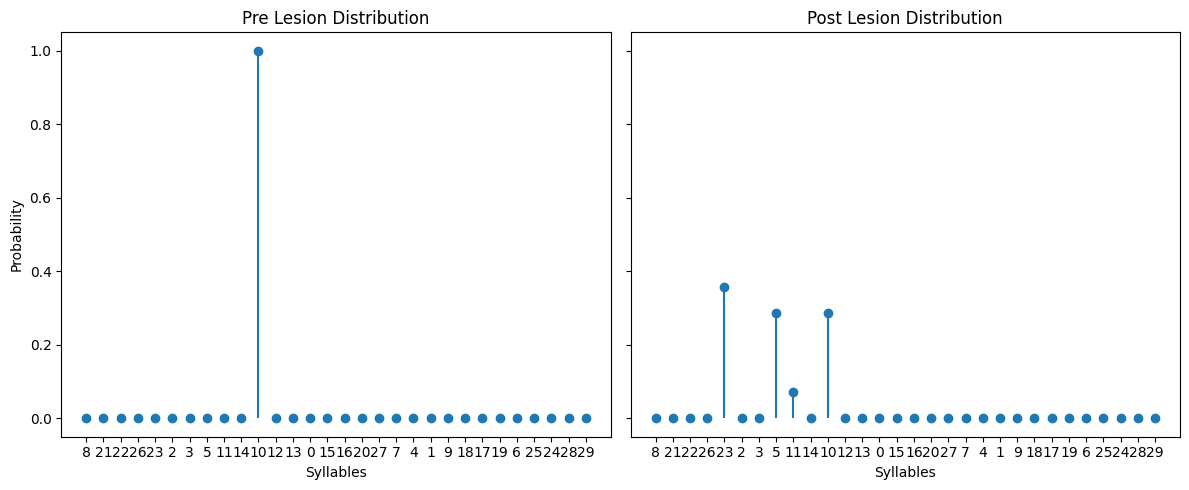

{"Earth Mover's Distance": np.float64(3.1428774265803514),
 'Information Gain': np.float64(-1.272062113146192),
 'Kullback-Leibler Divergence': np.float64(1.2527617351373643)}
30 30


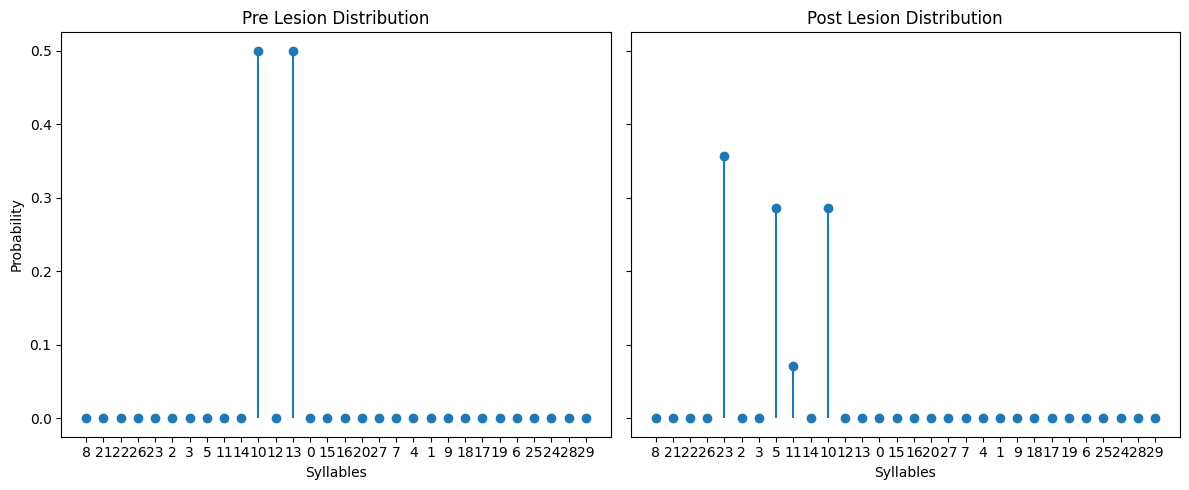

{"Earth Mover's Distance": np.float64(4.142865723153657),
 'Information Gain': np.float64(-0.5789298038078534),
 'Kullback-Leibler Divergence': np.float64(9.96608071996119)}
30 30


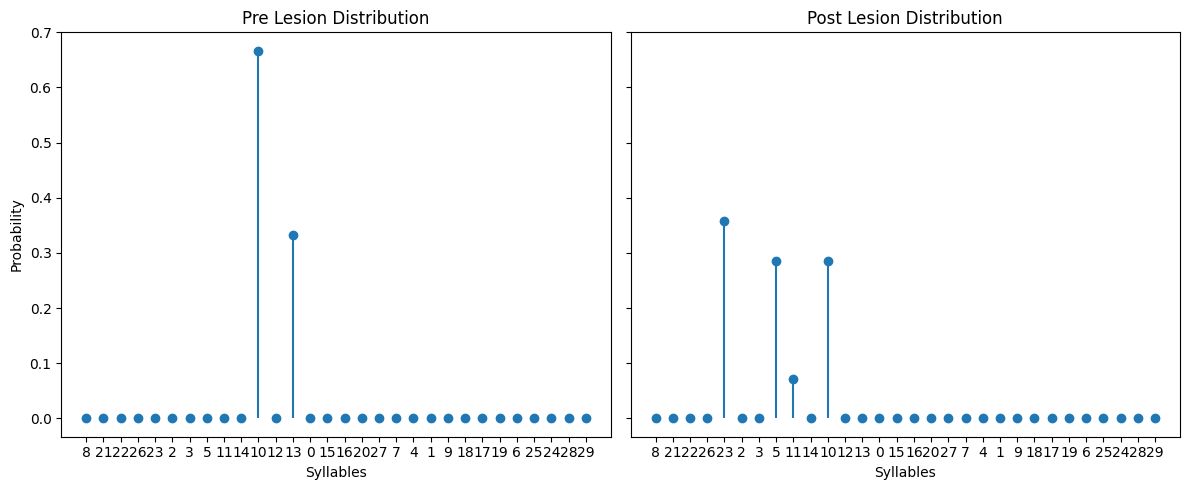

{"Earth Mover's Distance": np.float64(3.809529318056977),
 'Information Gain': np.float64(-0.6355671967561931),
 'Kullback-Leibler Divergence': np.float64(6.887226949175807)}
30 30


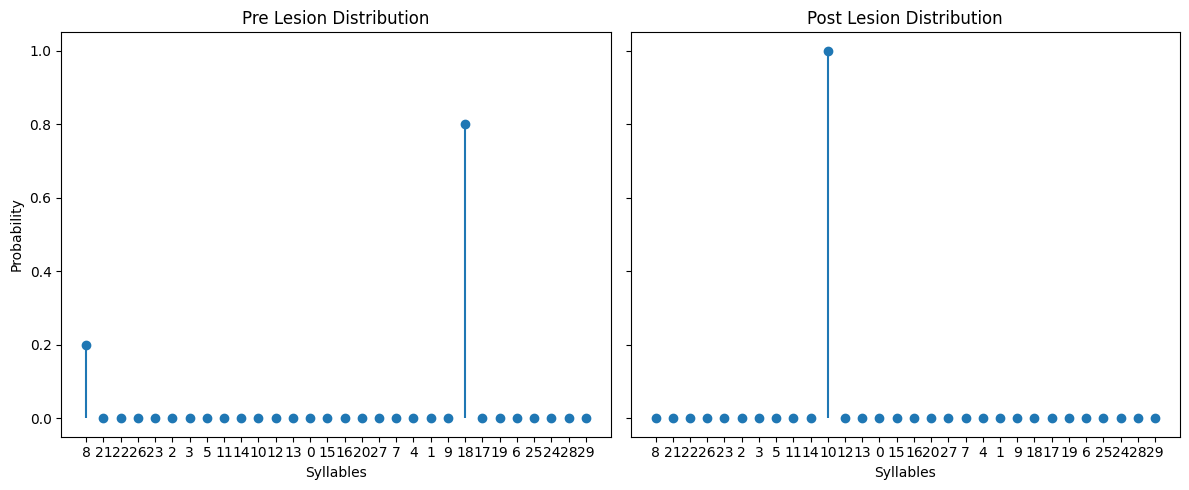

{"Earth Mover's Distance": np.float64(11.600005615035021),
 'Information Gain': np.float64(0.5003938934306709),
 'Kullback-Leibler Divergence': np.float64(16.926243778148987)}
30 30


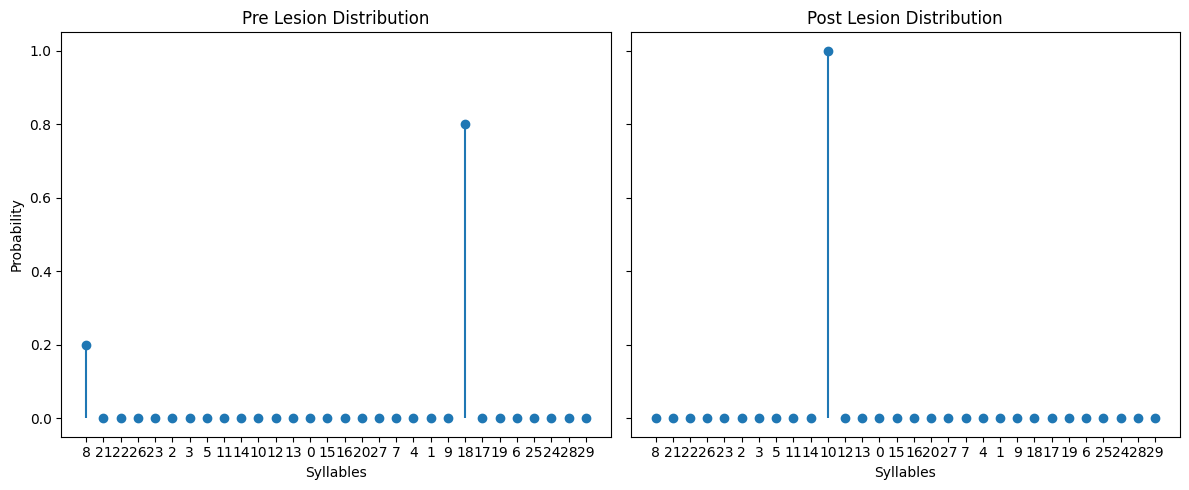

{"Earth Mover's Distance": np.float64(11.600005615035021),
 'Information Gain': np.float64(0.5003938934306709),
 'Kullback-Leibler Divergence': np.float64(16.926243778148987)}
30 30


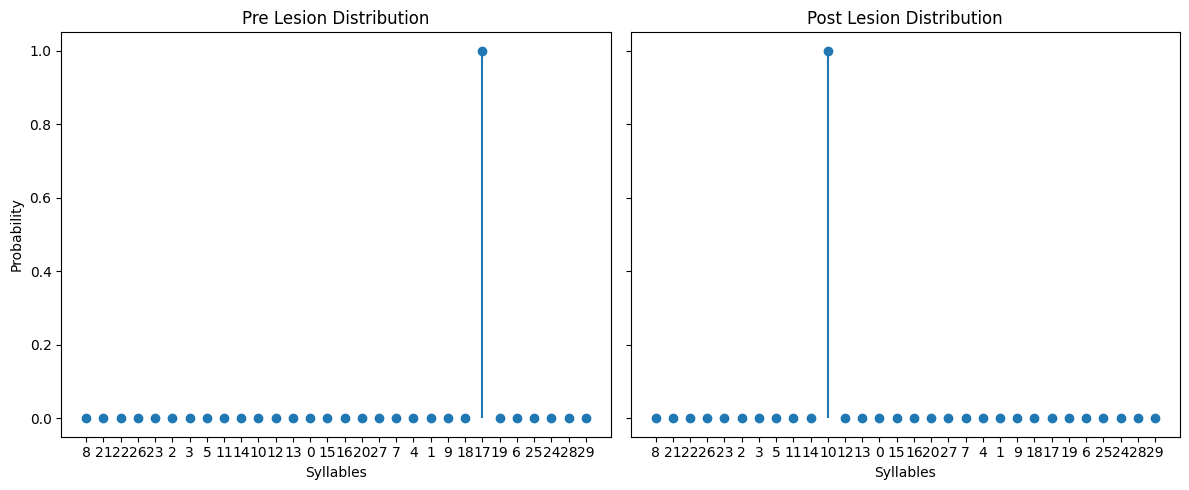

{"Earth Mover's Distance": np.float64(13.000000022746999),
 'Information Gain': np.float64(4.992943779704252e-07),
 'Kullback-Leibler Divergence': np.float64(17.426636879413305)}
30 30


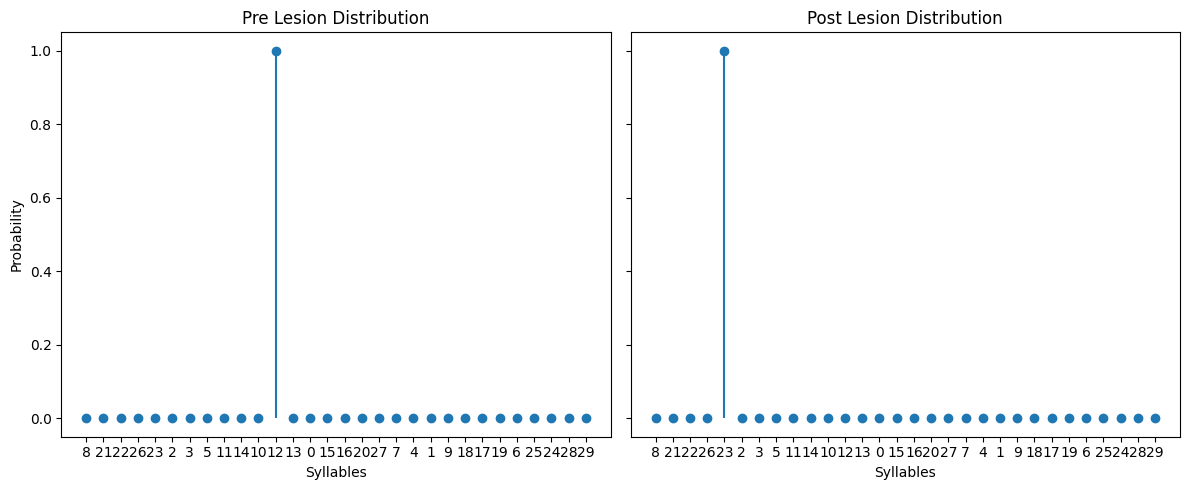

{"Earth Mover's Distance": np.float64(7.000007354905047),
 'Information Gain': np.float64(-8.166129047451886e-06),
 'Kullback-Leibler Divergence': np.float64(17.426645837708705)}
30 30


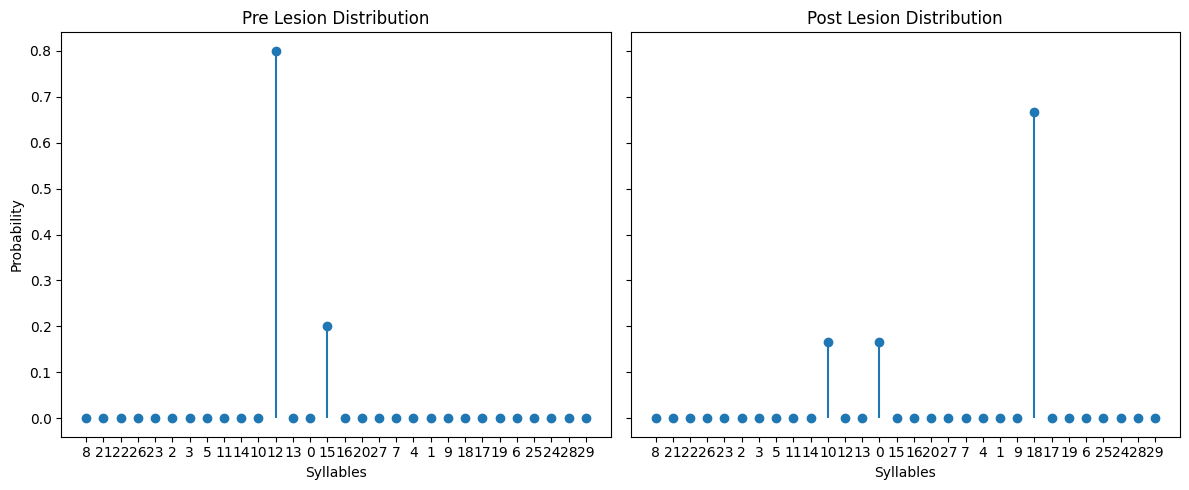

{"Earth Mover's Distance": np.float64(7.2333363016548216),
 'Information Gain': np.float64(-0.36715725497173624),
 'Kullback-Leibler Divergence': np.float64(18.71800216582404)}
30 30


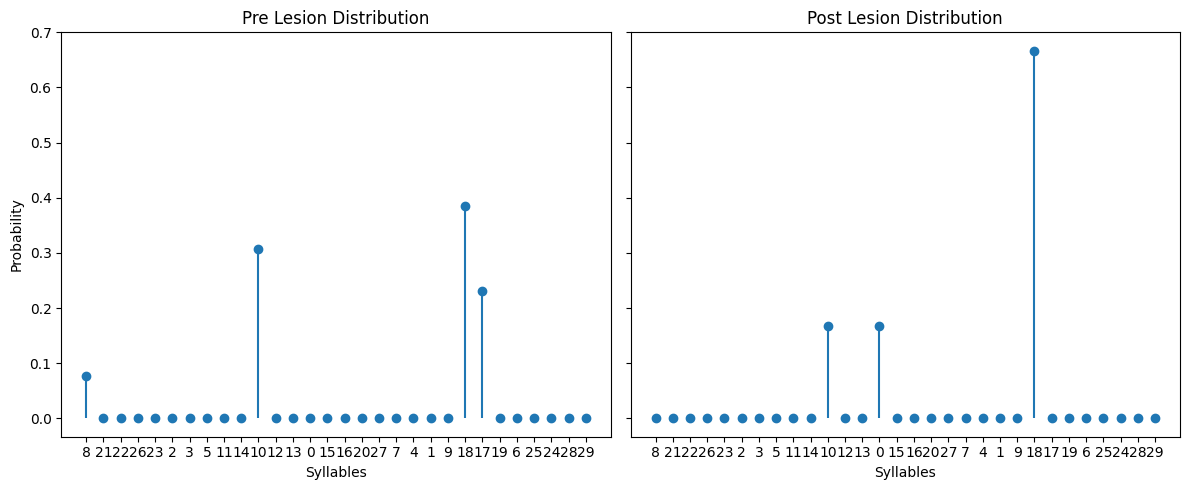

{"Earth Mover's Distance": np.float64(2.1153846074195783),
 'Information Gain': np.float64(0.3982932973249995),
 'Kullback-Leibler Divergence': np.float64(5.3547585808590465)}
30 30


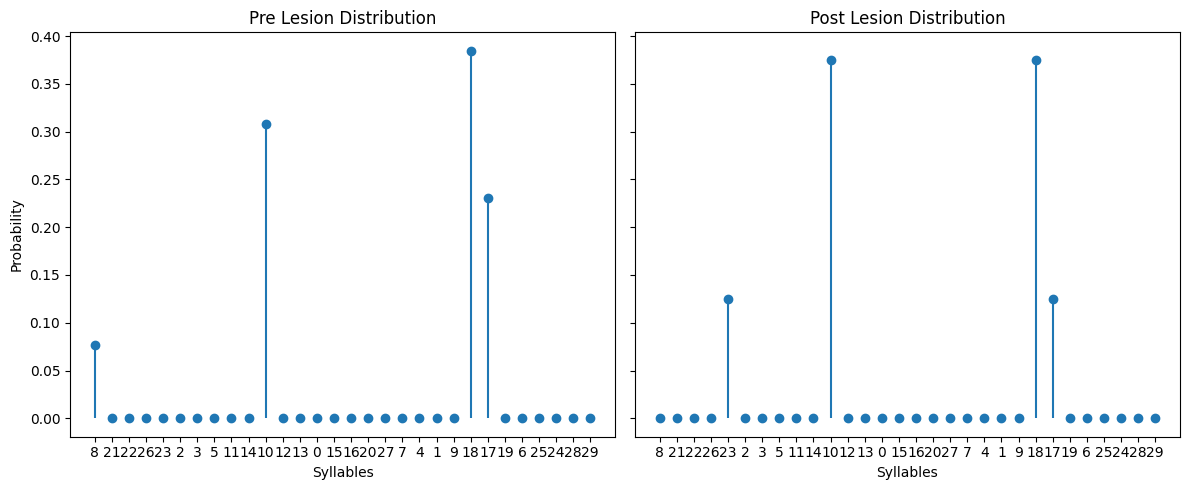

{"Earth Mover's Distance": np.float64(2.086538399120874),
 'Information Gain': np.float64(0.010374865561751268),
 'Kullback-Leibler Divergence': np.float64(1.393518528762257)}
30 30


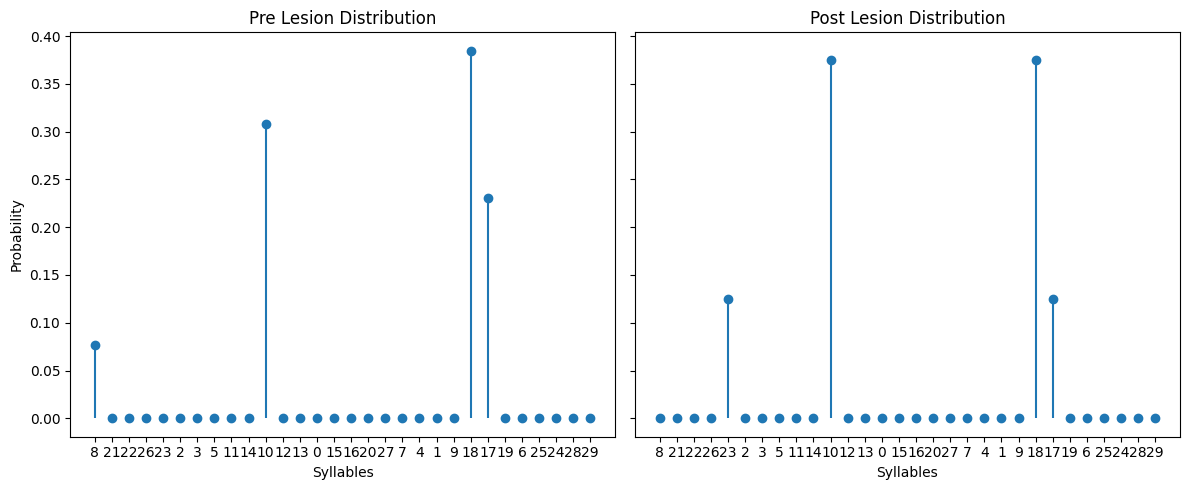

{"Earth Mover's Distance": np.float64(2.086538399120874),
 'Information Gain': np.float64(0.010374865561751268),
 'Kullback-Leibler Divergence': np.float64(1.393518528762257)}
30 30


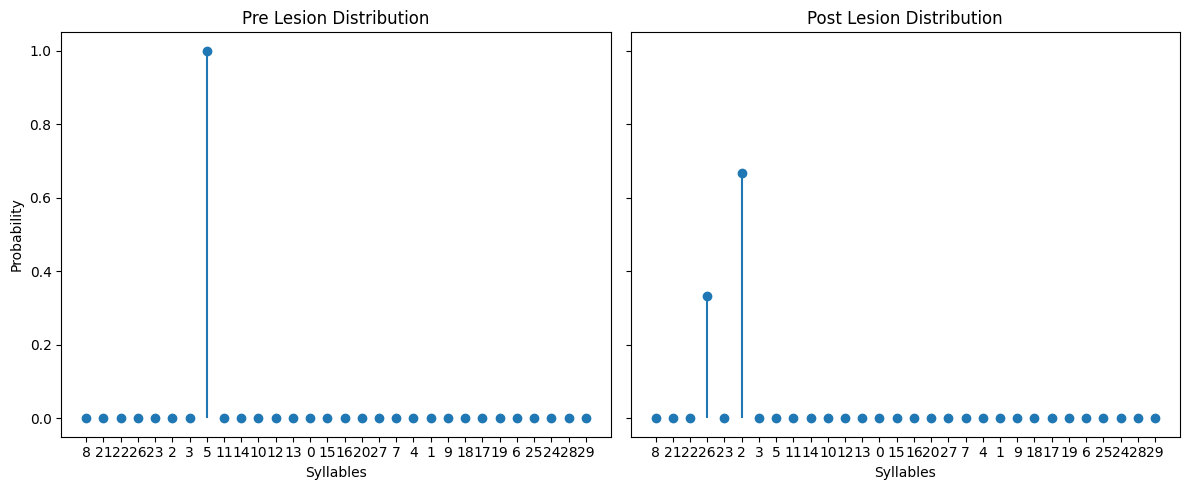

{"Earth Mover's Distance": np.float64(2.6666864591396493),
 'Information Gain': np.float64(-0.6364901829913665),
 'Kullback-Leibler Divergence': np.float64(18.52523331199563)}
30 30


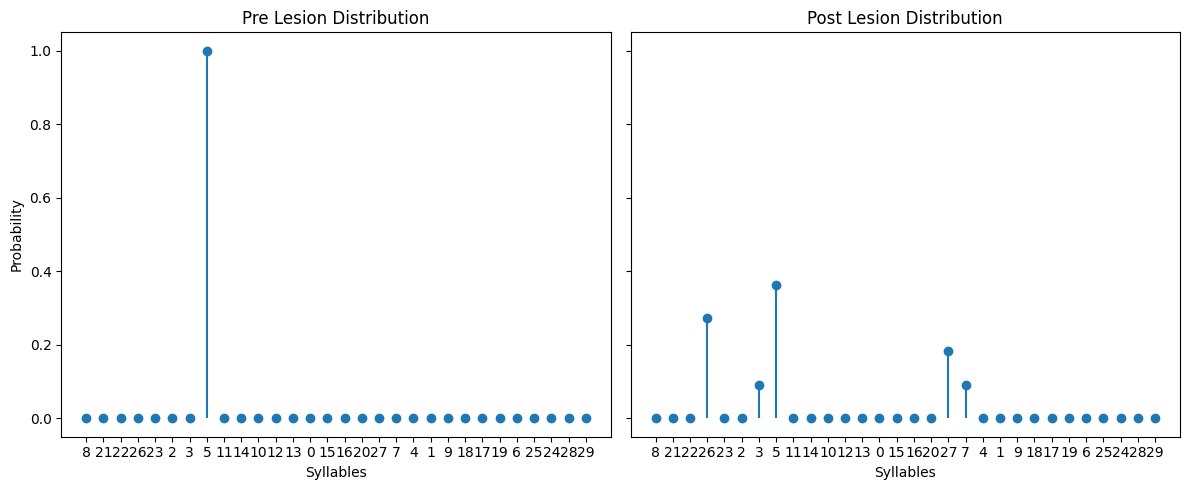

{"Earth Mover's Distance": np.float64(4.000022550252617),
 'Information Gain': np.float64(-1.468112380281874),
 'Kullback-Leibler Divergence': np.float64(1.011598785319034)}
30 30


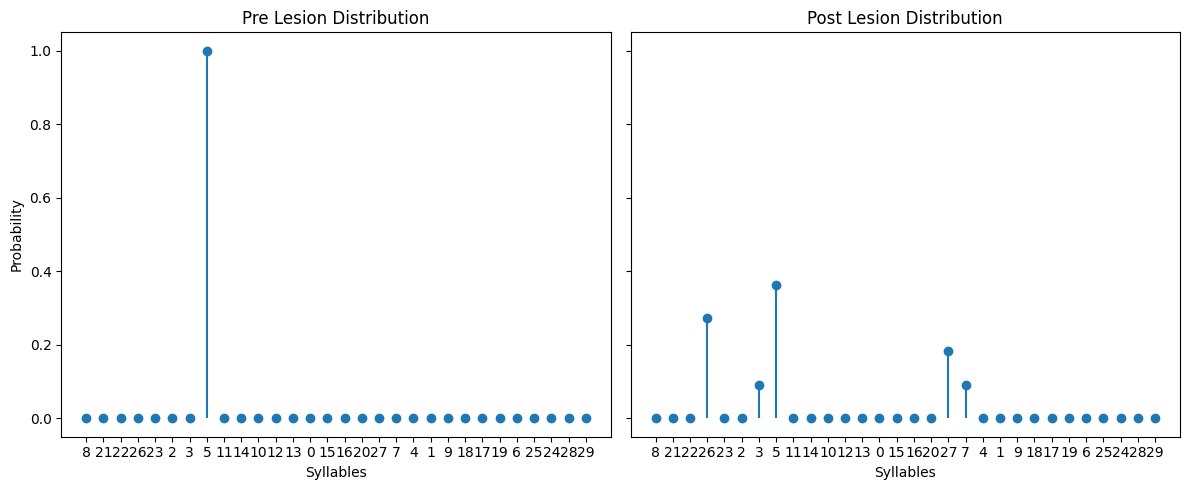

{"Earth Mover's Distance": np.float64(4.000022550252617),
 'Information Gain': np.float64(-1.468112380281874),
 'Kullback-Leibler Divergence': np.float64(1.011598785319034)}
30 30


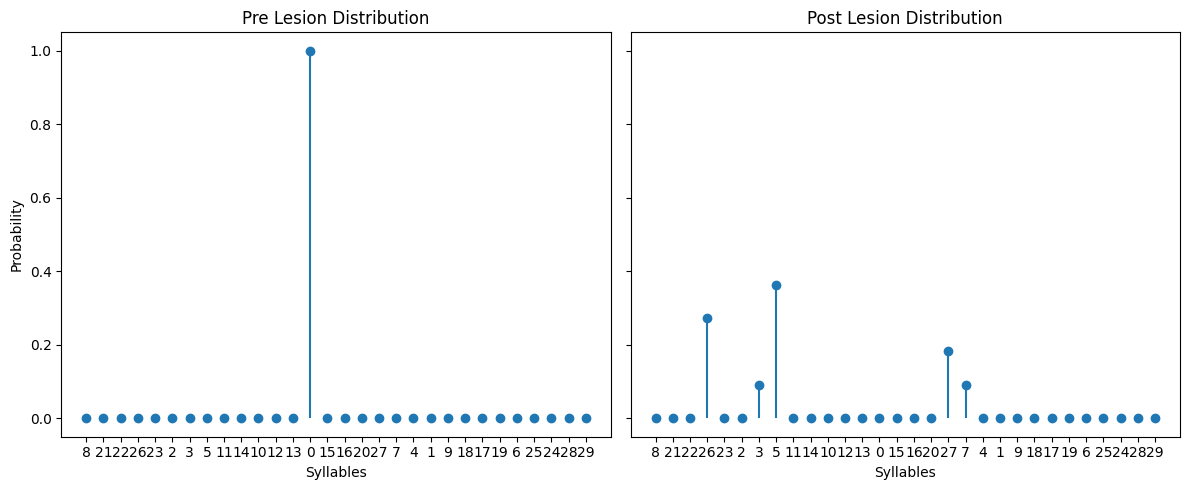

{"Earth Mover's Distance": np.float64(6.727288528518622),
 'Information Gain': np.float64(-1.468112380281874),
 'Kullback-Leibler Divergence': np.float64(19.82451303168719)}
30 30


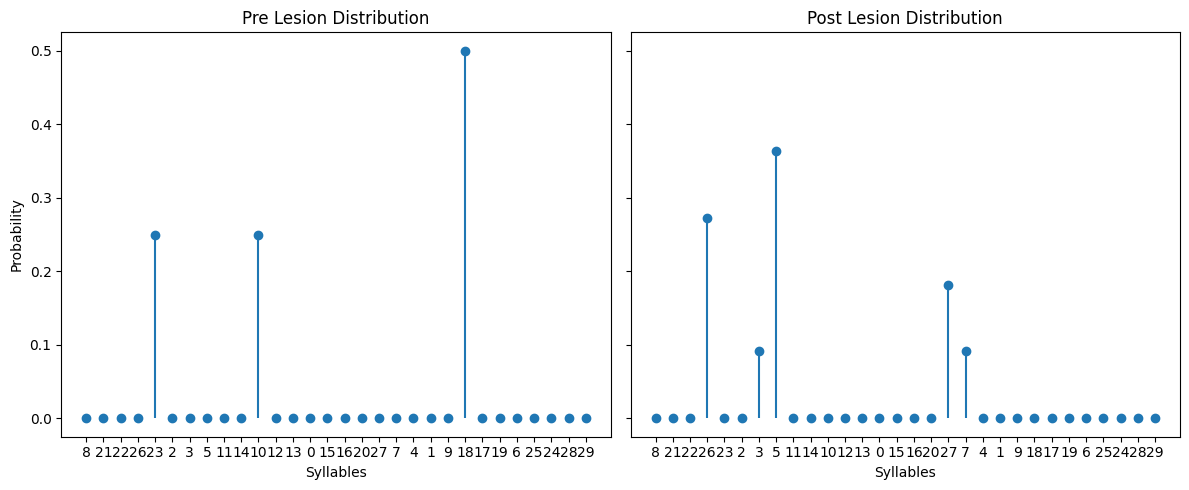

{"Earth Mover's Distance": np.float64(5.863636028728545),
 'Information Gain': np.float64(-0.42841353252397996),
 'Kullback-Leibler Divergence': np.float64(18.78481797835106)}
30 30


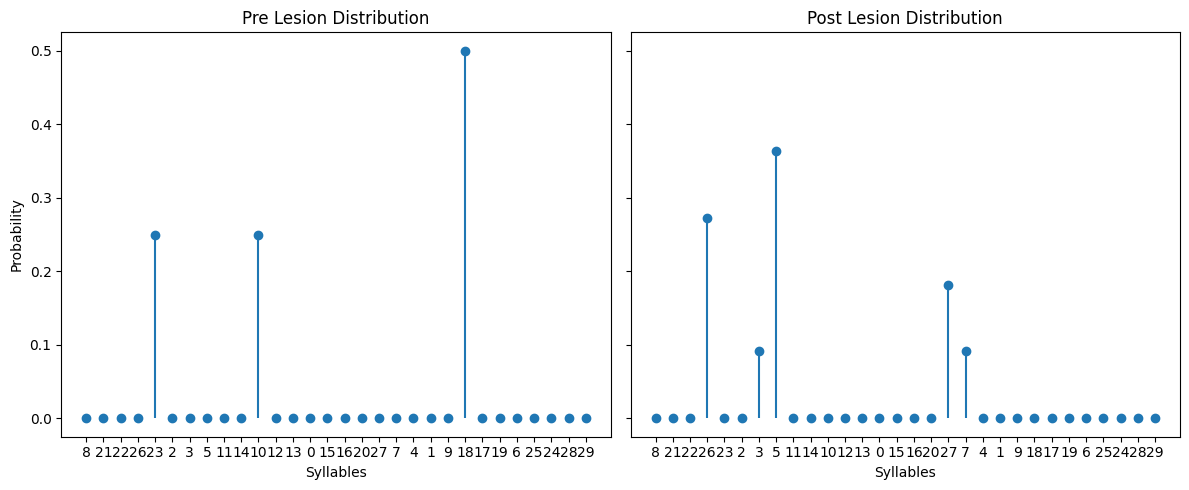

{"Earth Mover's Distance": np.float64(5.863636028728545),
 'Information Gain': np.float64(-0.42841353252397996),
 'Kullback-Leibler Divergence': np.float64(18.78481797835106)}
30 30


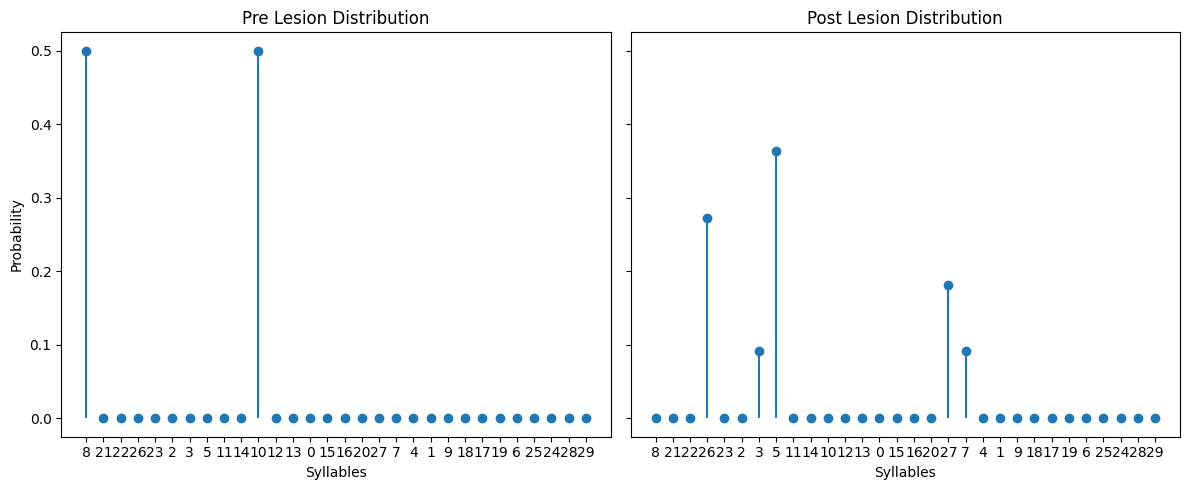

{"Earth Mover's Distance": np.float64(5.000010502507184),
 'Information Gain': np.float64(-0.7749800709435355),
 'Kullback-Leibler Divergence': np.float64(19.131383251962294)}
30 30


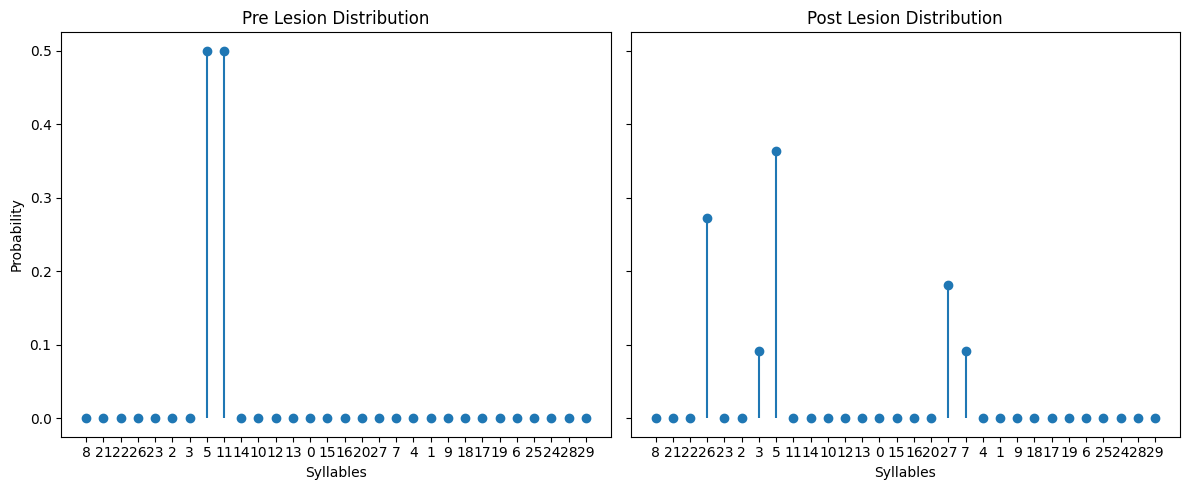

{"Earth Mover's Distance": np.float64(3.954555803731374),
 'Information Gain': np.float64(-0.7749800709435355),
 'Kullback-Leibler Divergence': np.float64(9.724918224538943)}
30 30


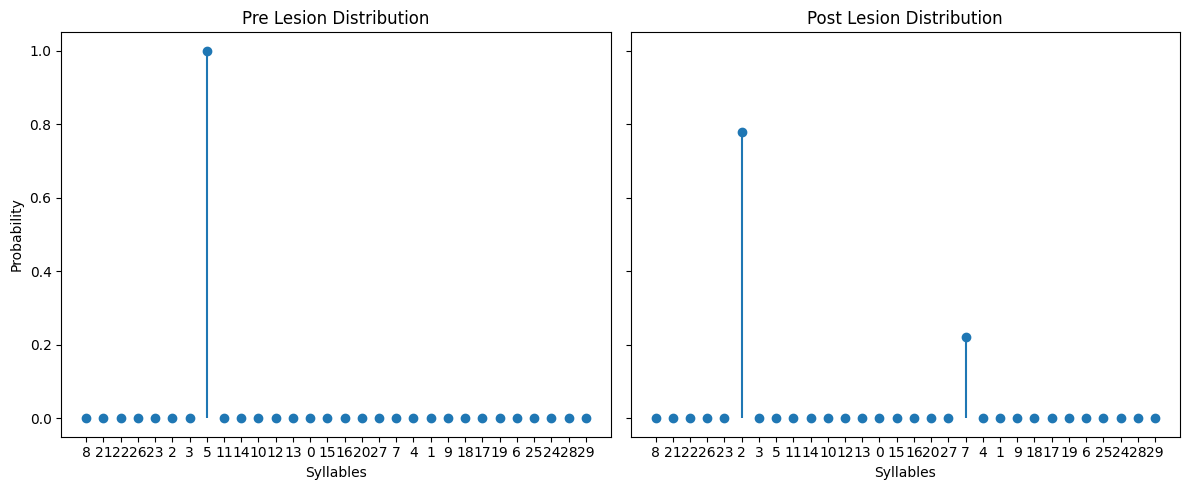

{"Earth Mover's Distance": np.float64(4.000024153438554),
 'Information Gain': np.float64(-0.5296780425632384),
 'Kullback-Leibler Divergence': np.float64(20.72245741704719)}
30 30


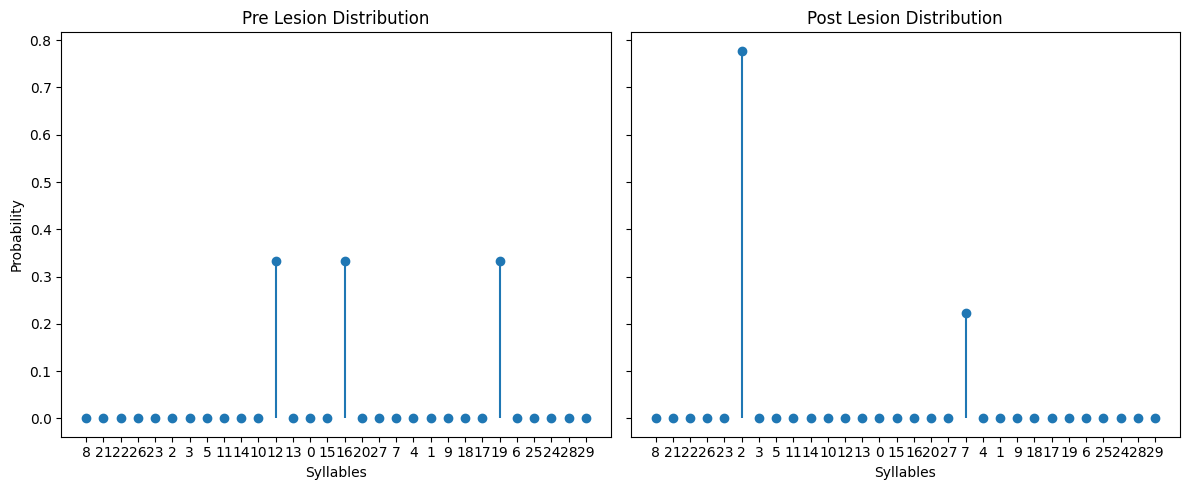

{"Earth Mover's Distance": np.float64(8.777775922159446),
 'Information Gain': np.float64(0.5689144178039991),
 'Kullback-Leibler Divergence': np.float64(19.62386643895034)}
30 30


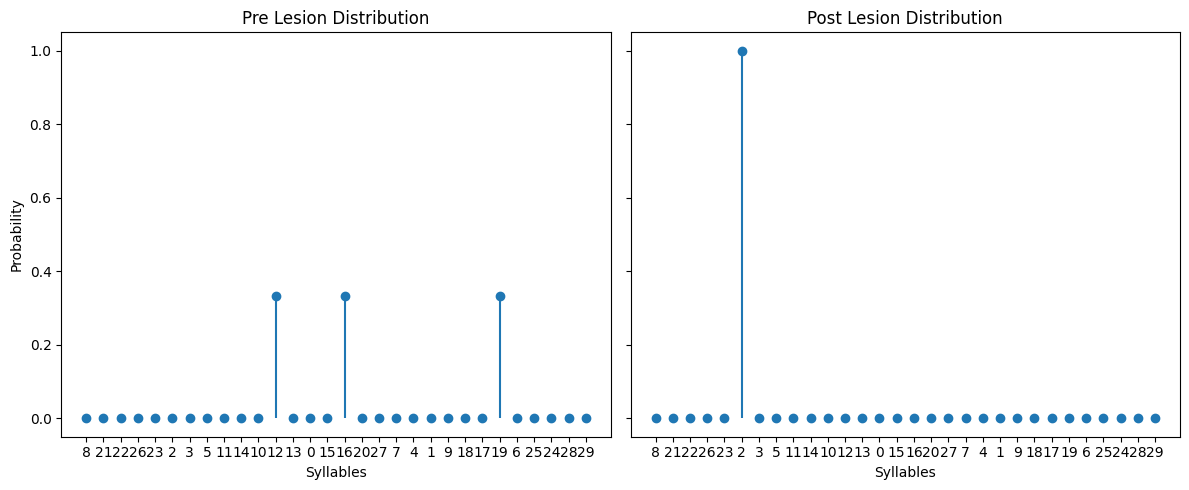

{"Earth Mover's Distance": np.float64(11.666670548331705),
 'Information Gain': np.float64(1.0986067721390134),
 'Kullback-Leibler Divergence': np.float64(16.328030769275284)}
30 30


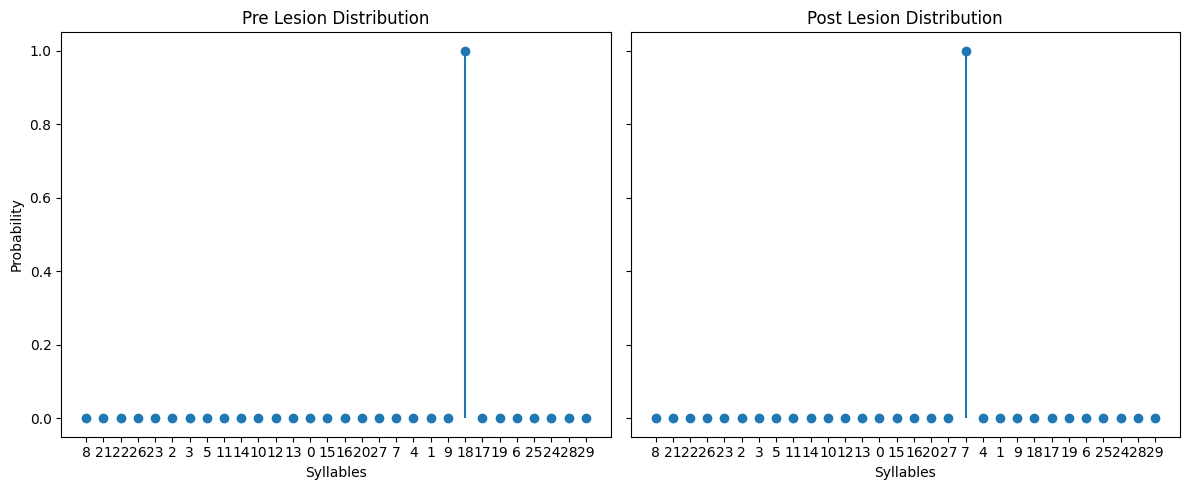

{"Earth Mover's Distance": np.float64(4.000008728698993),
 'Information Gain': np.float64(1.4311771776054105e-05),
 'Kullback-Leibler Divergence': np.float64(17.426622578816637)}
30 30


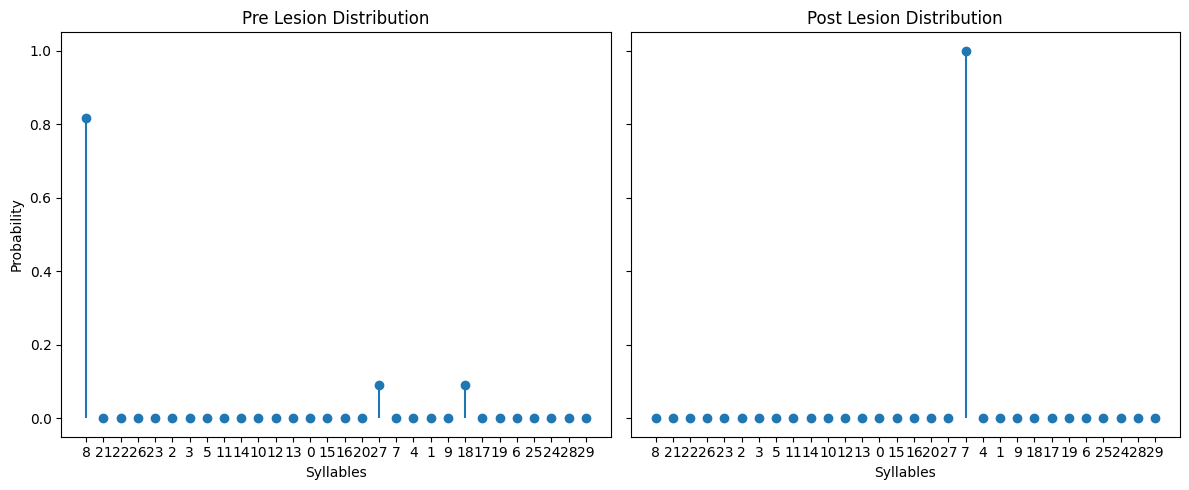

{"Earth Mover's Distance": np.float64(15.18182087899574),
 'Information Gain': np.float64(0.6001543308295912),
 'Kullback-Leibler Divergence': np.float64(16.826483447249032)}
30 30


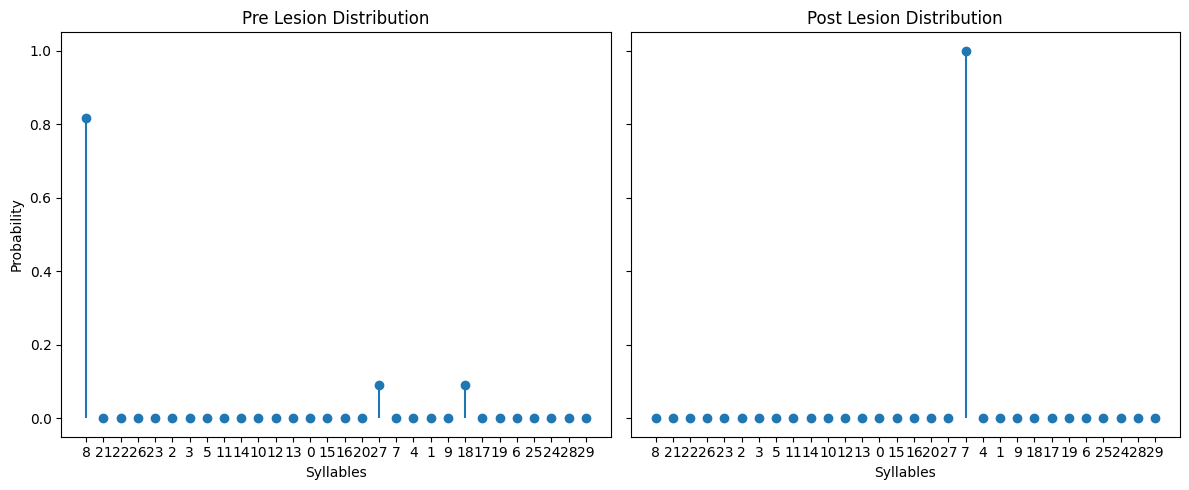

{"Earth Mover's Distance": np.float64(15.18182087899574),
 'Information Gain': np.float64(0.6001543308295912),
 'Kullback-Leibler Divergence': np.float64(16.826483447249032)}
30 30


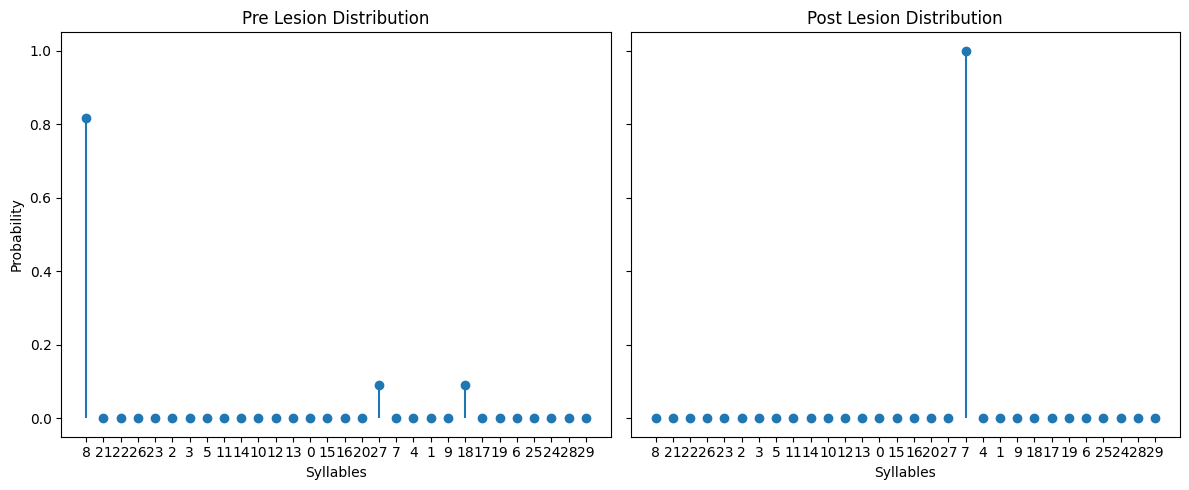

{"Earth Mover's Distance": np.float64(15.18182087899574),
 'Information Gain': np.float64(0.6001543308295912),
 'Kullback-Leibler Divergence': np.float64(16.826483447249032)}
30 30


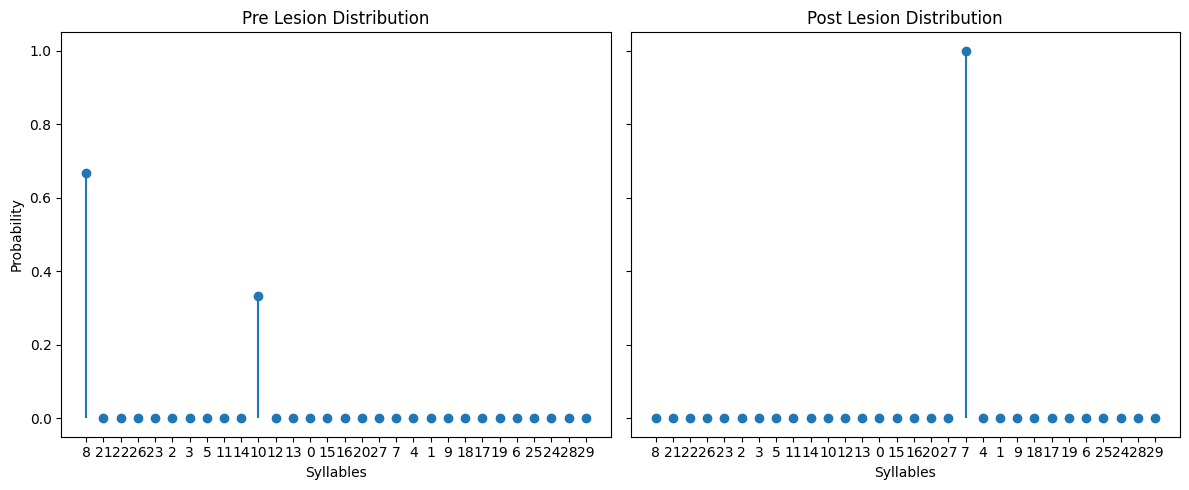

{"Earth Mover's Distance": np.float64(14.666667693429678),
 'Information Gain': np.float64(0.6365092281617749),
 'Kullback-Leibler Divergence': np.float64(16.790128313252524)}
30 30


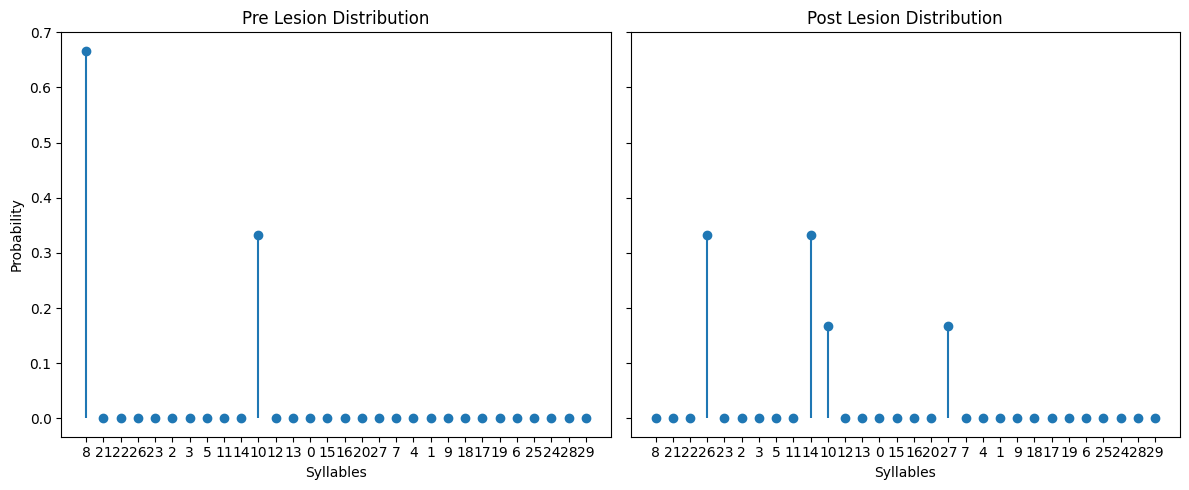

{"Earth Mover's Distance": np.float64(5.166673255639159),
 'Information Gain': np.float64(-0.6931398951977573),
 'Kullback-Leibler Divergence': np.float64(12.773005518131047)}
30 30


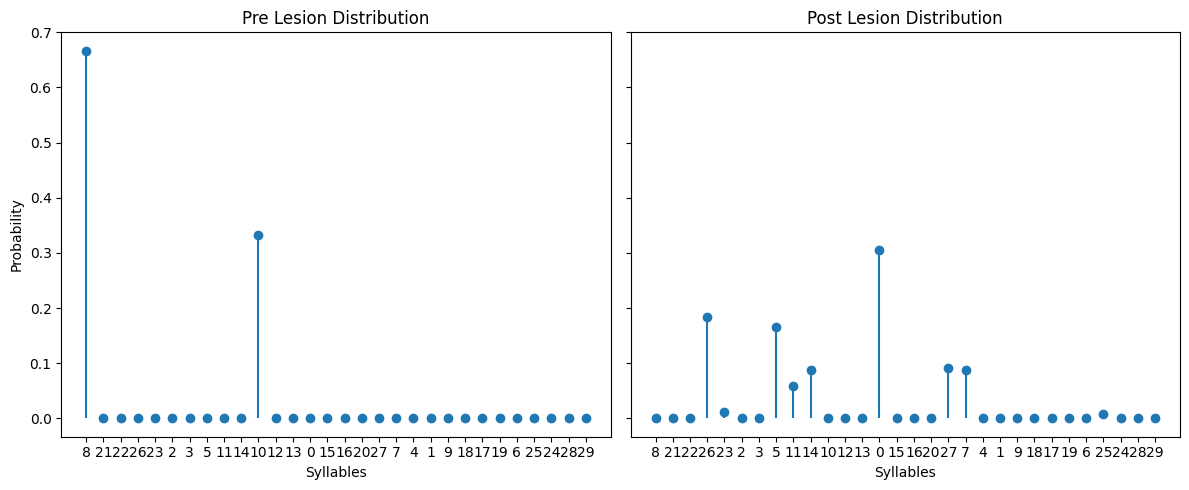

{"Earth Mover's Distance": np.float64(6.993881185925618),
 'Information Gain': np.float64(-1.2349888758908718),
 'Kullback-Leibler Divergence': np.float64(22.395926477914944)}
30 30


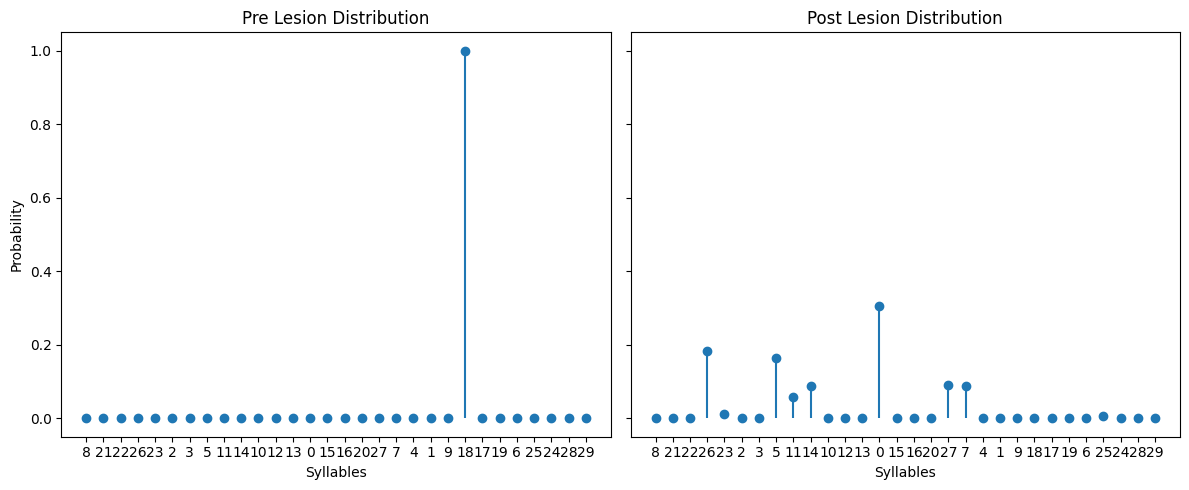

{"Earth Mover's Distance": np.float64(11.731616837649748),
 'Information Gain': np.float64(-1.8714976047582685),
 'Kullback-Leibler Divergence': np.float64(23.032433497084927)}
30 30


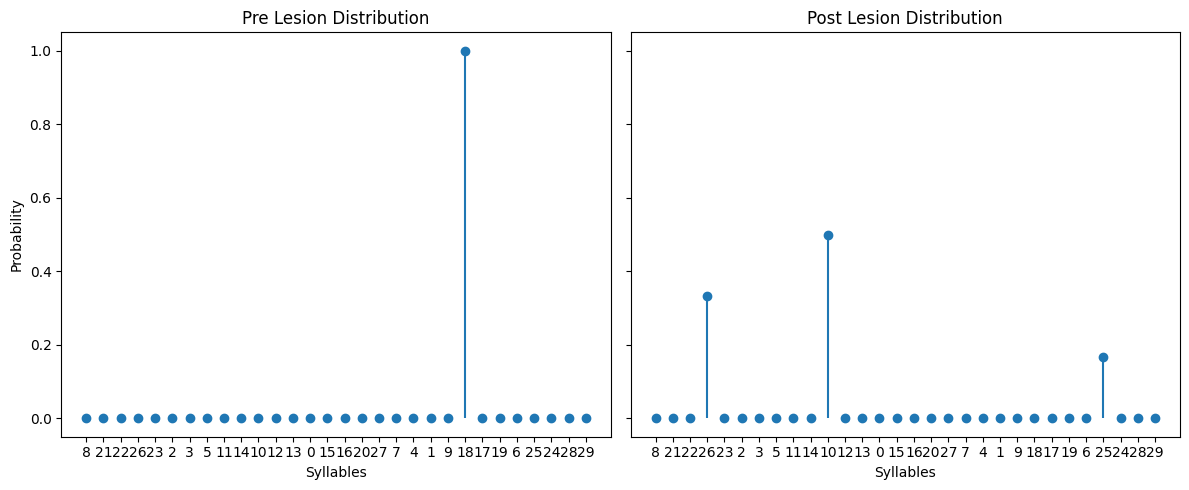

{"Earth Mover's Distance": np.float64(12.999999318311502),
 'Information Gain': np.float64(-1.0113916640742673),
 'Kullback-Leibler Divergence': np.float64(19.218394646689347)}
30 30


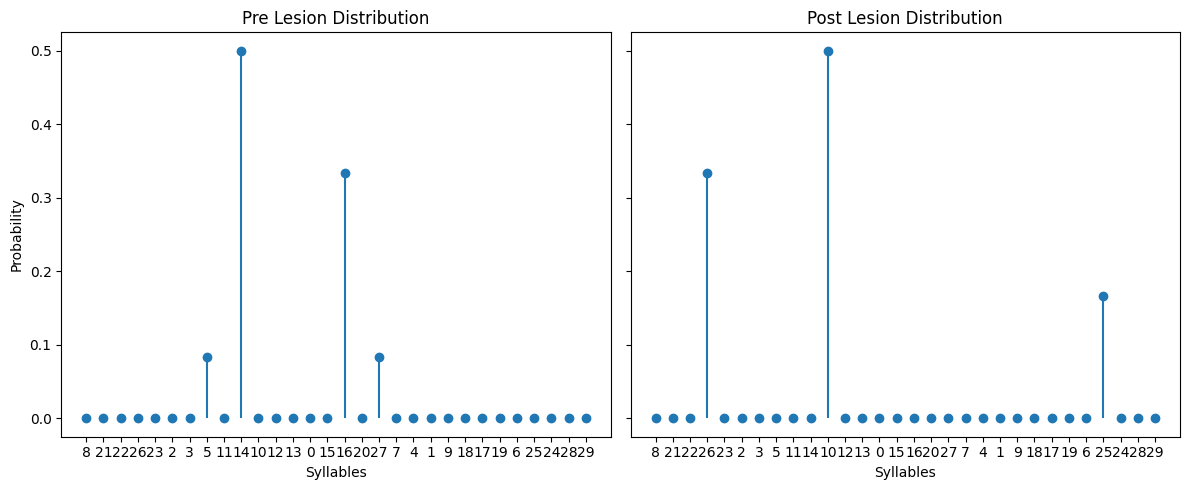

{"Earth Mover's Distance": np.float64(5.000000042362162),
 'Information Gain': np.float64(0.11552451557220778),
 'Kullback-Leibler Divergence': np.float64(18.091479729165563)}
30 30


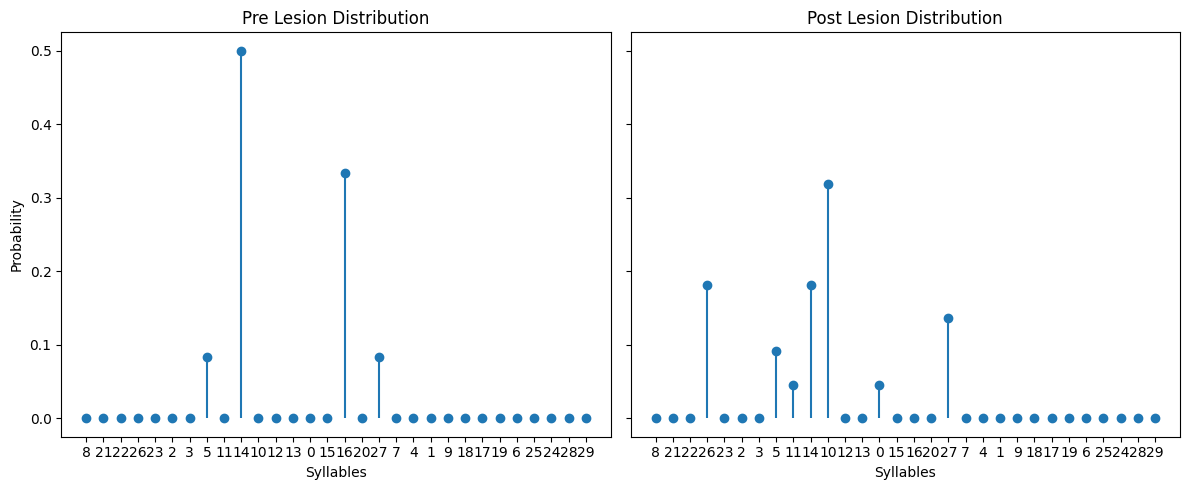

{"Earth Mover's Distance": np.float64(2.6060614901678605),
 'Information Gain': np.float64(-0.6280274805723458),
 'Kullback-Leibler Divergence': np.float64(6.930535874083712)}
30 30


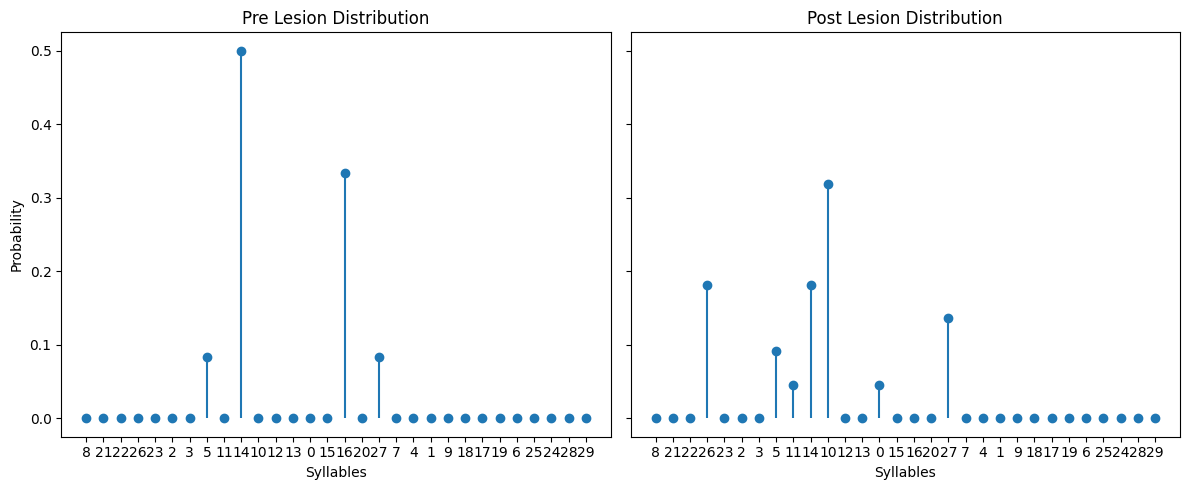

{"Earth Mover's Distance": np.float64(2.6060614901678605),
 'Information Gain': np.float64(-0.6280274805723458),
 'Kullback-Leibler Divergence': np.float64(6.930535874083712)}
30 30


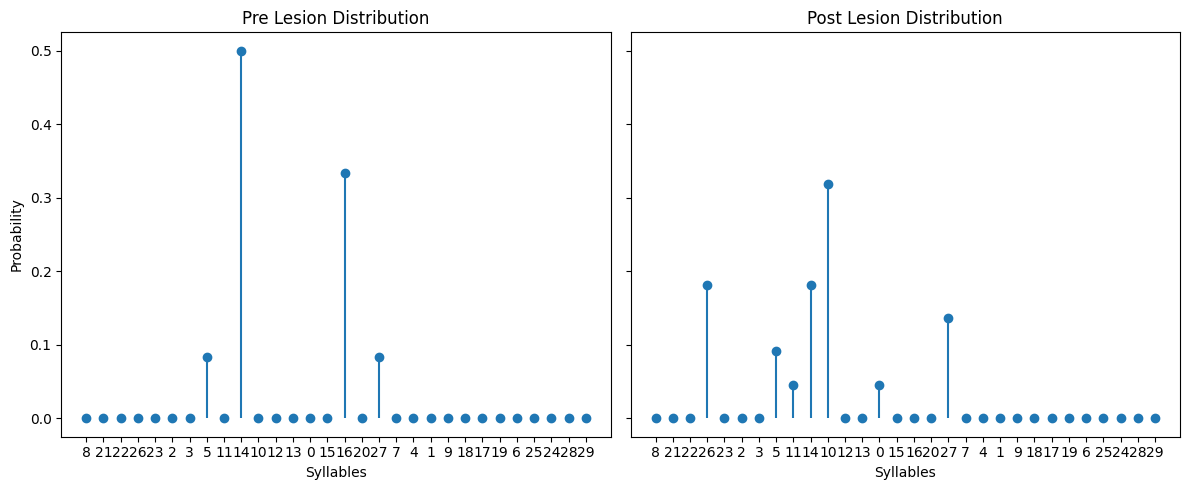

{"Earth Mover's Distance": np.float64(2.6060614901678605),
 'Information Gain': np.float64(-0.6280274805723458),
 'Kullback-Leibler Divergence': np.float64(6.930535874083712)}
30 30


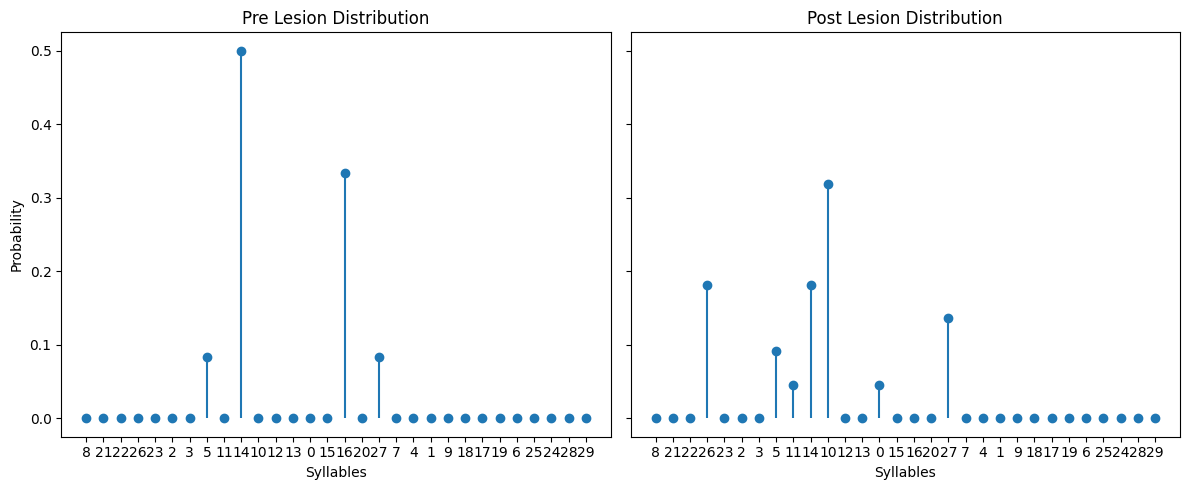

{"Earth Mover's Distance": np.float64(2.6060614901678605),
 'Information Gain': np.float64(-0.6280274805723458),
 'Kullback-Leibler Divergence': np.float64(6.930535874083712)}
30 30


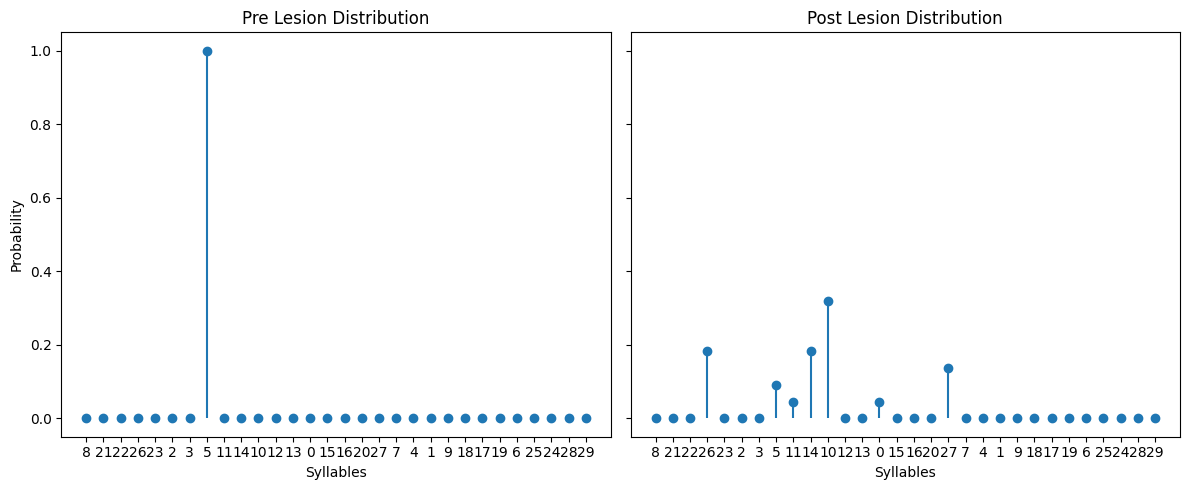

{"Earth Mover's Distance": np.float64(3.727275579391871),
 'Information Gain': np.float64(-1.7549540398808456),
 'Kullback-Leibler Divergence': np.float64(2.3978940591860907)}
30 30


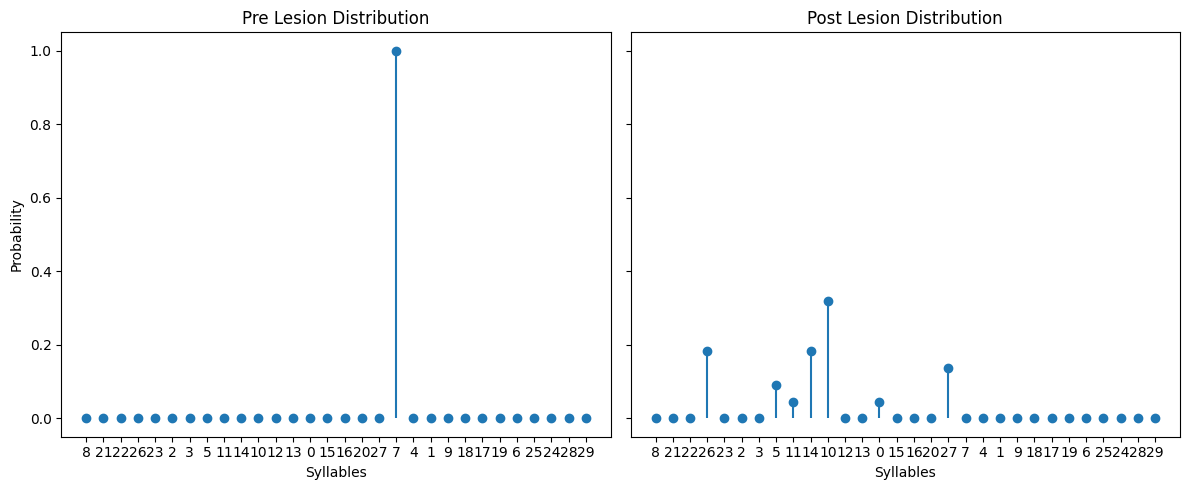

{"Earth Mover's Distance": np.float64(8.72728012416204),
 'Information Gain': np.float64(-1.754929847741423),
 'Kullback-Leibler Divergence': np.float64(20.517658036251785)}
30 30


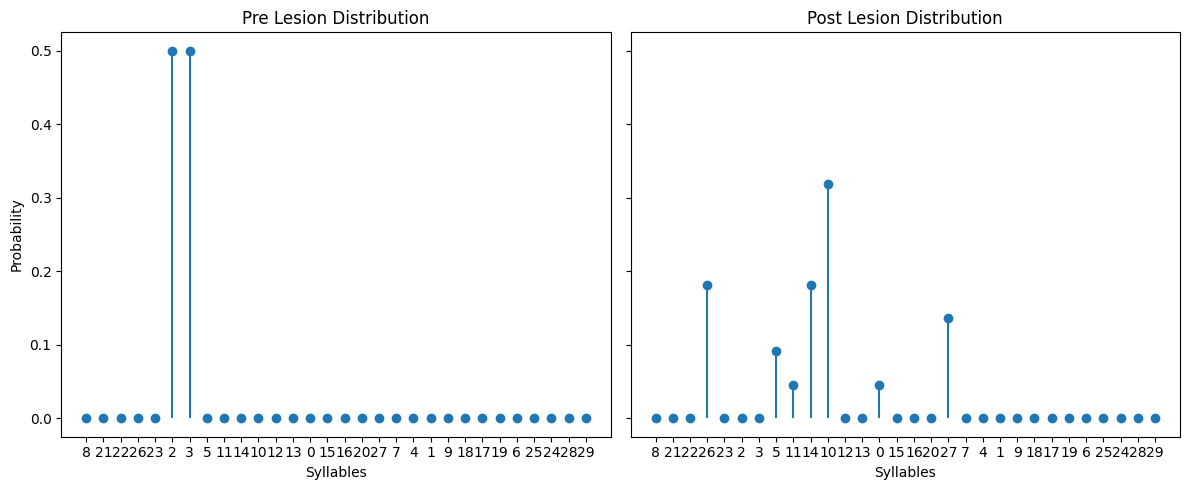

{"Earth Mover's Distance": np.float64(4.500011971452434),
 'Information Gain': np.float64(-1.0617975384030844),
 'Kullback-Leibler Divergence': np.float64(19.82452932610026)}
30 30


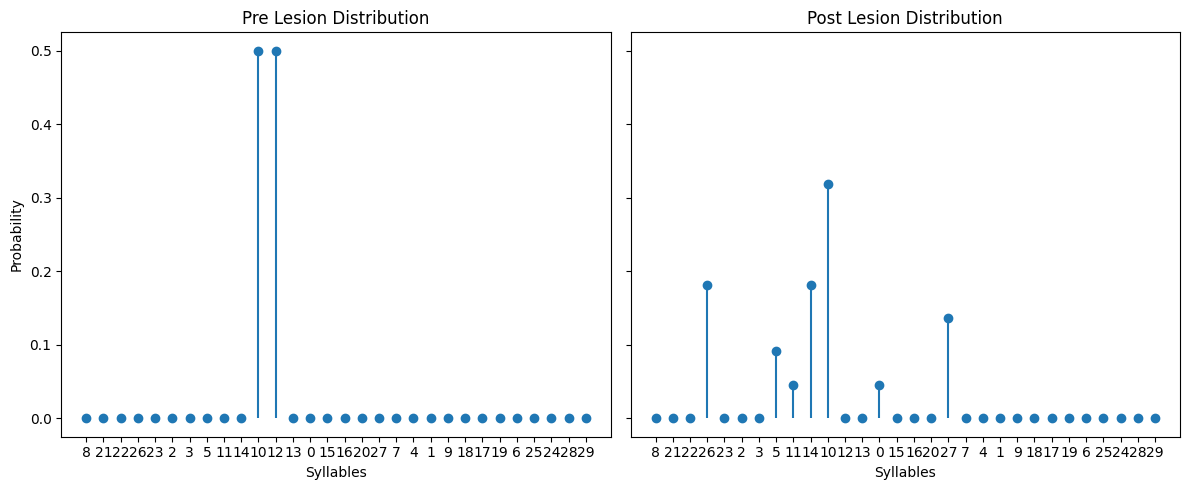

{"Earth Mover's Distance": np.float64(3.0454637851661475),
 'Information Gain': np.float64(-1.0617975384030844),
 'Kullback-Leibler Divergence': np.float64(10.138256641279119)}
30 30


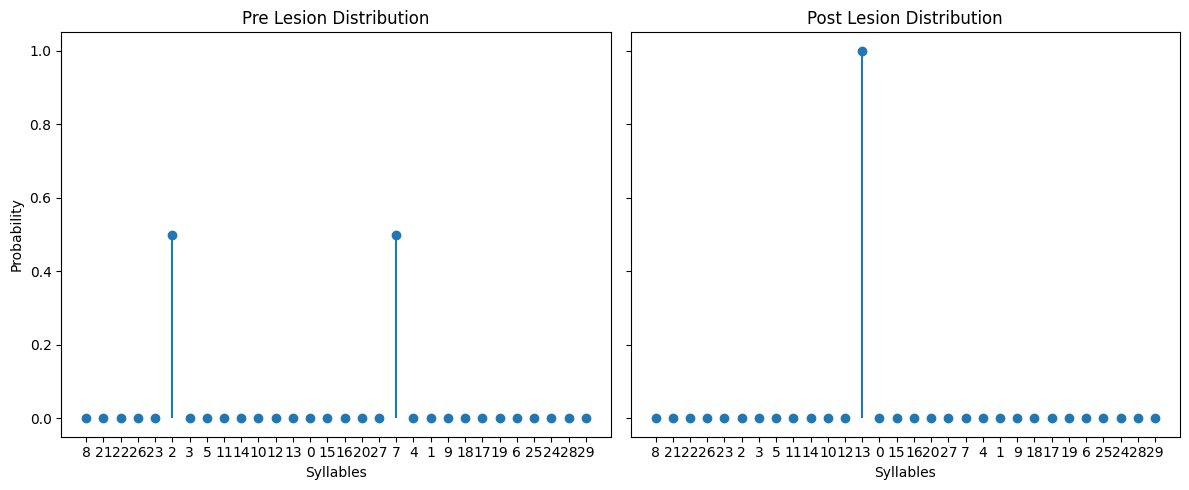

{"Earth Mover's Distance": np.float64(6.500000275930991),
 'Information Gain': np.float64(0.6931466211101145),
 'Kullback-Leibler Divergence': np.float64(16.733490757597572)}
30 30


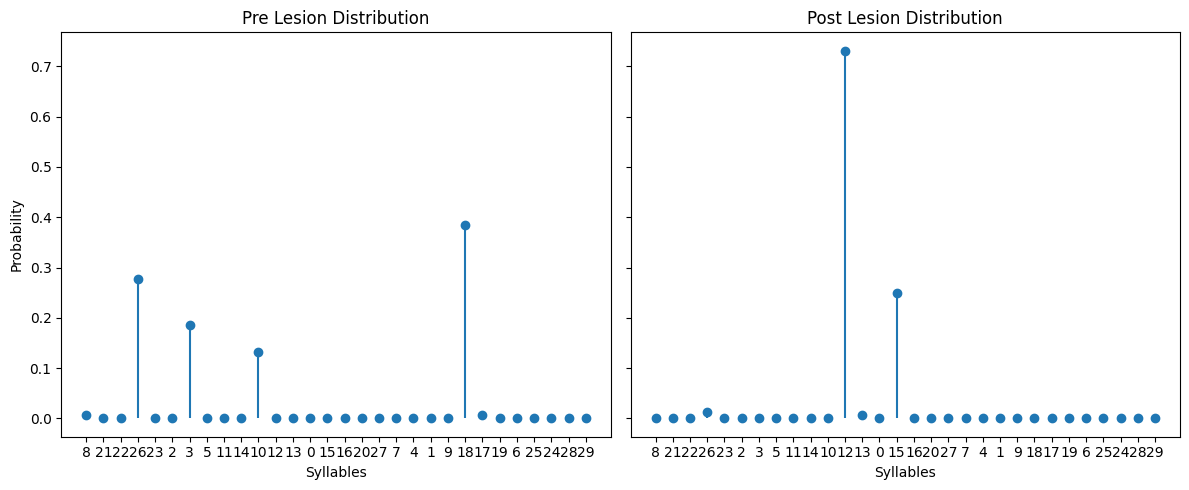

{"Earth Mover's Distance": np.float64(6.855075997322193),
 'Information Gain': np.float64(0.7383714154490462),
 'Kullback-Leibler Divergence': np.float64(16.040359735673178)}
30 30


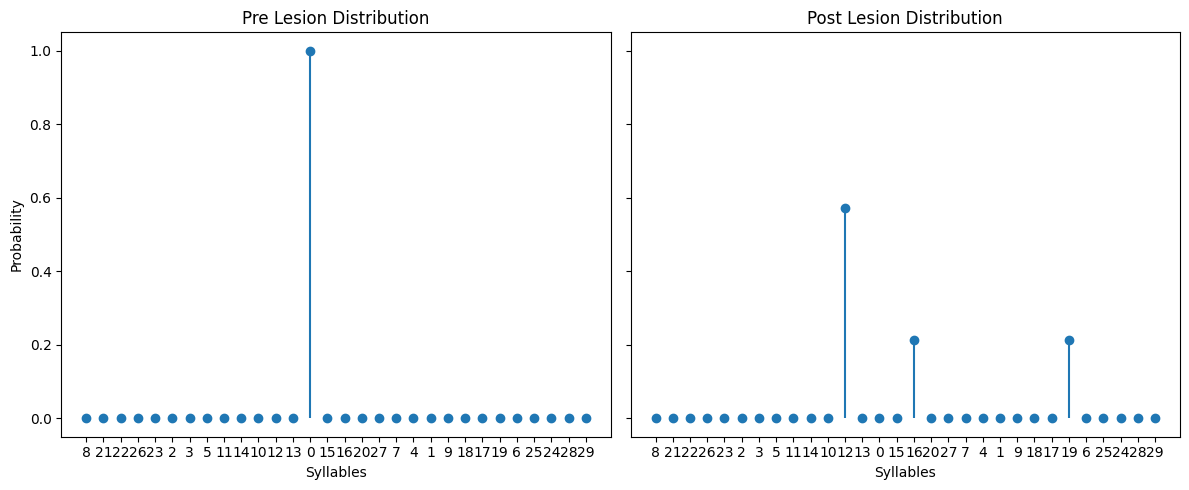

{"Earth Mover's Distance": np.float64(3.9285938758917833),
 'Information Gain': np.float64(-0.9799434790916132),
 'Kullback-Leibler Divergence': np.float64(20.065676963647196)}
30 30


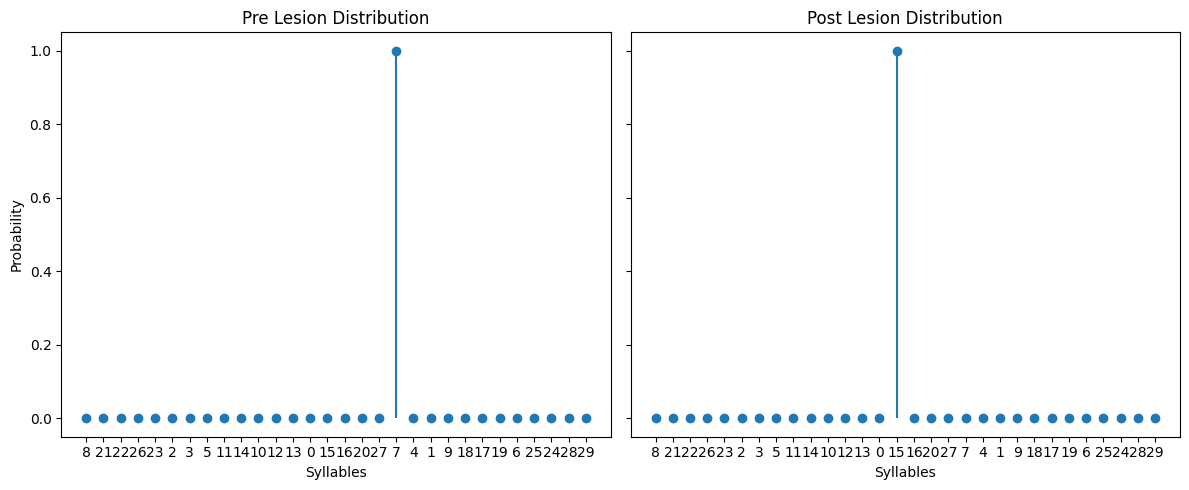

{"Earth Mover's Distance": np.float64(4.000014155663489),
 'Information Gain': np.float64(2.1259830145027644e-05),
 'Kullback-Leibler Divergence': np.float64(18.119769315231785)}
30 30


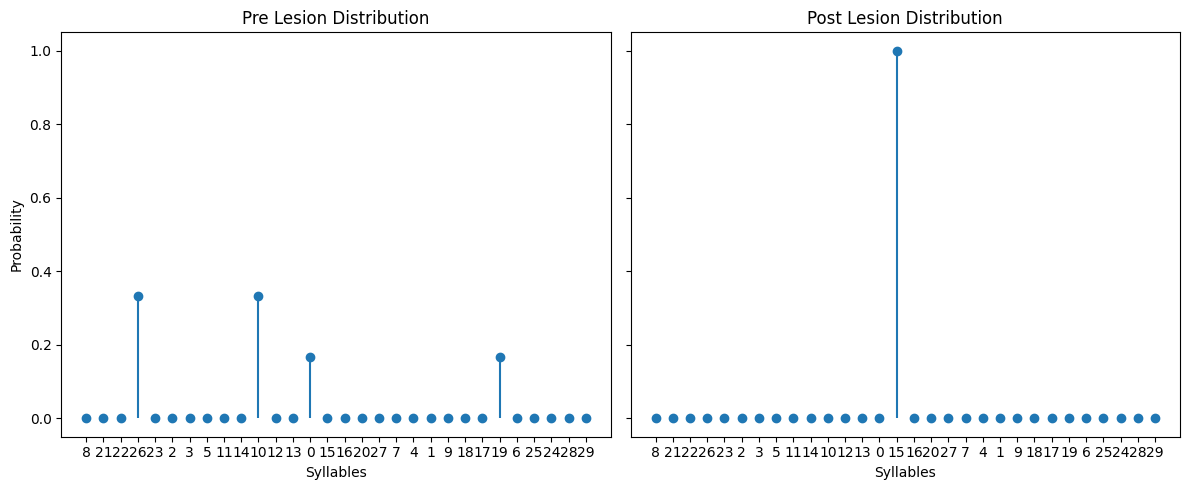

{"Earth Mover's Distance": np.float64(6.833334447746839),
 'Information Gain': np.float64(1.3296582702646391),
 'Kullback-Leibler Divergence': np.float64(16.790133150688238)}
30 30


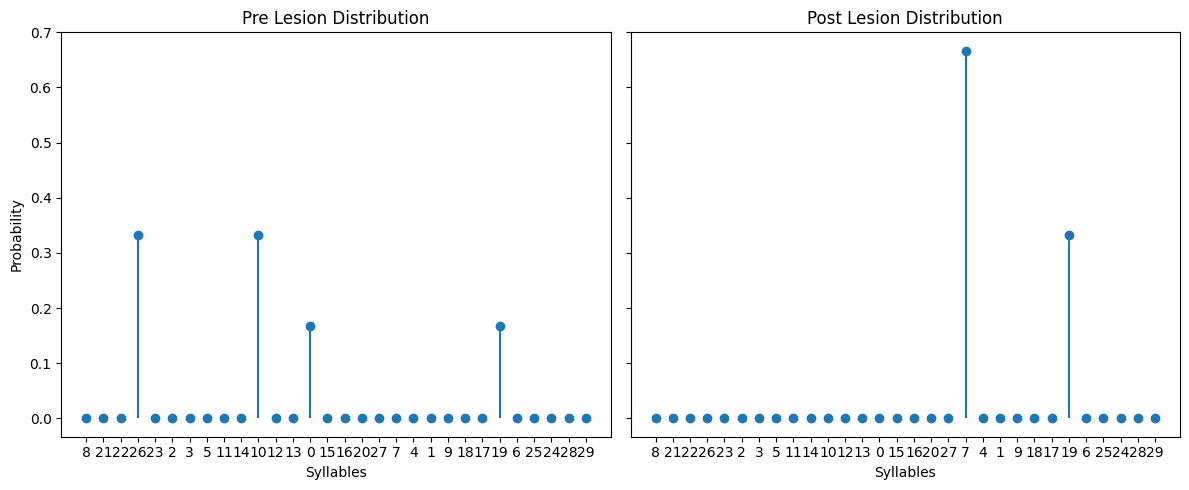

{"Earth Mover's Distance": np.float64(9.500000153295),
 'Information Gain': np.float64(0.6931468274431276),
 'Kullback-Leibler Divergence': np.float64(14.291156854102322)}
30 30


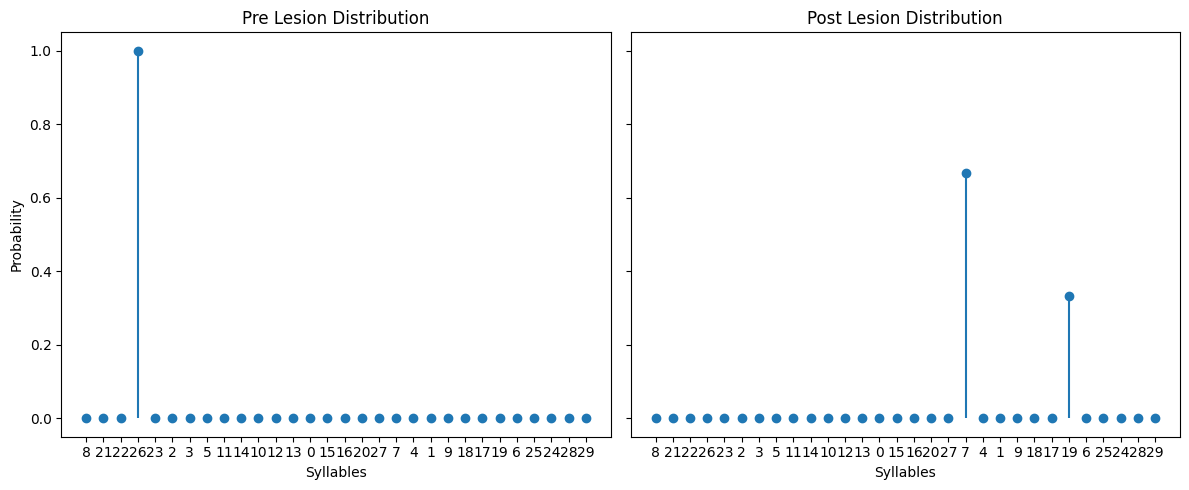

{"Earth Mover's Distance": np.float64(17.00002186104499),
 'Information Gain': np.float64(-0.6364901829913665),
 'Kullback-Leibler Divergence': np.float64(18.525233311995628)}
30 30


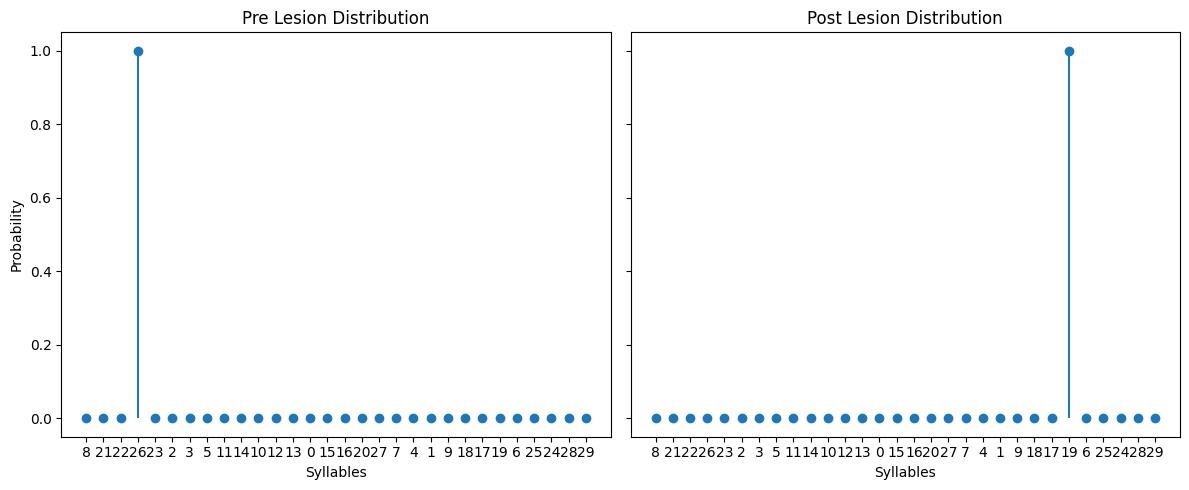

{"Earth Mover's Distance": np.float64(21.000013484534982),
 'Information Gain': np.float64(1.4311771776054103e-05),
 'Kullback-Leibler Divergence': np.float64(17.426622578816634)}
30 30


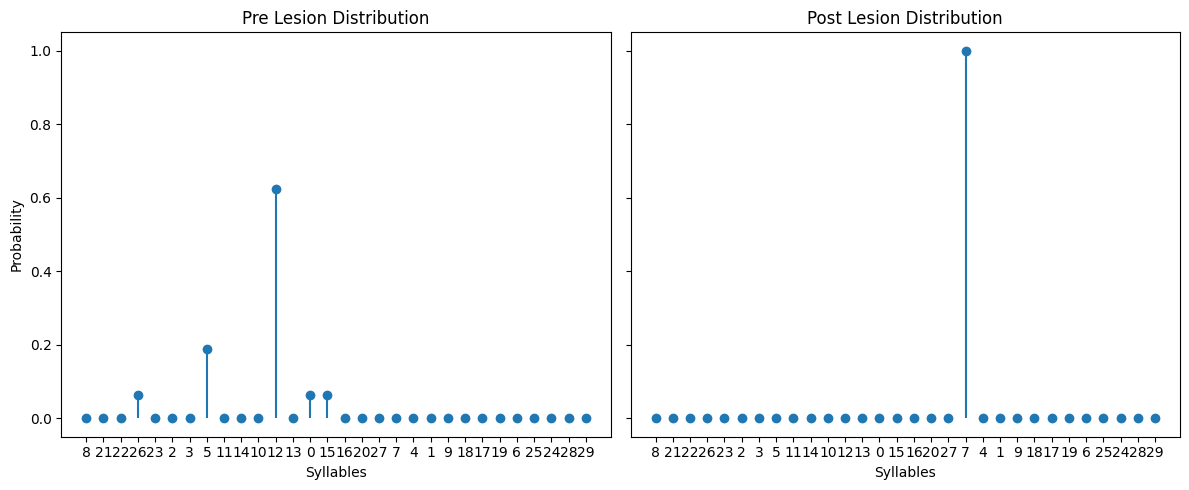

{"Earth Mover's Distance": np.float64(7.937503411500639),
 'Information Gain': np.float64(1.1274696810399392),
 'Kullback-Leibler Divergence': np.float64(16.299168155280327)}
30 30


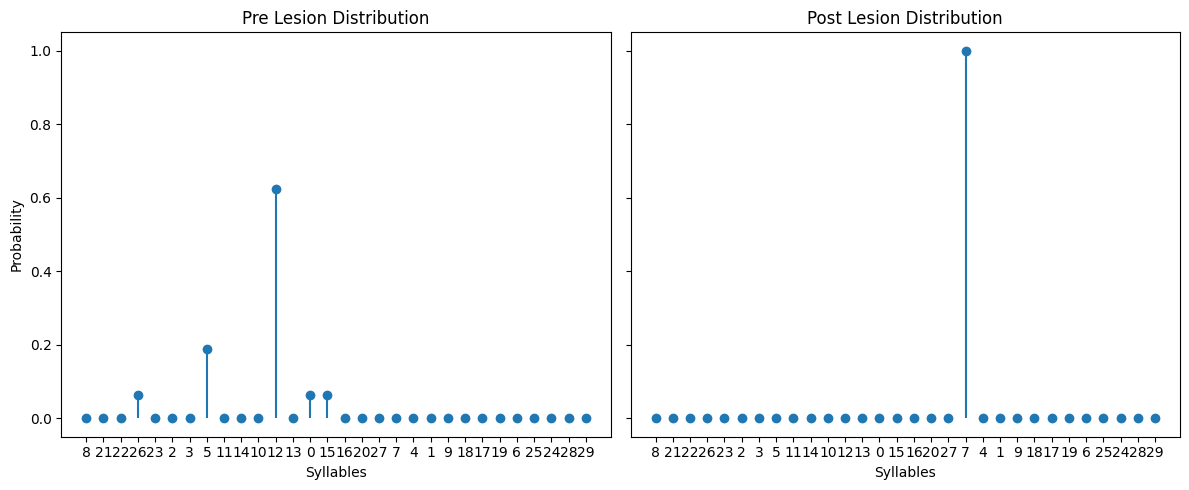

{"Earth Mover's Distance": np.float64(7.937503411500639),
 'Information Gain': np.float64(1.1274696810399392),
 'Kullback-Leibler Divergence': np.float64(16.299168155280327)}
30 30


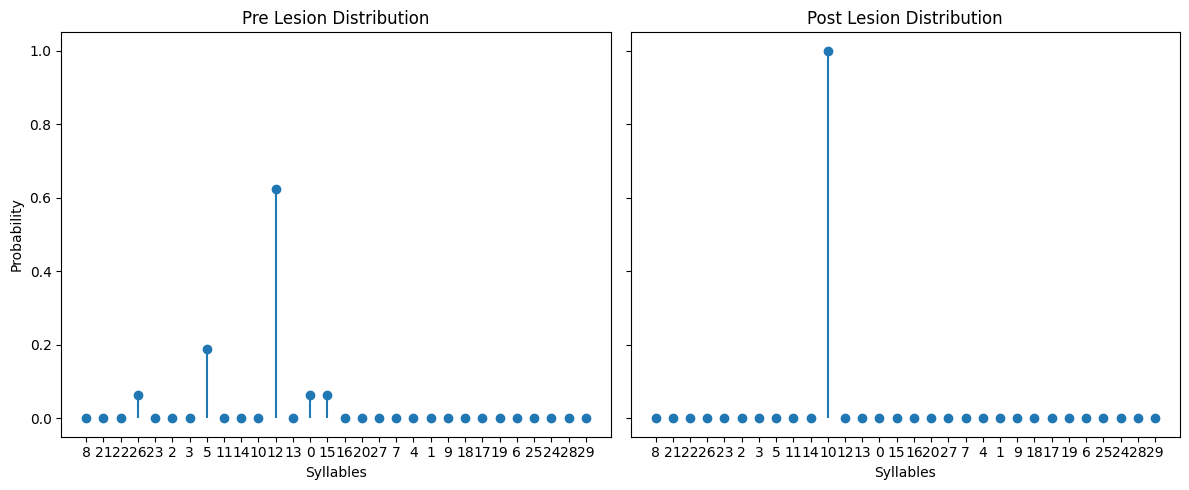

{"Earth Mover's Distance": np.float64(2.06250927422765),
 'Information Gain': np.float64(1.127469681039939),
 'Kullback-Leibler Divergence': np.float64(16.299168155280327)}
30 30


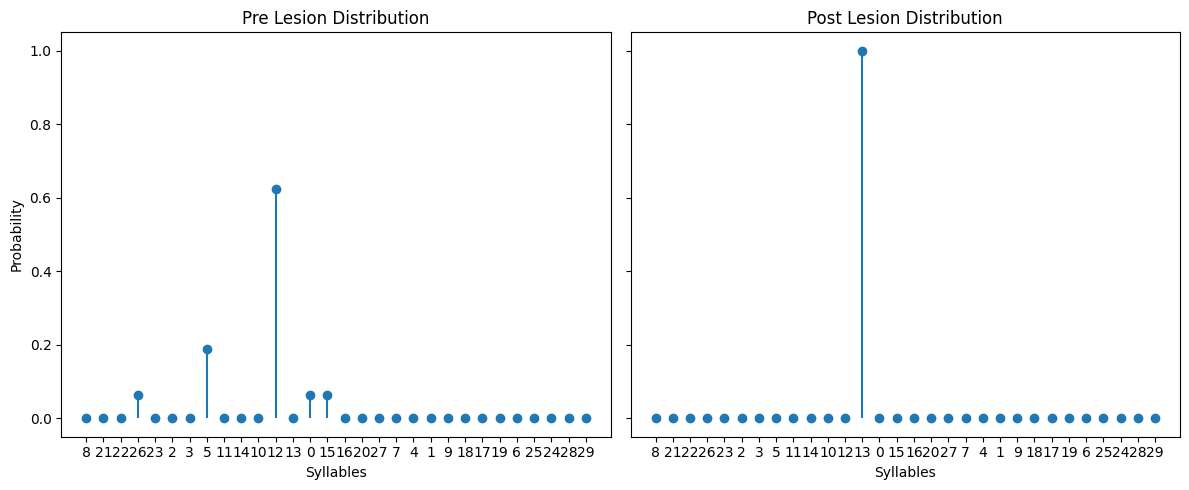

{"Earth Mover's Distance": np.float64(2.312508111790394),
 'Information Gain': np.float64(1.127469681039939),
 'Kullback-Leibler Divergence': np.float64(16.299168155280327)}
30 30


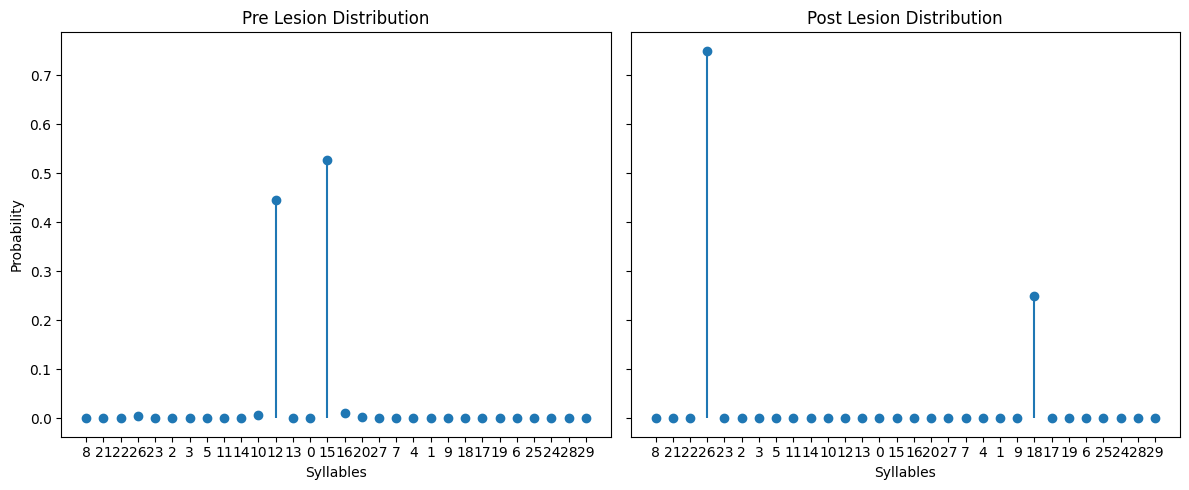

{"Earth Mover's Distance": np.float64(8.815164037041535),
 'Information Gain': np.float64(0.2702358799955942),
 'Kullback-Leibler Divergence': np.float64(17.91072753851081)}
30 30


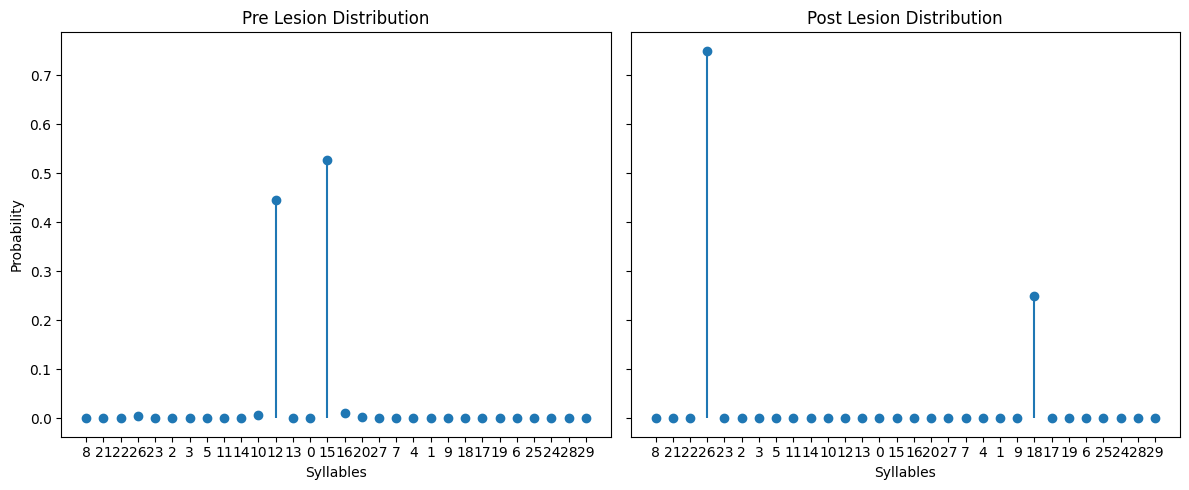

{"Earth Mover's Distance": np.float64(8.815164037041535),
 'Information Gain': np.float64(0.2702358799955942),
 'Kullback-Leibler Divergence': np.float64(17.91072753851081)}
30 30


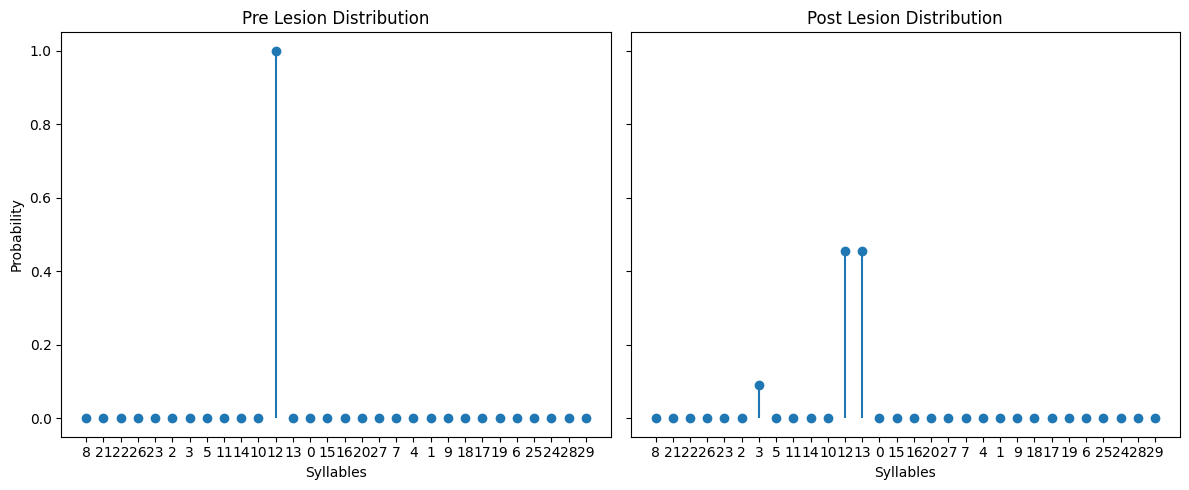

{"Earth Mover's Distance": np.float64(0.9091109954204404),
 'Information Gain': np.float64(-0.9347424688580996),
 'Kullback-Leibler Divergence': np.float64(0.7884575605622037)}
30 30


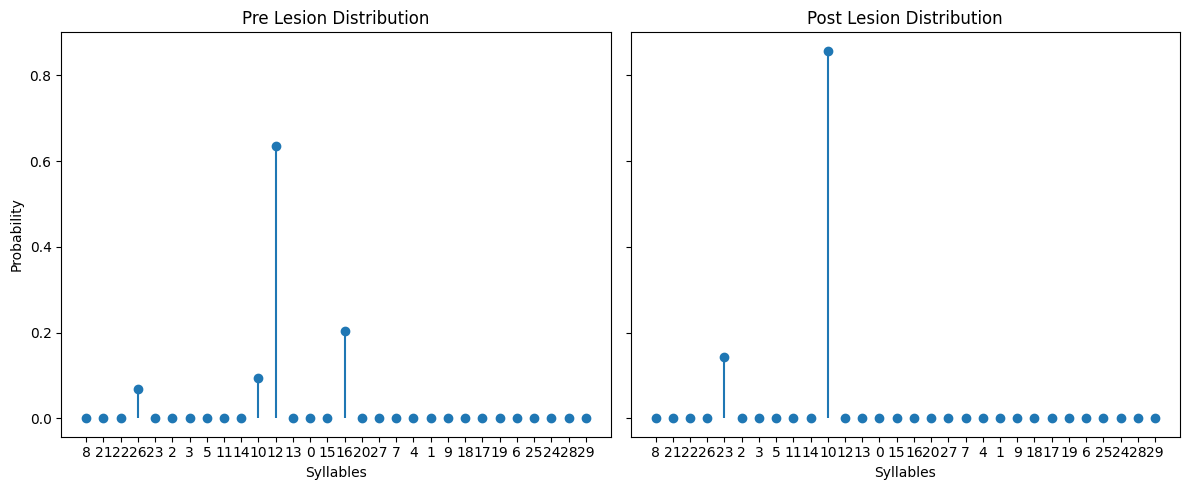

{"Earth Mover's Distance": np.float64(2.1679550860775967),
 'Information Gain': np.float64(0.6068355290052884),
 'Kullback-Leibler Divergence': np.float64(16.53764996964299)}
30 30


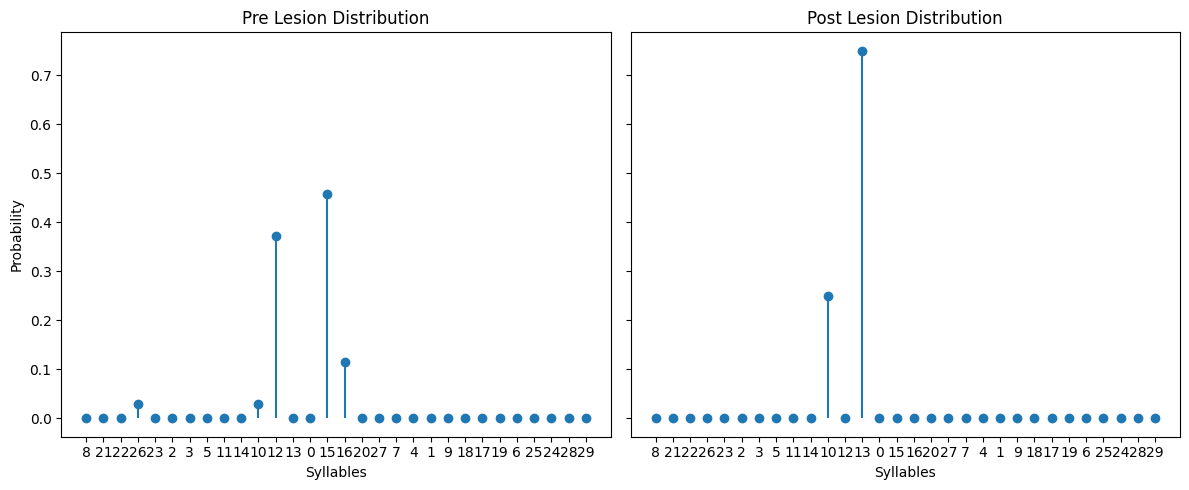

{"Earth Mover's Distance": np.float64(1.8285731966261602),
 'Information Gain': np.float64(0.6144118365057711),
 'Kullback-Leibler Divergence': np.float64(17.138291070374343)}
30 30


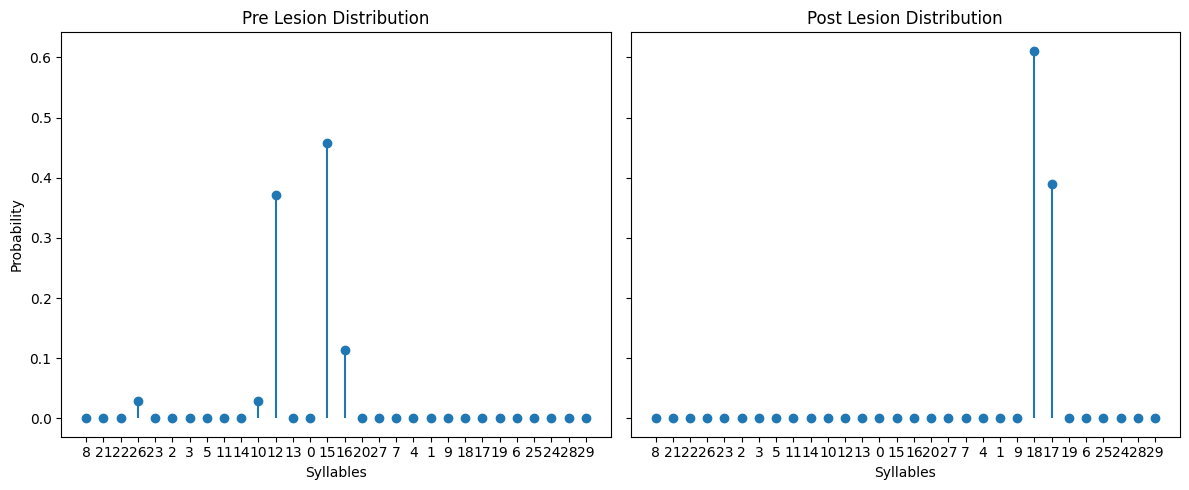

{"Earth Mover's Distance": np.float64(9.817460363683537),
 'Information Gain': np.float64(0.5085012802914783),
 'Kullback-Leibler Divergence': np.float64(19.14027260964027)}
30 30


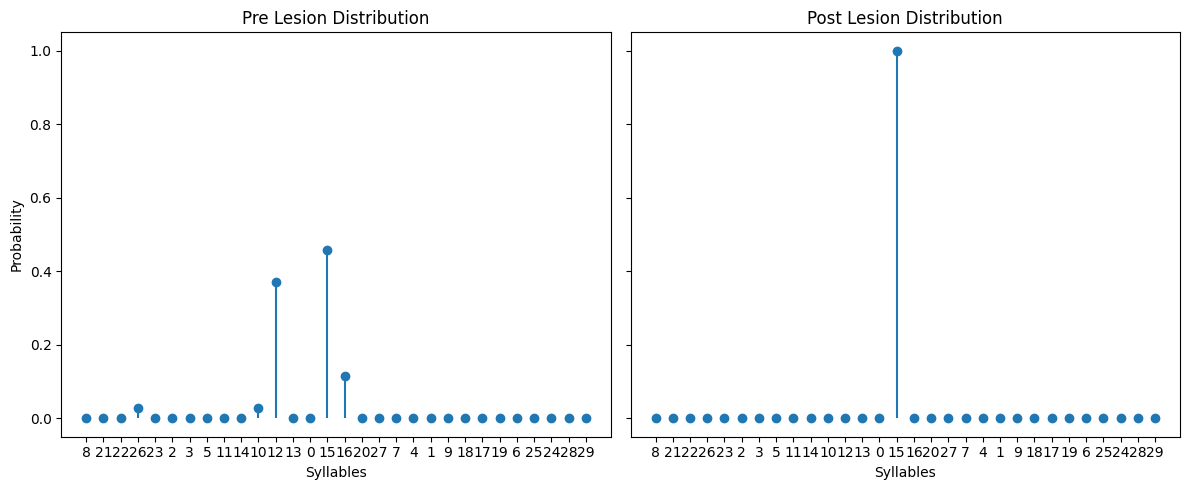

{"Earth Mover's Distance": np.float64(1.6571460370937885),
 'Information Gain': np.float64(1.176743134809619),
 'Kullback-Leibler Divergence': np.float64(8.659712280268858)}
30 30


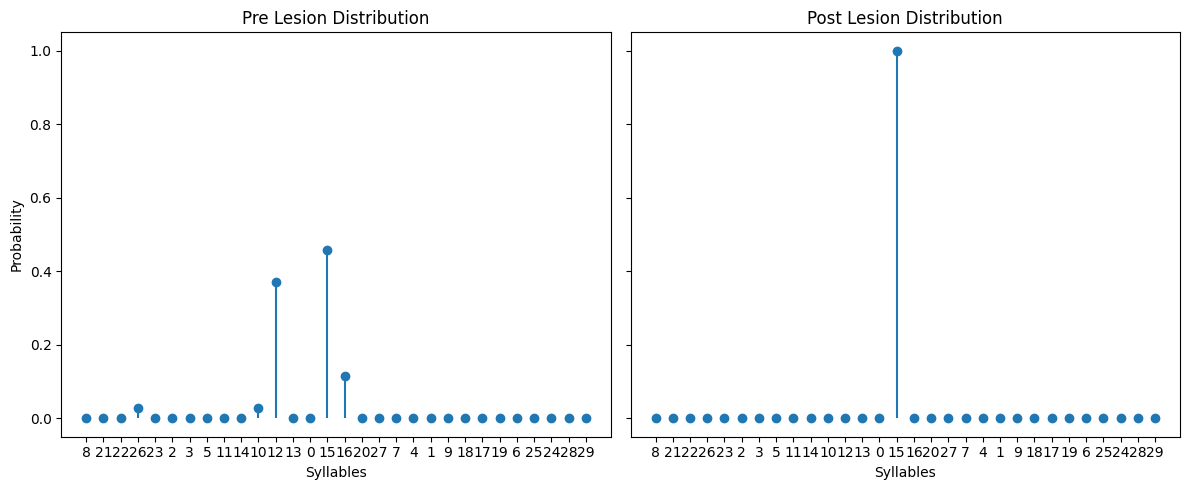

{"Earth Mover's Distance": np.float64(1.6571460370937885),
 'Information Gain': np.float64(1.176743134809619),
 'Kullback-Leibler Divergence': np.float64(8.659712280268858)}
30 30


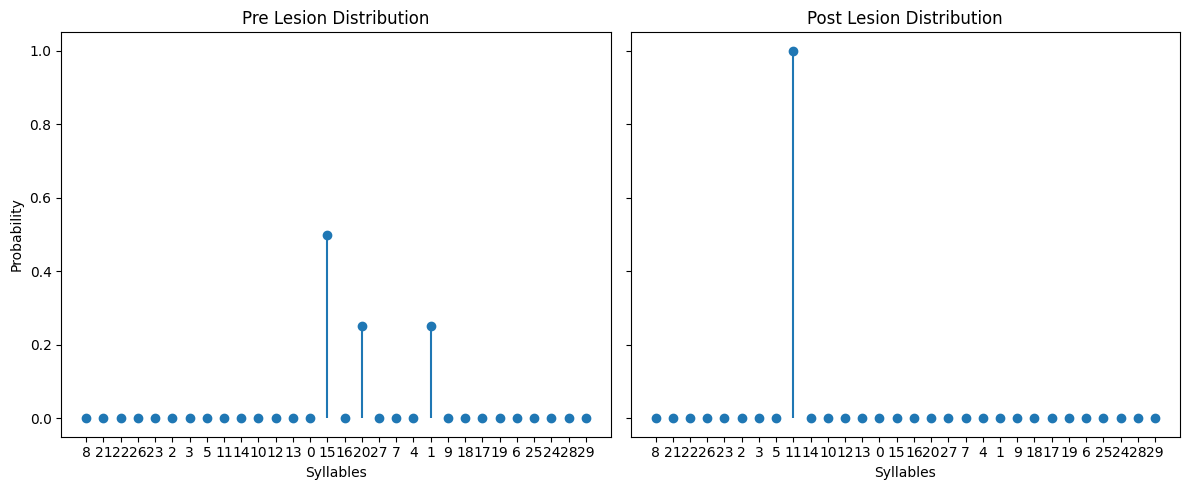

{"Earth Mover's Distance": np.float64(8.000000584766),
 'Information Gain': np.float64(1.0397224987521105),
 'Kullback-Leibler Divergence': np.float64(17.4855361961003)}
30 30


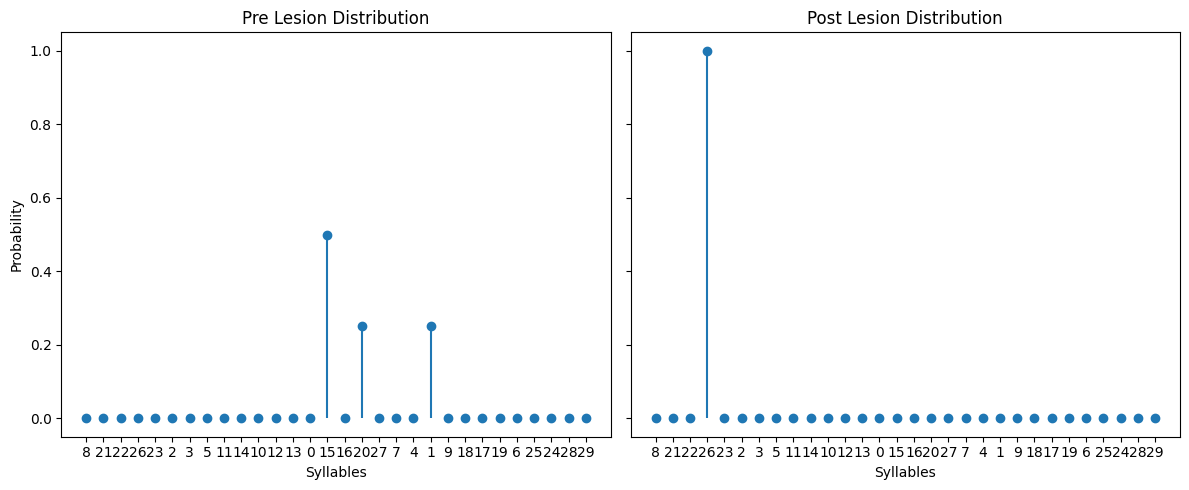

{"Earth Mover's Distance": np.float64(13.000006052440035),
 'Information Gain': np.float64(1.0397131595296698),
 'Kullback-Leibler Divergence': np.float64(16.386924463237968)}
30 30


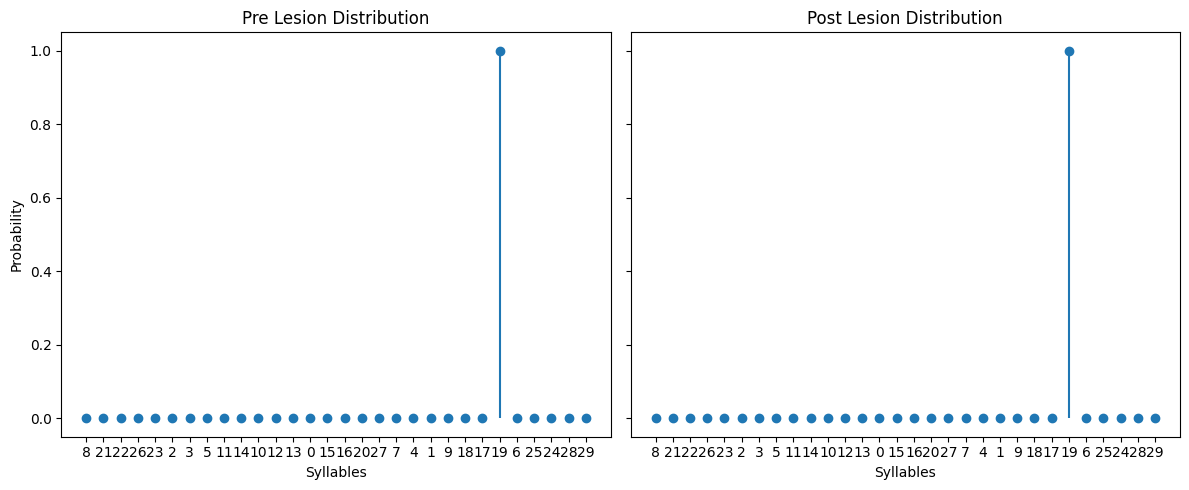

{"Earth Mover's Distance": np.float64(1.3484534996884865e-05),
 'Information Gain': np.float64(1.43117717760541e-05),
 'Kullback-Leibler Divergence': np.float64(3.435002717613748e-07)}
30 30


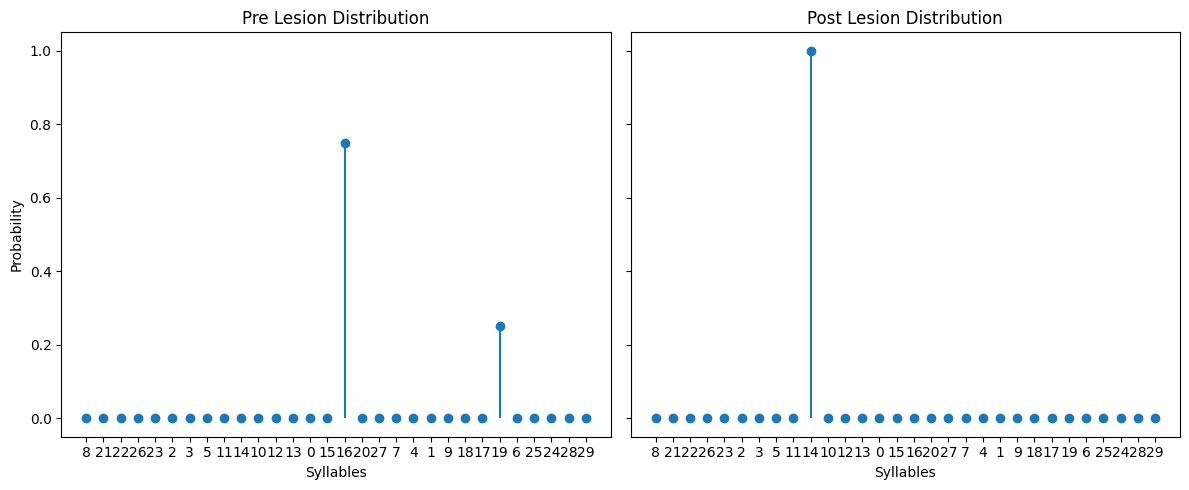

{"Earth Mover's Distance": np.float64(8.250006052440023),
 'Information Gain': np.float64(0.5623279760576936),
 'Kullback-Leibler Divergence': np.float64(16.86430964670994)}
30 30


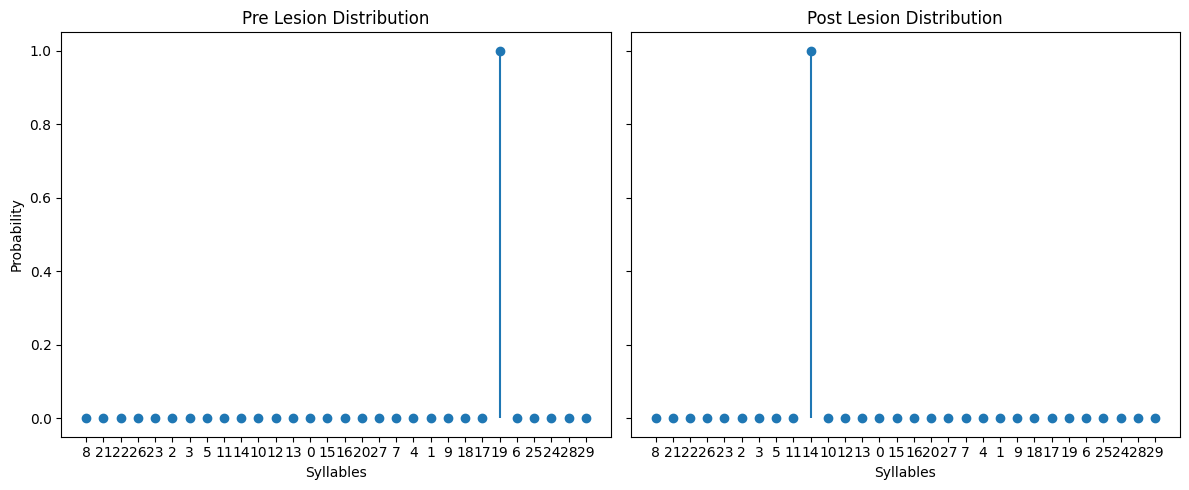

{"Earth Mover's Distance": np.float64(14.999998695045),
 'Information Gain': np.float64(1.4311771775832057e-05),
 'Kullback-Leibler Divergence': np.float64(17.426622578816637)}
30 30


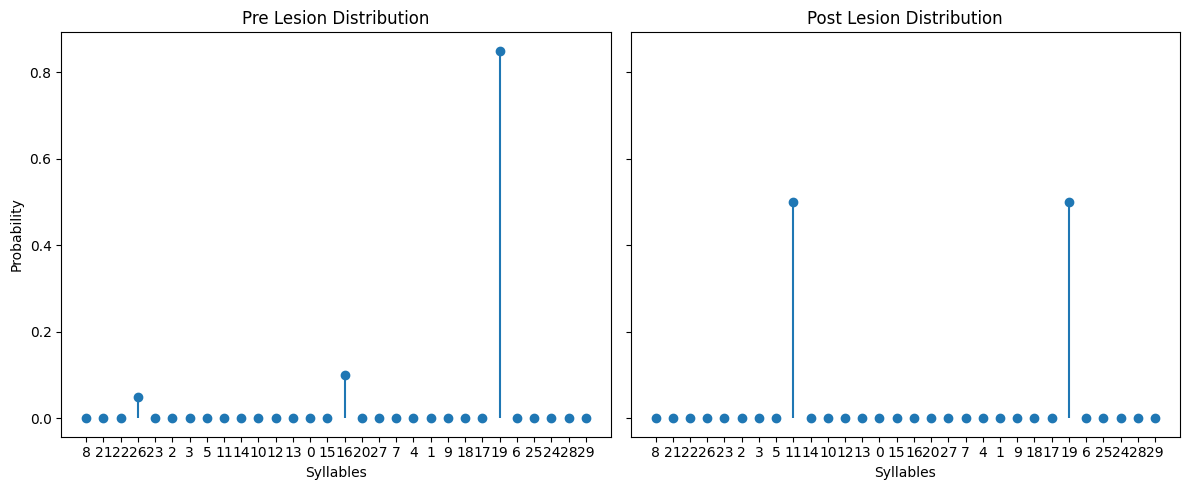

{"Earth Mover's Distance": np.float64(6.550004337347511),
 'Information Gain': np.float64(-0.17496640147480746),
 'Kullback-Leibler Divergence': np.float64(2.7889586845375223)}
30 30


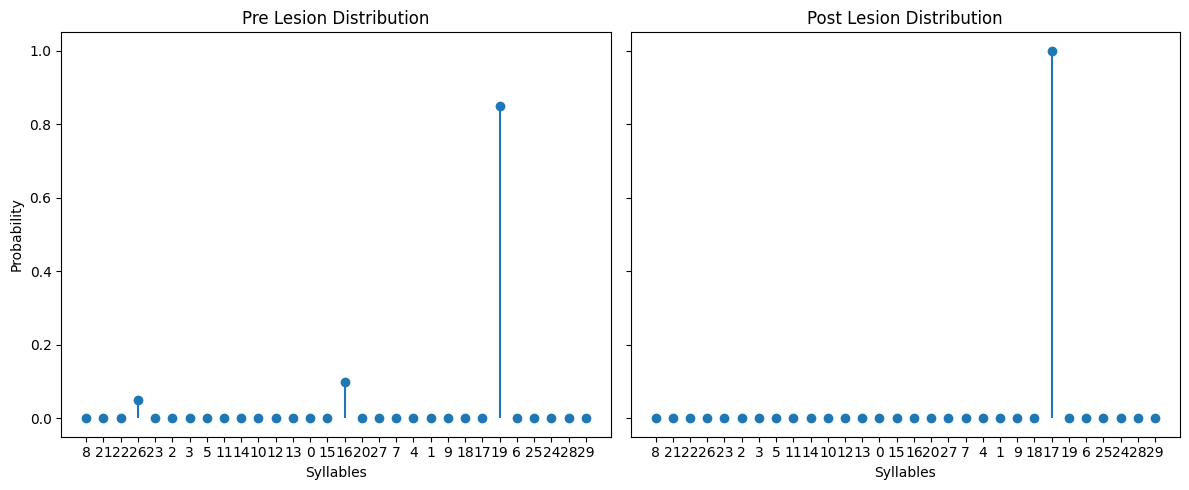

{"Earth Mover's Distance": np.float64(2.649998183500003),
 'Information Gain': np.float64(0.5181733104955201),
 'Kullback-Leibler Divergence': np.float64(16.908464507520225)}
30 30


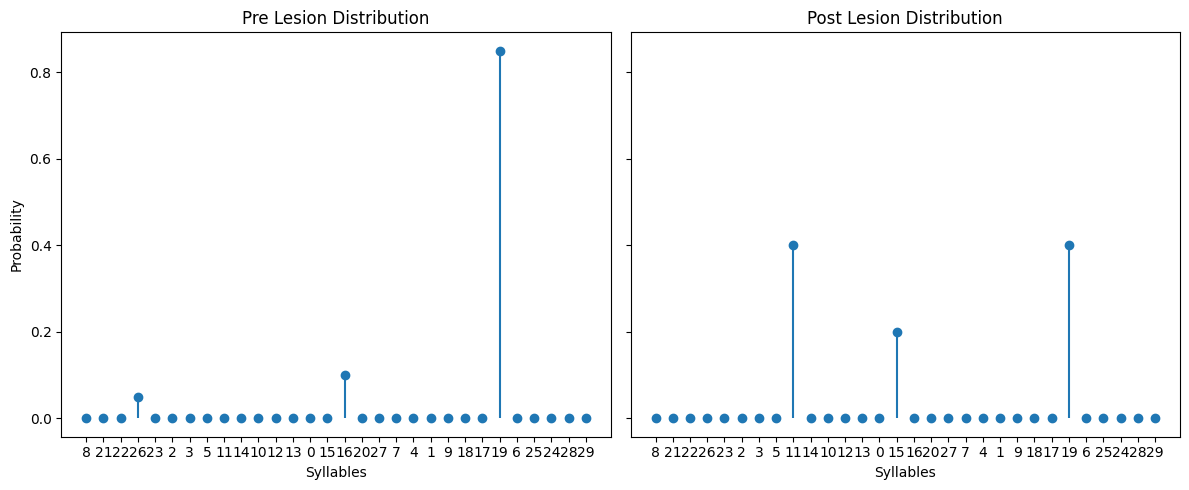

{"Earth Mover's Distance": np.float64(6.950001054295996),
 'Information Gain': np.float64(-0.5367351893169149),
 'Kullback-Leibler Divergence': np.float64(3.1160740780440377)}
30 30


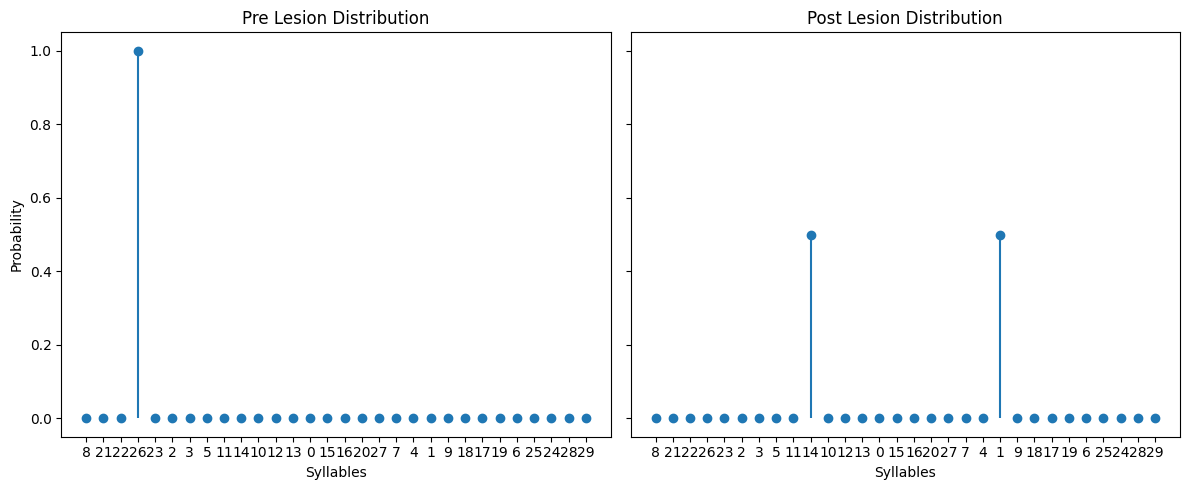

{"Earth Mover's Distance": np.float64(11.500019766917472),
 'Information Gain': np.float64(-0.6931254001985515),
 'Kullback-Leibler Divergence': np.float64(18.119768377822442)}
30 30


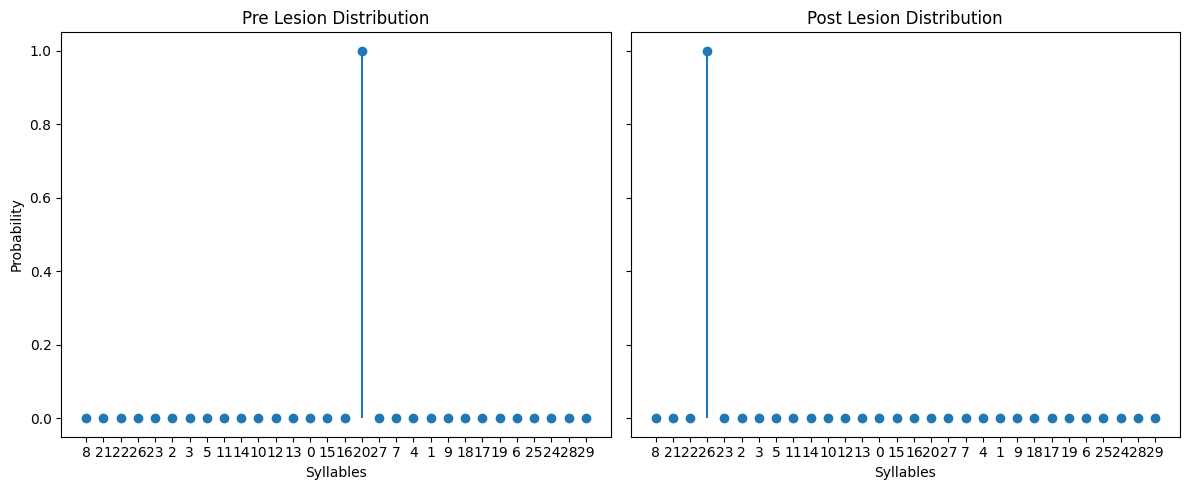

{"Earth Mover's Distance": np.float64(13.00000020274499),
 'Information Gain': np.float64(4.992943779704252e-07),
 'Kullback-Leibler Divergence': np.float64(17.42663687941331)}
30 30


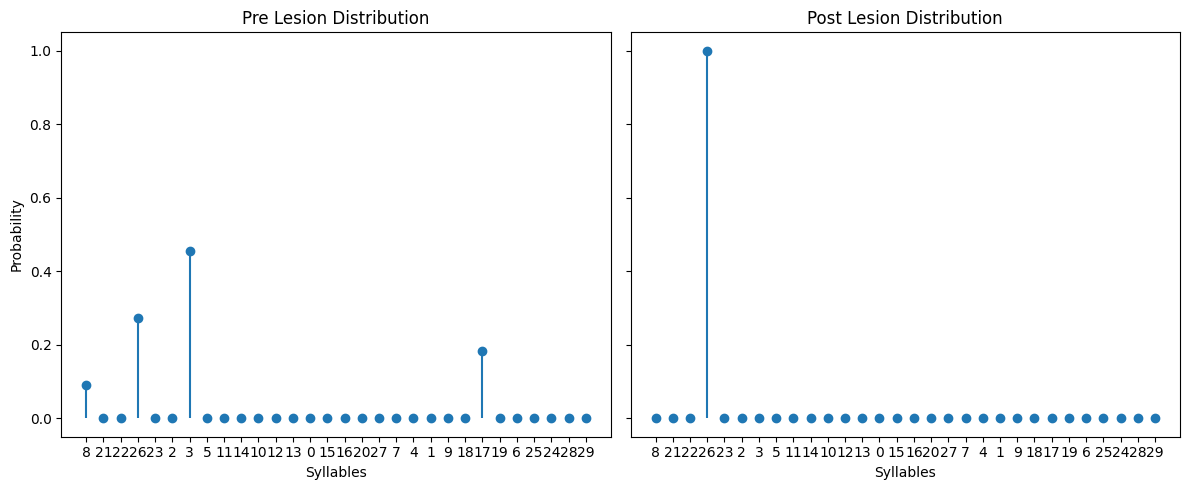

{"Earth Mover's Distance": np.float64(5.272737206234865),
 'Information Gain': np.float64(1.2406723555034957),
 'Kullback-Leibler Divergence': np.float64(11.433243006205318)}
30 30


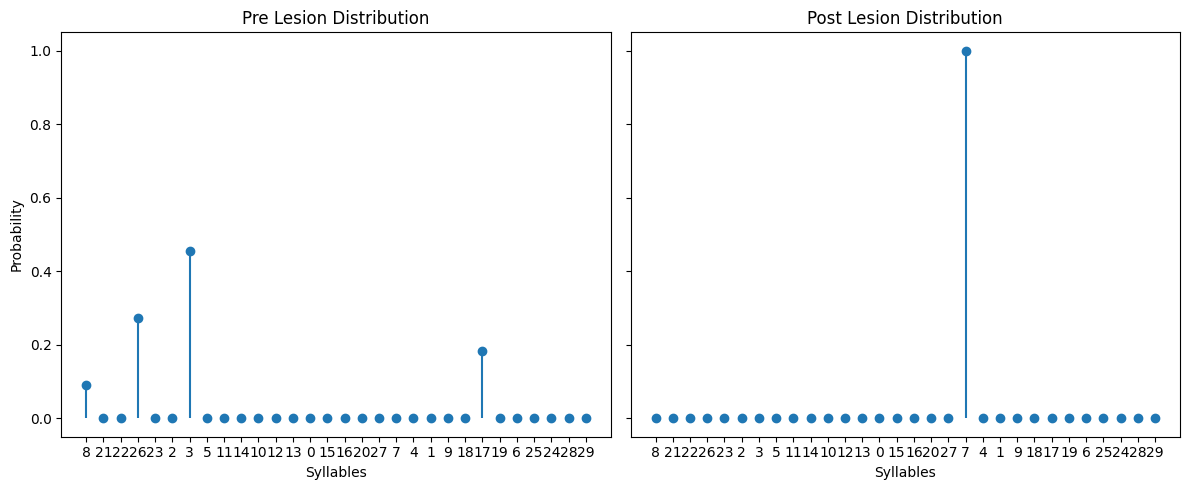

{"Earth Mover's Distance": np.float64(12.09091178808665),
 'Information Gain': np.float64(1.240672355503496),
 'Kullback-Leibler Divergence': np.float64(16.185965422575123)}
30 30


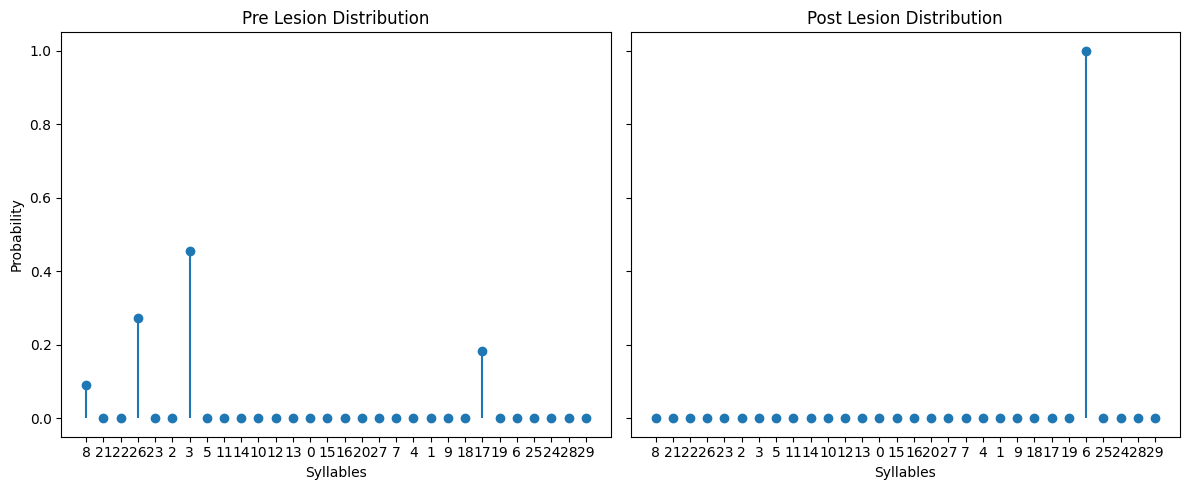

{"Earth Mover's Distance": np.float64(17.27272321599682),
 'Information Gain': np.float64(1.2406723555034962),
 'Kullback-Leibler Divergence': np.float64(16.185965422575123)}
30 30


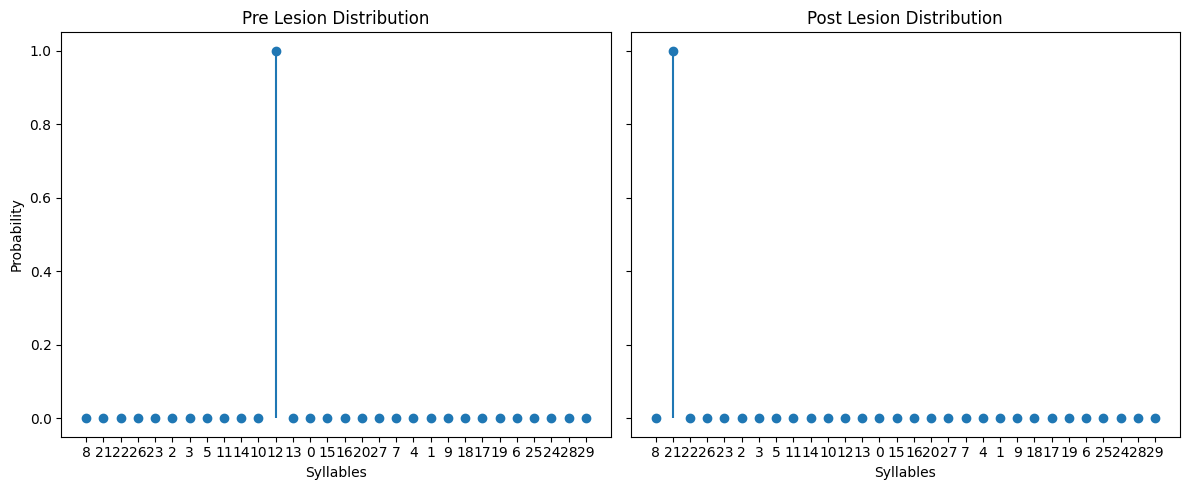

{"Earth Mover's Distance": np.float64(10.00000033131498),
 'Information Gain': np.float64(4.992943781924647e-07),
 'Kullback-Leibler Divergence': np.float64(17.42663687941331)}
30 30


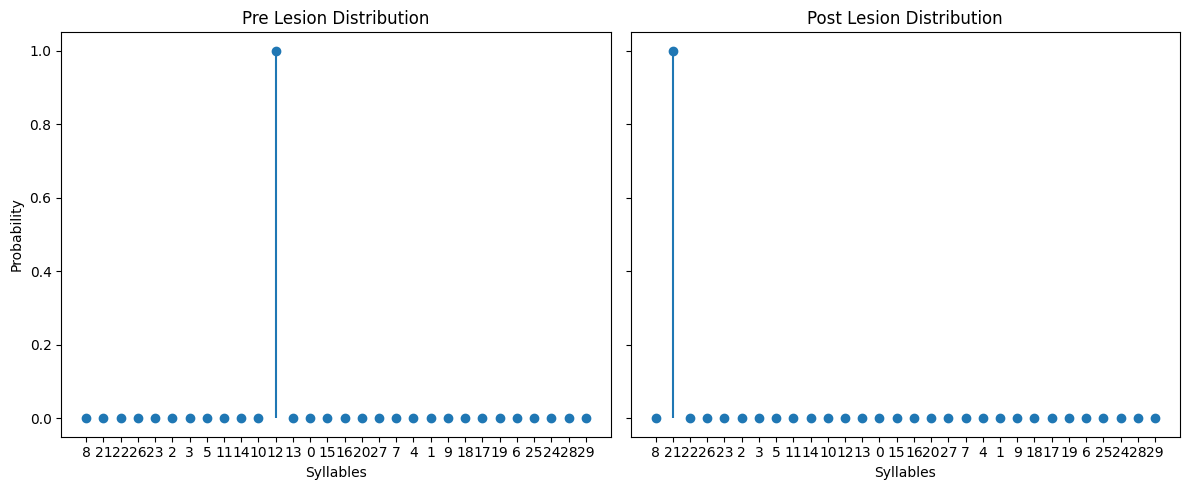

{"Earth Mover's Distance": np.float64(10.00000033131498),
 'Information Gain': np.float64(4.992943781924647e-07),
 'Kullback-Leibler Divergence': np.float64(17.42663687941331)}
30 30


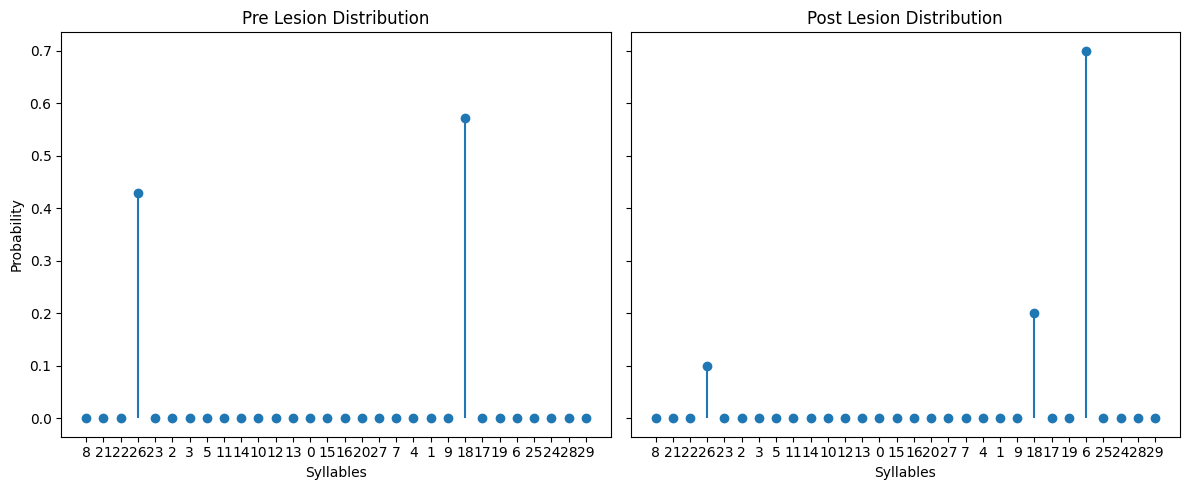

{"Earth Mover's Distance": np.float64(8.342859607709215),
 'Information Gain': np.float64(-0.11890765770608624),
 'Kullback-Leibler Divergence': np.float64(1.2235925373430387)}
30 30


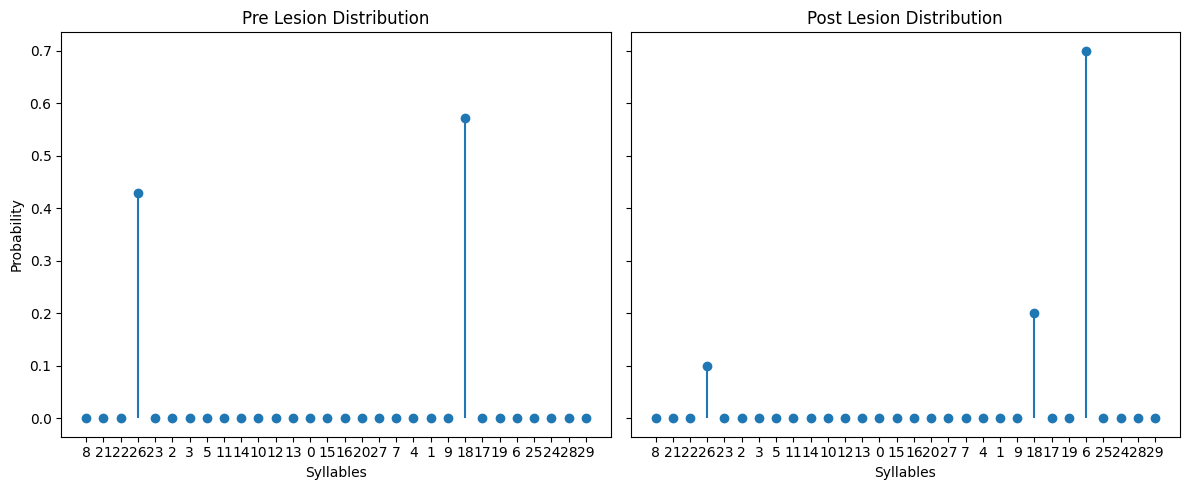

{"Earth Mover's Distance": np.float64(8.342859607709215),
 'Information Gain': np.float64(-0.11890765770608624),
 'Kullback-Leibler Divergence': np.float64(1.2235925373430387)}
30 30


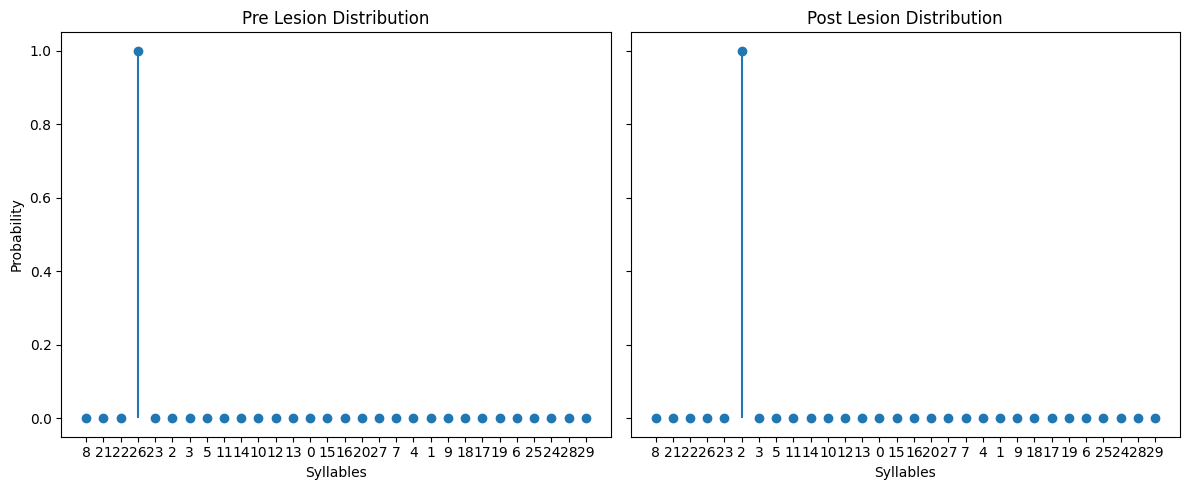

{"Earth Mover's Distance": np.float64(2.000013484534951),
 'Information Gain': np.float64(1.431177177583206e-05),
 'Kullback-Leibler Divergence': np.float64(17.426622578816634)}
30 30


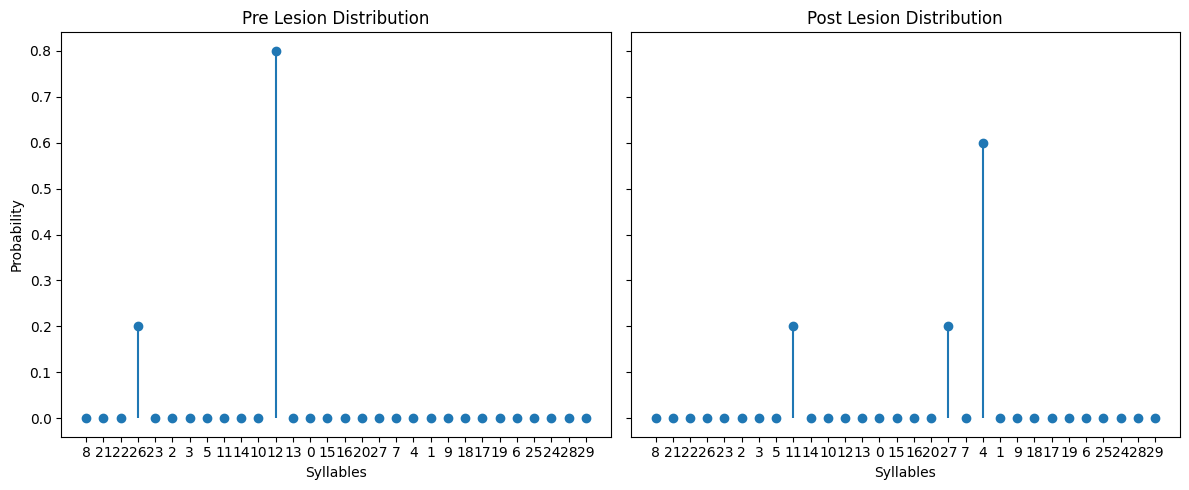

{"Earth Mover's Distance": np.float64(7.000002696906989),
 'Information Gain': np.float64(-0.44986499614996767),
 'Kullback-Leibler Divergence': np.float64(18.53568063927428)}
30 30


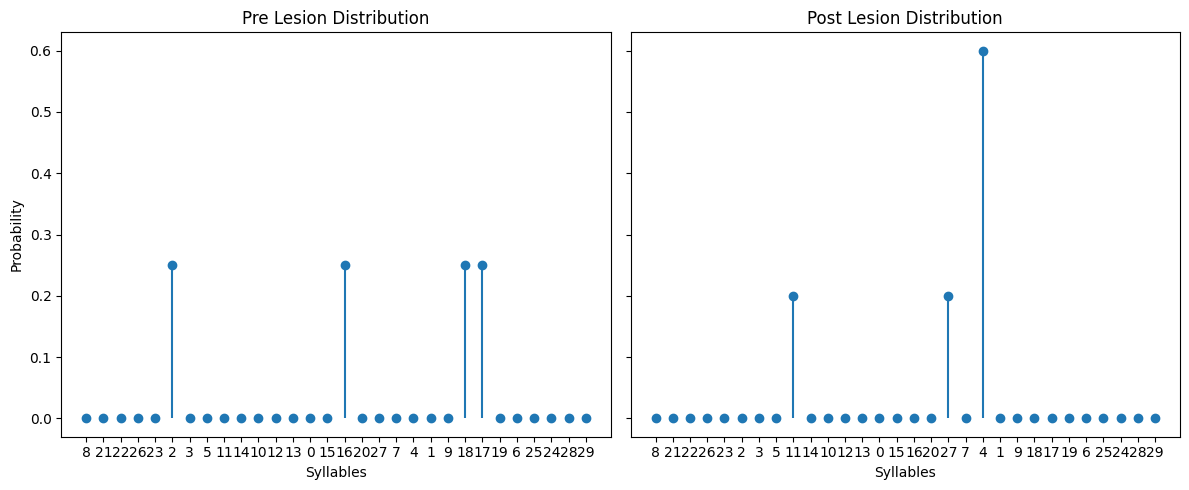

{"Earth Mover's Distance": np.float64(3.6500025200344),
 'Information Gain': np.float64(0.43602747646951046),
 'Kullback-Leibler Divergence': np.float64(17.649788017141546)}
30 30


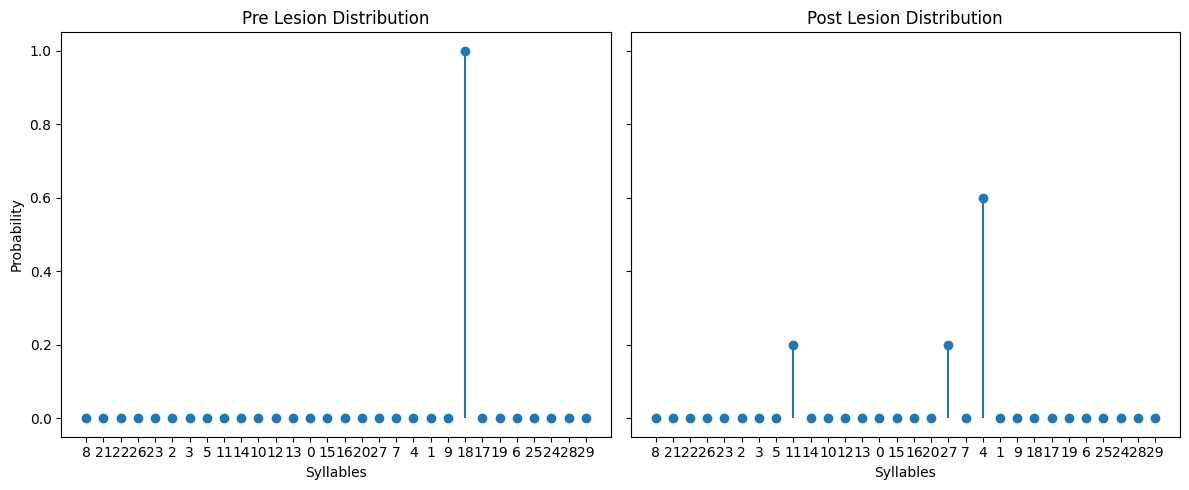

{"Earth Mover's Distance": np.float64(5.600001569089799),
 'Information Gain': np.float64(-0.9502445778088626),
 'Kullback-Leibler Divergence': np.float64(19.03605782872415)}
30 30


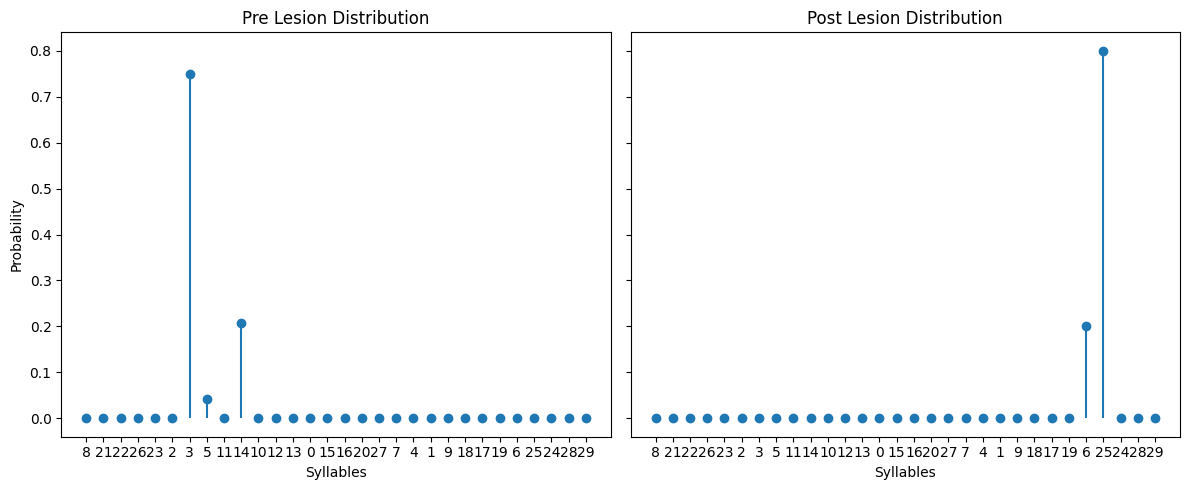

{"Earth Mover's Distance": np.float64(19.133332507095584),
 'Information Gain': np.float64(0.17457072461074352),
 'Kullback-Leibler Divergence': np.float64(18.361113419005328)}
30 30


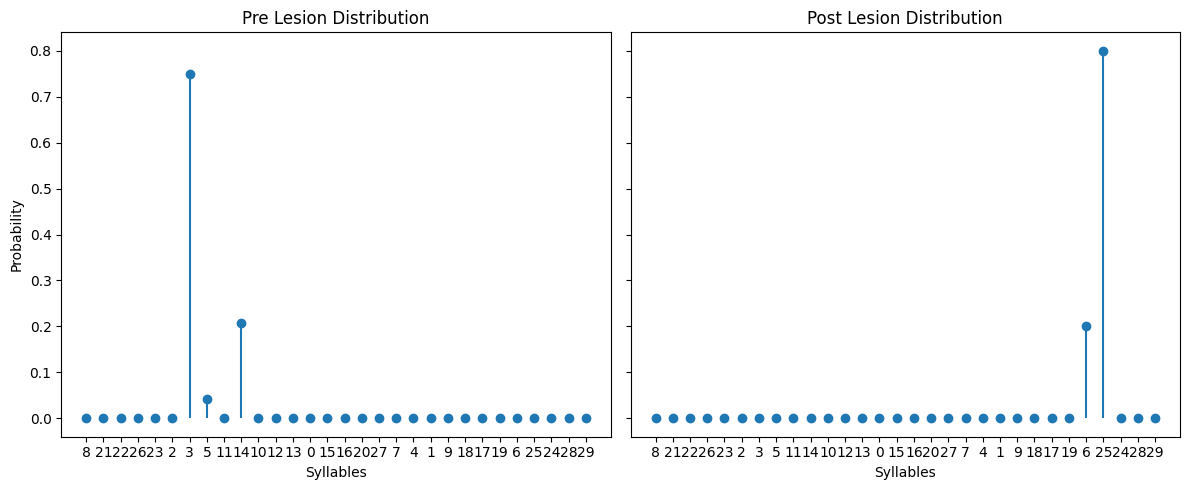

{"Earth Mover's Distance": np.float64(19.133332507095584),
 'Information Gain': np.float64(0.17457072461074352),
 'Kullback-Leibler Divergence': np.float64(18.361113419005328)}
30 30


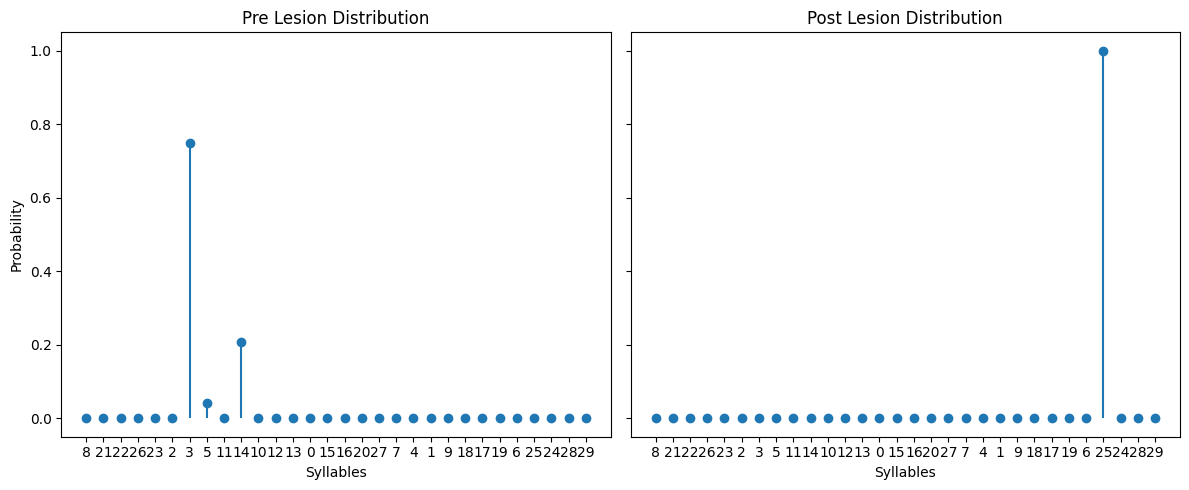

{"Earth Mover's Distance": np.float64(19.333328291819583),
 'Information Gain': np.float64(0.6749616694582451),
 'Kullback-Leibler Divergence': np.float64(16.75167617703119)}
30 30


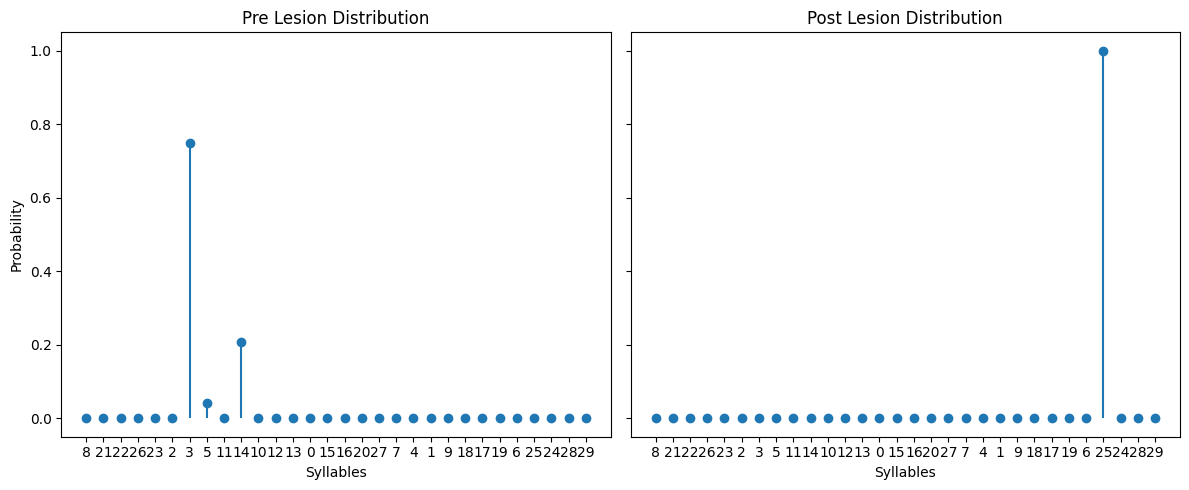

{"Earth Mover's Distance": np.float64(19.333328291819583),
 'Information Gain': np.float64(0.6749616694582451),
 'Kullback-Leibler Divergence': np.float64(16.75167617703119)}
30 30


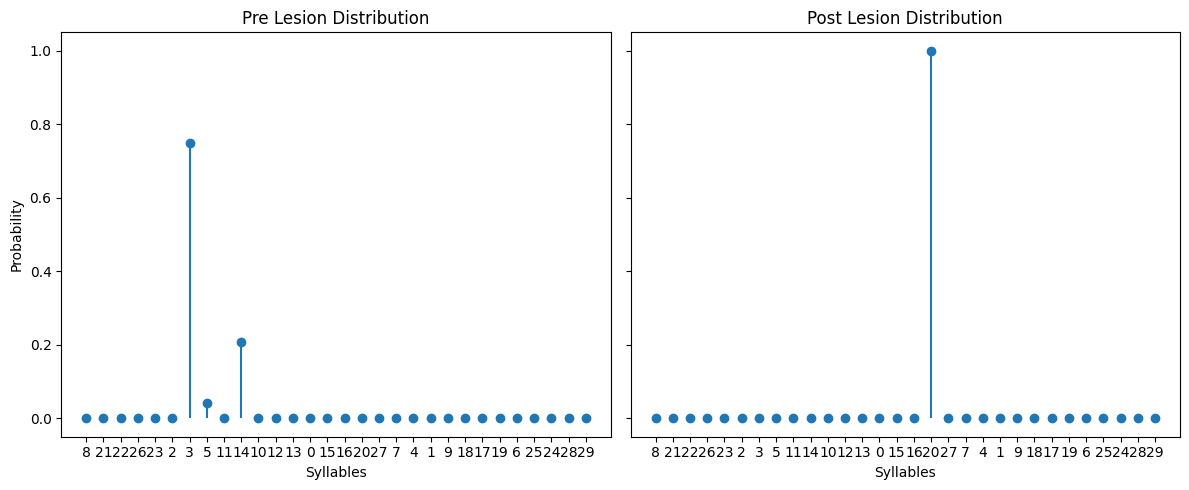

{"Earth Mover's Distance": np.float64(9.333339409003763),
 'Information Gain': np.float64(0.6749616694582449),
 'Kullback-Leibler Divergence': np.float64(16.75167617703119)}
30 30


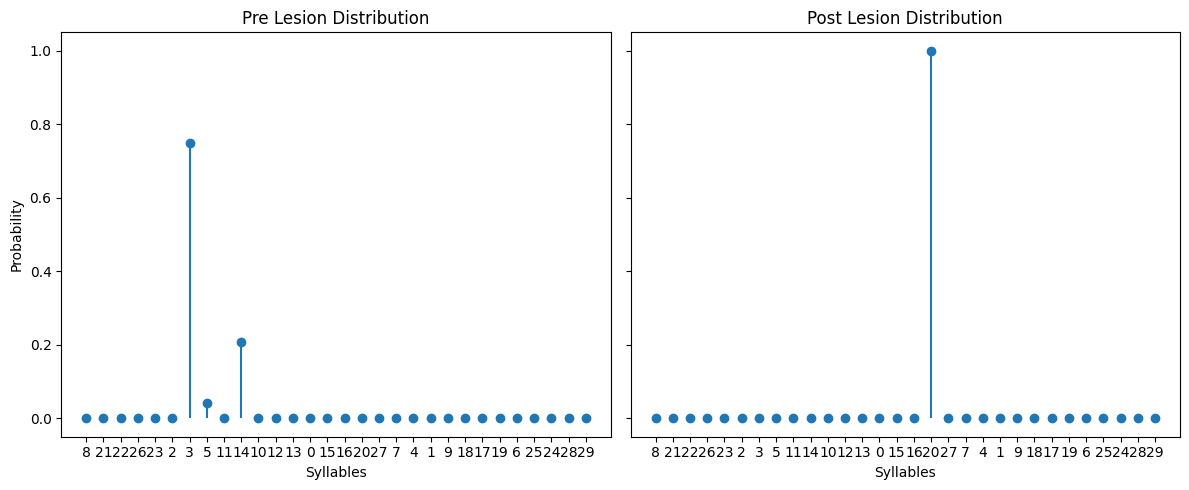

{"Earth Mover's Distance": np.float64(9.333339409003763),
 'Information Gain': np.float64(0.6749616694582449),
 'Kullback-Leibler Divergence': np.float64(16.75167617703119)}
30 30


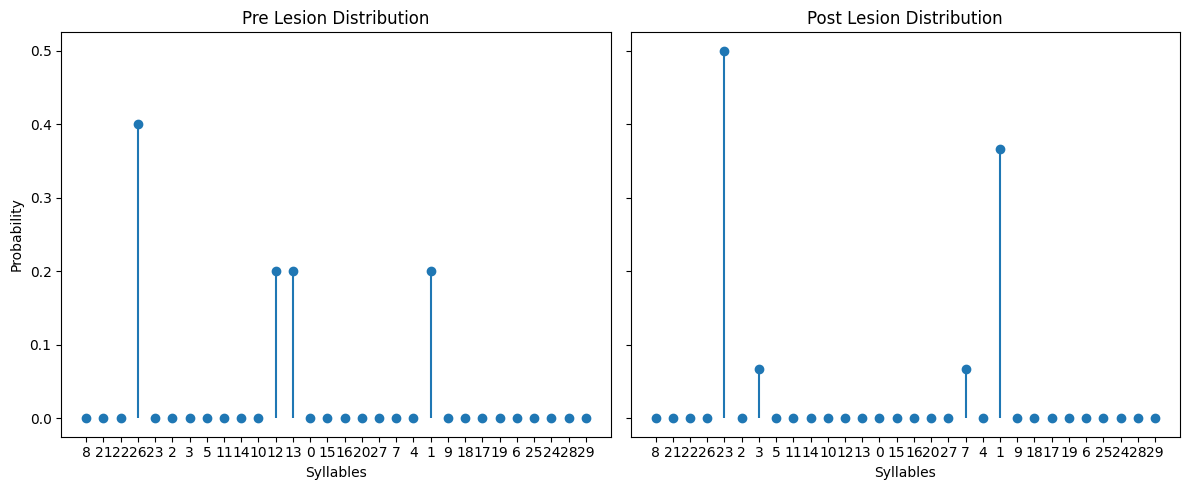

{"Earth Mover's Distance": np.float64(3.2000036370649063),
 'Information Gain': np.float64(0.2566594021467101),
 'Kullback-Leibler Divergence': np.float64(15.530755747963049)}
30 30


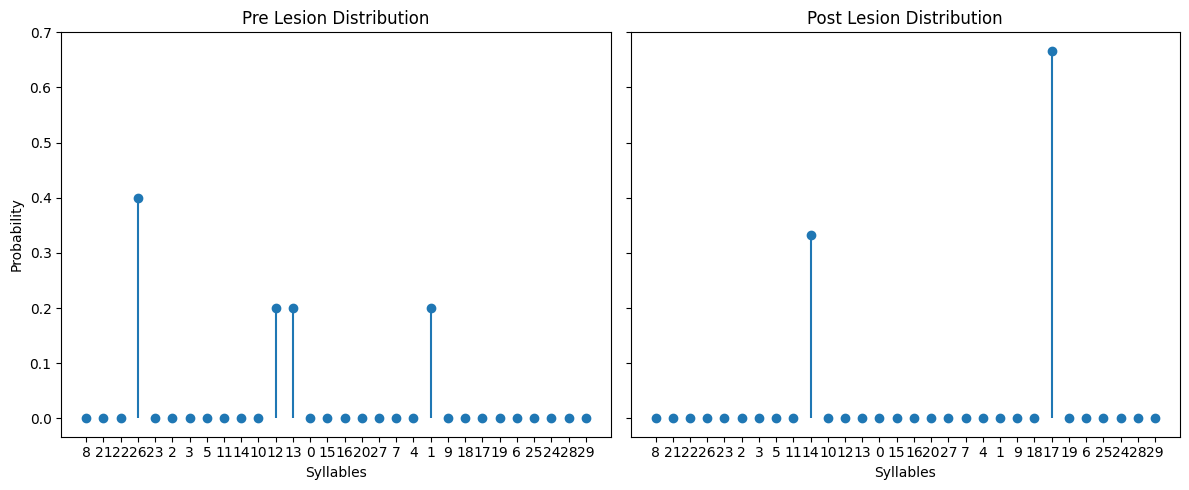

{"Earth Mover's Distance": np.float64(8.533334354938331),
 'Information Gain': np.float64(0.6956653469620935),
 'Kullback-Leibler Divergence': np.float64(17.19307937508867)}
30 30


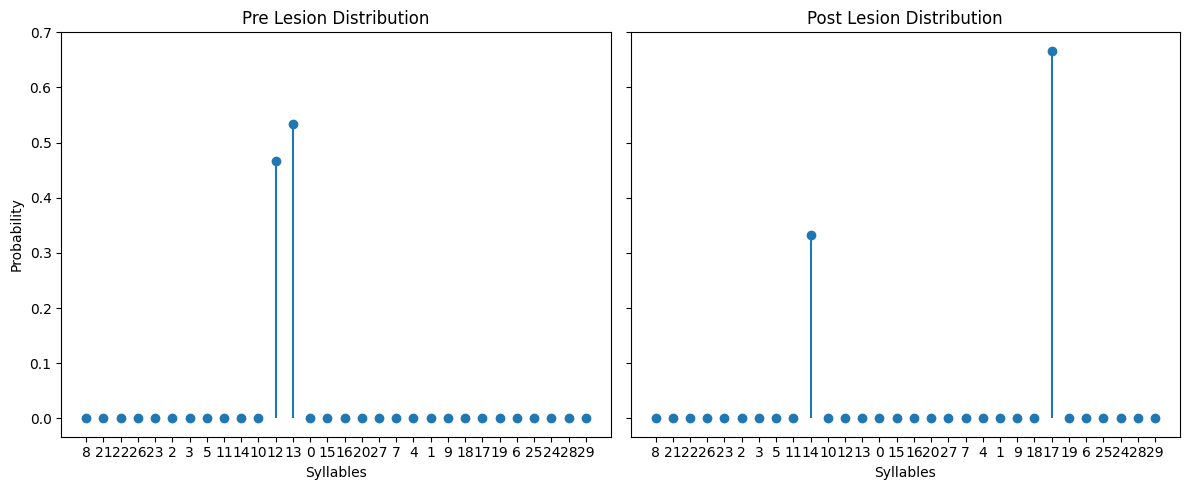

{"Earth Mover's Distance": np.float64(8.133333682628333),
 'Information Gain': np.float64(0.05440510076991023),
 'Kullback-Leibler Divergence': np.float64(17.834339975291766)}
30 30


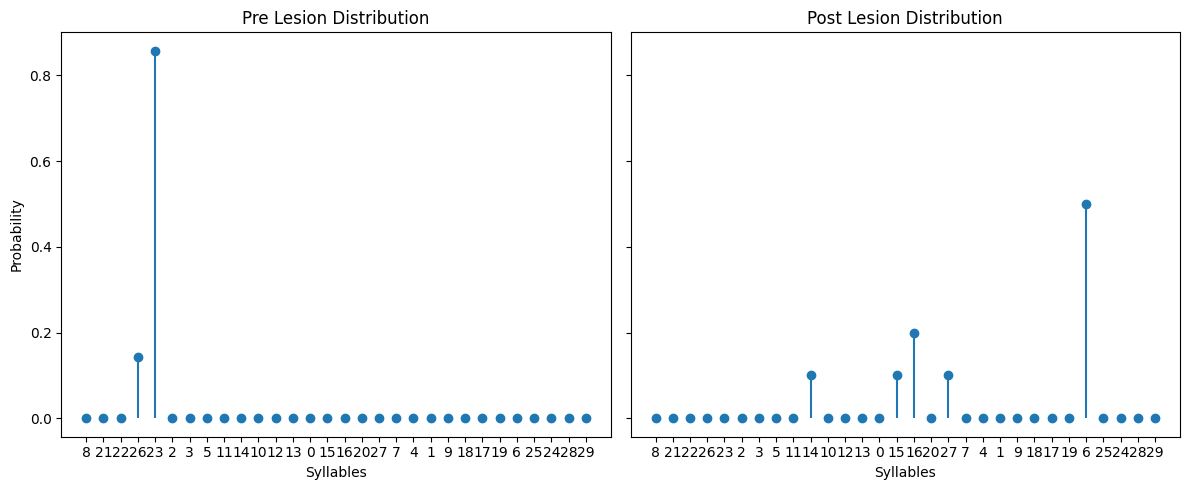

{"Earth Mover's Distance": np.float64(15.64285960770918),
 'Information Gain': np.float64(-0.9491173773411624),
 'Kullback-Leibler Divergence': np.float64(19.319115315452706)}
30 30


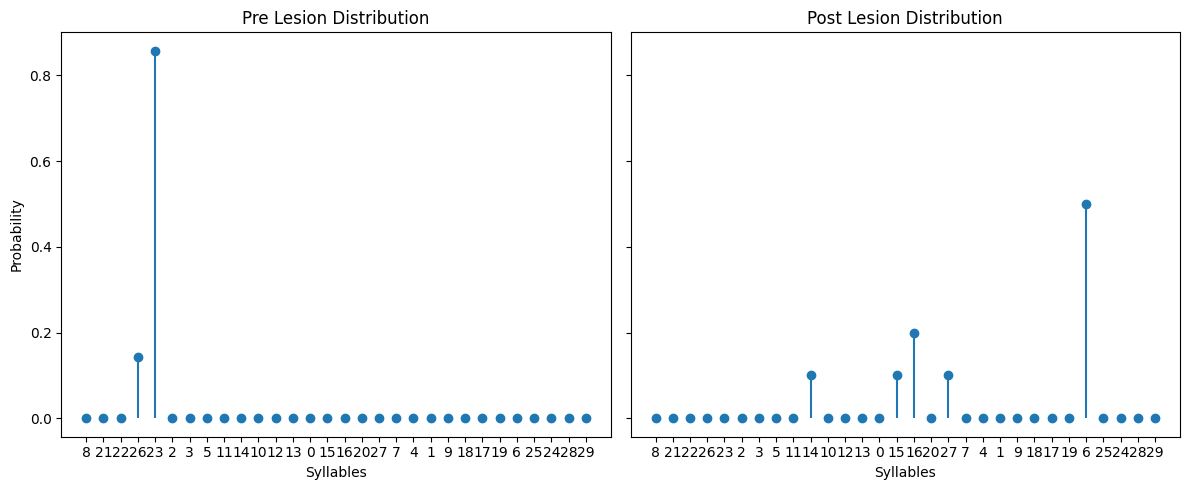

{"Earth Mover's Distance": np.float64(15.64285960770918),
 'Information Gain': np.float64(-0.9491173773411624),
 'Kullback-Leibler Divergence': np.float64(19.319115315452706)}
30 30


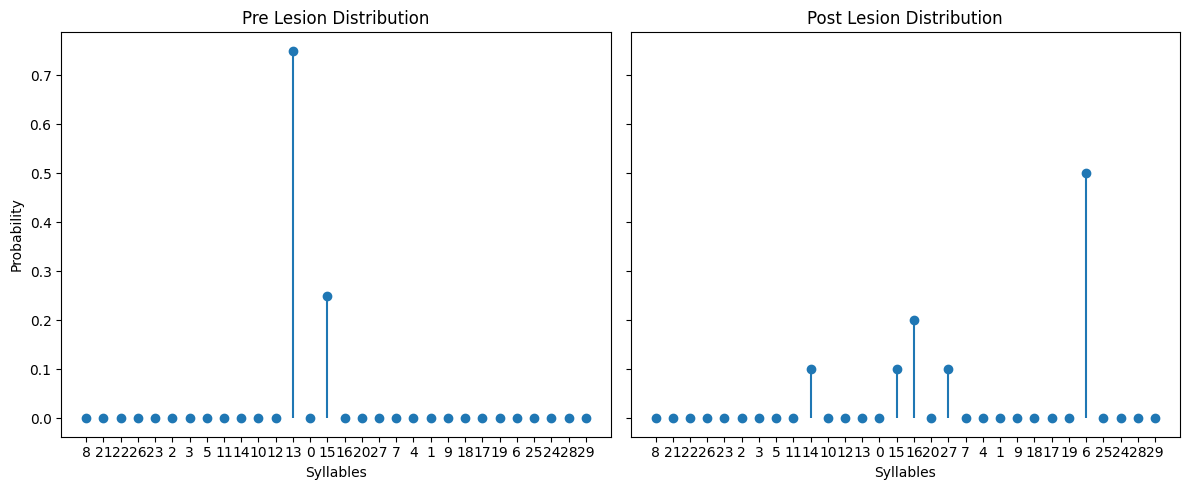

{"Earth Mover's Distance": np.float64(7.600004509857104),
 'Information Gain': np.float64(-0.7968956003438445),
 'Kullback-Leibler Divergence': np.float64(14.810231951475725)}
30 30


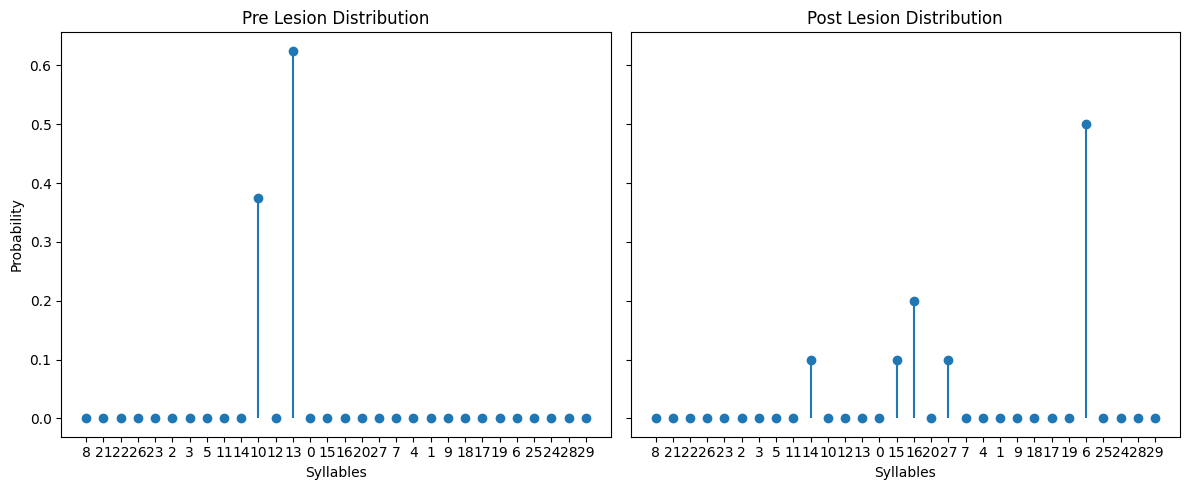

{"Earth Mover's Distance": np.float64(8.450001913677987),
 'Information Gain': np.float64(-0.6976710286652202),
 'Kullback-Leibler Divergence': np.float64(19.067669056244505)}
30 30


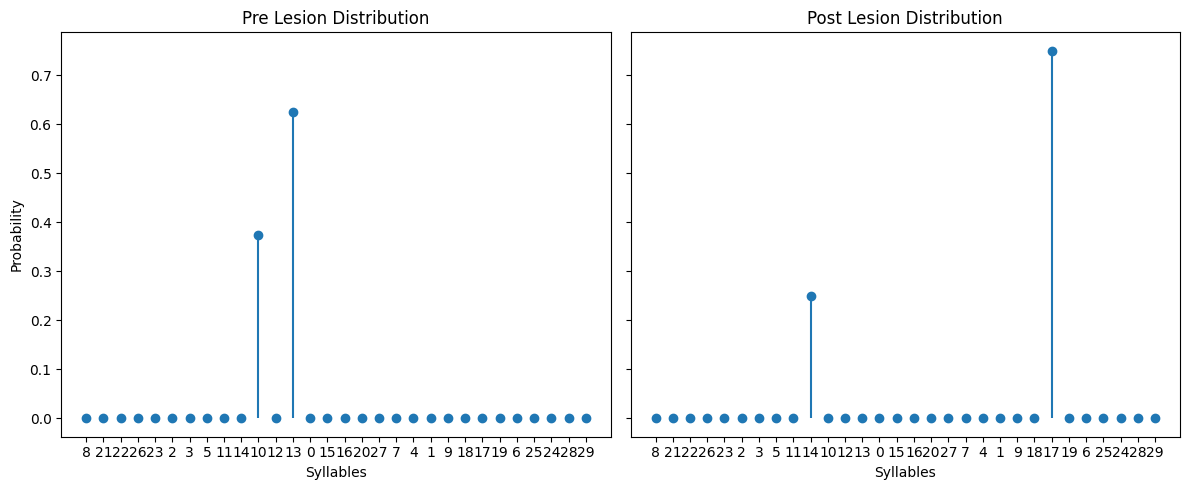

{"Earth Mover's Distance": np.float64(8.750000110026232),
 'Information Gain': np.float64(0.09922819749083922),
 'Kullback-Leibler Divergence': np.float64(18.15137882048595)}
30 30


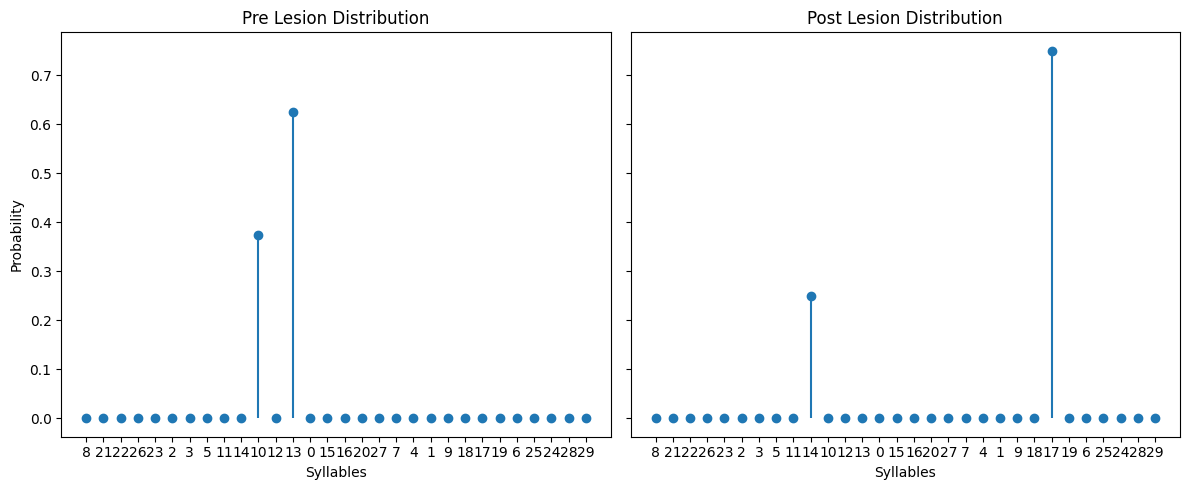

{"Earth Mover's Distance": np.float64(8.750000110026232),
 'Information Gain': np.float64(0.09922819749083922),
 'Kullback-Leibler Divergence': np.float64(18.15137882048595)}
30 30


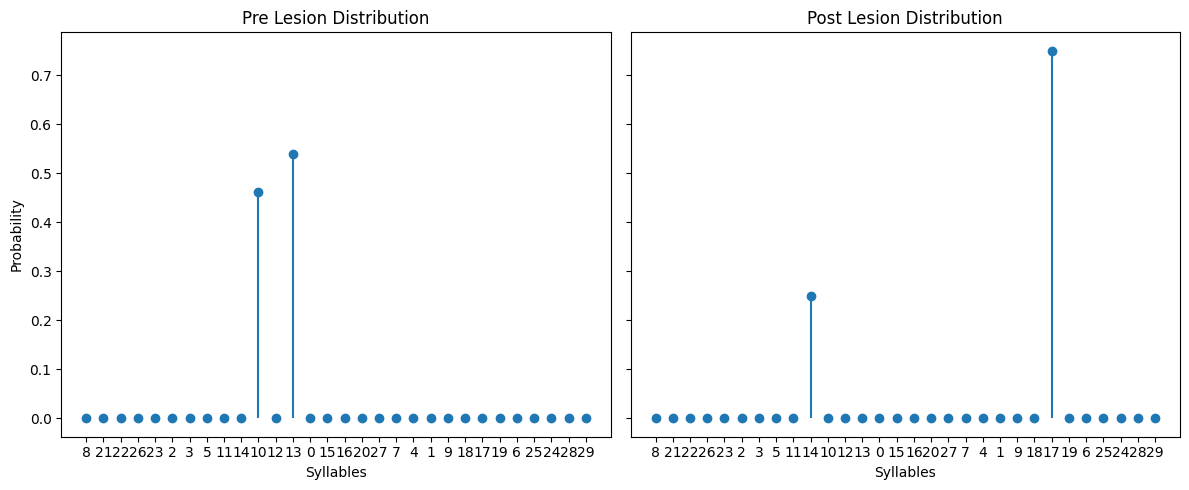

{"Earth Mover's Distance": np.float64(8.923077028891514),
 'Information Gain': np.float64(0.12784810912031275),
 'Kullback-Leibler Divergence': np.float64(18.122759083147162)}
30 30


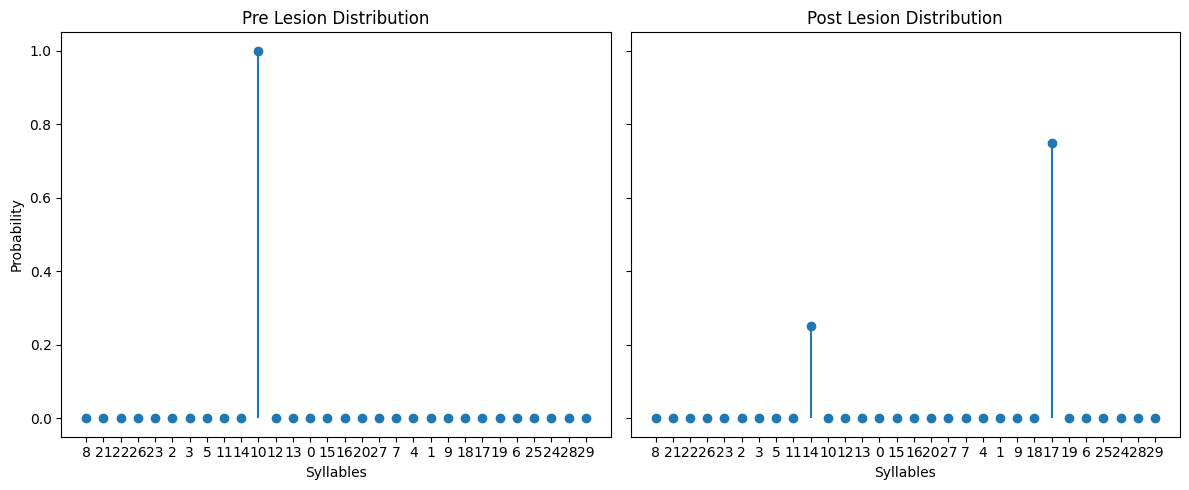

{"Earth Mover's Distance": np.float64(10.000021922813739),
 'Information Gain': np.float64(-0.5623100384737028),
 'Kullback-Leibler Divergence': np.float64(18.81291529418081)}
30 30


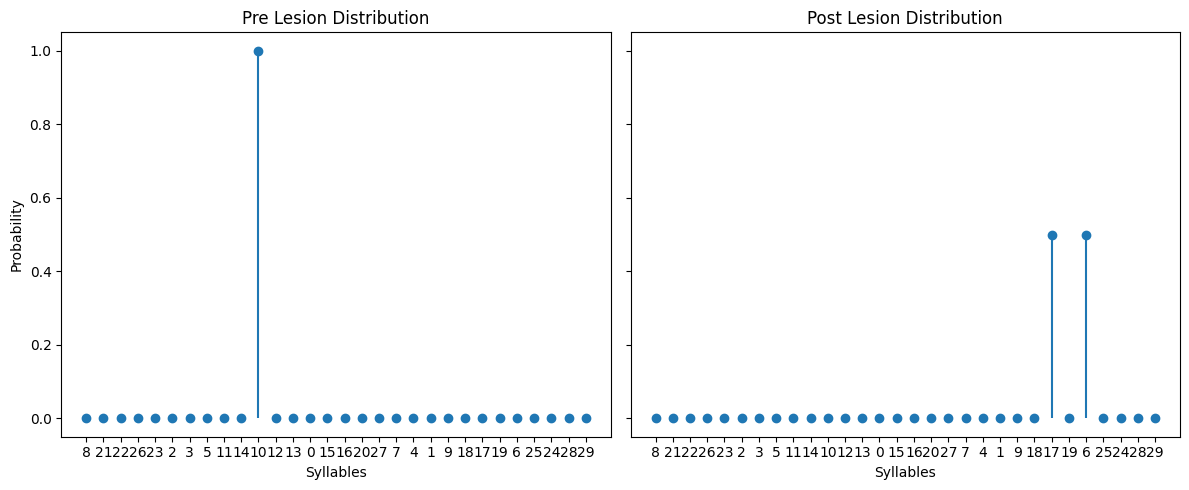

{"Earth Mover's Distance": np.float64(14.000019766917495),
 'Information Gain': np.float64(-0.6931254001985513),
 'Kullback-Leibler Divergence': np.float64(18.119768377822442)}
30 30


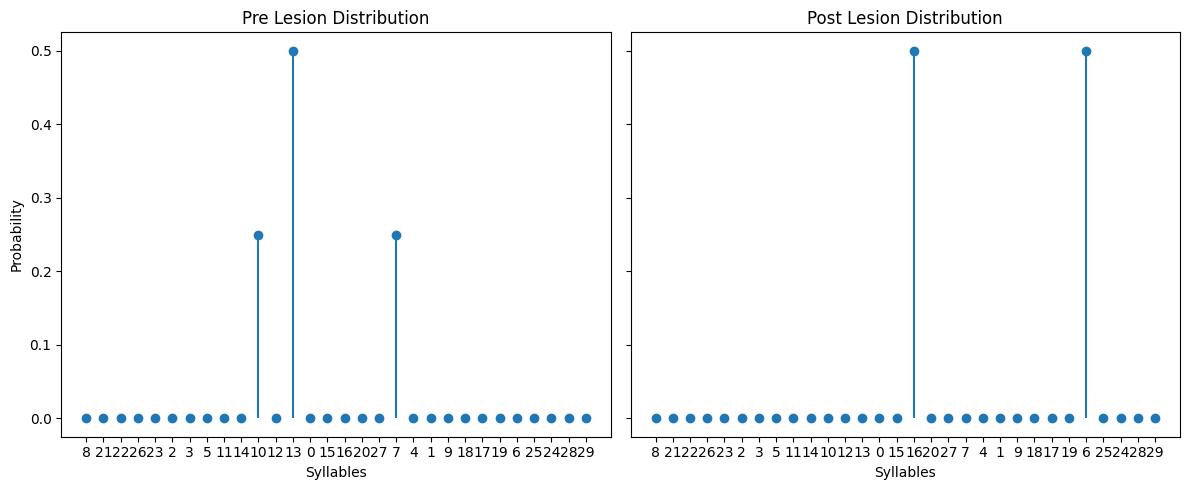

{"Earth Mover's Distance": np.float64(7.0000002299425015),
 'Information Gain': np.float64(0.3465734475593426),
 'Kullback-Leibler Divergence': np.float64(17.080070994423004)}
30 30


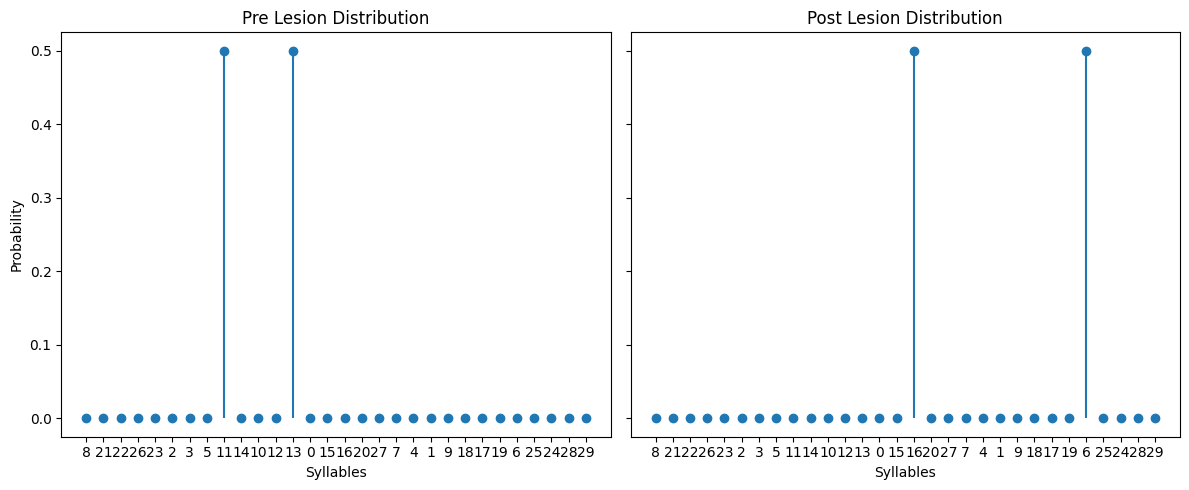

{"Earth Mover's Distance": np.float64(10.000006742267505),
 'Information Gain': np.float64(6.90913978729224e-06),
 'Kullback-Leibler Divergence': np.float64(17.426637044722657)}
30 30


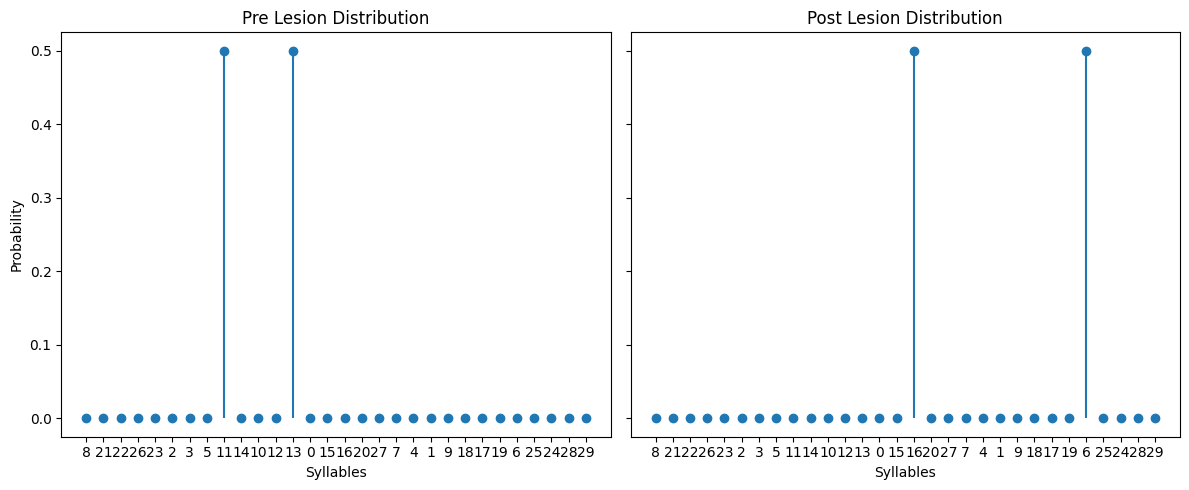

{"Earth Mover's Distance": np.float64(10.000006742267505),
 'Information Gain': np.float64(6.90913978729224e-06),
 'Kullback-Leibler Divergence': np.float64(17.426637044722657)}
30 30


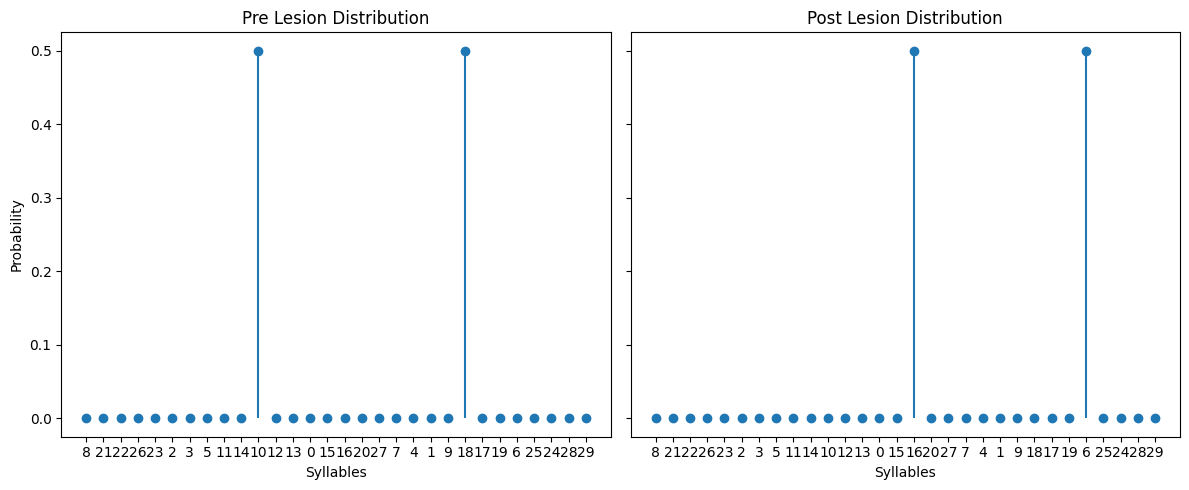

{"Earth Mover's Distance": np.float64(4.000006742267494),
 'Information Gain': np.float64(6.90913978729224e-06),
 'Kullback-Leibler Divergence': np.float64(17.426637044722657)}
30 30


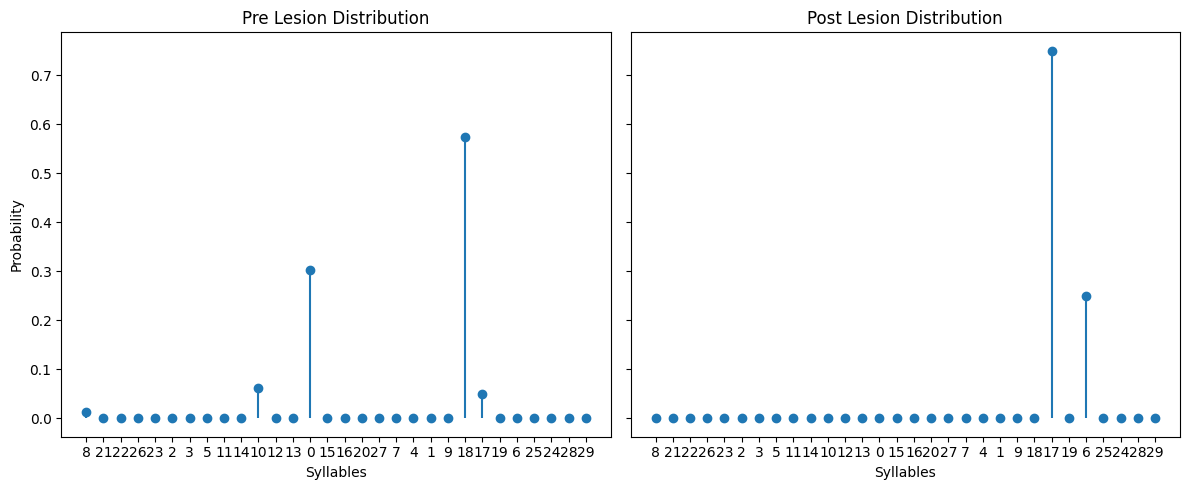

{"Earth Mover's Distance": np.float64(5.185183999437389),
 'Information Gain': np.float64(0.49267363034517786),
 'Kullback-Leibler Divergence': np.float64(16.84310579480594)}
30 30


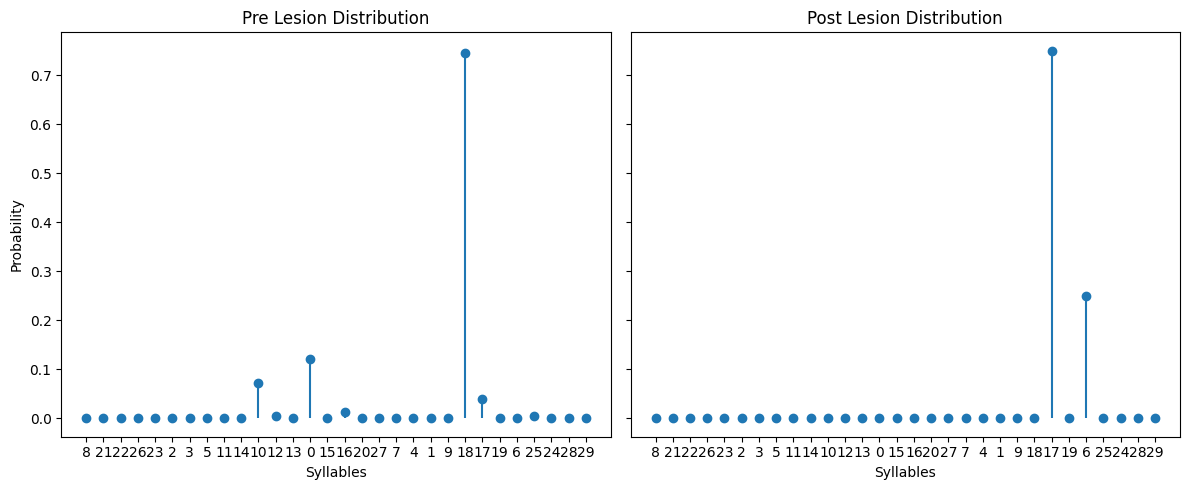

{"Earth Mover's Distance": np.float64(3.540322090942942),
 'Information Gain': np.float64(0.3295169776358726),
 'Kullback-Leibler Divergence': np.float64(17.17410384576285)}
30 30


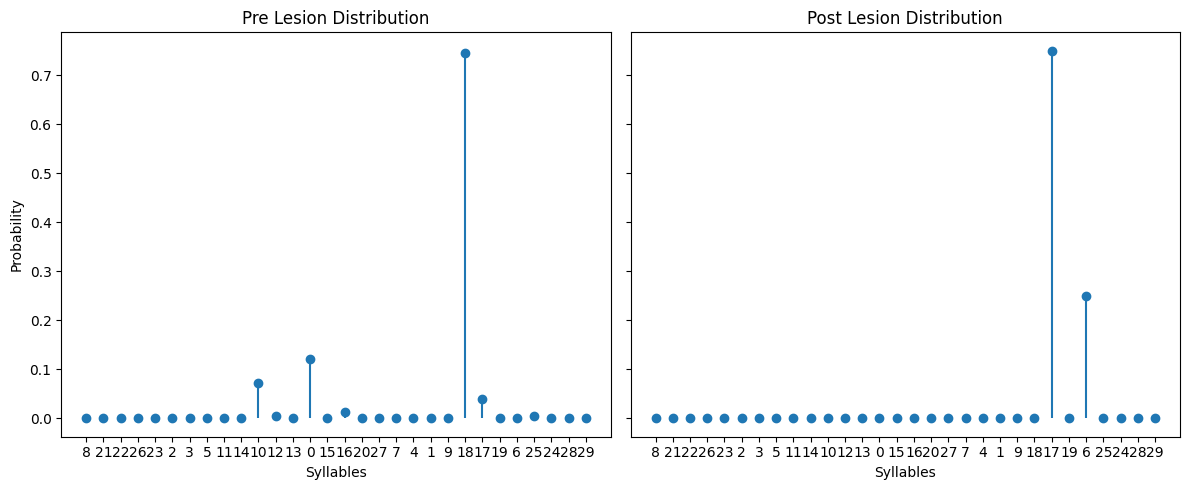

{"Earth Mover's Distance": np.float64(3.540322090942942),
 'Information Gain': np.float64(0.3295169776358726),
 'Kullback-Leibler Divergence': np.float64(17.17410384576285)}
30 30


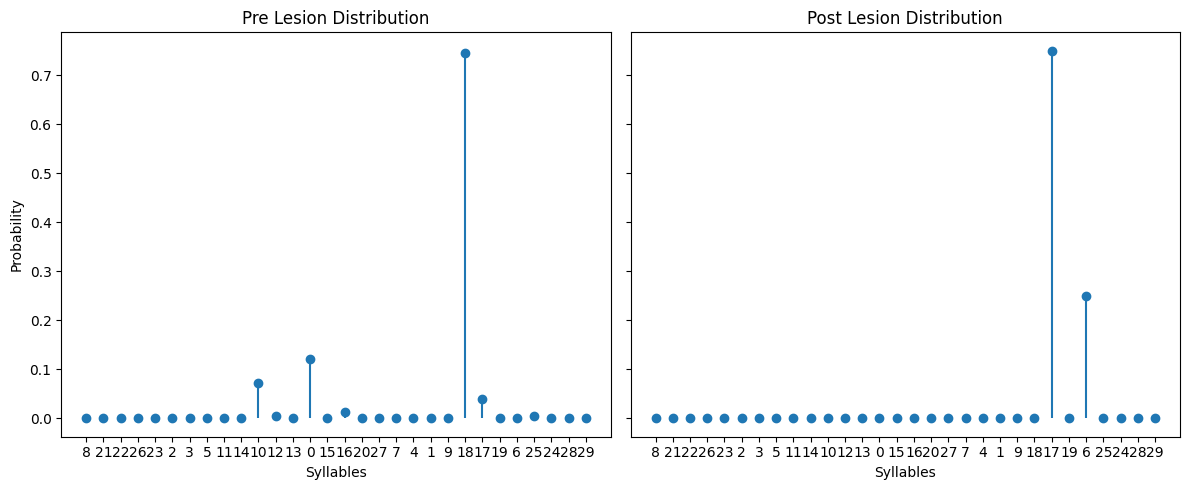

{"Earth Mover's Distance": np.float64(3.540322090942942),
 'Information Gain': np.float64(0.3295169776358726),
 'Kullback-Leibler Divergence': np.float64(17.17410384576285)}
30 30


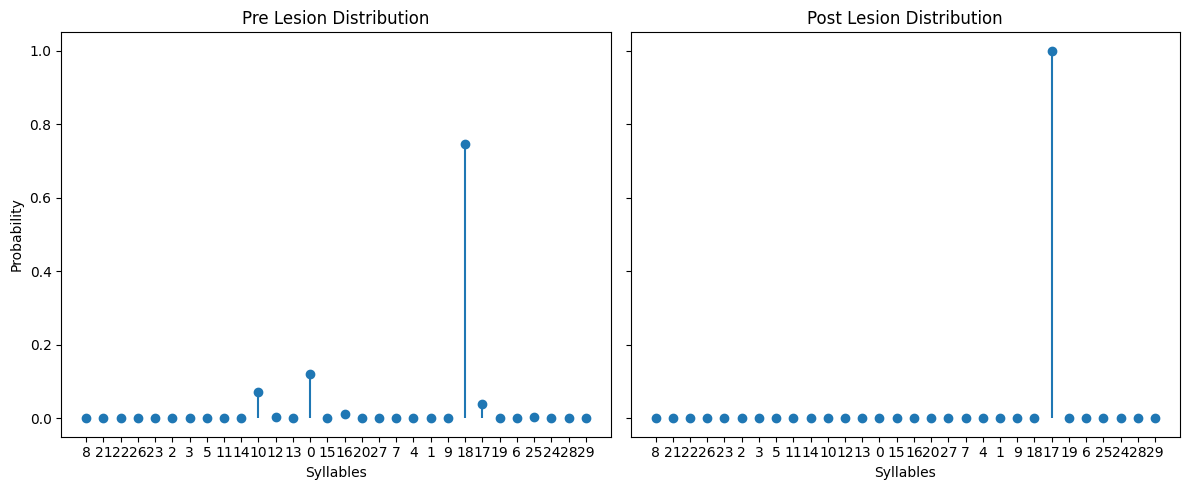

{"Earth Mover's Distance": np.float64(3.056452229190825),
 'Information Gain': np.float64(0.8918413278813516),
 'Kullback-Leibler Divergence': np.float64(15.832108978380786)}
30 30


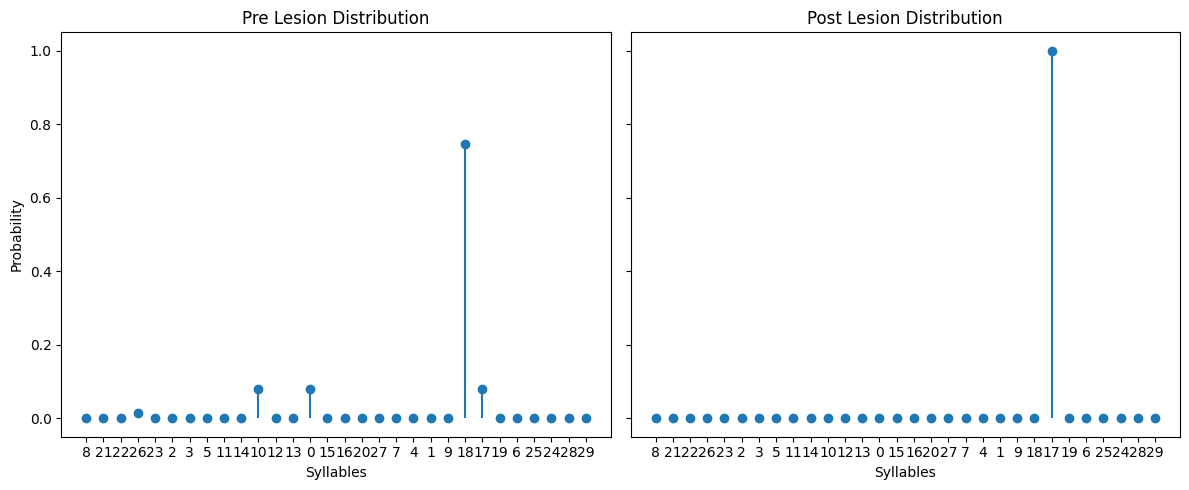

{"Earth Mover's Distance": np.float64(2.8888869290043693),
 'Information Gain': np.float64(0.8875889189164976),
 'Kullback-Leibler Divergence': np.float64(15.155981388159777)}
30 30


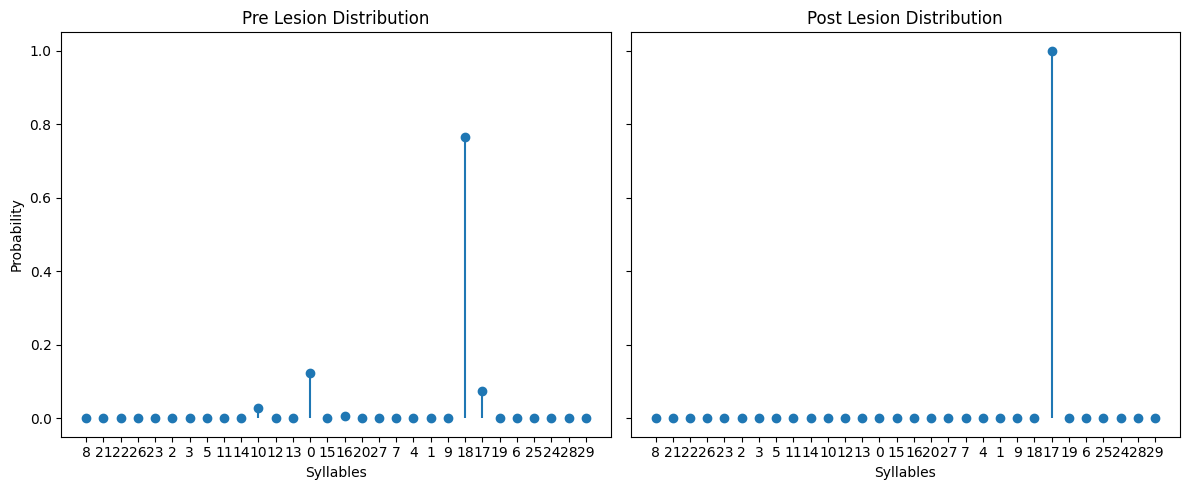

{"Earth Mover's Distance": np.float64(2.435820491461568),
 'Information Gain': np.float64(0.8002479325414149),
 'Kullback-Leibler Divergence': np.float64(15.325893553815462)}
30 30


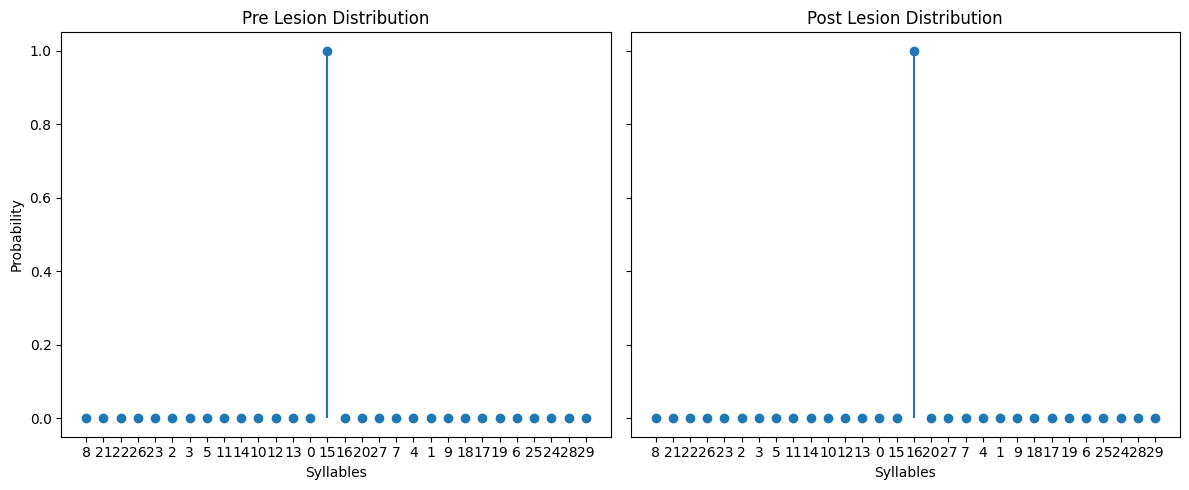

{"Earth Mover's Distance": np.float64(1.0000134845349846),
 'Information Gain': np.float64(1.431177177583206e-05),
 'Kullback-Leibler Divergence': np.float64(17.426622578816634)}
30 30


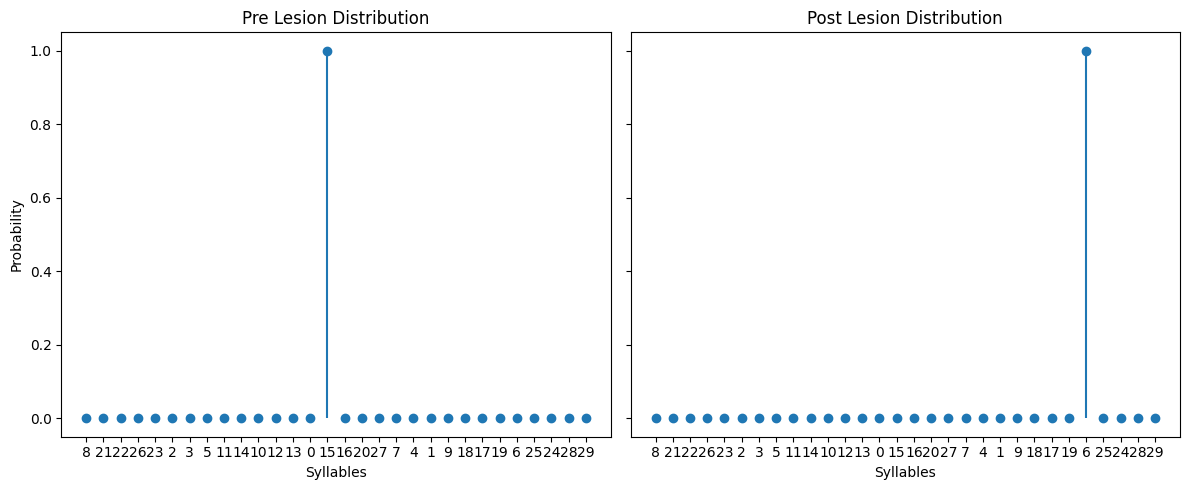

{"Earth Mover's Distance": np.float64(11.000019766917497),
 'Information Gain': np.float64(2.1259830145249686e-05),
 'Kullback-Leibler Divergence': np.float64(18.119769315231782)}
30 30


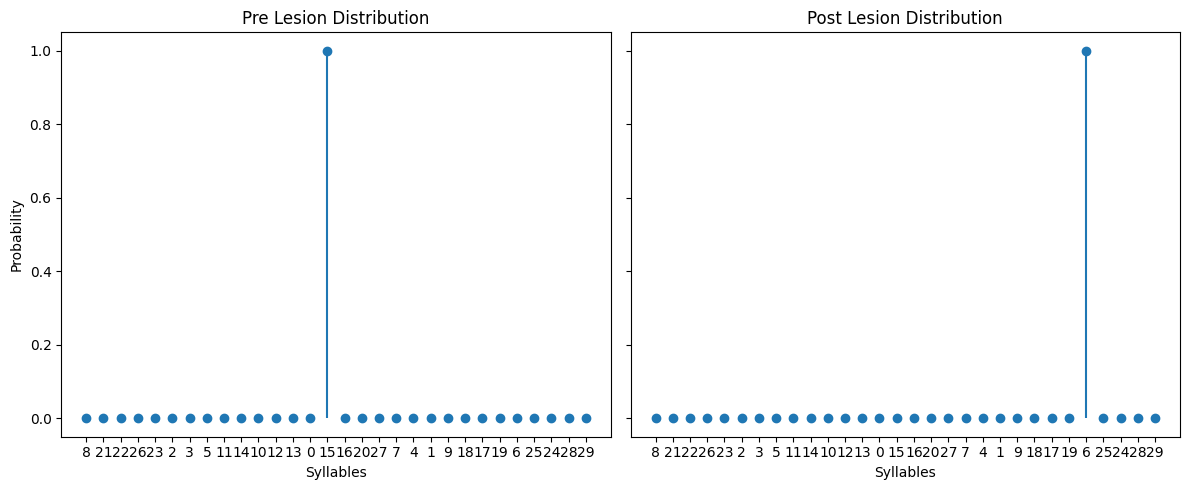

{"Earth Mover's Distance": np.float64(11.000013484534996),
 'Information Gain': np.float64(1.4311771776276148e-05),
 'Kullback-Leibler Divergence': np.float64(17.426622578816634)}
30 30


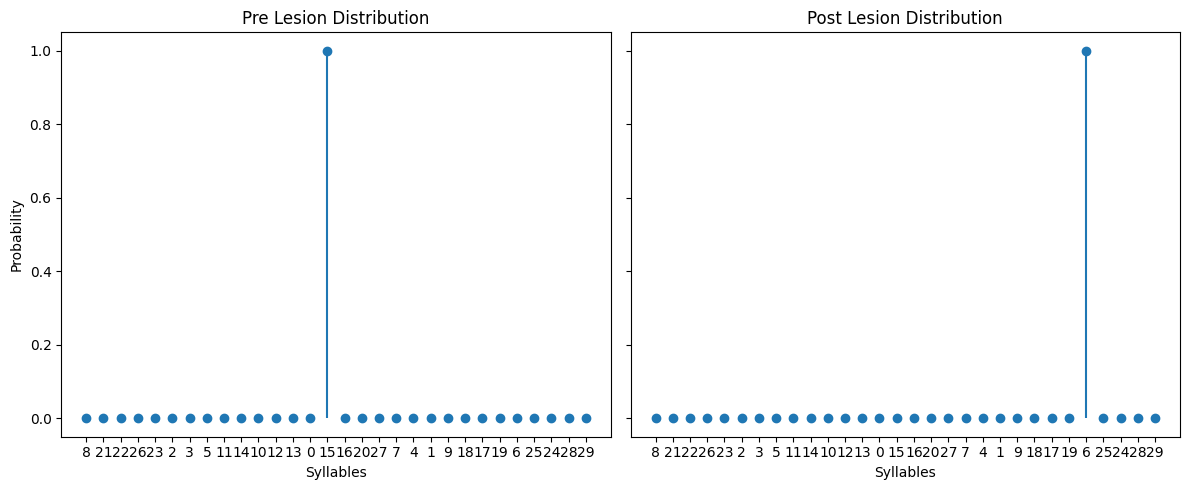

{"Earth Mover's Distance": np.float64(11.000013484534996),
 'Information Gain': np.float64(1.4311771776276148e-05),
 'Kullback-Leibler Divergence': np.float64(17.426622578816634)}
30 30


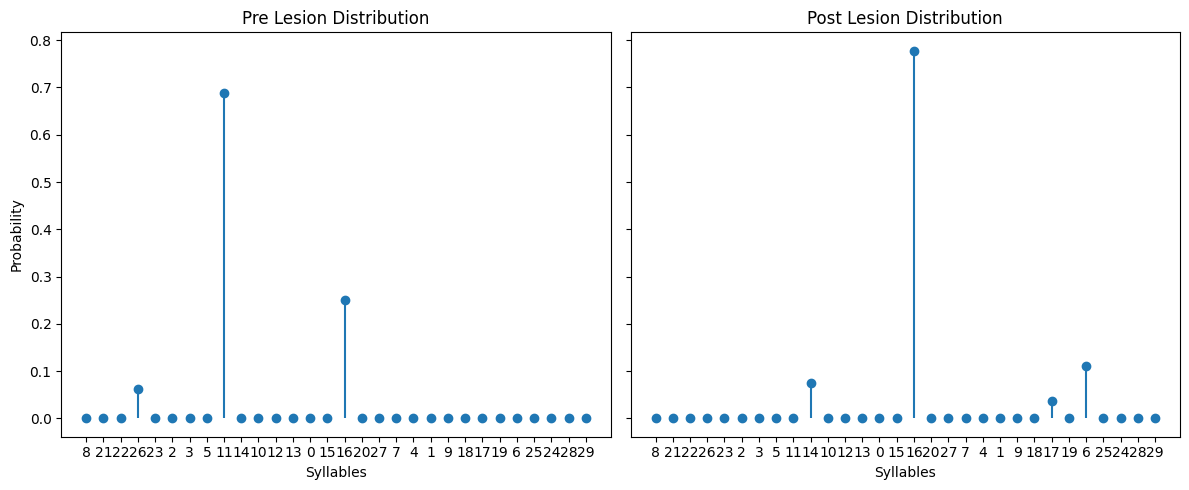

{"Earth Mover's Distance": np.float64(6.5254641256825385),
 'Information Gain': np.float64(0.023000747988902615),
 'Kullback-Leibler Divergence': np.float64(14.827231183208692)}
30 30


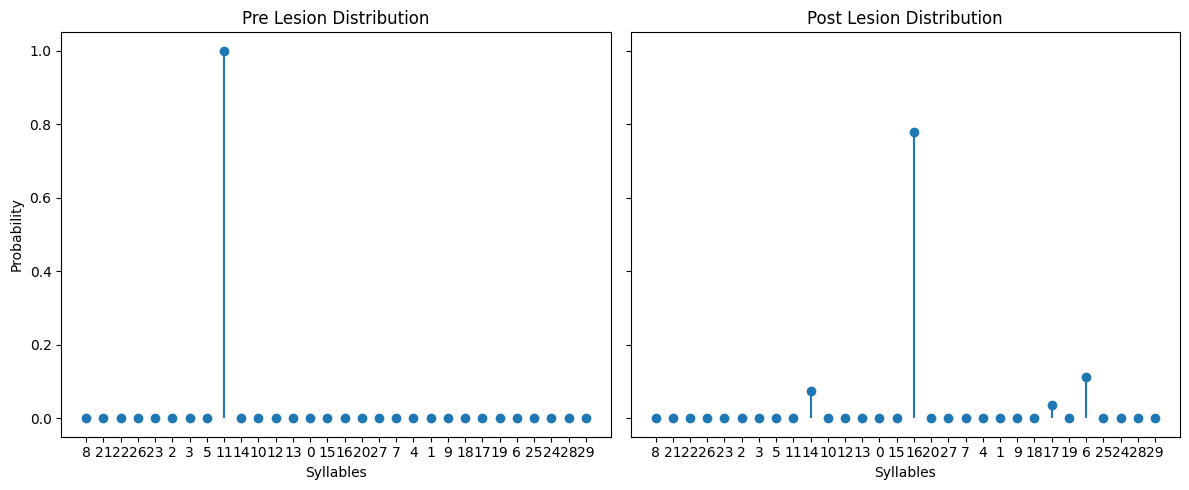

{"Earth Mover's Distance": np.float64(7.962988546901289),
 'Information Gain': np.float64(-0.7544345022016341),
 'Kullback-Leibler Divergence': np.float64(20.722455464568437)}
30 30


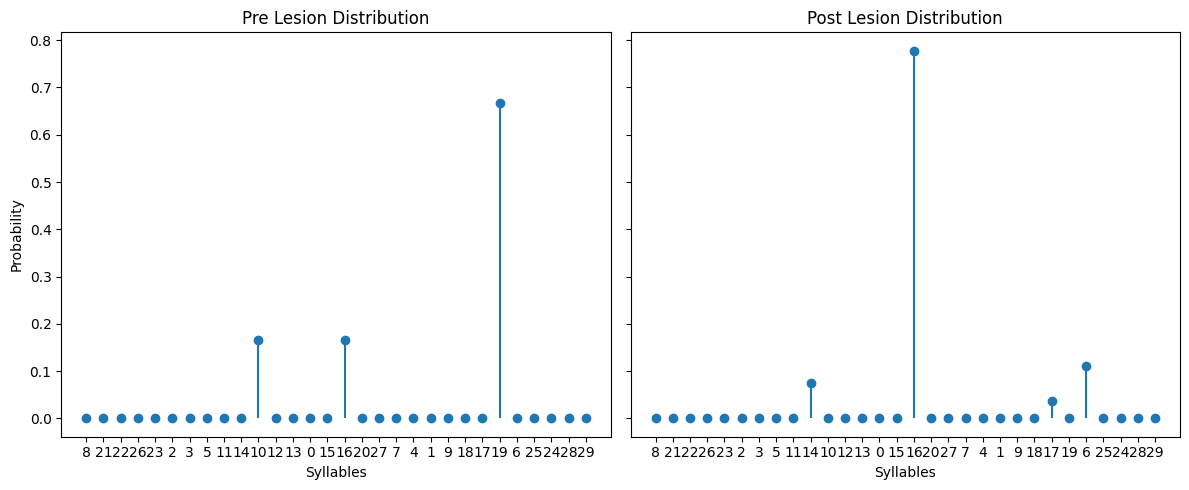

{"Earth Mover's Distance": np.float64(5.35185256040241),
 'Information Gain': np.float64(0.11310468252935557),
 'Kullback-Leibler Divergence': np.float64(16.443058392989002)}
30 30


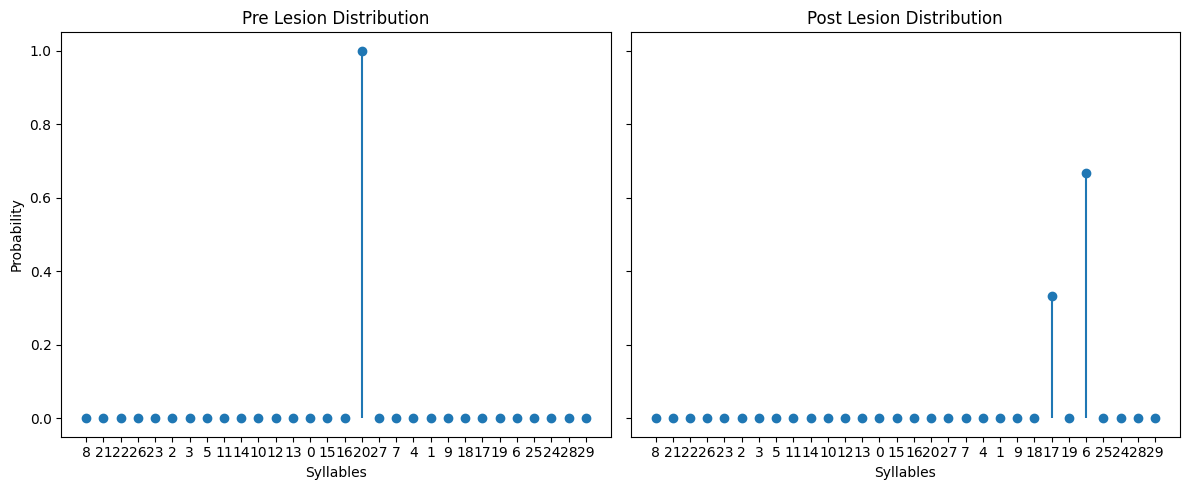

{"Earth Mover's Distance": np.float64(8.333355194378328),
 'Information Gain': np.float64(-0.6364901829913666),
 'Kullback-Leibler Divergence': np.float64(18.525233311995628)}
30 30


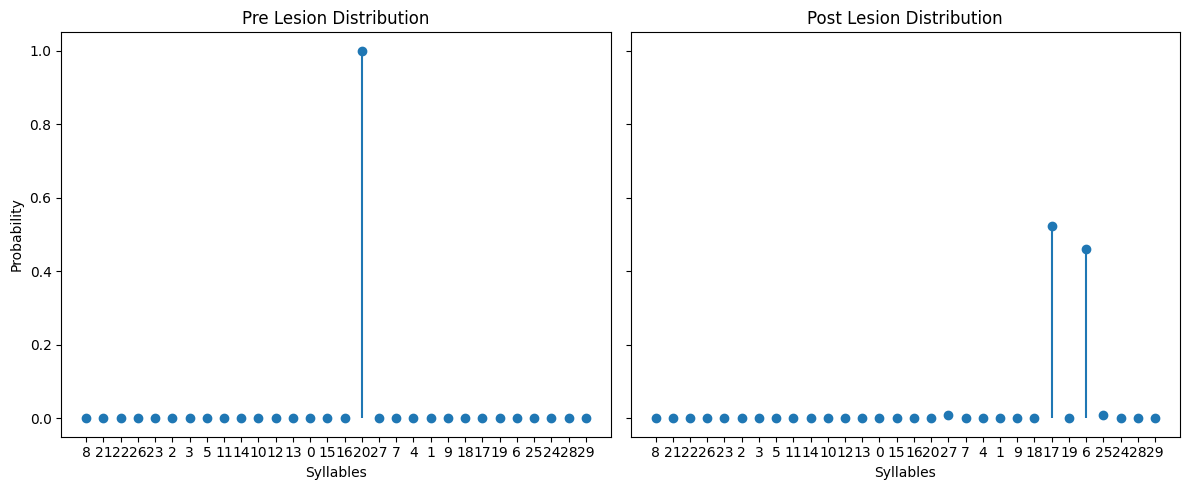

{"Earth Mover's Distance": np.float64(7.895187238293827),
 'Information Gain': np.float64(-0.7735666951523167),
 'Kullback-Leibler Divergence': np.float64(22.246899951271086)}
30 30


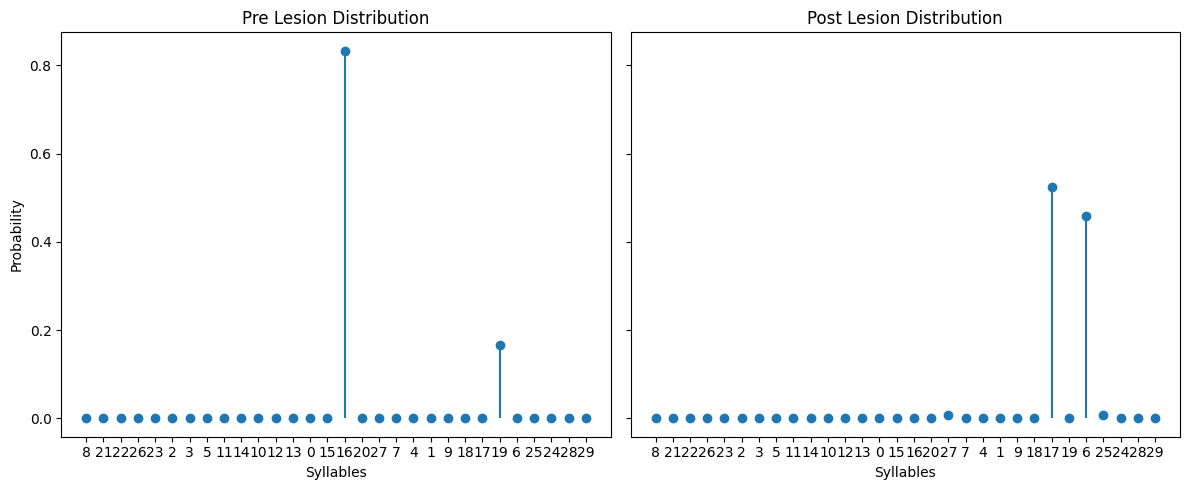

{"Earth Mover's Distance": np.float64(7.395165530543835),
 'Information Gain': np.float64(-0.3230292500815218),
 'Kullback-Leibler Divergence': np.float64(21.796366143947296)}
30 30


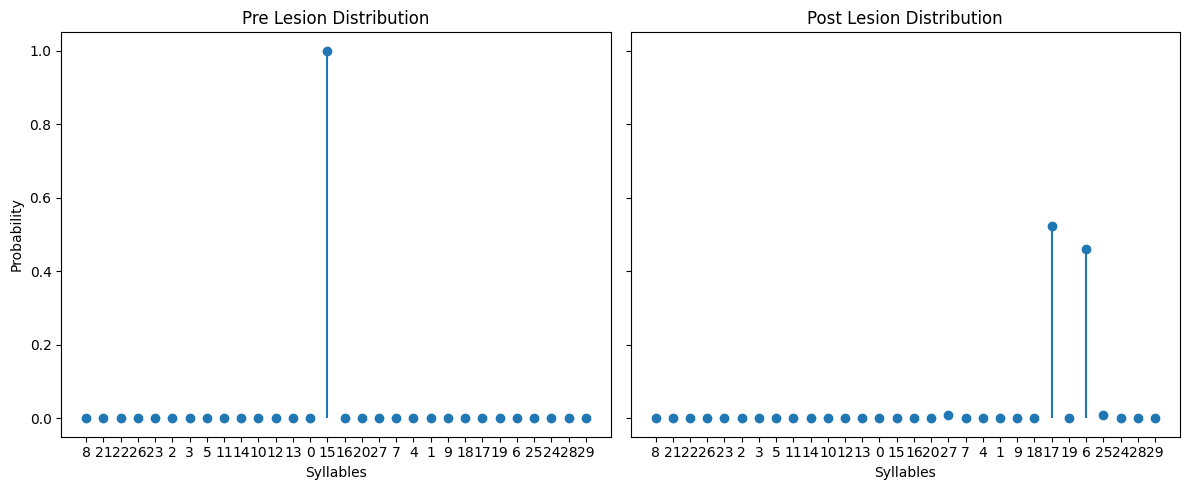

{"Earth Mover's Distance": np.float64(9.895187238293827),
 'Information Gain': np.float64(-0.7735666951523167),
 'Kullback-Leibler Divergence': np.float64(22.24689995127109)}
30 30


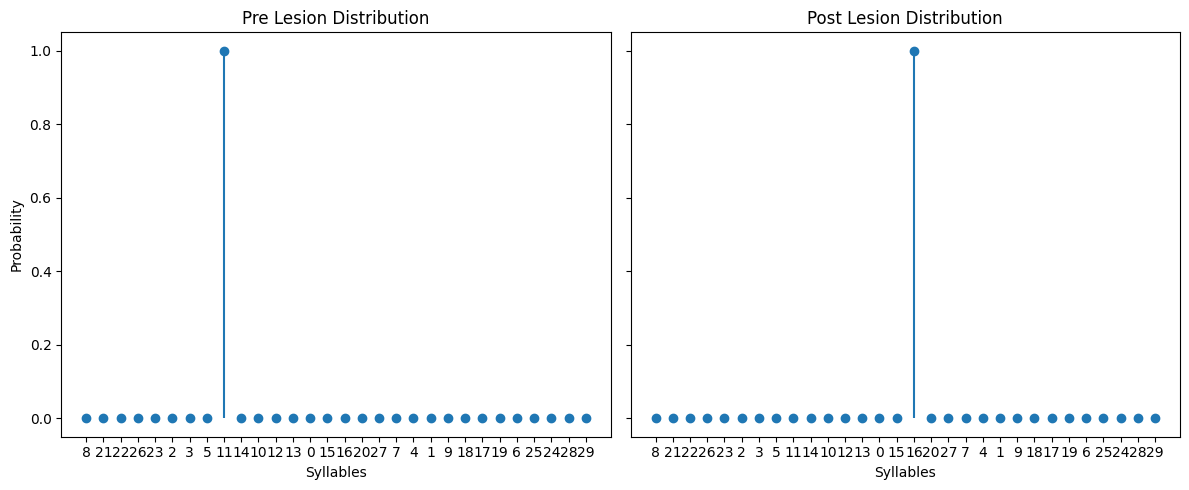

{"Earth Mover's Distance": np.float64(7.00001348453498),
 'Information Gain': np.float64(1.431177177583206e-05),
 'Kullback-Leibler Divergence': np.float64(17.426622578816634)}
30 30


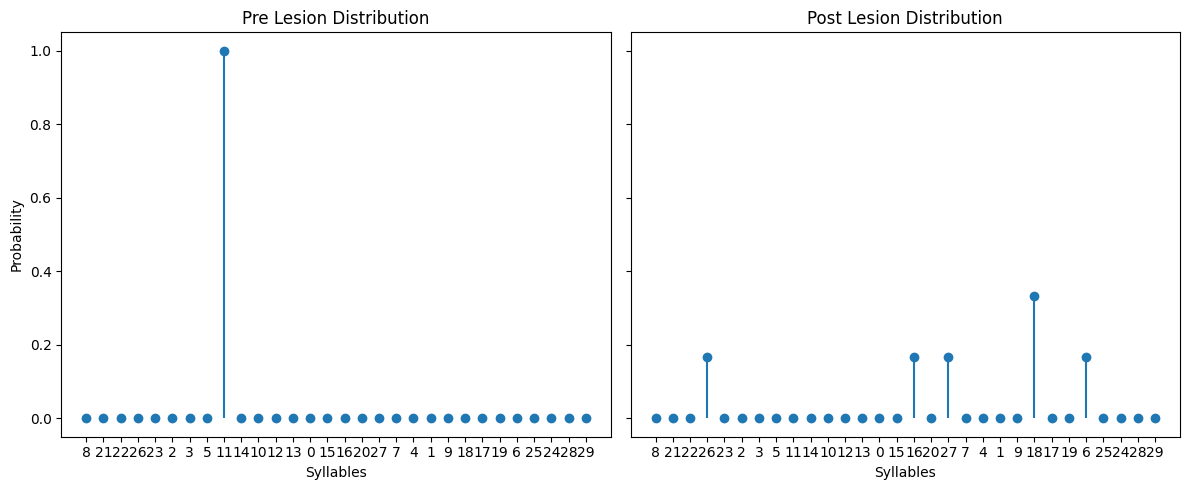

{"Earth Mover's Distance": np.float64(11.000005738782491),
 'Information Gain': np.float64(-1.5607023331246594),
 'Kullback-Leibler Divergence': np.float64(19.21839928117754)}
30 30


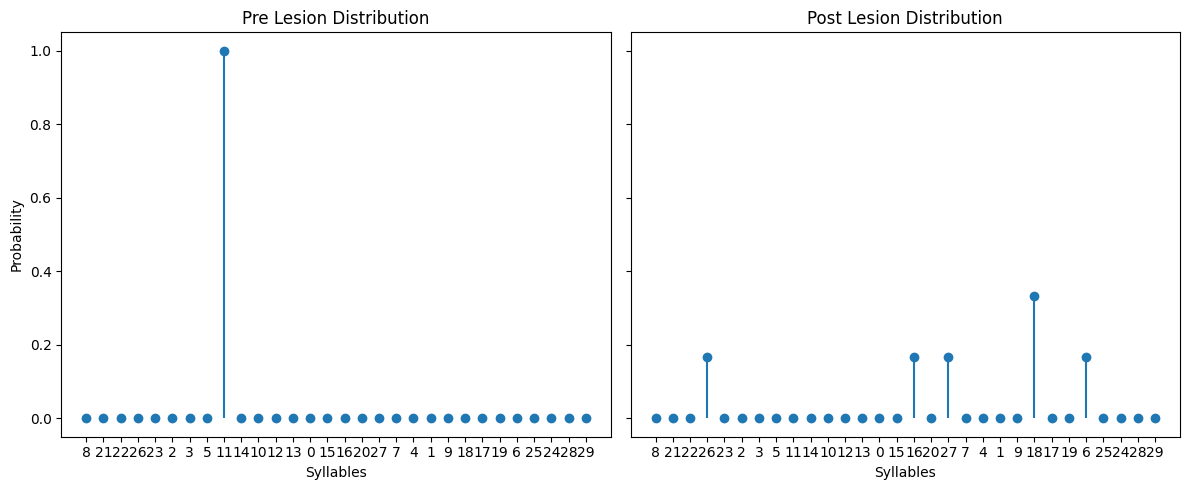

{"Earth Mover's Distance": np.float64(11.000005738782491),
 'Information Gain': np.float64(-1.5607023331246594),
 'Kullback-Leibler Divergence': np.float64(19.21839928117754)}
30 30


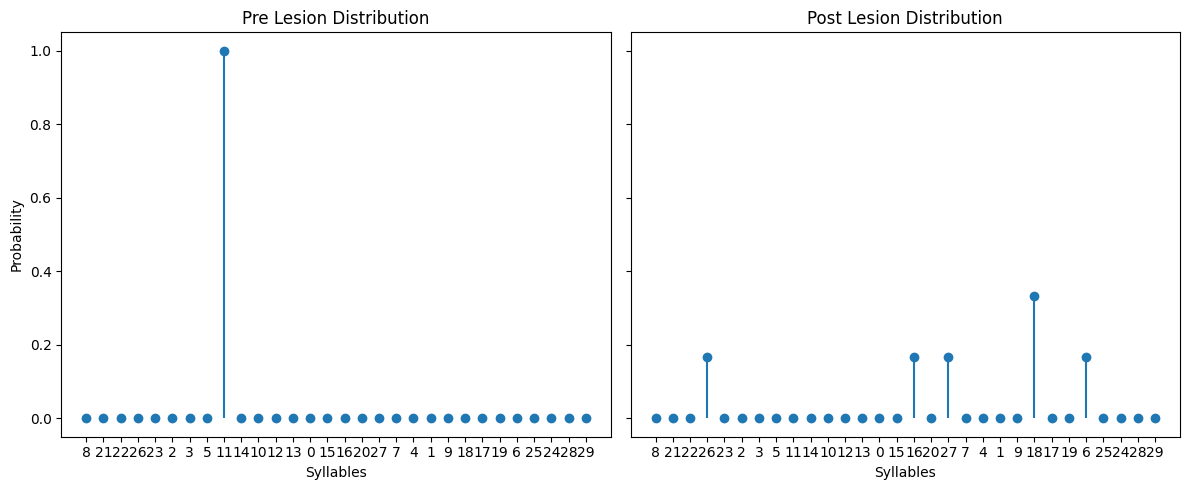

{"Earth Mover's Distance": np.float64(11.000005738782491),
 'Information Gain': np.float64(-1.5607023331246594),
 'Kullback-Leibler Divergence': np.float64(19.21839928117754)}
30 30


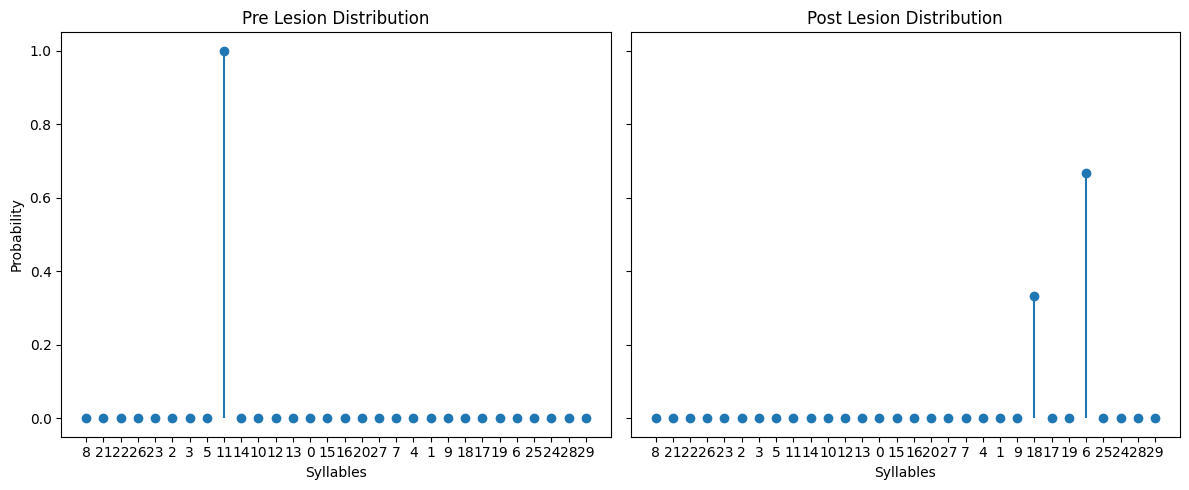

{"Earth Mover's Distance": np.float64(16.000004494844998),
 'Information Gain': np.float64(-0.6365087554203263),
 'Kullback-Leibler Divergence': np.float64(18.525253211963033)}
30 30


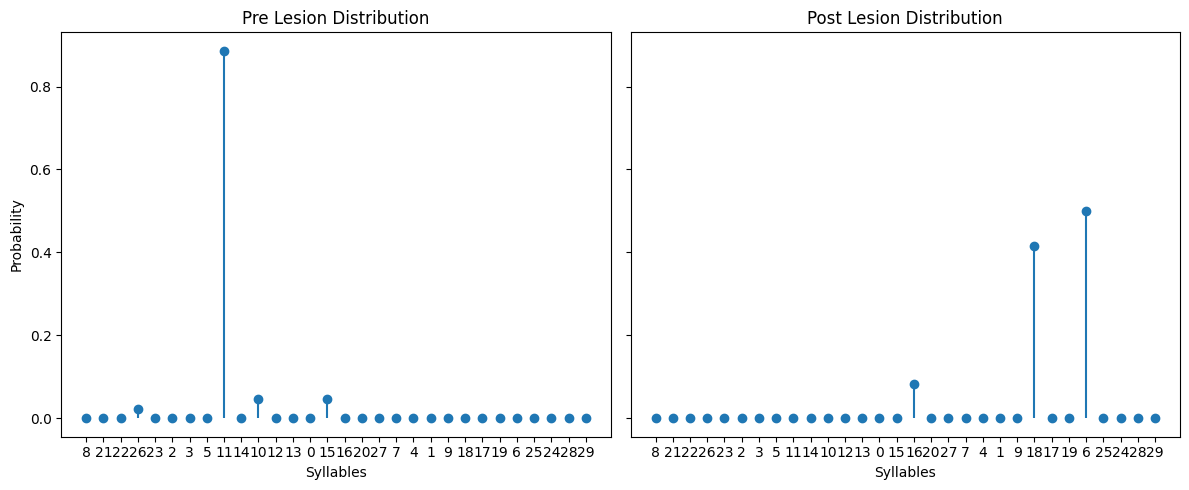

{"Earth Mover's Distance": np.float64(14.666666497374372),
 'Information Gain': np.float64(-0.44449986643721306),
 'Kullback-Leibler Divergence': np.float64(19.43762900491851)}
30 30


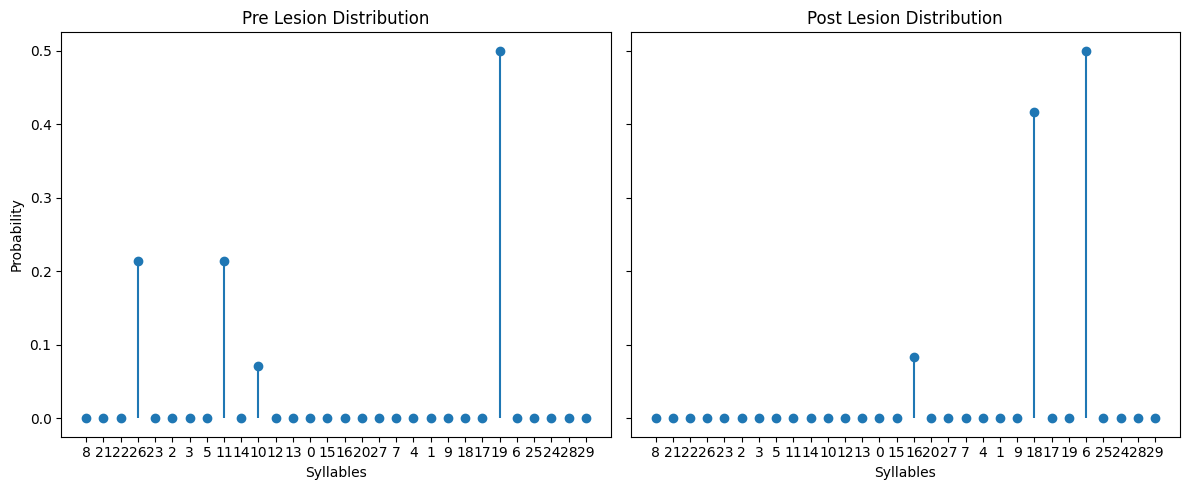

{"Earth Mover's Distance": np.float64(7.845238908838622),
 'Information Gain': np.float64(0.27684141158443987),
 'Kullback-Leibler Divergence': np.float64(18.716287574984957)}
30 30


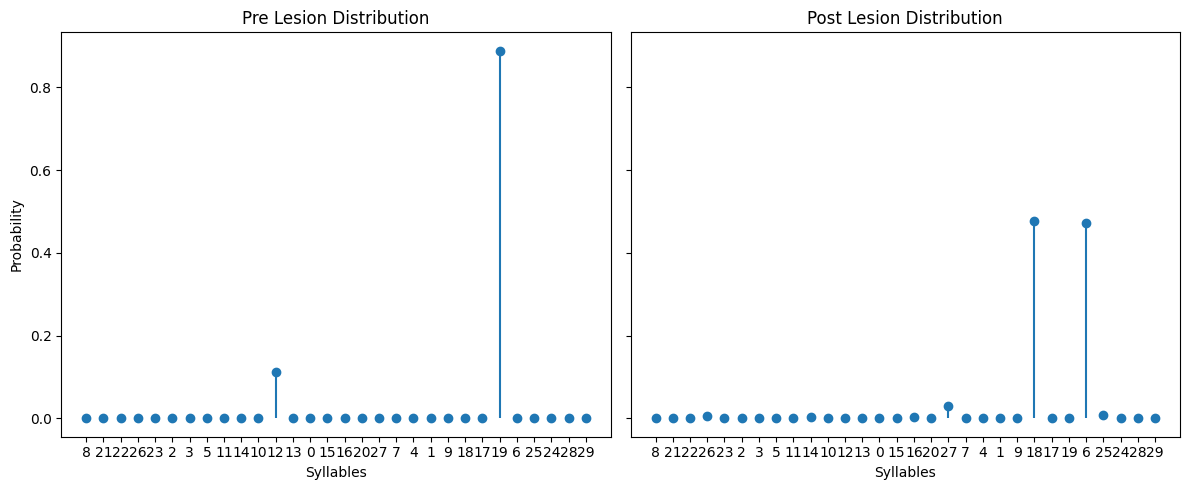

{"Earth Mover's Distance": np.float64(2.306605327922502),
 'Information Gain': np.float64(-0.5668828303081331),
 'Kullback-Leibler Divergence': np.float64(23.820695627231228)}
30 30


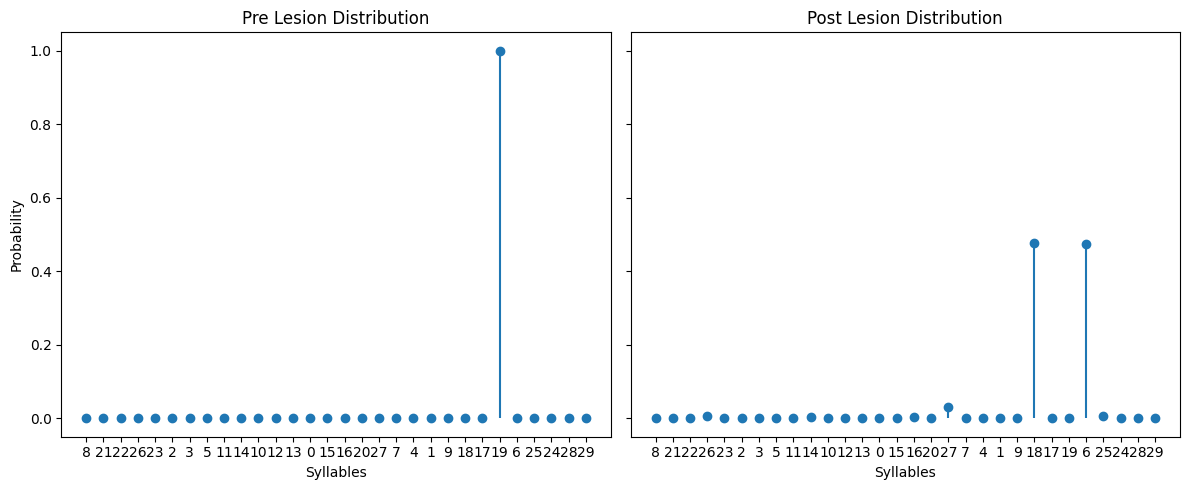

{"Earth Mover's Distance": np.float64(1.85376669836498),
 'Information Gain': np.float64(-0.9156895917222155),
 'Kullback-Leibler Divergence': np.float64(24.169494448427724)}
30 30


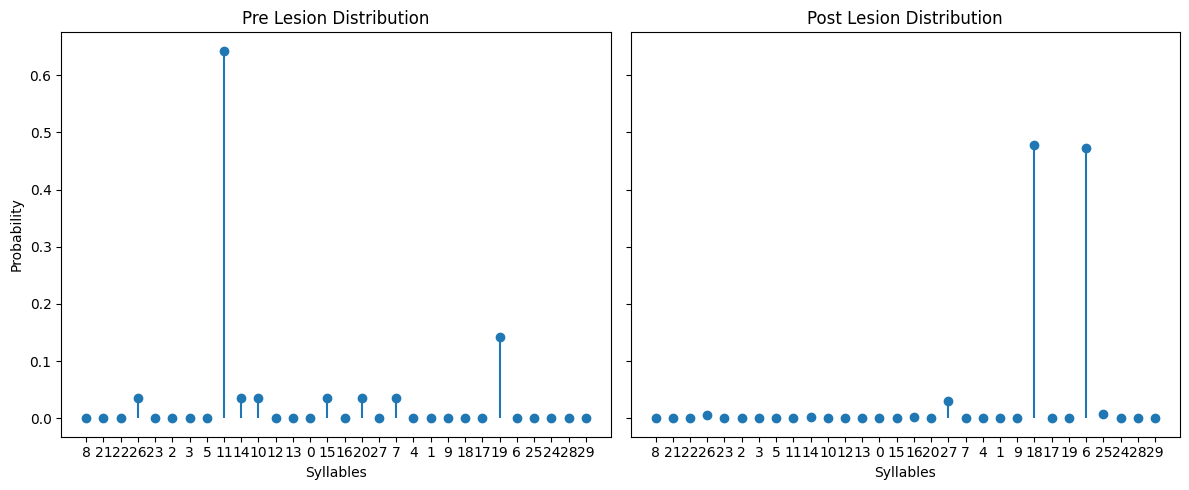

{"Earth Mover's Distance": np.float64(12.048855362954544),
 'Information Gain': np.float64(0.3603488795645021),
 'Kullback-Leibler Divergence': np.float64(20.944088292673218)}
30 30


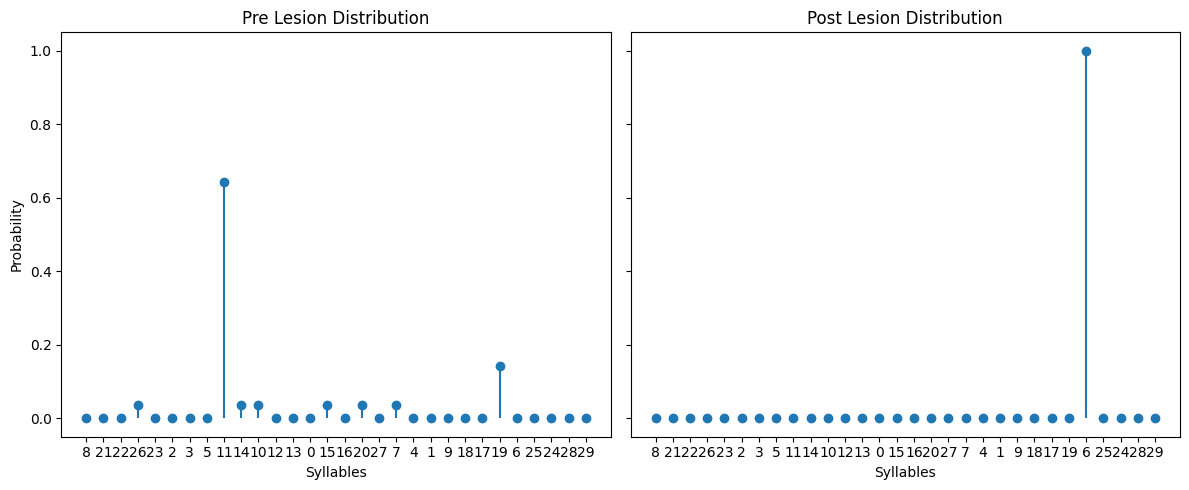

{"Earth Mover's Distance": np.float64(13.928567100061999),
 'Information Gain': np.float64(1.276052783058494),
 'Kullback-Leibler Divergence': np.float64(16.150585048903544)}
30 30


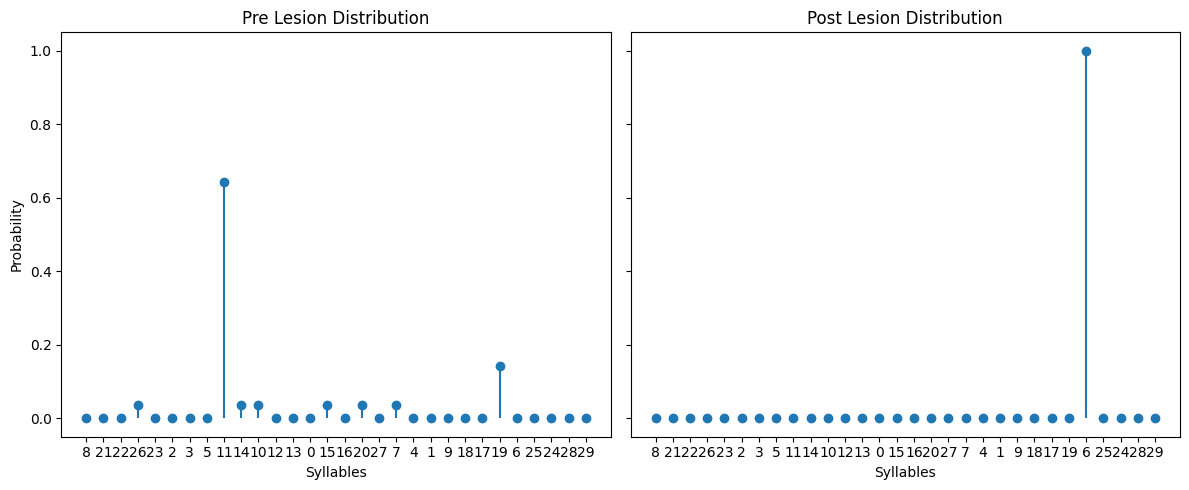

{"Earth Mover's Distance": np.float64(13.928567100061999),
 'Information Gain': np.float64(1.276052783058494),
 'Kullback-Leibler Divergence': np.float64(16.150585048903544)}
30 30


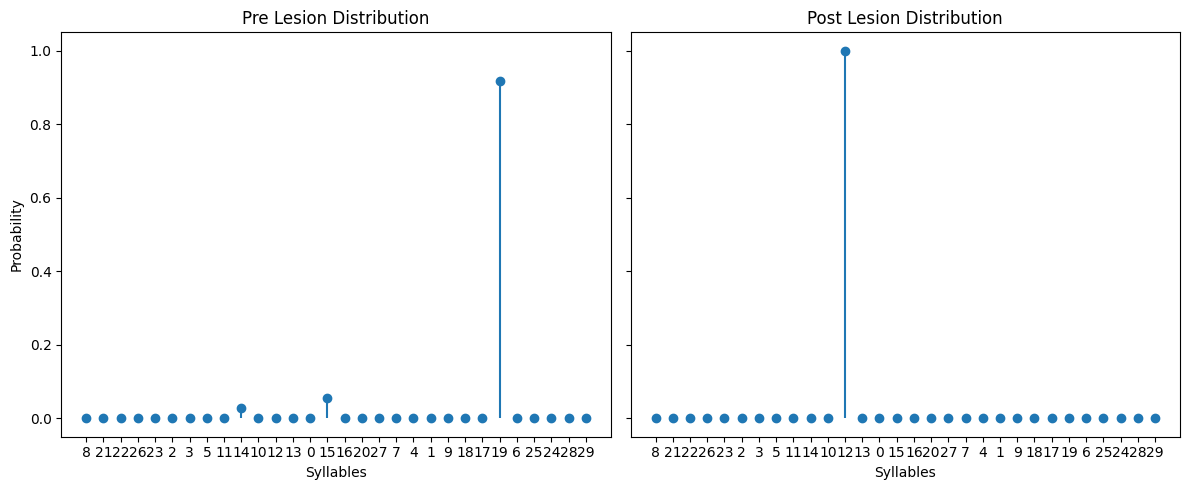

{"Earth Mover's Distance": np.float64(12.13889966053691),
 'Information Gain': np.float64(0.33986527960266943),
 'Kullback-Leibler Divergence': np.float64(17.08677256010732)}
30 30


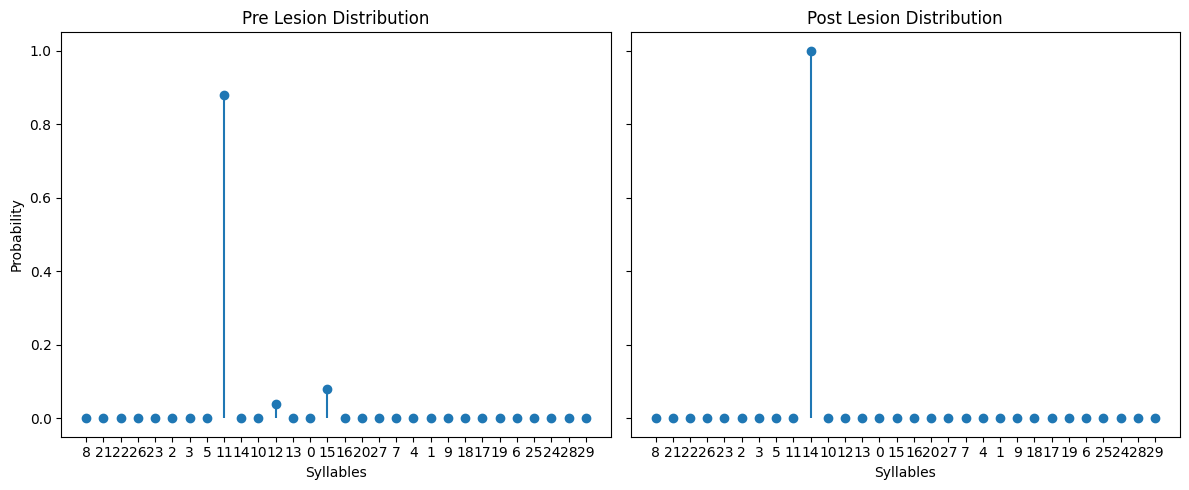

{"Earth Mover's Distance": np.float64(1.3600050375559165),
 'Information Gain': np.float64(0.44330044908356475),
 'Kullback-Leibler Divergence': np.float64(17.676491100444956)}
30 30


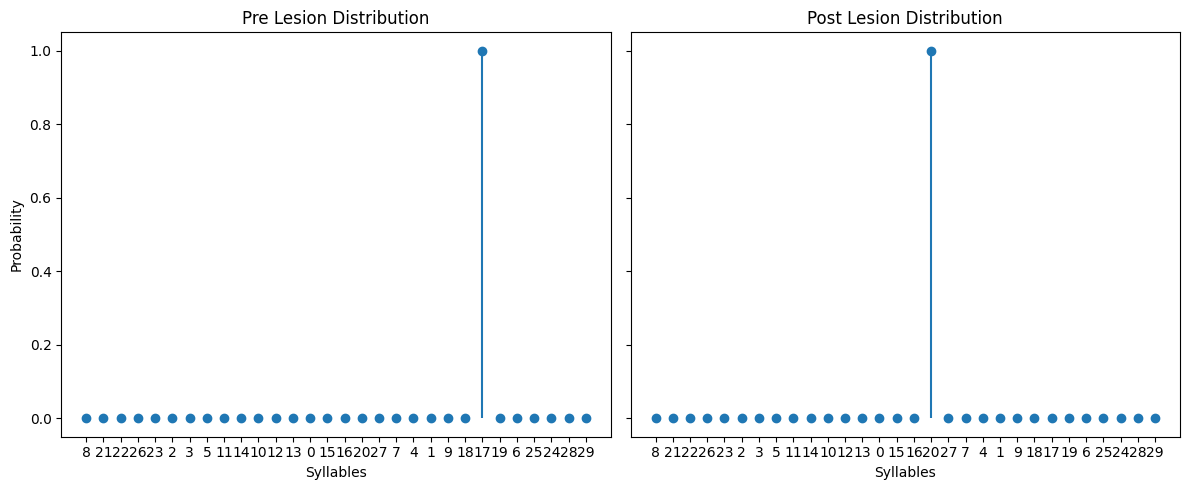

{"Earth Mover's Distance": np.float64(7.000005364814995),
 'Information Gain': np.float64(1.4311771776054105e-05),
 'Kullback-Leibler Divergence': np.float64(17.426622578816637)}
30 30


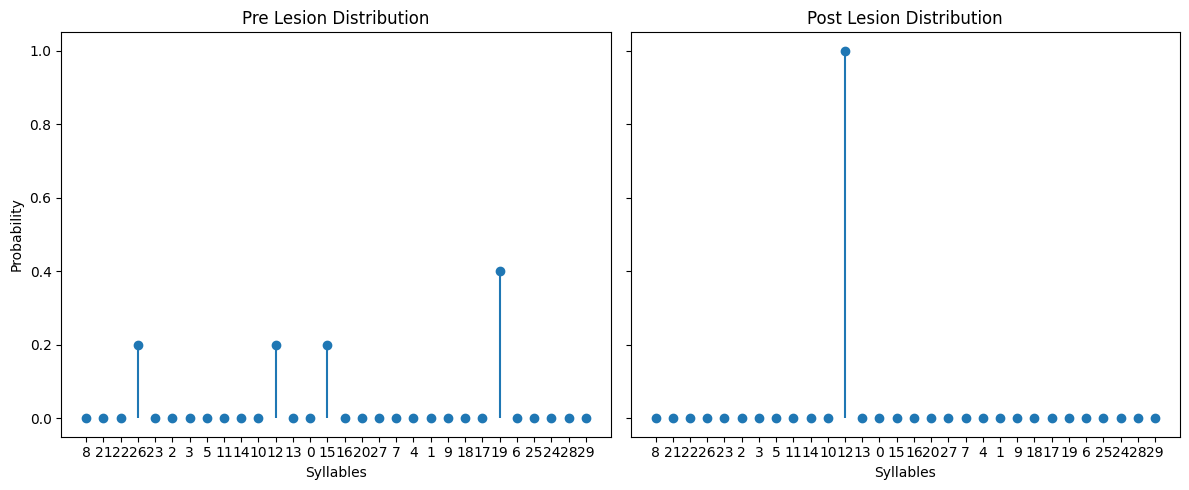

{"Earth Mover's Distance": np.float64(7.400005456865027),
 'Information Gain': np.float64(1.332169841725236),
 'Kullback-Leibler Divergence': np.float64(12.609138696843711)}
30 30


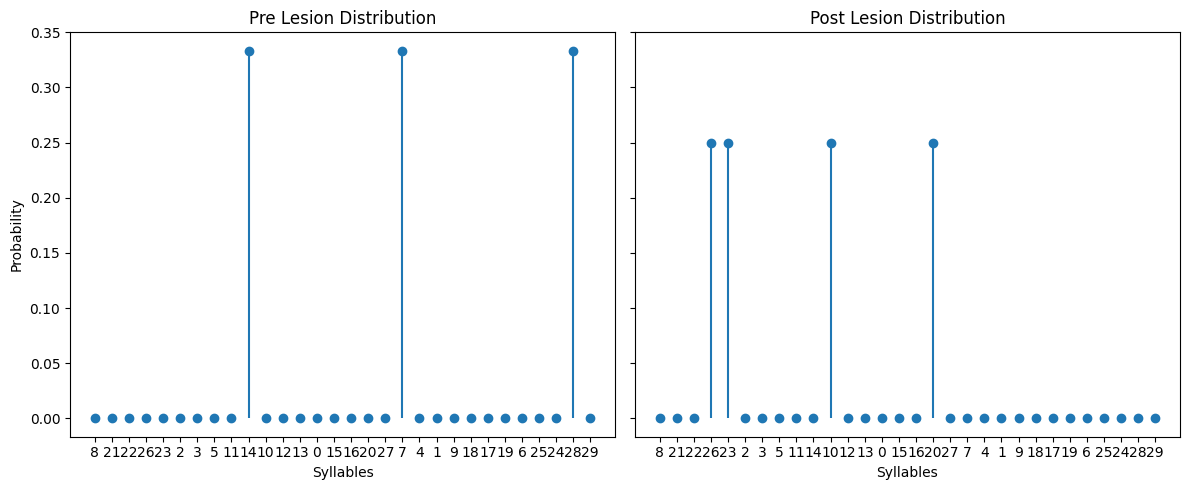

{"Earth Mover's Distance": np.float64(10.083329340775421),
 'Information Gain': np.float64(-0.28767638609424173),
 'Kullback-Leibler Divergence': np.float64(17.71432354618252)}
30 30


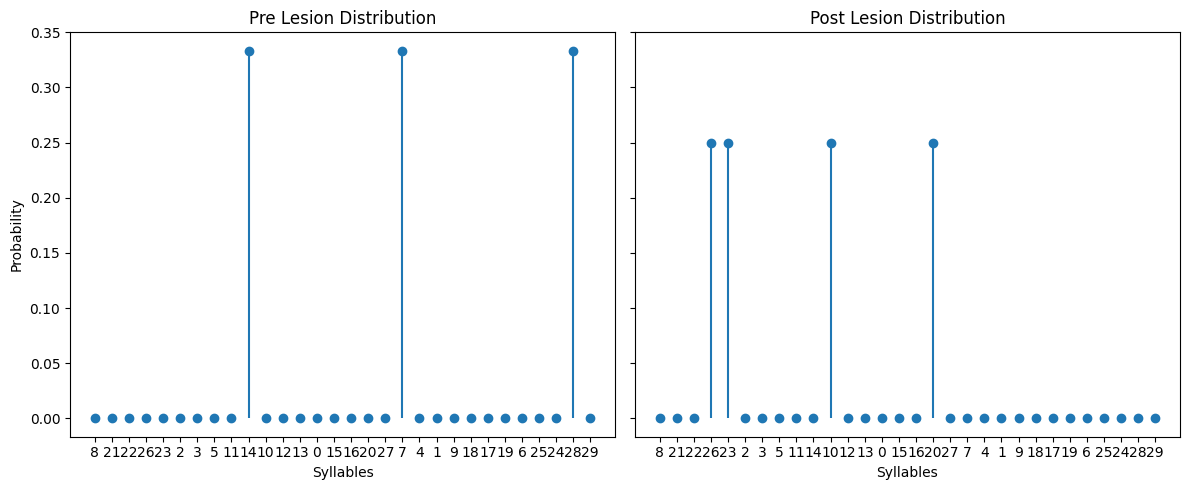

{"Earth Mover's Distance": np.float64(10.083329340775421),
 'Information Gain': np.float64(-0.28767638609424173),
 'Kullback-Leibler Divergence': np.float64(17.71432354618252)}
30 30


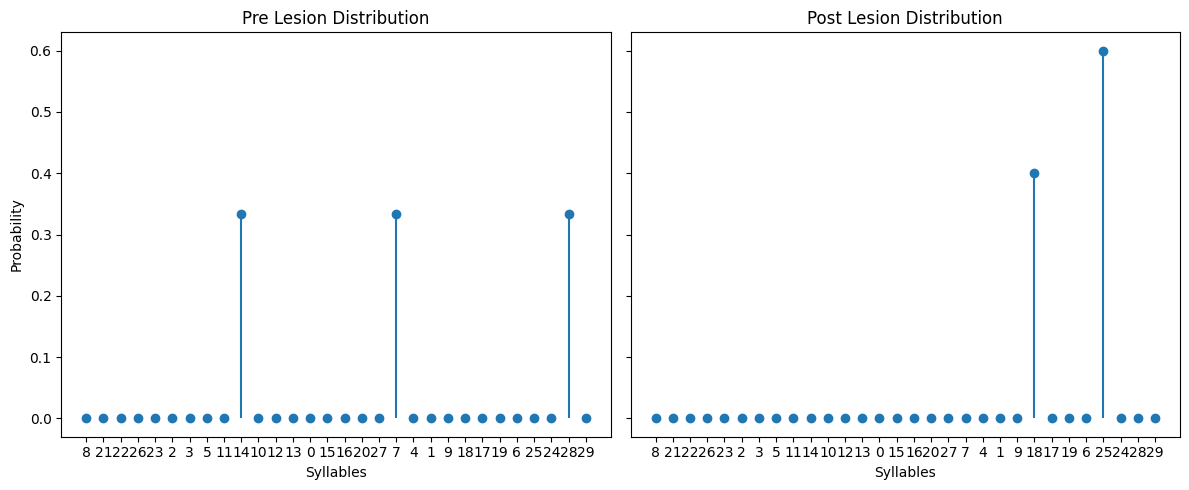

{"Earth Mover's Distance": np.float64(7.400004710542332),
 'Information Gain': np.float64(0.4256066139960991),
 'Kullback-Leibler Divergence': np.float64(17.93746767433411)}
30 30


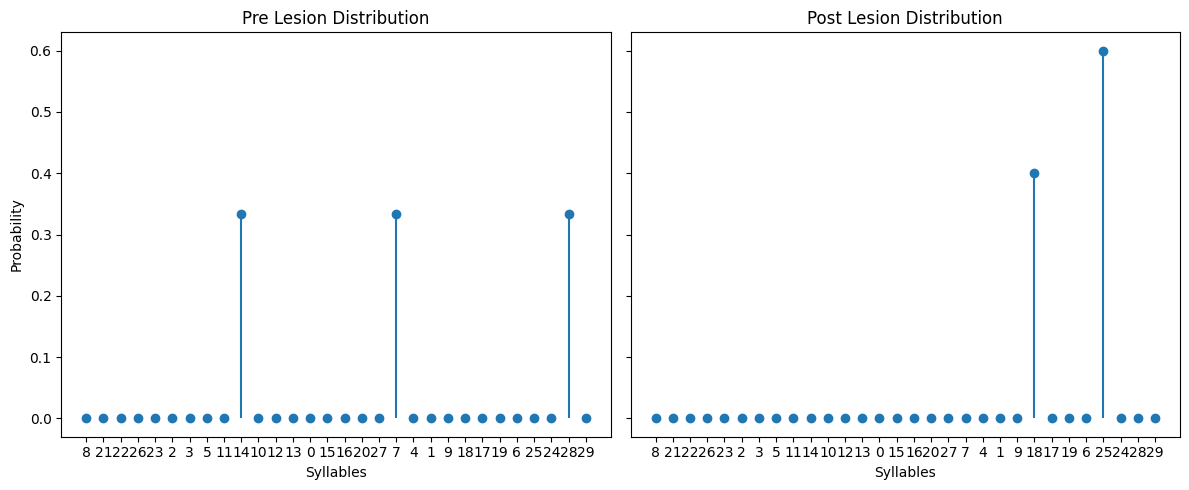

{"Earth Mover's Distance": np.float64(7.400004710542332),
 'Information Gain': np.float64(0.4256066139960991),
 'Kullback-Leibler Divergence': np.float64(17.93746767433411)}
30 30


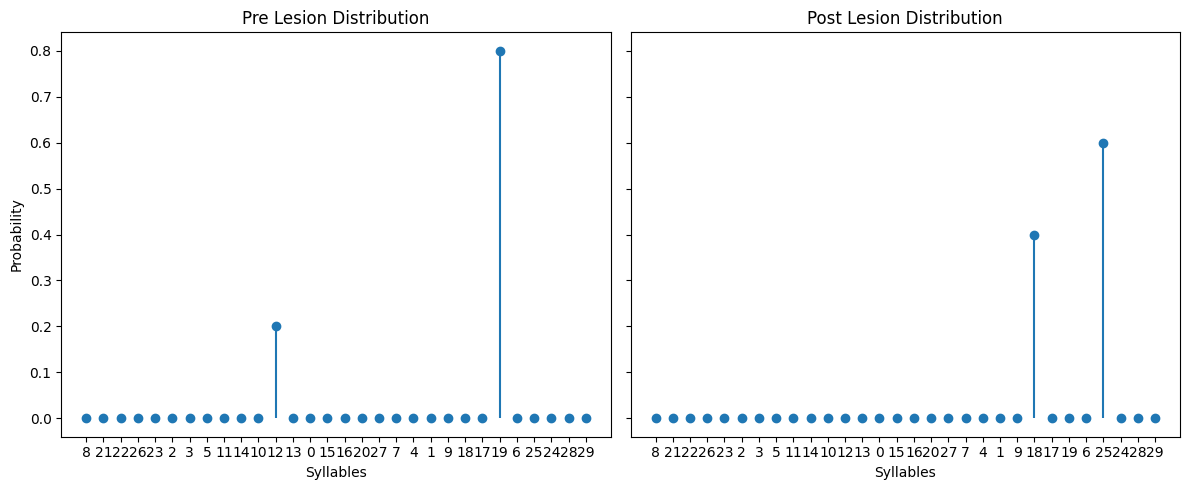

{"Earth Mover's Distance": np.float64(3.800002151725799),
 'Information Gain': np.float64(-0.17260626471224283),
 'Kullback-Leibler Divergence': np.float64(18.535680826756398)}
30 30


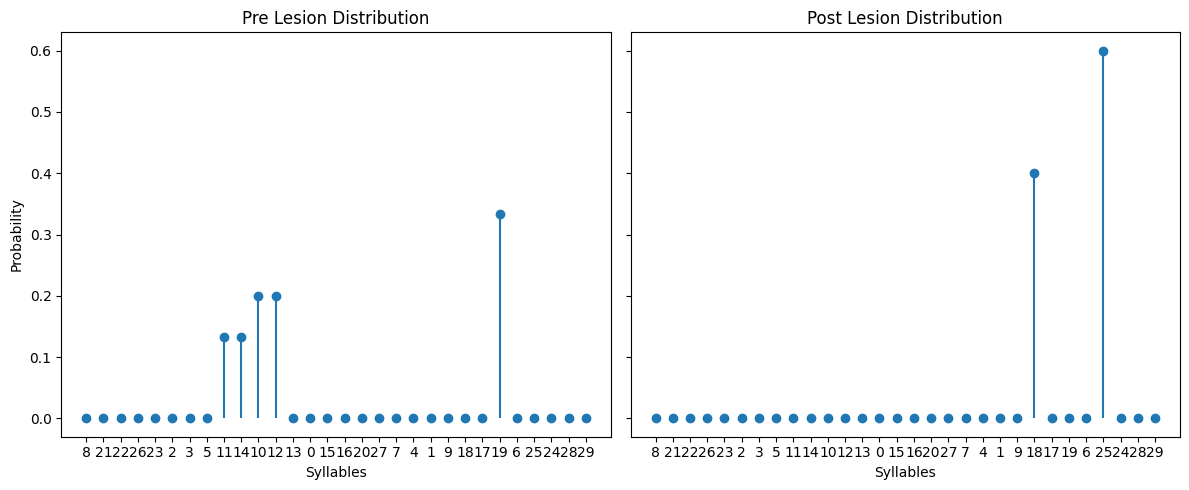

{"Earth Mover's Distance": np.float64(9.933333057860334),
 'Information Gain': np.float64(0.8742738989391544),
 'Kullback-Leibler Divergence': np.float64(17.488800936819064)}
30 30


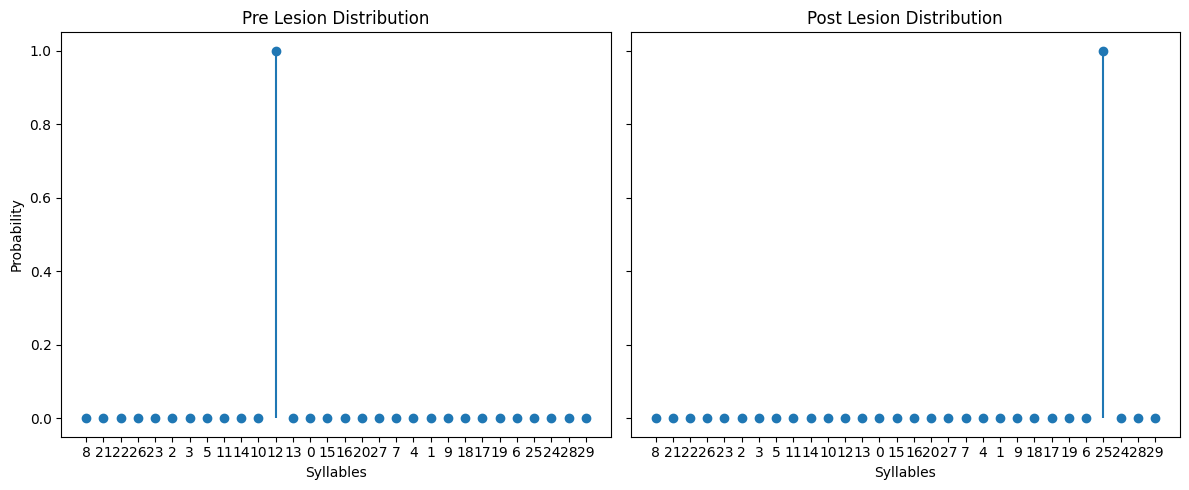

{"Earth Mover's Distance": np.float64(15.000010511697017),
 'Information Gain': np.float64(1.1798481452966996e-05),
 'Kullback-Leibler Divergence': np.float64(19.03607409826339)}
30 30


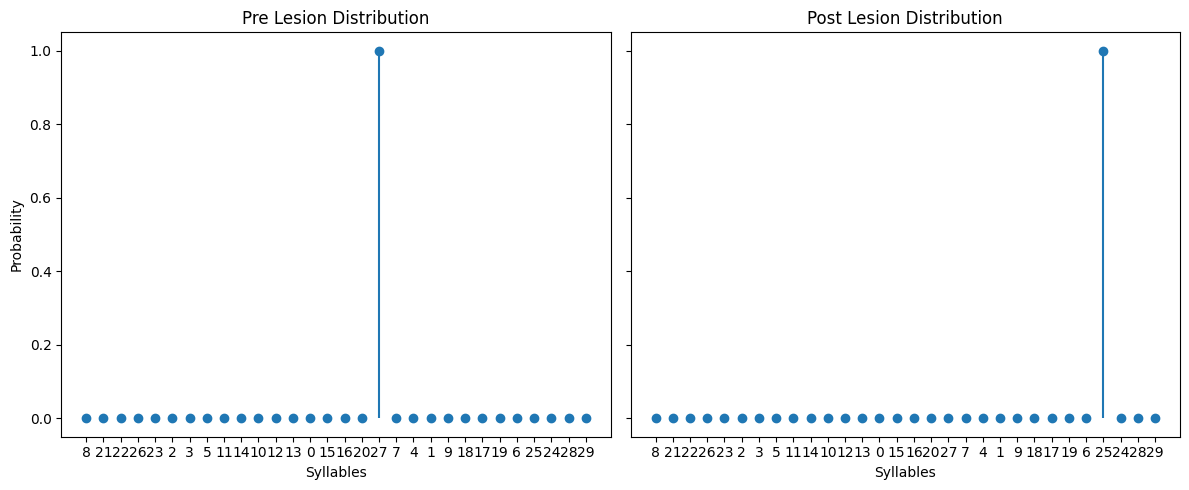

{"Earth Mover's Distance": np.float64(9.000023536346996),
 'Information Gain': np.float64(2.561095885060659e-05),
 'Kullback-Leibler Divergence': np.float64(19.0360597525865)}
30 30


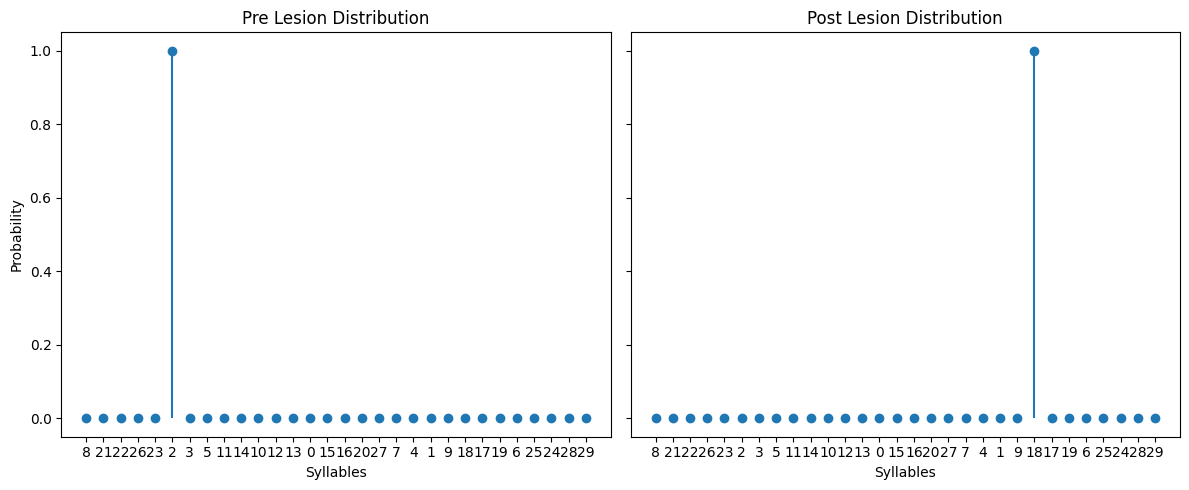

{"Earth Mover's Distance": np.float64(17.00001348453499),
 'Information Gain': np.float64(1.4311771776054105e-05),
 'Kullback-Leibler Divergence': np.float64(17.426622578816634)}
30 30


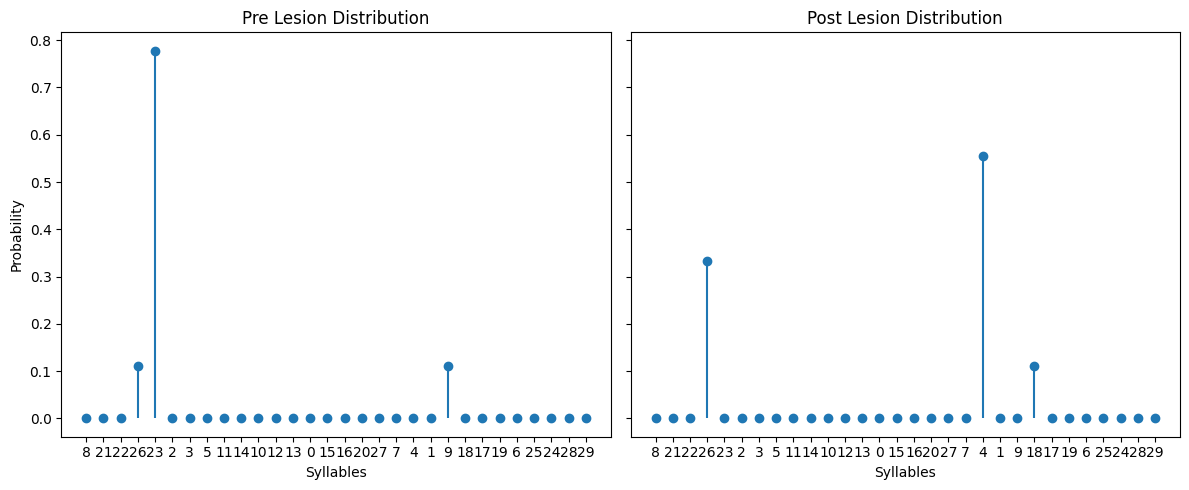

{"Earth Mover's Distance": np.float64(8.666669053882314),
 'Information Gain': np.float64(-0.2531467196548718),
 'Kullback-Leibler Divergence': np.float64(17.858315610182704)}
30 30


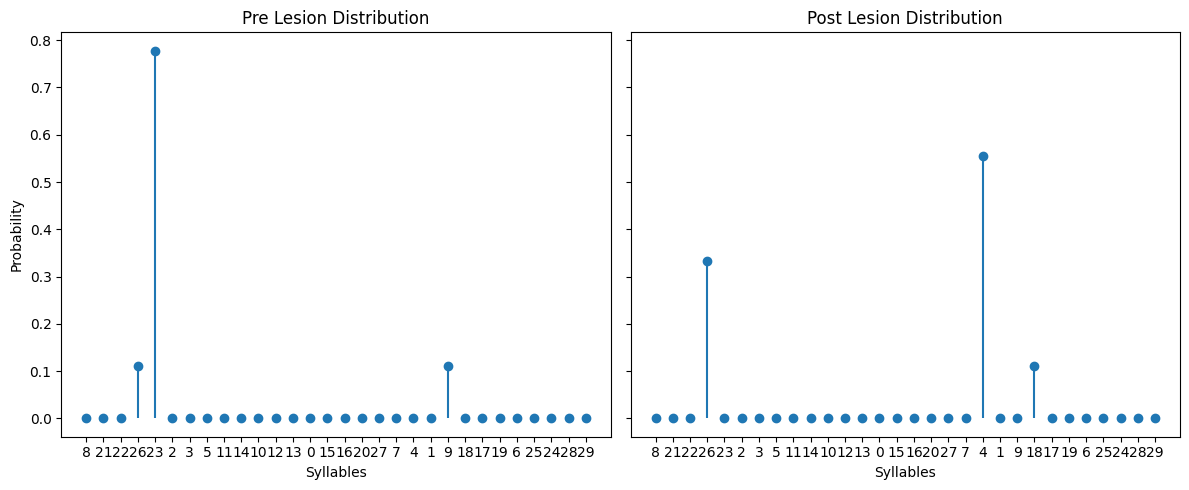

{"Earth Mover's Distance": np.float64(8.666669053882314),
 'Information Gain': np.float64(-0.2531467196548718),
 'Kullback-Leibler Divergence': np.float64(17.858315610182704)}
30 30


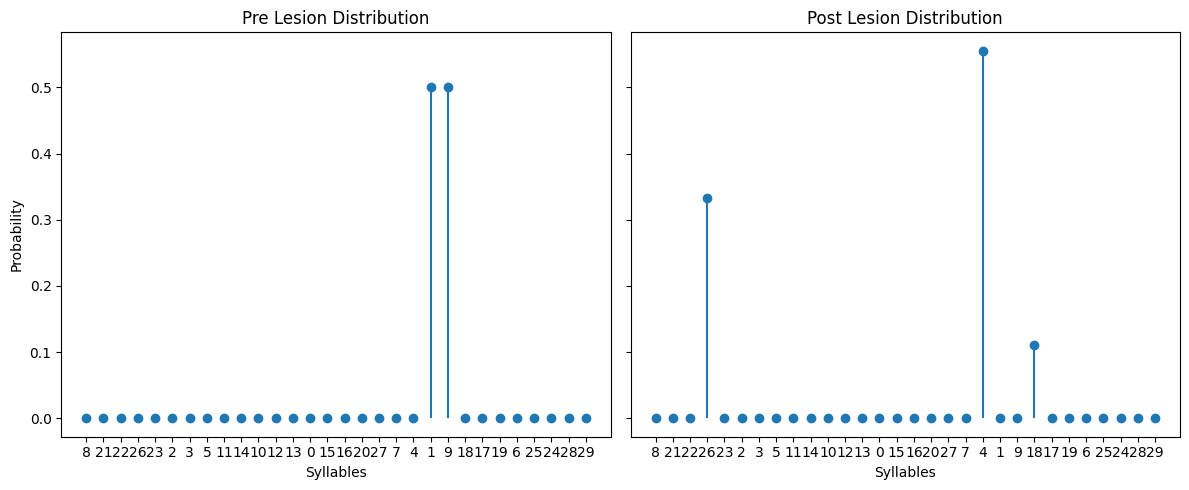

{"Earth Mover's Distance": np.float64(6.722222627360563),
 'Information Gain': np.float64(-0.24372780987180165),
 'Kullback-Leibler Divergence': np.float64(20.029325698586636)}
30 30


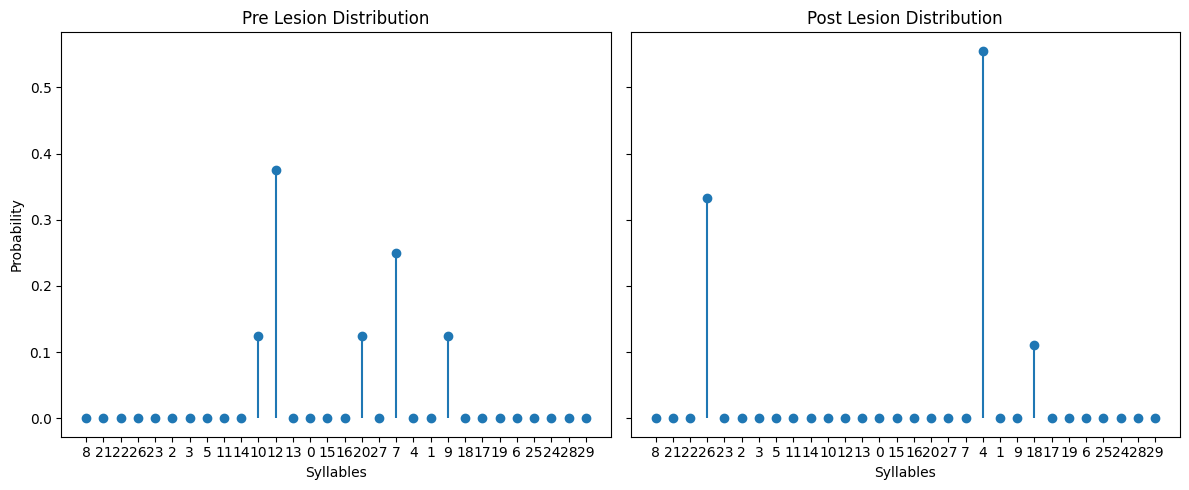

{"Earth Mover's Distance": np.float64(4.638890467341828),
 'Information Gain': np.float64(0.5572894766097922),
 'Kullback-Leibler Divergence': np.float64(19.228309636501578)}
30 30


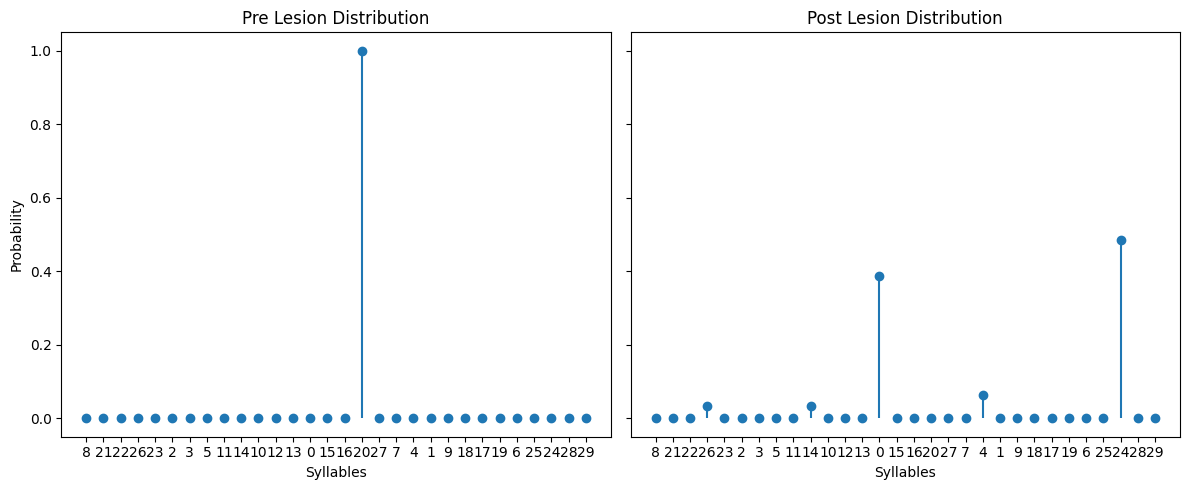

{"Earth Mover's Distance": np.float64(7.322591950574028),
 'Information Gain': np.float64(-1.1169935176834267),
 'Kullback-Leibler Divergence': np.float64(20.86060476412497)}
30 30


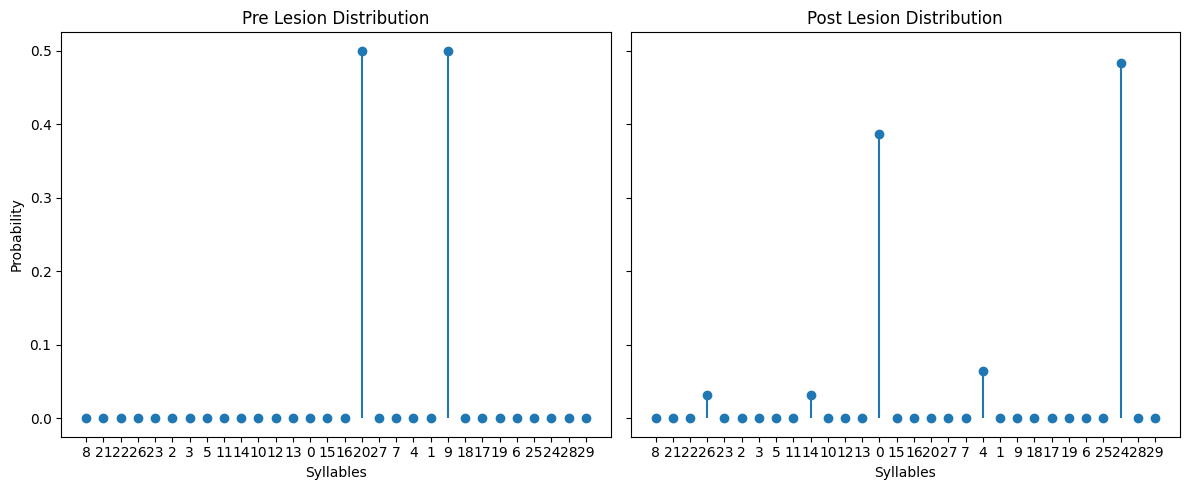

{"Earth Mover's Distance": np.float64(4.887098389596194),
 'Information Gain': np.float64(-0.42386787644601154),
 'Kullback-Leibler Divergence': np.float64(20.16748303108782)}
30 30


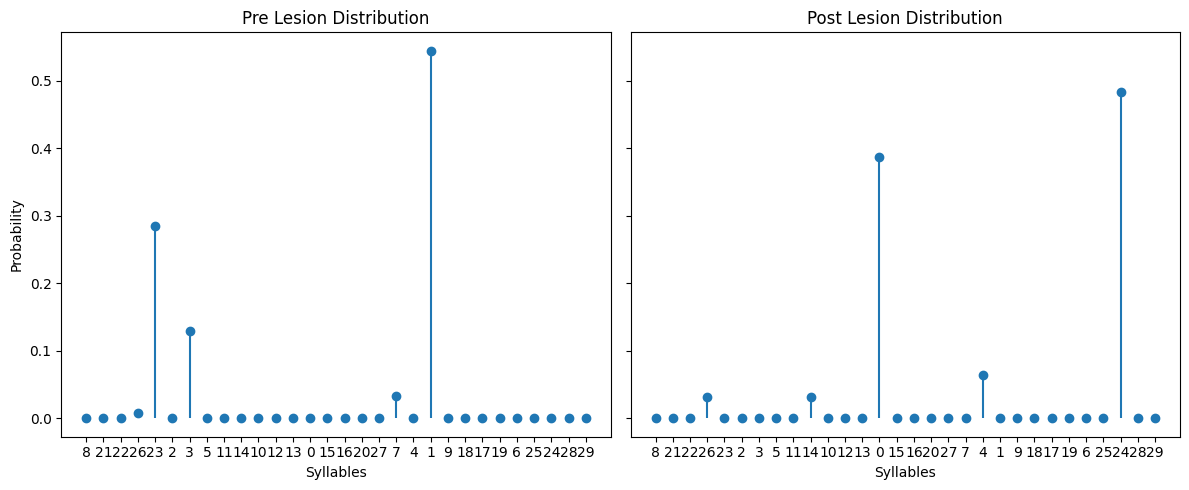

{"Earth Mover's Distance": np.float64(6.745344843253507),
 'Information Gain': np.float64(-0.012627785740206177),
 'Kullback-Leibler Divergence': np.float64(19.614564109009198)}
30 30


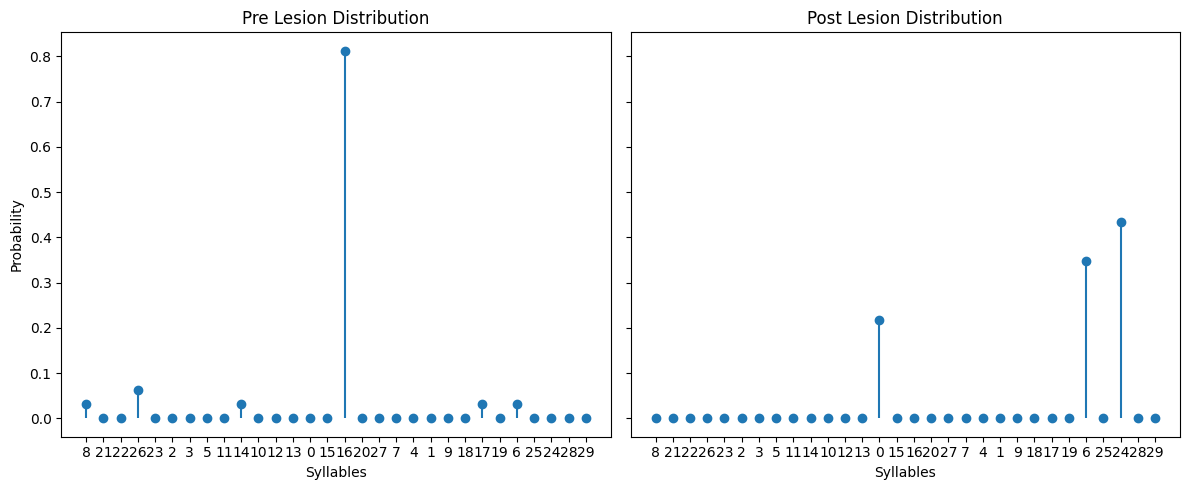

{"Earth Mover's Distance": np.float64(9.474185016958849),
 'Information Gain': np.float64(-0.2859974466520838),
 'Kullback-Leibler Divergence': np.float64(19.1773686243152)}
30 30


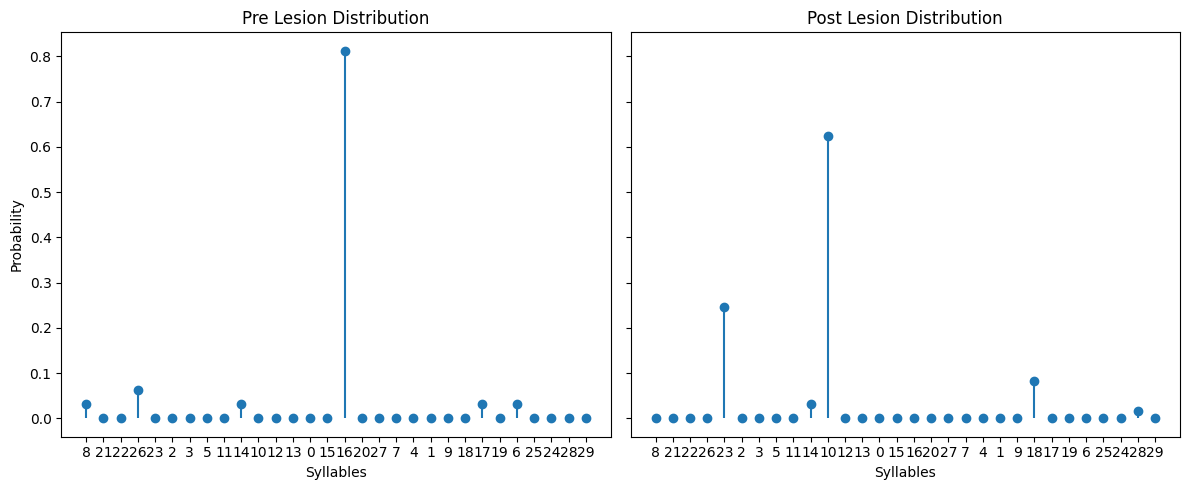

{"Earth Mover's Distance": np.float64(5.361168164860318),
 'Information Gain': np.float64(-0.24906391946125317),
 'Kullback-Leibler Divergence': np.float64(20.196069881130683)}
30 30


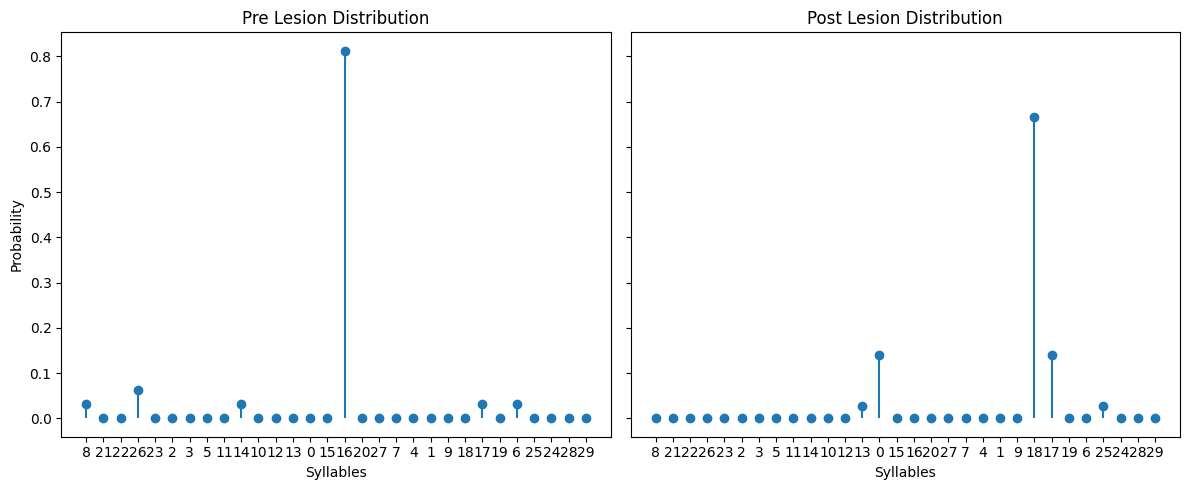

{"Earth Mover's Distance": np.float64(6.74652808679065),
 'Information Gain': np.float64(-0.24253905202429604),
 'Kullback-Leibler Divergence': np.float64(19.640080884969226)}
30 30


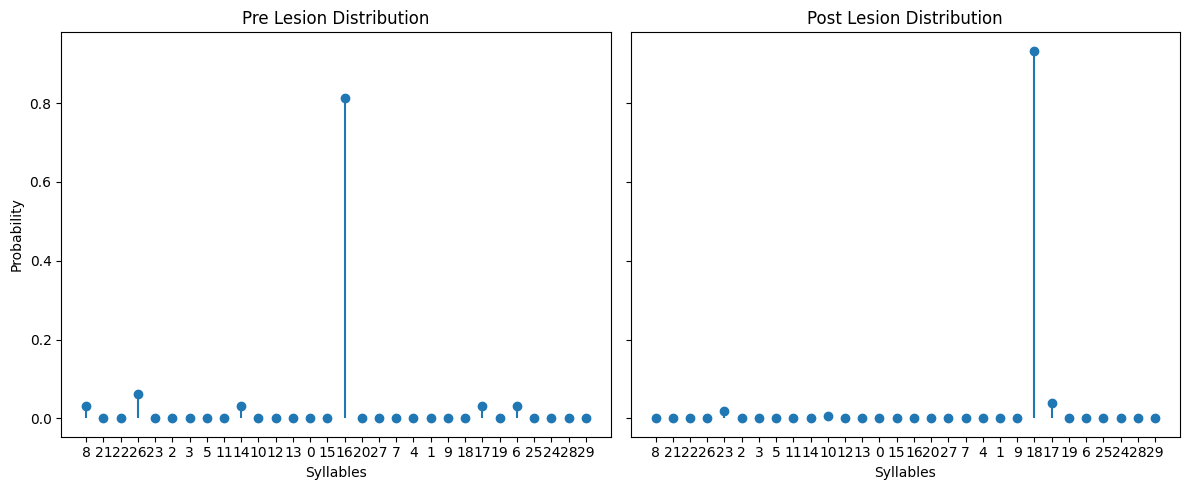

{"Earth Mover's Distance": np.float64(7.642190613389472),
 'Information Gain': np.float64(0.4562016967792966),
 'Kullback-Leibler Divergence': np.float64(22.41936090571004)}
30 30


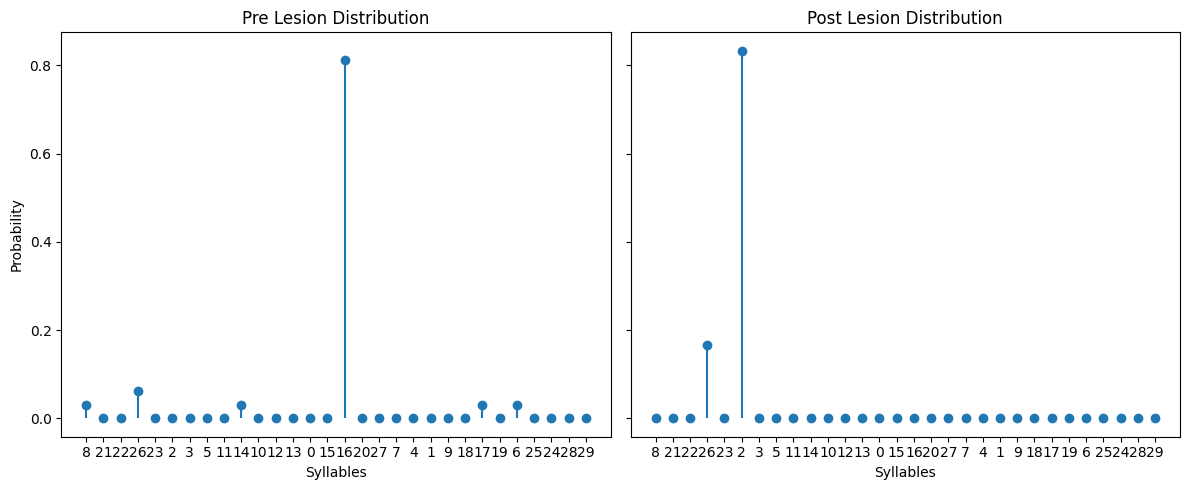

{"Earth Mover's Distance": np.float64(9.677084580385714),
 'Information Gain': np.float64(0.32464793843659806),
 'Kullback-Leibler Divergence': np.float64(17.354033728201717)}
30 30


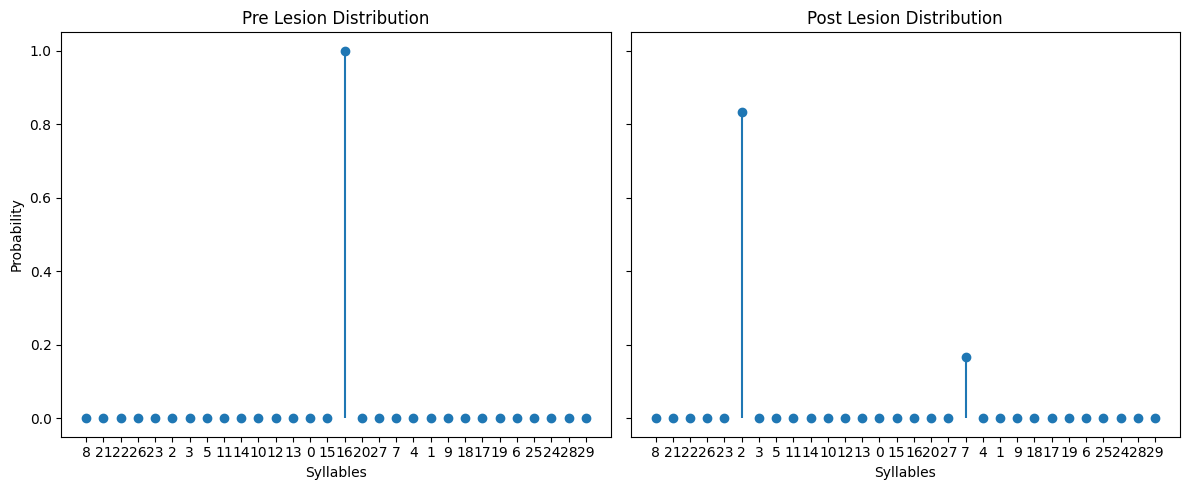

{"Earth Mover's Distance": np.float64(8.833333613450828),
 'Information Gain': np.float64(-0.4505604572018012),
 'Kullback-Leibler Divergence': np.float64(19.21840764636294)}
30 30


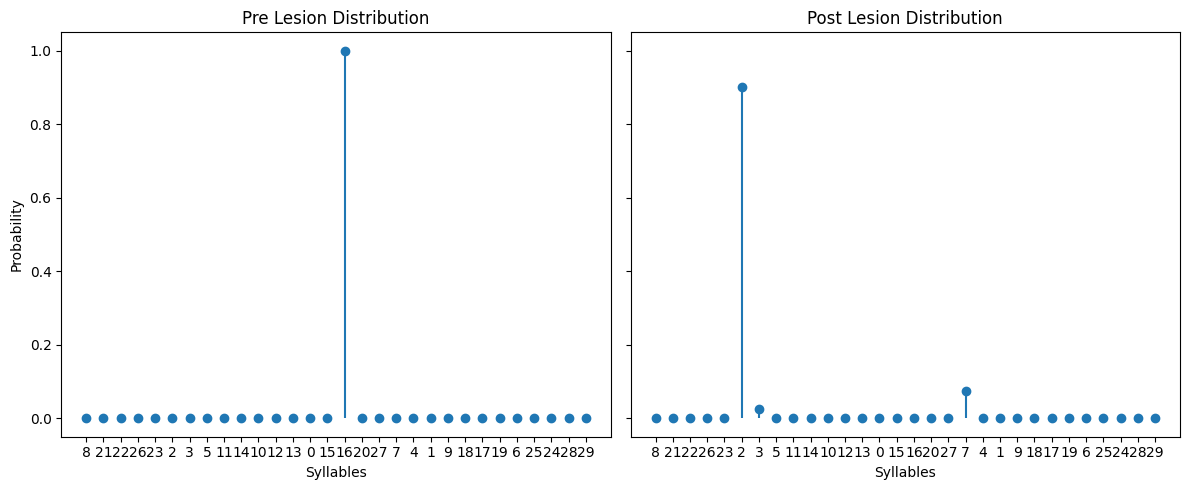

{"Earth Mover's Distance": np.float64(9.45000125625113),
 'Information Gain': np.float64(-0.381313638625027),
 'Kullback-Leibler Divergence': np.float64(21.115527401572287)}
30 30


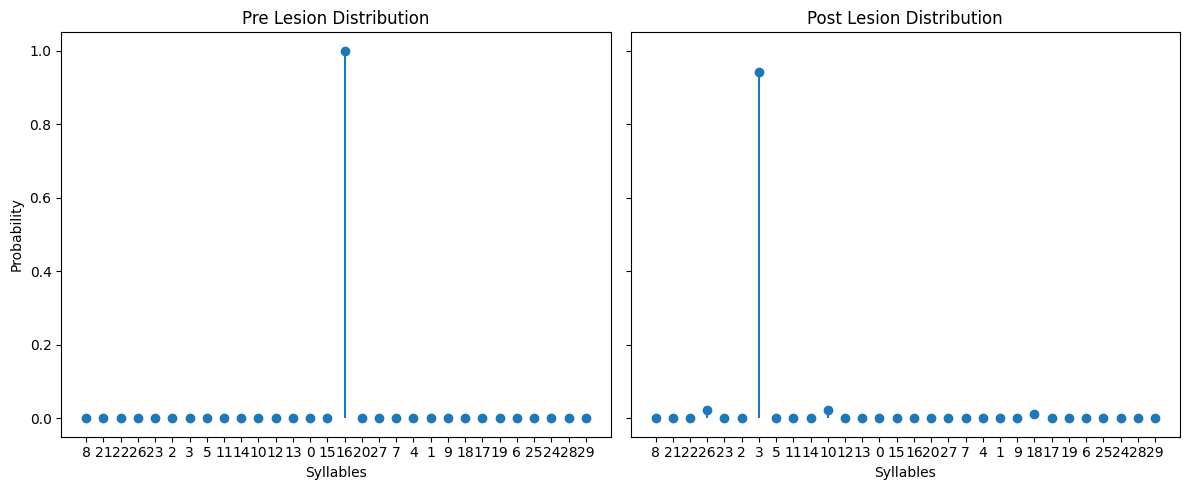

{"Earth Mover's Distance": np.float64(8.952942428803675),
 'Information Gain': np.float64(-0.28576914452239993),
 'Kullback-Leibler Divergence': np.float64(21.86929908951081)}
30 30


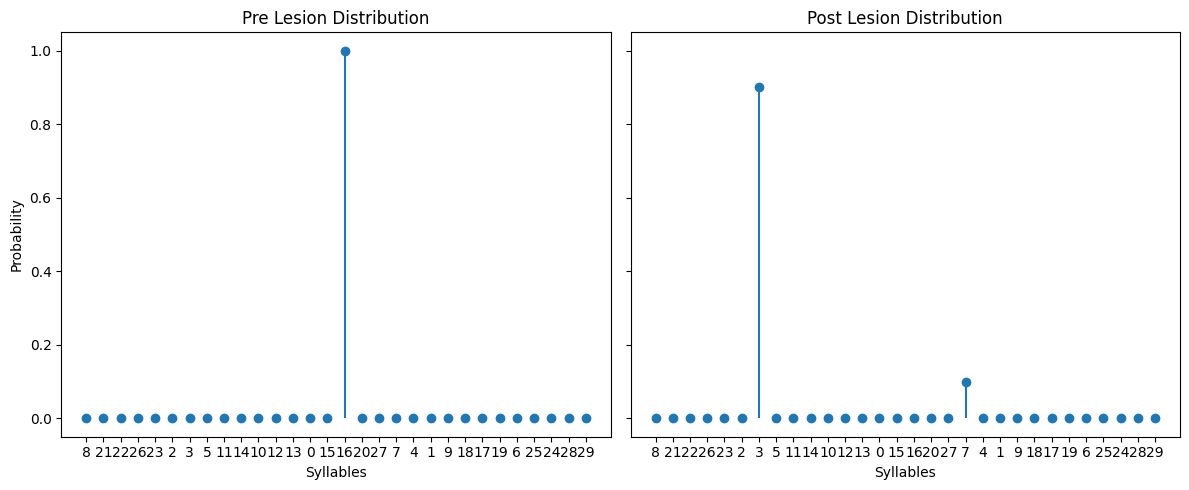

{"Earth Mover's Distance": np.float64(8.404763371866503),
 'Information Gain': np.float64(-0.32333245871795063),
 'Kullback-Leibler Divergence': np.float64(22.95607709335148)}
30 30


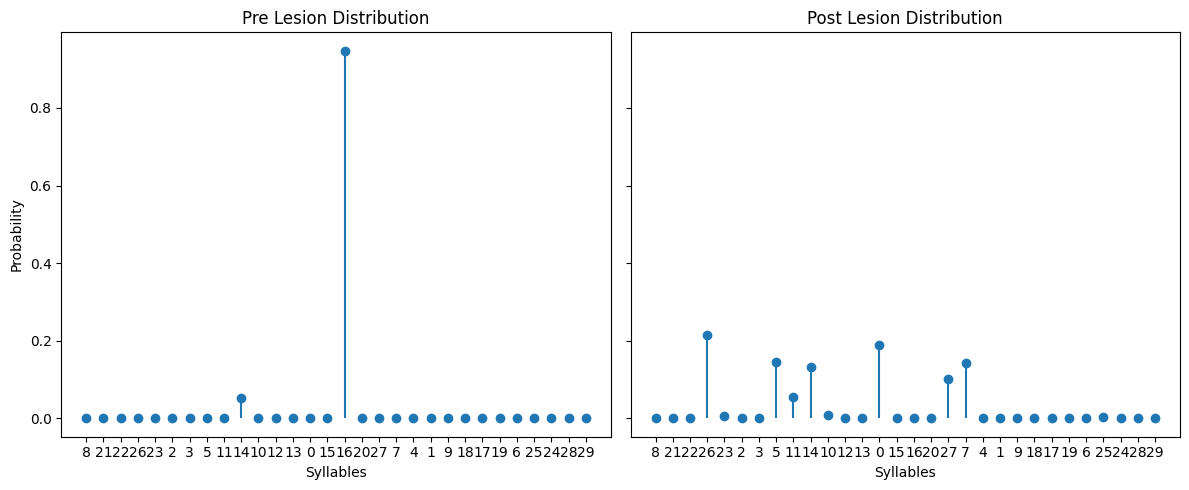

{"Earth Mover's Distance": np.float64(5.776790725866159),
 'Information Gain': np.float64(-1.7619447873873961),
 'Kullback-Leibler Divergence': np.float64(6.77337030433564)}
30 30


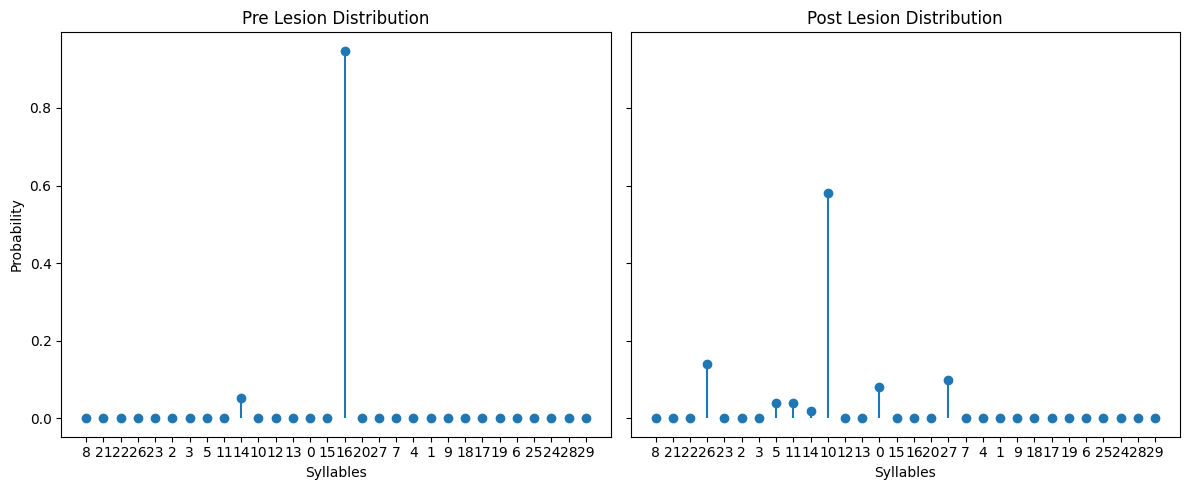

{"Earth Mover's Distance": np.float64(5.344211097012042),
 'Information Gain': np.float64(-1.1530714084228133),
 'Kullback-Leibler Divergence': np.float64(20.215288279245556)}
30 30


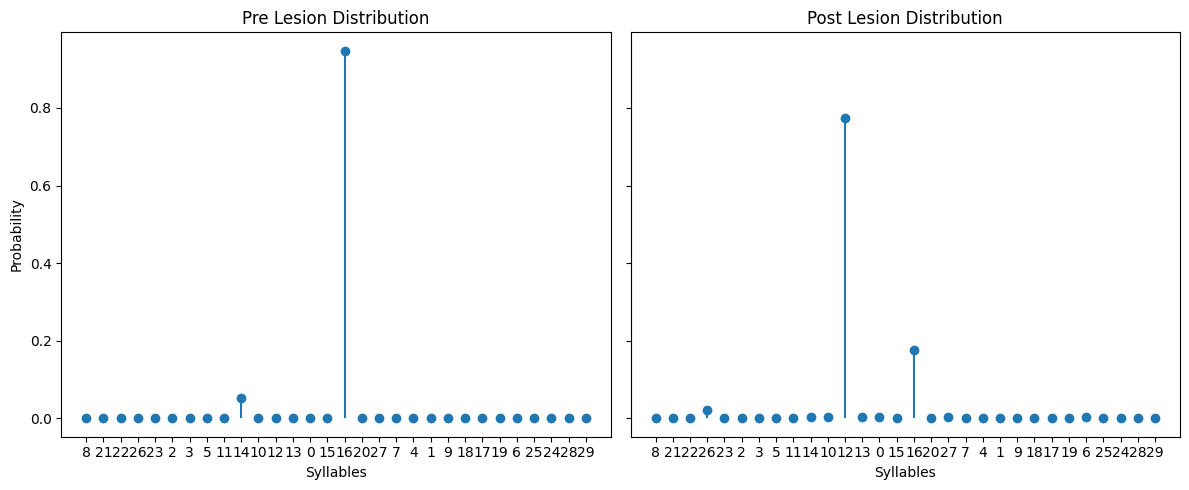

{"Earth Mover's Distance": np.float64(3.267464903174468),
 'Information Gain': np.float64(-0.5328346459465845),
 'Kullback-Leibler Divergence': np.float64(1.7166925457935935)}
30 30


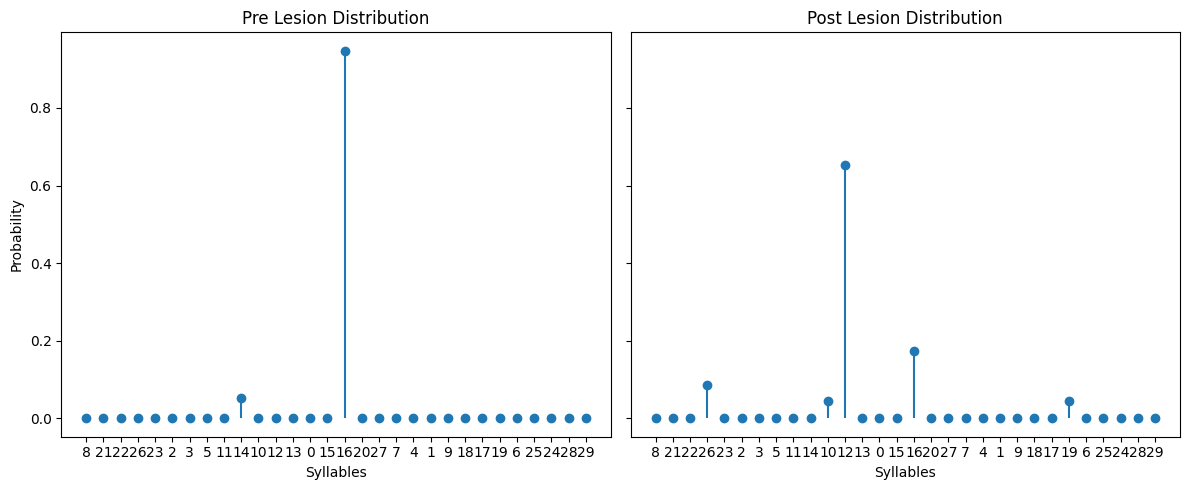

{"Earth Mover's Distance": np.float64(3.945080651092086),
 'Information Gain': np.float64(-0.86181274923458),
 'Kullback-Leibler Divergence': np.float64(2.5696439528365387)}
30 30


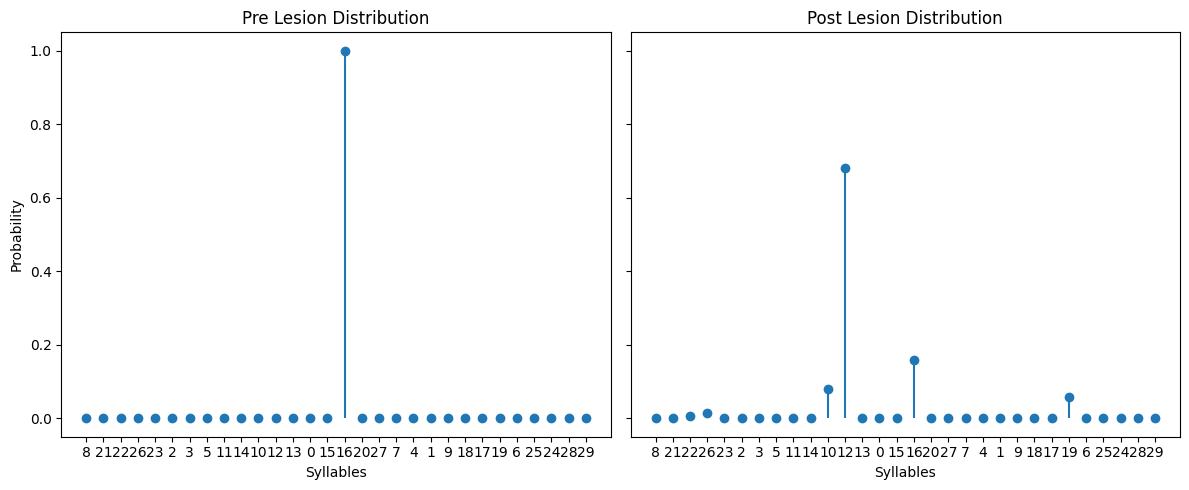

{"Earth Mover's Distance": np.float64(3.9130563736500634),
 'Information Gain': np.float64(-1.0180125904117736),
 'Kullback-Leibler Divergence': np.float64(1.8362103926118032)}
30 30


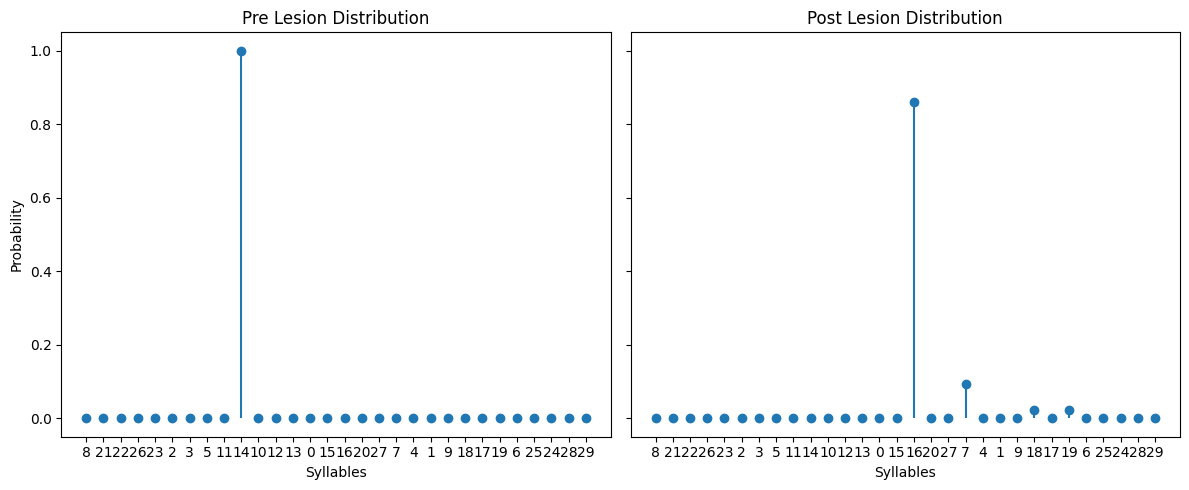

{"Earth Mover's Distance": np.float64(6.65118854779383),
 'Information Gain': np.float64(-0.5251452070023888),
 'Kullback-Leibler Divergence': np.float64(21.187818694070906)}
30 30


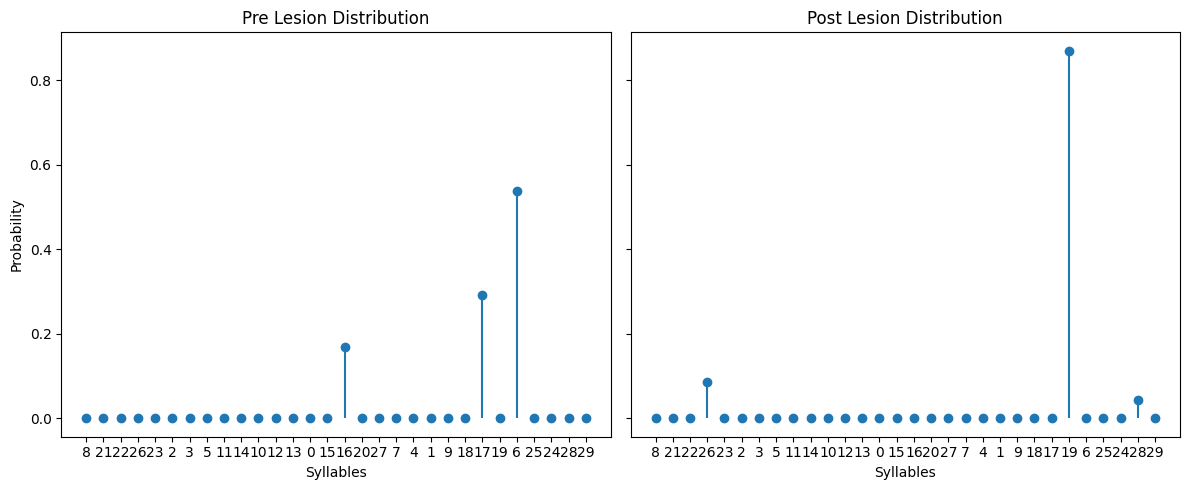

{"Earth Mover's Distance": np.float64(2.7016722229628196),
 'Information Gain': np.float64(0.5232531081857966),
 'Kullback-Leibler Divergence': np.float64(19.568655953771437)}
30 30


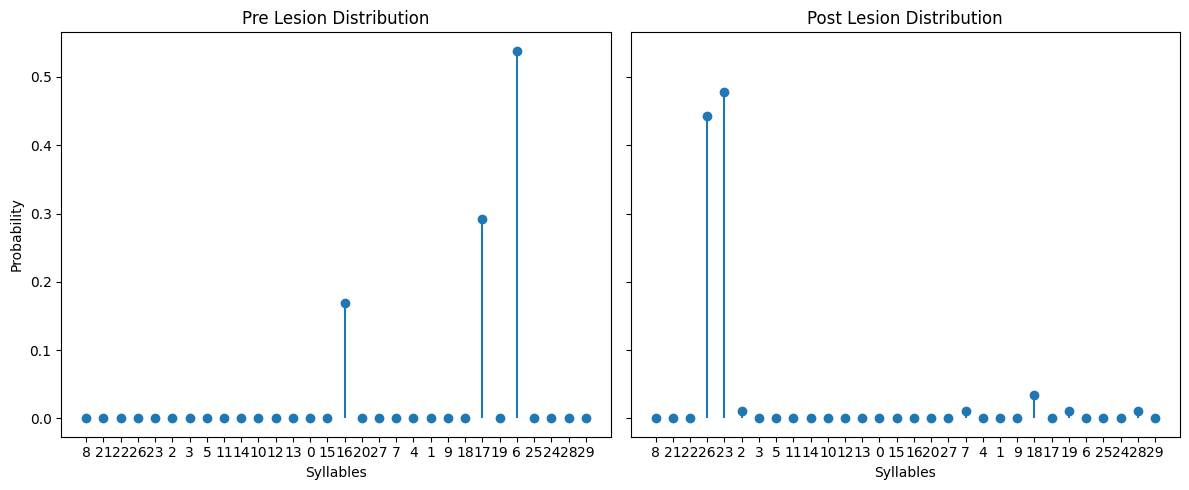

{"Earth Mover's Distance": np.float64(17.950349554371094),
 'Information Gain': np.float64(-0.038882853719690025),
 'Kullback-Leibler Divergence': np.float64(20.910498462064737)}
30 30


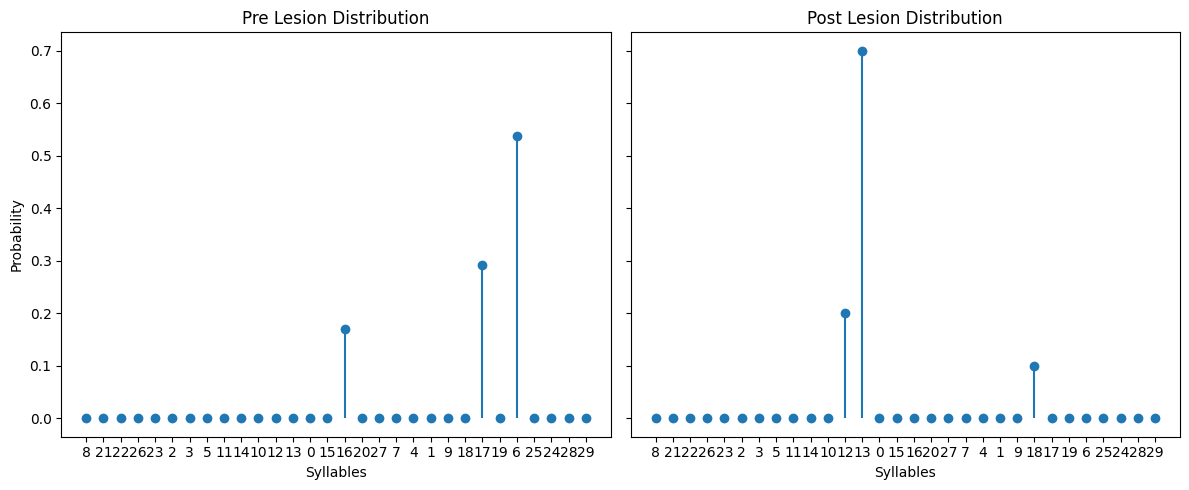

{"Earth Mover's Distance": np.float64(9.923077778794966),
 'Information Gain': np.float64(0.19166973322612335),
 'Kullback-Leibler Divergence': np.float64(18.735746877559336)}
30 30


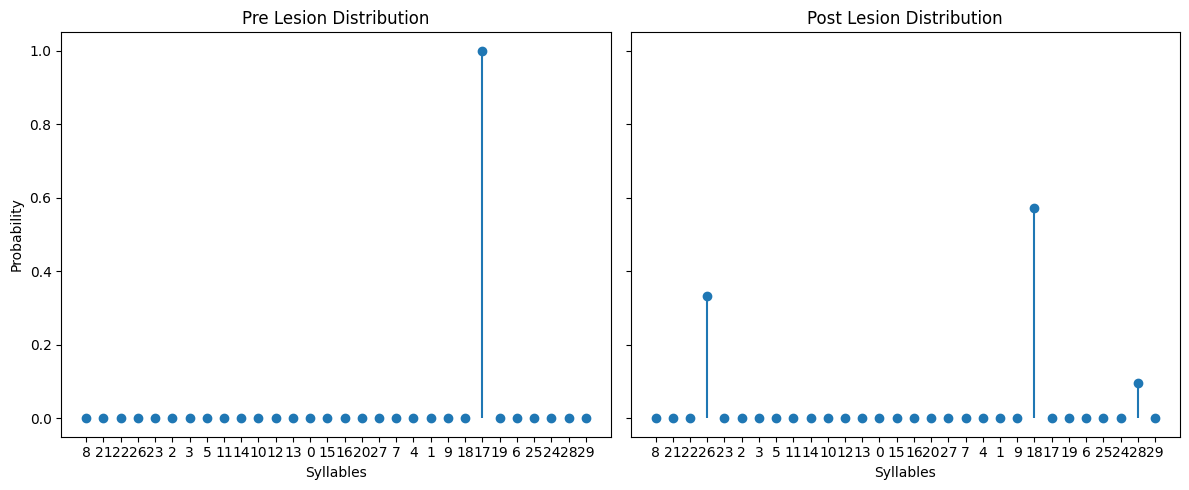

{"Earth Mover's Distance": np.float64(7.714281609289285),
 'Information Gain': np.float64(-0.909897012074369),
 'Kullback-Leibler Divergence': np.float64(20.47114200498909)}
30 30


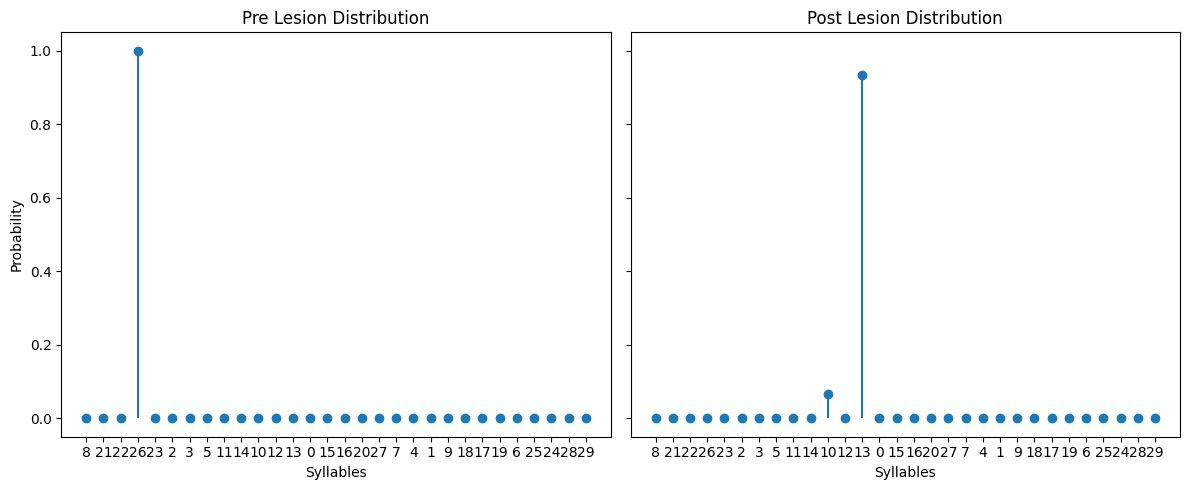

{"Earth Mover's Distance": np.float64(8.86667451211568),
 'Information Gain': np.float64(-0.24492090595668975),
 'Kullback-Leibler Divergence': np.float64(20.134690871892552)}
30 30


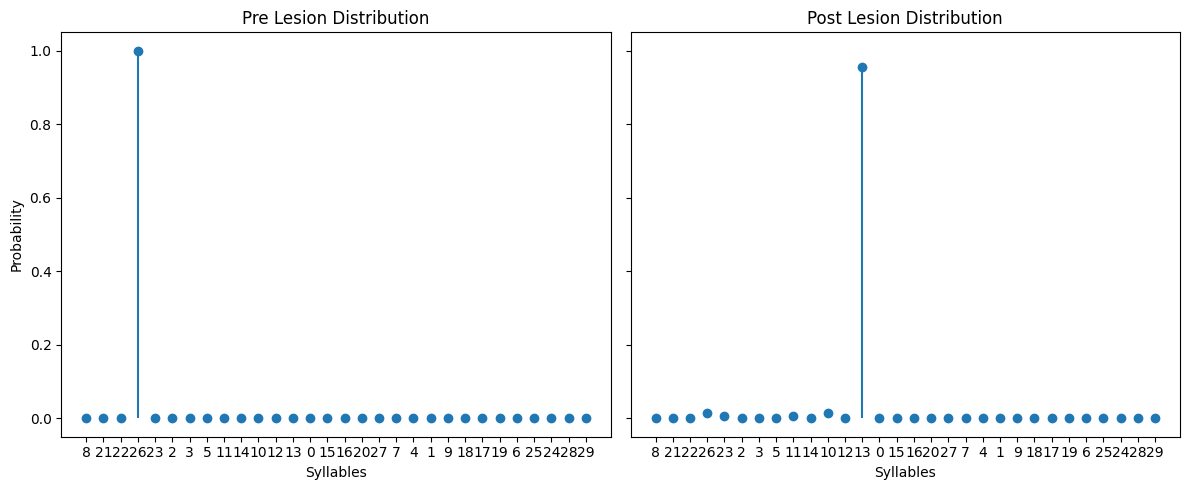

{"Earth Mover's Distance": np.float64(8.75183340890463),
 'Information Gain': np.float64(-0.23804795897453157),
 'Kullback-Leibler Divergence': np.float64(4.226831965768529)}
30 30


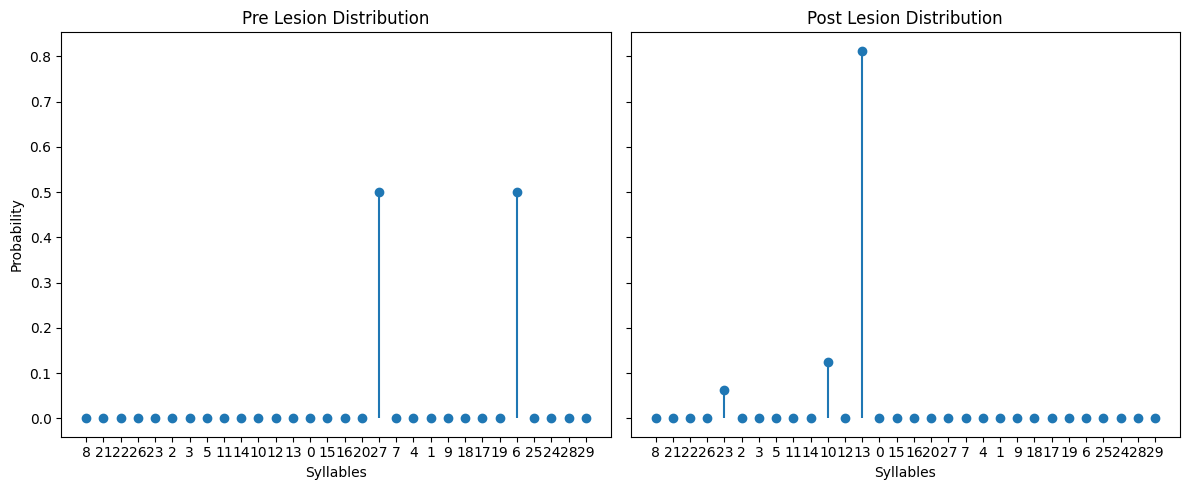

{"Earth Mover's Distance": np.float64(9.749995657004062),
 'Information Gain': np.float64(0.09123614396608526),
 'Kullback-Leibler Divergence': np.float64(19.506077652372646)}
30 30


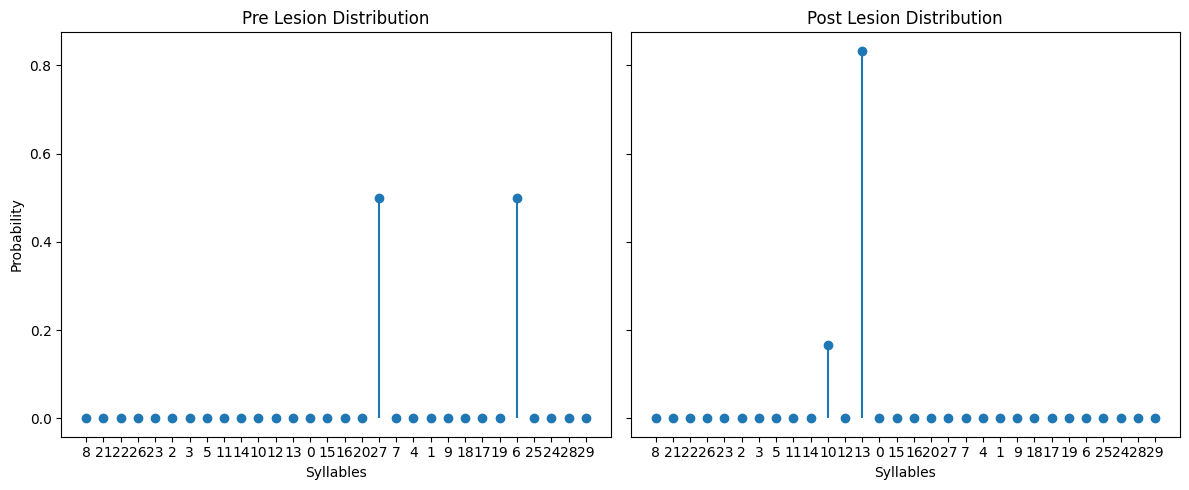

{"Earth Mover's Distance": np.float64(9.333331570345832),
 'Information Gain': np.float64(0.2425973540043262),
 'Kullback-Leibler Divergence': np.float64(18.525249018100535)}
30 30


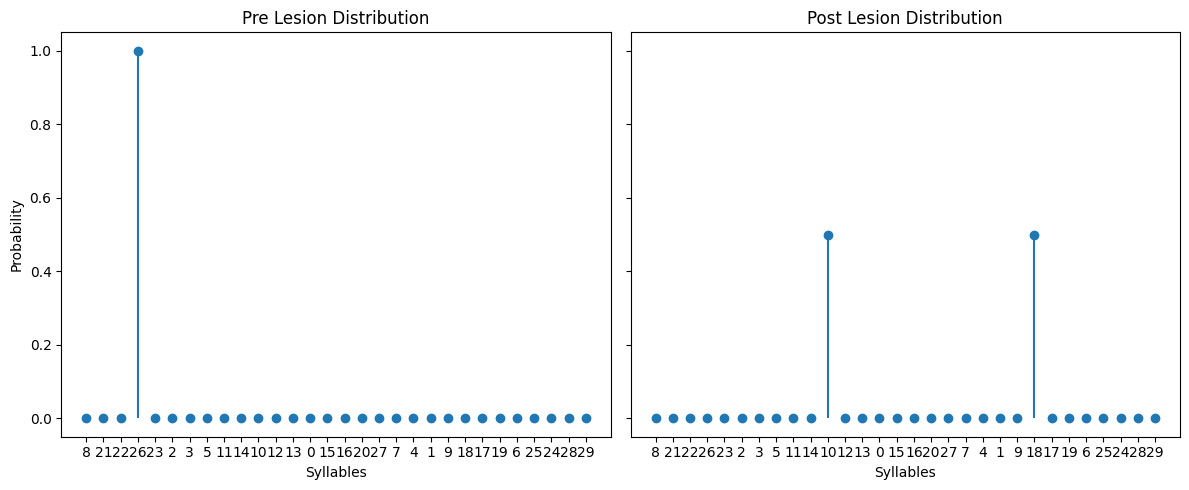

{"Earth Mover's Distance": np.float64(13.000019766917474),
 'Information Gain': np.float64(-0.6931254001985515),
 'Kullback-Leibler Divergence': np.float64(18.119768377822442)}
30 30


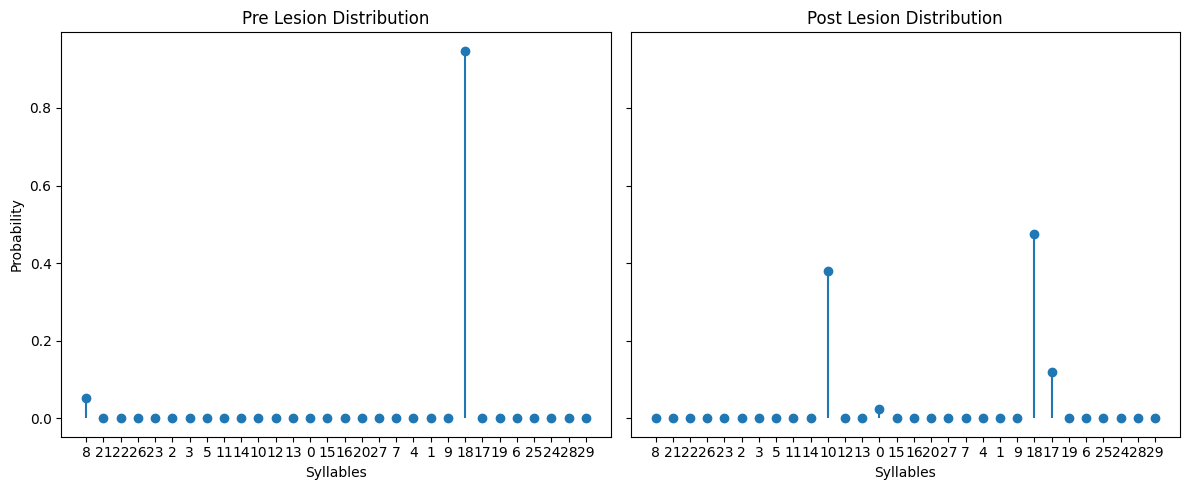

{"Earth Mover's Distance": np.float64(4.799498905916577),
 'Information Gain': np.float64(-0.8571130235277495),
 'Kullback-Leibler Divergence': np.float64(1.610607405093241)}
30 30


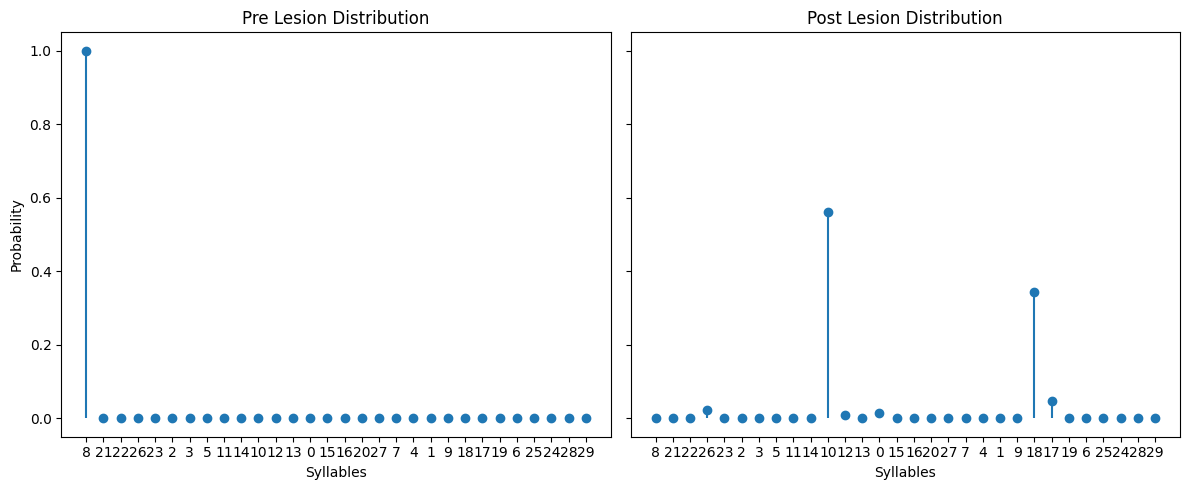

{"Earth Mover's Distance": np.float64(14.62502595113776),
 'Information Gain': np.float64(-1.024993874067311),
 'Kullback-Leibler Divergence': np.float64(22.278646504925963)}
30 30


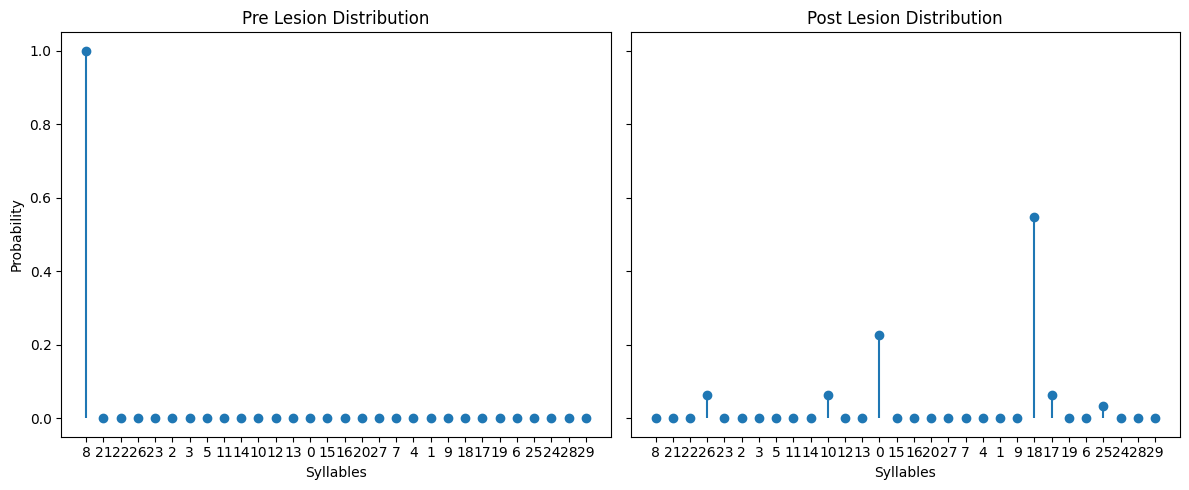

{"Earth Mover's Distance": np.float64(18.161315966565635),
 'Information Gain': np.float64(-1.3067046635362505),
 'Kullback-Leibler Divergence': np.float64(20.860603733408425)}
30 30


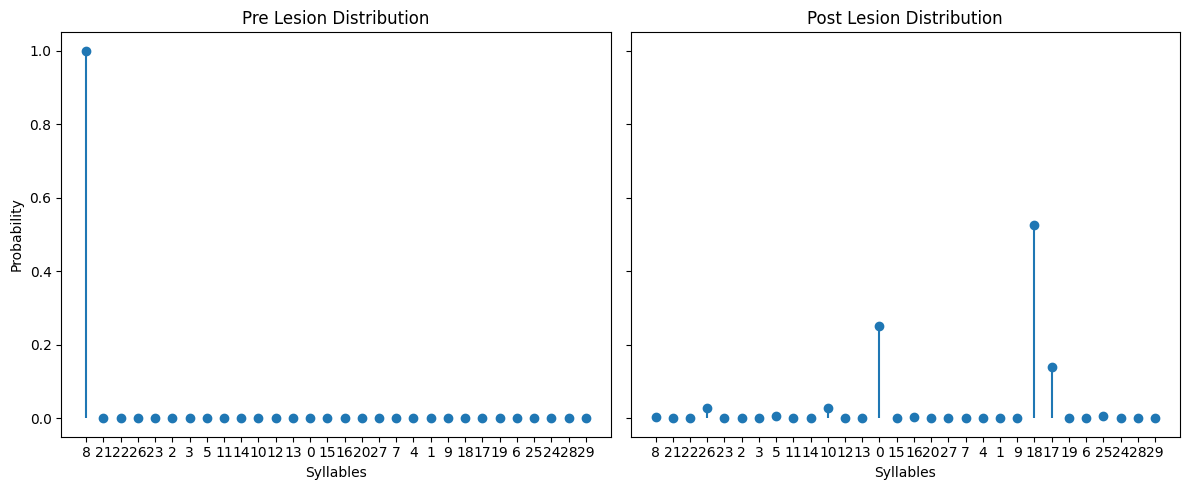

{"Earth Mover's Distance": np.float64(18.77476684801369),
 'Information Gain': np.float64(-1.2919078716844767),
 'Kullback-Leibler Divergence': np.float64(5.580662202694182)}
30 30


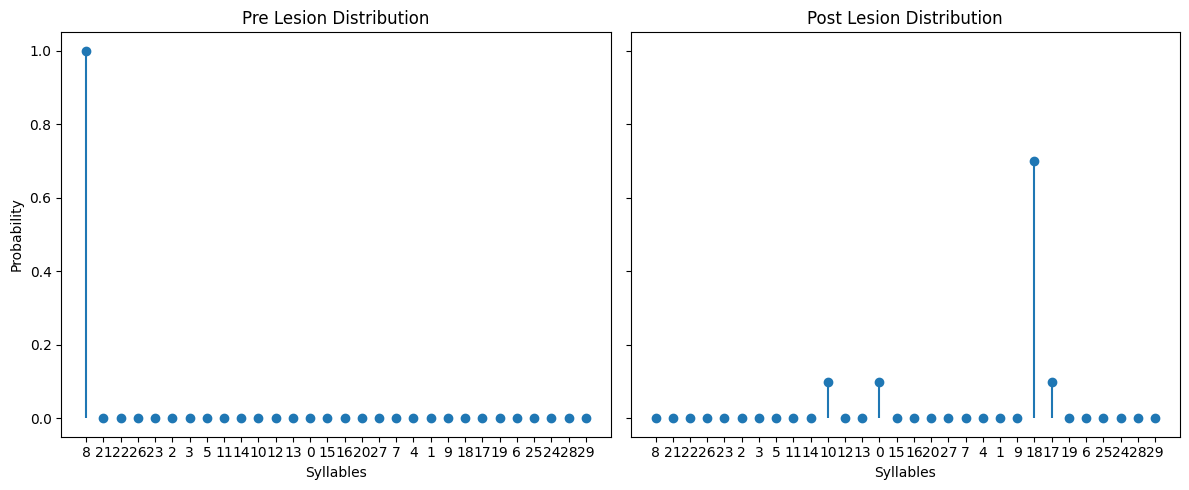

{"Earth Mover's Distance": np.float64(20.00002563047449),
 'Information Gain': np.float64(-0.9404197299051194),
 'Kullback-Leibler Divergence': np.float64(20.82781589296566)}
30 30


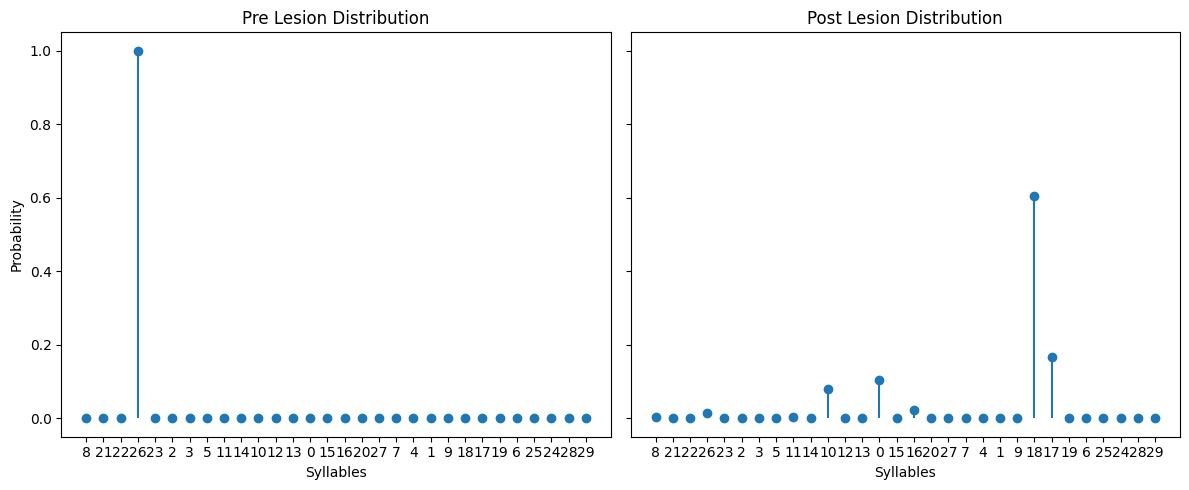

{"Earth Mover's Distance": np.float64(16.72197430813325),
 'Information Gain': np.float64(-1.2309273595314947),
 'Kullback-Leibler Divergence': np.float64(4.308558914388915)}
30 30


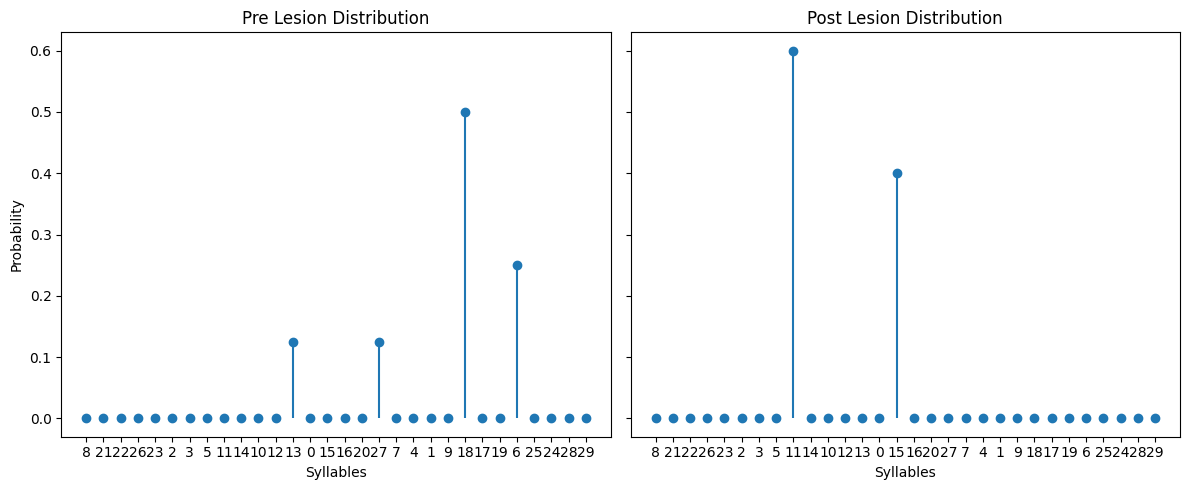

{"Earth Mover's Distance": np.float64(10.4749998193921),
 'Information Gain': np.float64(0.5399963581182802),
 'Kullback-Leibler Divergence': np.float64(17.82307835789002)}
30 30


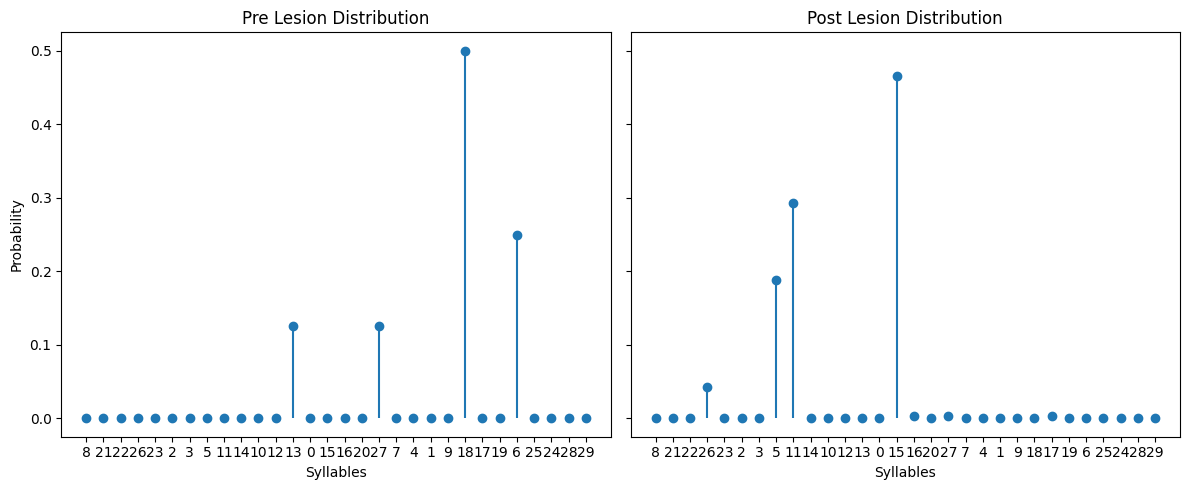

{"Earth Mover's Distance": np.float64(10.3634603450084),
 'Information Gain': np.float64(-0.014969068015514786),
 'Kullback-Leibler Divergence': np.float64(19.59599022920803)}
30 30


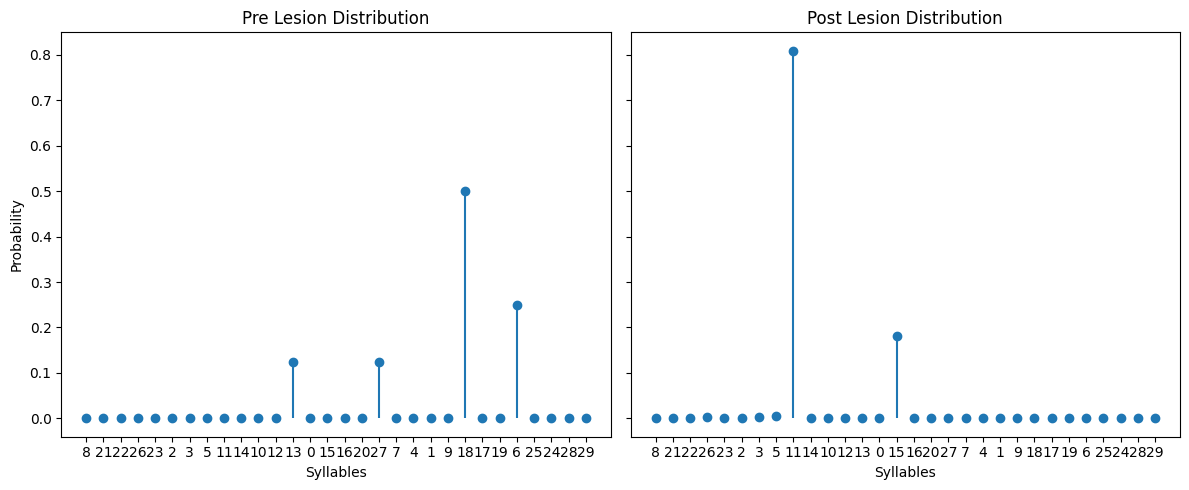

{"Earth Mover's Distance": np.float64(11.816643363301274),
 'Information Gain': np.float64(0.6733596504435008),
 'Kullback-Leibler Divergence': np.float64(22.14588504492731)}
30 30


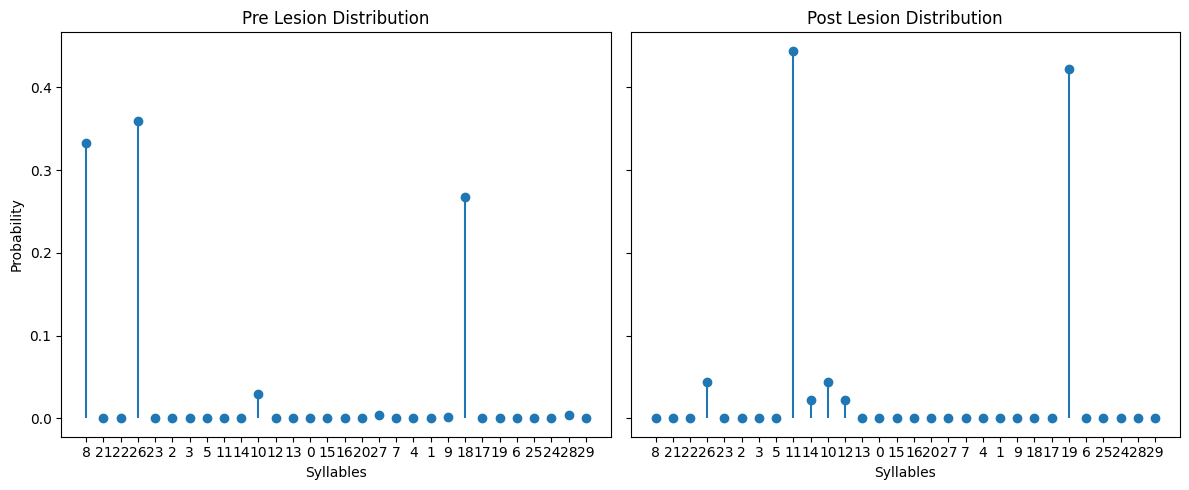

{"Earth Mover's Distance": np.float64(7.255982841079517),
 'Information Gain': np.float64(0.08092155240074916),
 'Kullback-Leibler Divergence': np.float64(12.935398502814623)}
30 30


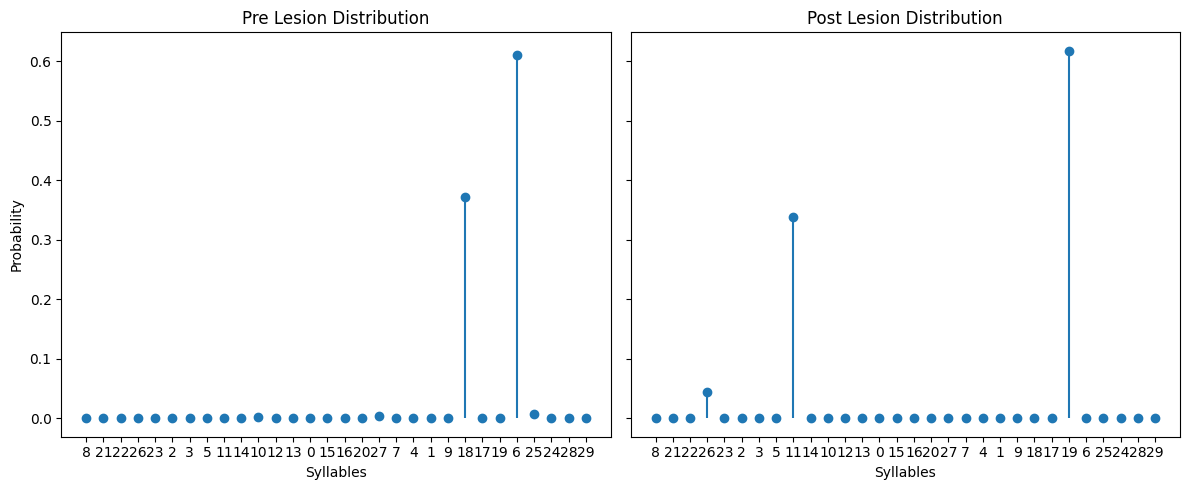

{"Earth Mover's Distance": np.float64(6.118301906767821),
 'Information Gain': np.float64(-0.03247350359554957),
 'Kullback-Leibler Divergence': np.float64(20.864379272237148)}
30 30


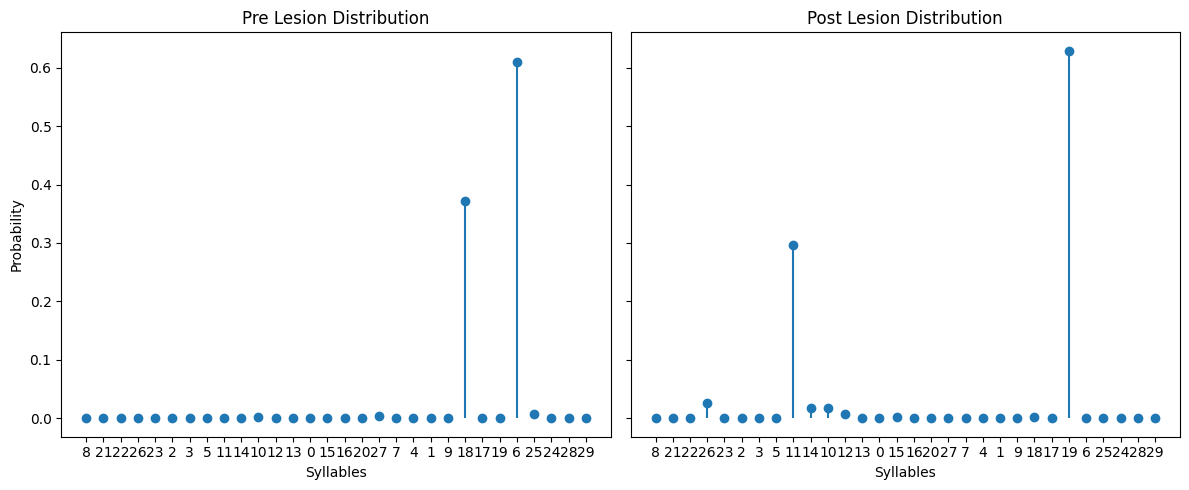

{"Earth Mover's Distance": np.float64(5.761913907290719),
 'Information Gain': np.float64(-0.19014110080642133),
 'Kullback-Leibler Divergence': np.float64(16.06925293245269)}
30 30


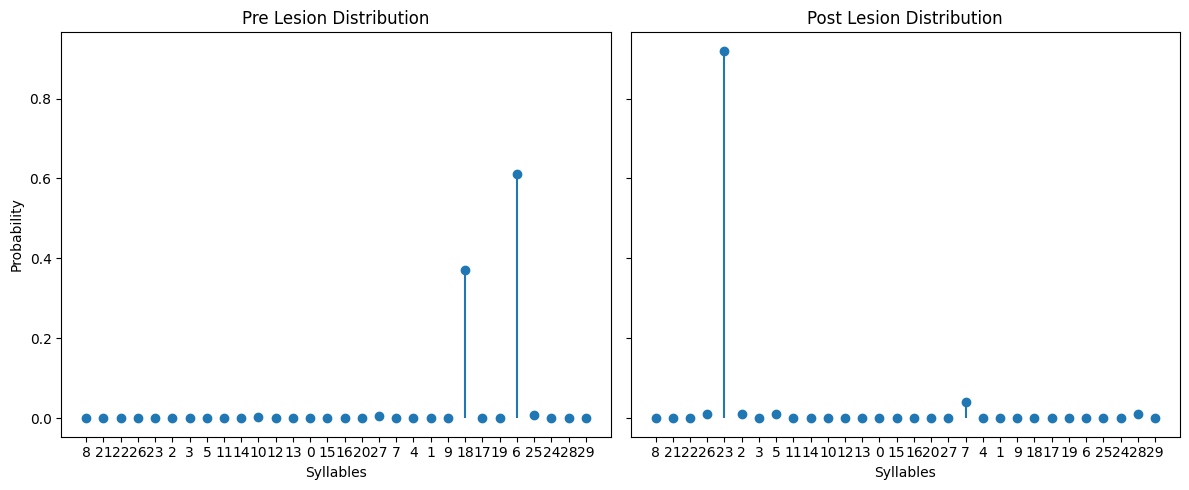

{"Earth Mover's Distance": np.float64(18.98759247715035),
 'Information Gain': np.float64(0.37825973733347684),
 'Kullback-Leibler Divergence': np.float64(21.926406060607828)}
30 30


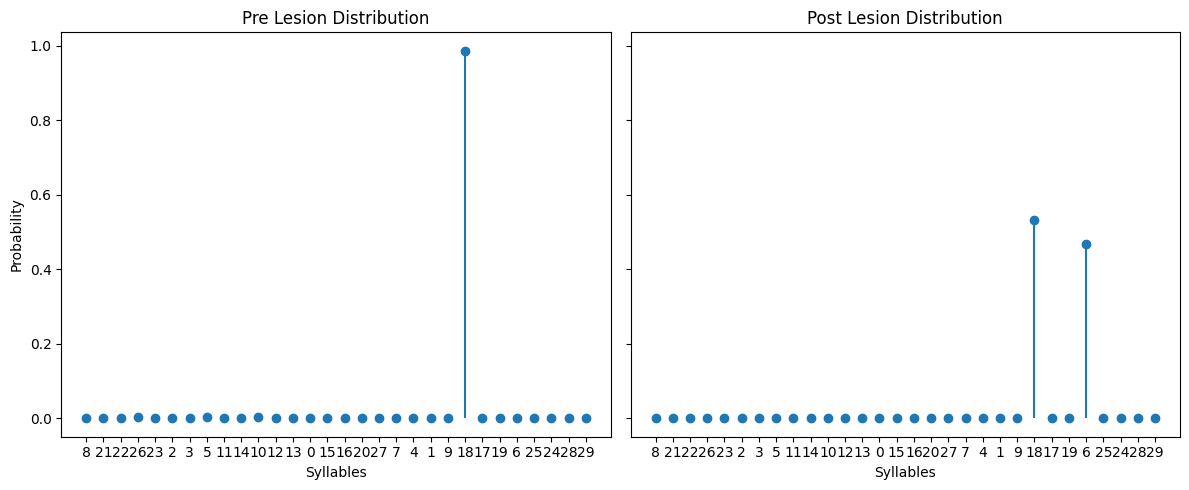

{"Earth Mover's Distance": np.float64(1.6017542726502167),
 'Information Gain': np.float64(-0.6064139855375739),
 'Kullback-Leibler Divergence': np.float64(0.8098784415140463)}
30 30


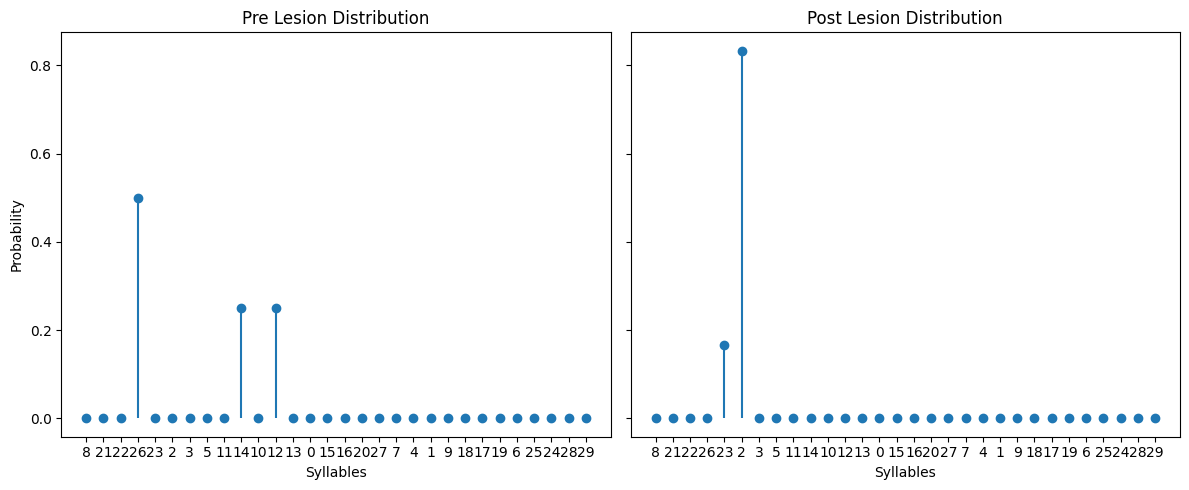

{"Earth Mover's Distance": np.float64(3.333336782377844),
 'Information Gain': np.float64(0.5891638924238818),
 'Kullback-Leibler Divergence': np.float64(18.17868299034101)}
30 30


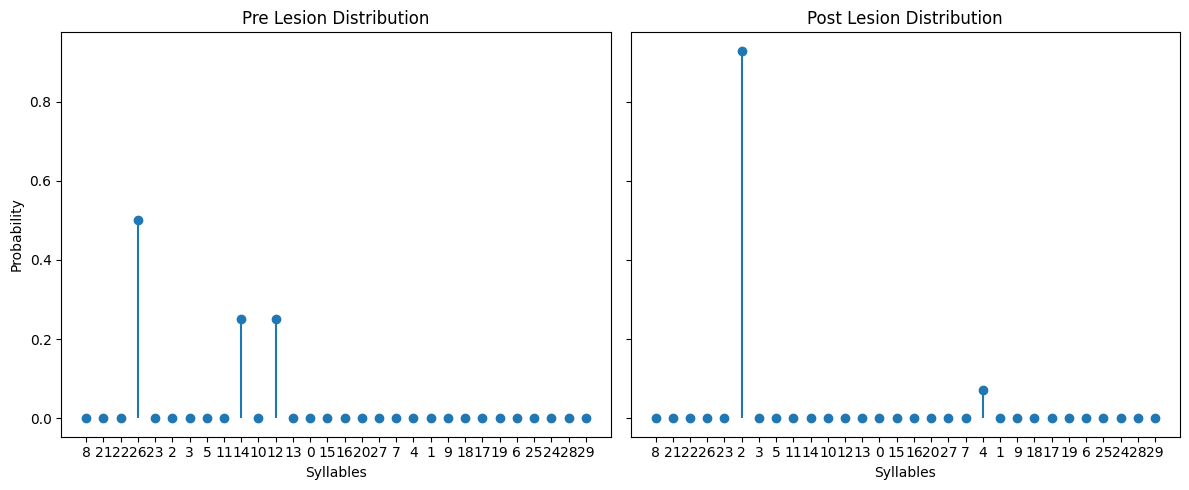

{"Earth Mover's Distance": np.float64(3.642861526056227),
 'Information Gain': np.float64(0.7824078294941392),
 'Kullback-Leibler Divergence': np.float64(19.025980760143437)}
30 30


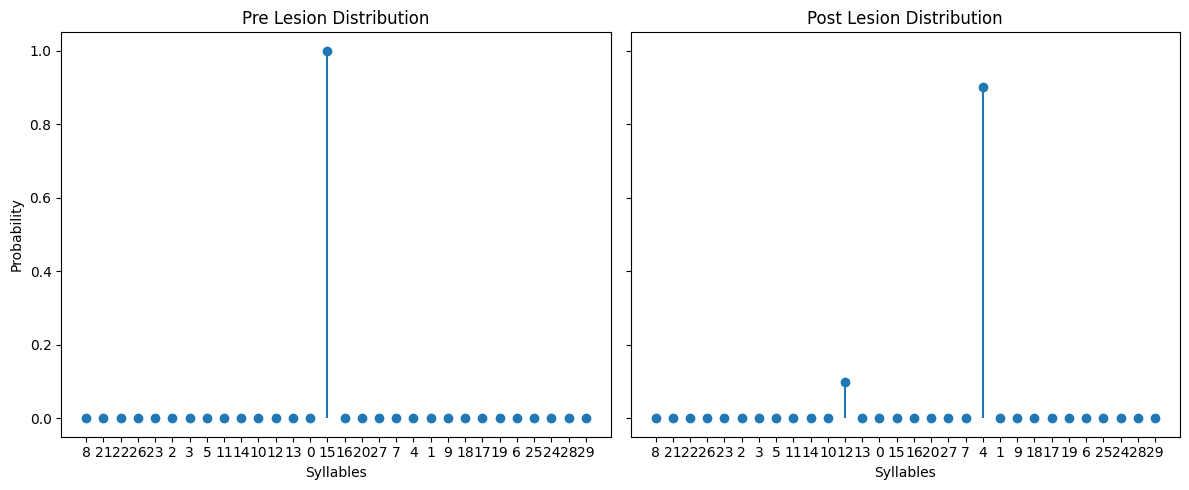

{"Earth Mover's Distance": np.float64(4.803300196836272),
 'Information Gain': np.float64(-0.3214374877678679),
 'Kullback-Leibler Divergence': np.float64(21.5374943445453)}
30 30


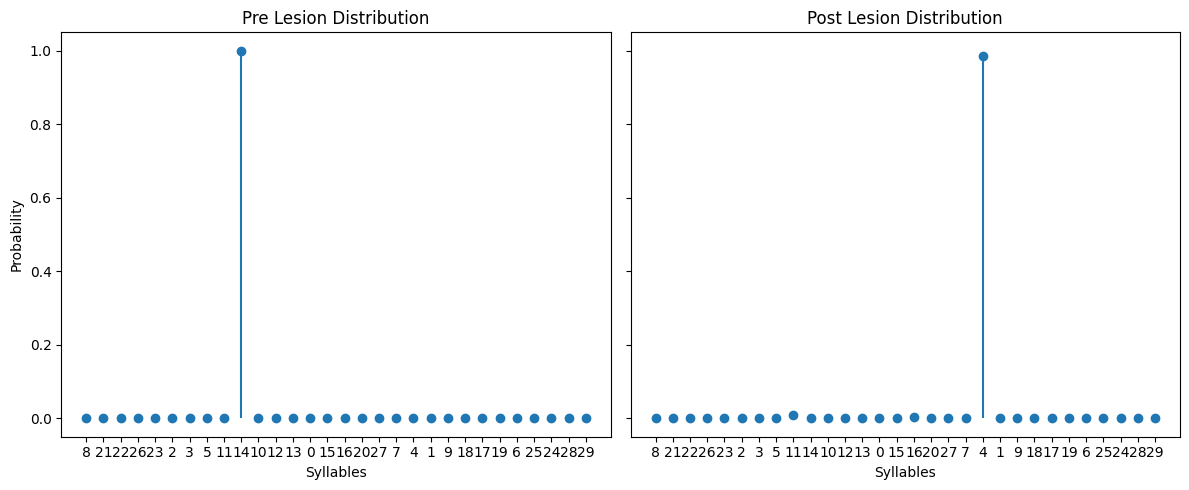

{"Earth Mover's Distance": np.float64(9.898629976329985),
 'Information Gain': np.float64(-0.08170202786529938),
 'Kullback-Leibler Divergence': np.float64(22.806532280103607)}
30 30


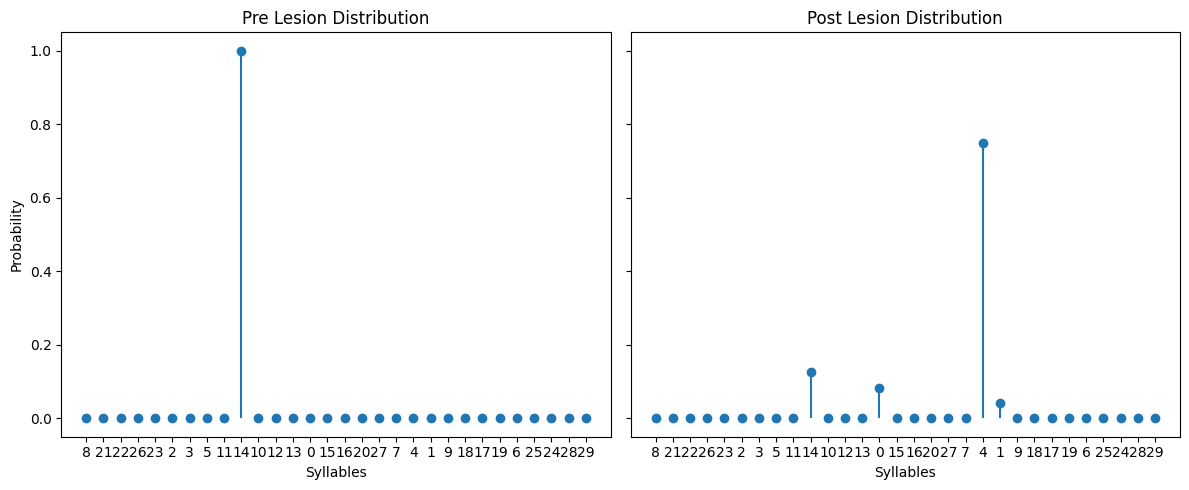

{"Earth Mover's Distance": np.float64(8.291679167784816),
 'Information Gain': np.float64(-0.8151718861587474),
 'Kullback-Leibler Divergence': np.float64(2.0794401110154324)}
30 30


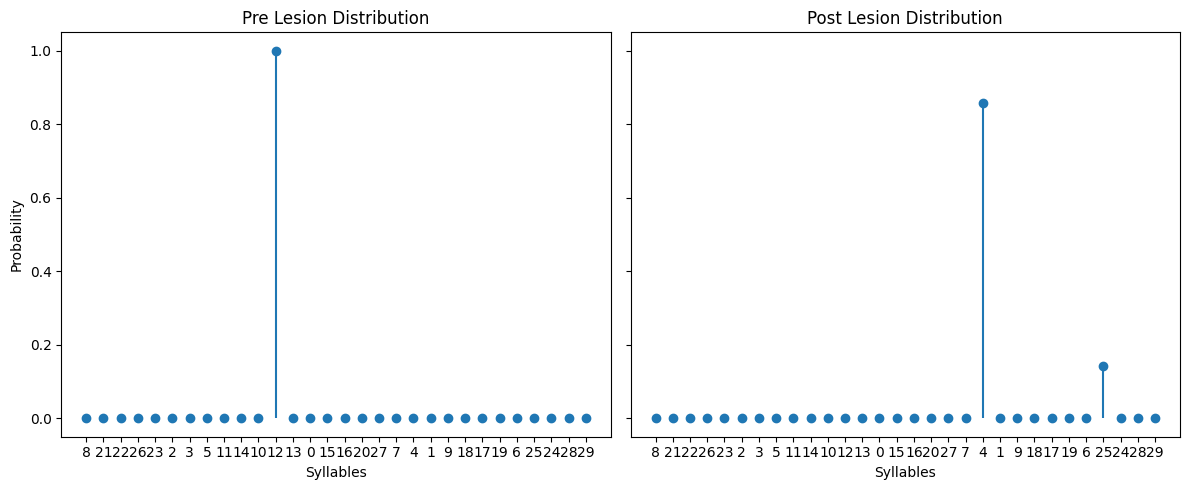

{"Earth Mover's Distance": np.float64(9.000024254333566),
 'Information Gain': np.float64(-0.41008972979907393),
 'Kullback-Leibler Divergence': np.float64(19.372530956432986)}
30 30


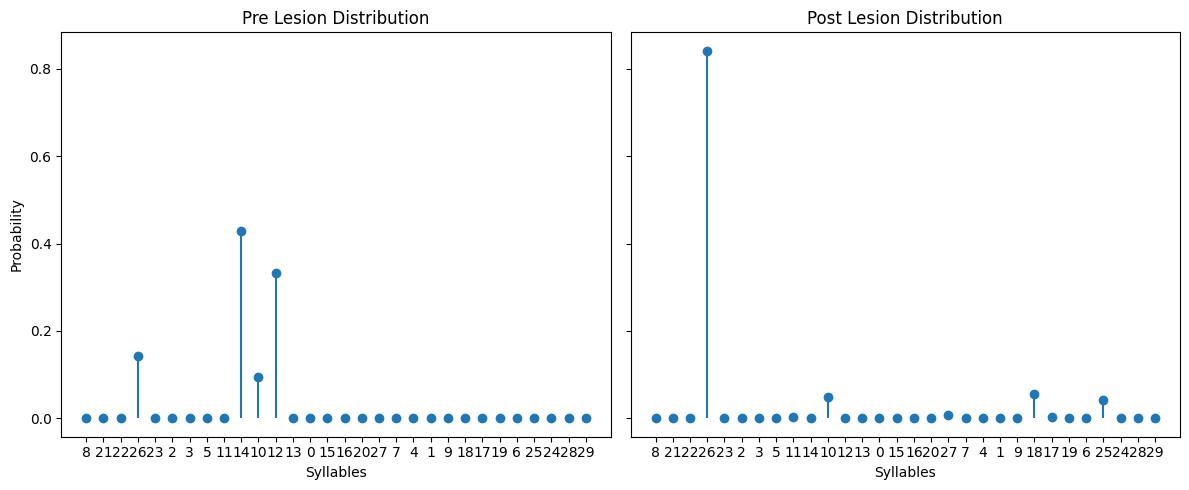

{"Earth Mover's Distance": np.float64(6.01811292755332),
 'Information Gain': np.float64(0.5781275510166067),
 'Kullback-Leibler Divergence': np.float64(16.91953856329511)}
30 30


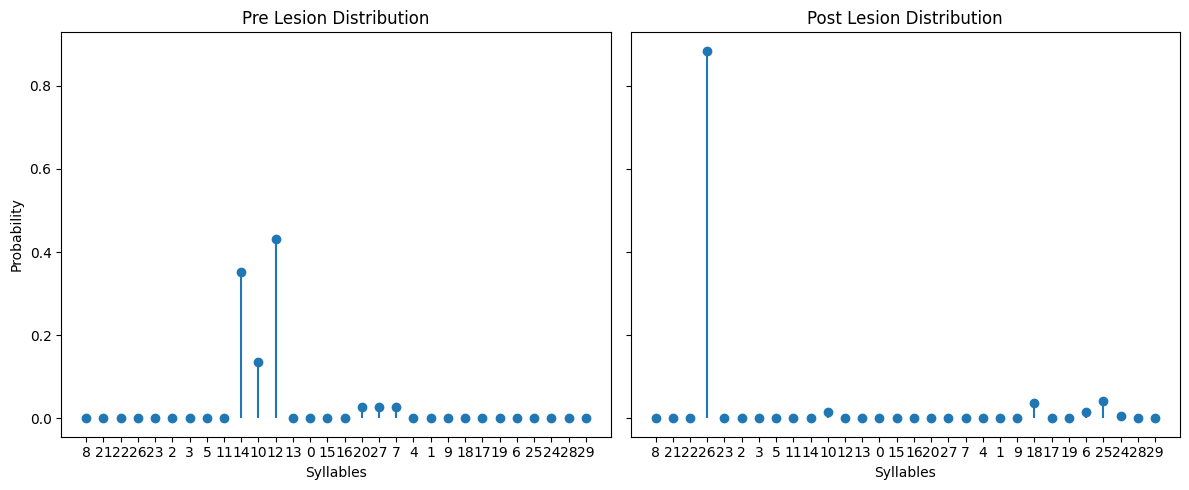

{"Earth Mover's Distance": np.float64(7.107255096328291),
 'Information Gain': np.float64(0.7708499454794294),
 'Kullback-Leibler Divergence': np.float64(18.876990151516946)}
30 30


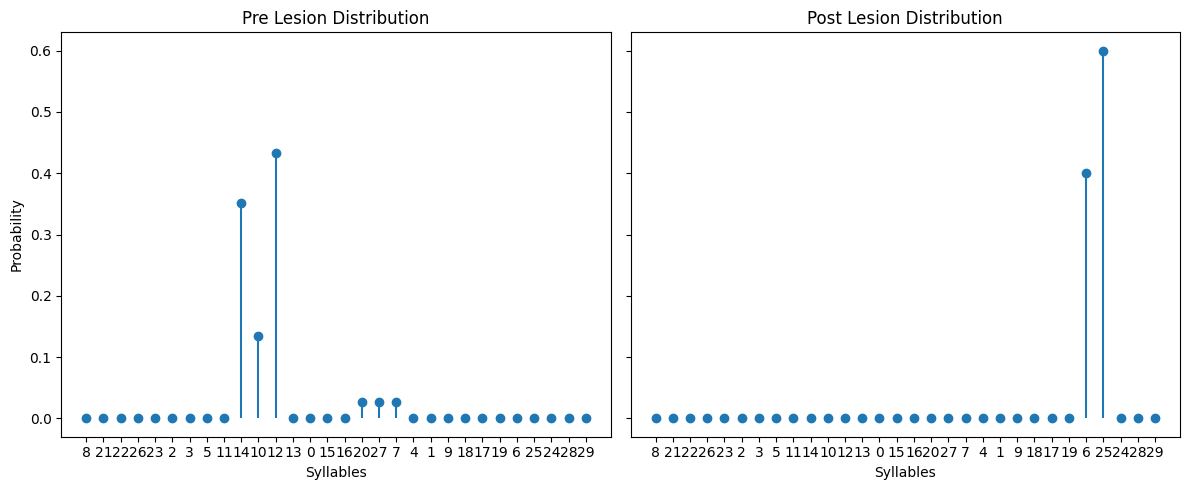

{"Earth Mover's Distance": np.float64(14.951351636560988),
 'Information Gain': np.float64(0.6202591319068107),
 'Kullback-Leibler Divergence': np.float64(19.534577510745994)}
30 30


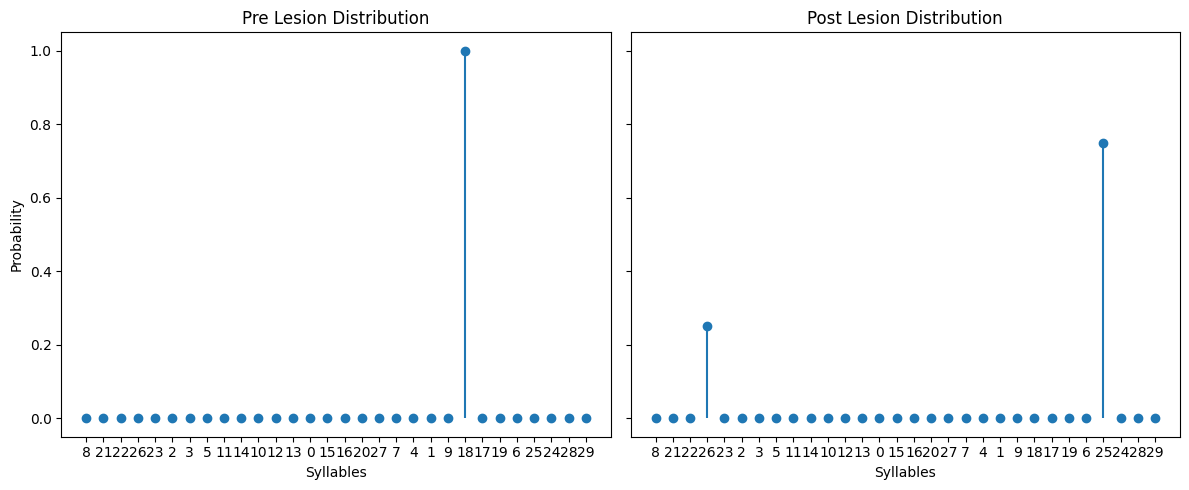

{"Earth Mover's Distance": np.float64(7.7499985713222515),
 'Information Gain': np.float64(-0.562310038473703),
 'Kullback-Leibler Divergence': np.float64(18.812915294180808)}
30 30


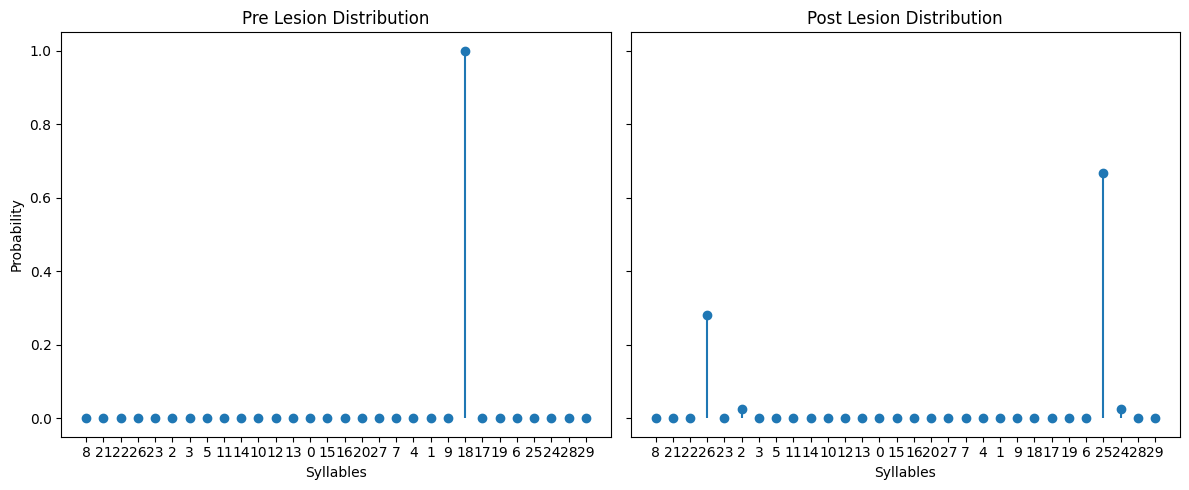

{"Earth Mover's Distance": np.float64(8.58974198525613),
 'Information Gain': np.float64(-0.8151394877047382),
 'Kullback-Leibler Divergence': np.float64(21.090180189535744)}
30 30


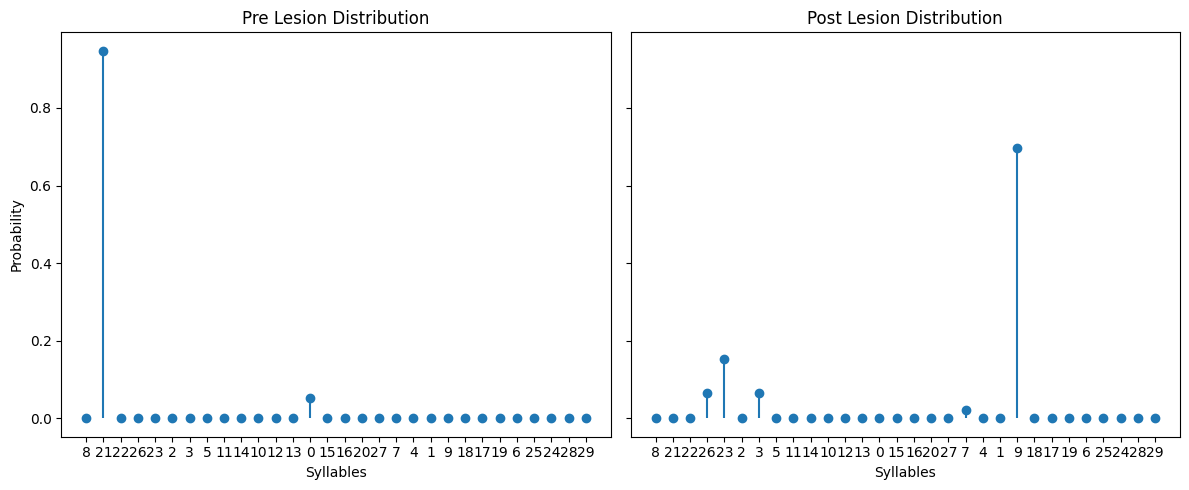

{"Earth Mover's Distance": np.float64(14.564074324413347),
 'Information Gain': np.float64(-0.7720872356515569),
 'Kullback-Leibler Divergence': np.float64(21.04909888489653)}
30 30


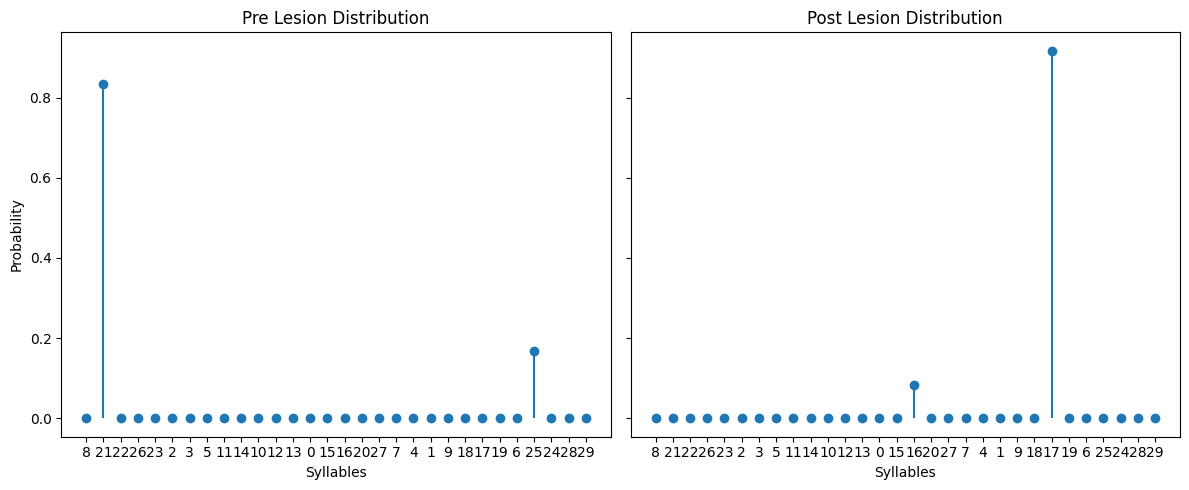

{"Earth Mover's Distance": np.float64(18.166668898415416),
 'Information Gain': np.float64(0.1637289081974137),
 'Kullback-Leibler Divergence': np.float64(19.460991668894106)}
30 30


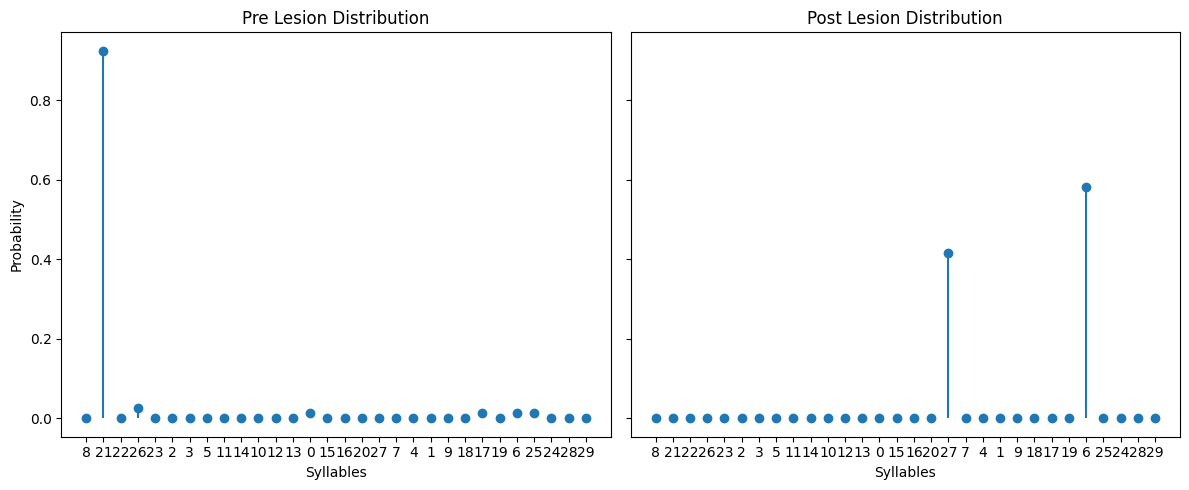

{"Earth Mover's Distance": np.float64(19.604166657455657),
 'Information Gain': np.float64(-0.29575559246031347),
 'Kullback-Leibler Divergence': np.float64(20.370842637338324)}
30 30


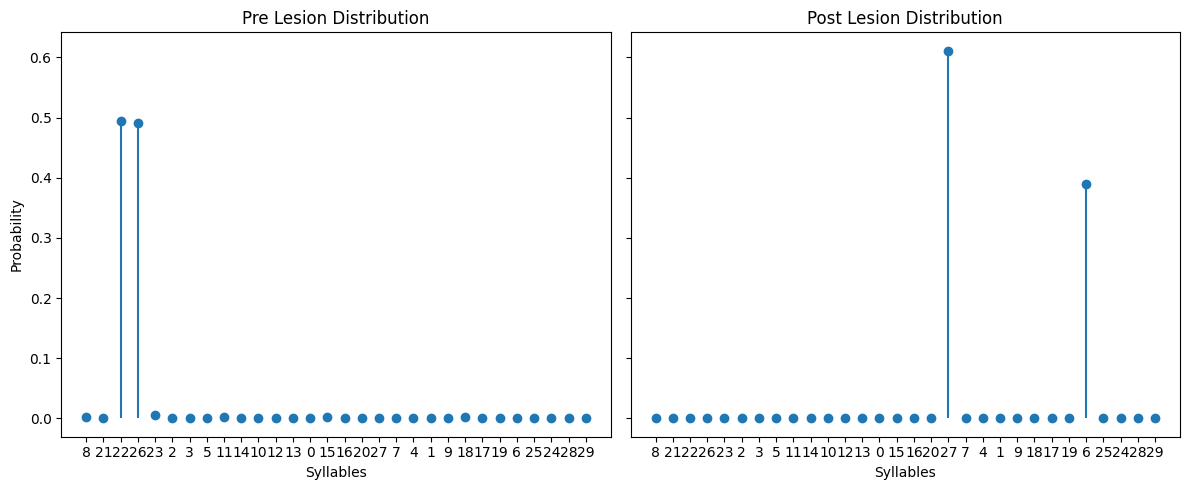

{"Earth Mover's Distance": np.float64(17.51630566550879),
 'Information Gain': np.float64(0.1187315909928639),
 'Kullback-Leibler Divergence': np.float64(19.53004235597322)}
30 30


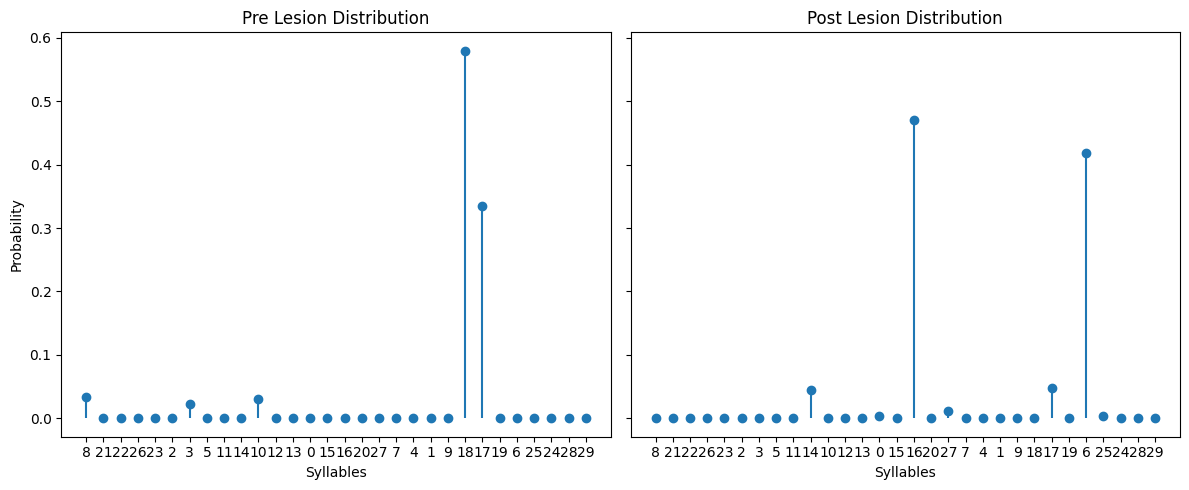

{"Earth Mover's Distance": np.float64(4.649571515864928),
 'Information Gain': np.float64(-0.11353369268900138),
 'Kullback-Leibler Divergence': np.float64(16.237230334056566)}
30 30


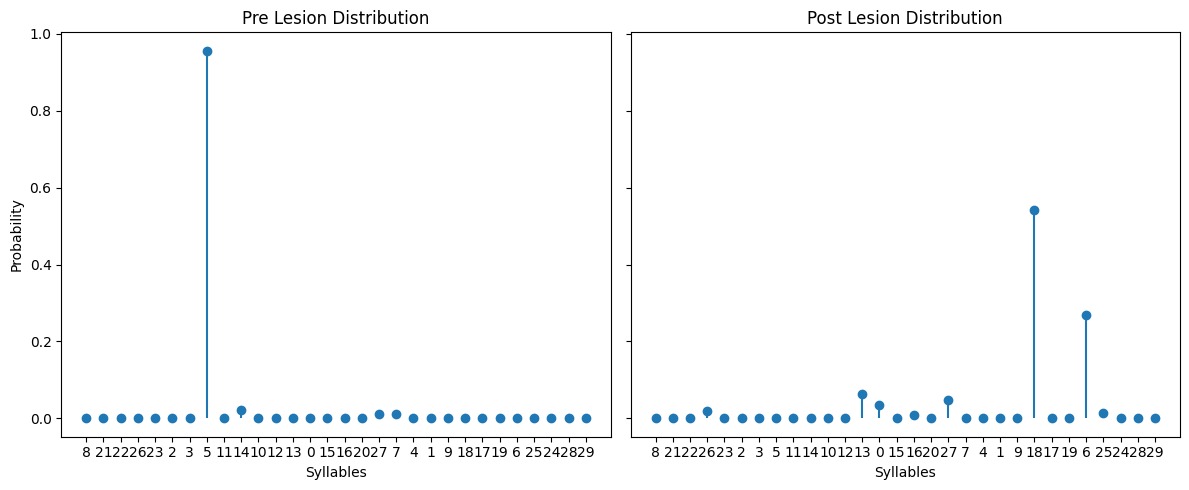

{"Earth Mover's Distance": np.float64(14.120396880171777),
 'Information Gain': np.float64(-1.0805006013797815),
 'Kullback-Leibler Divergence': np.float64(22.306835190847636)}
30 30


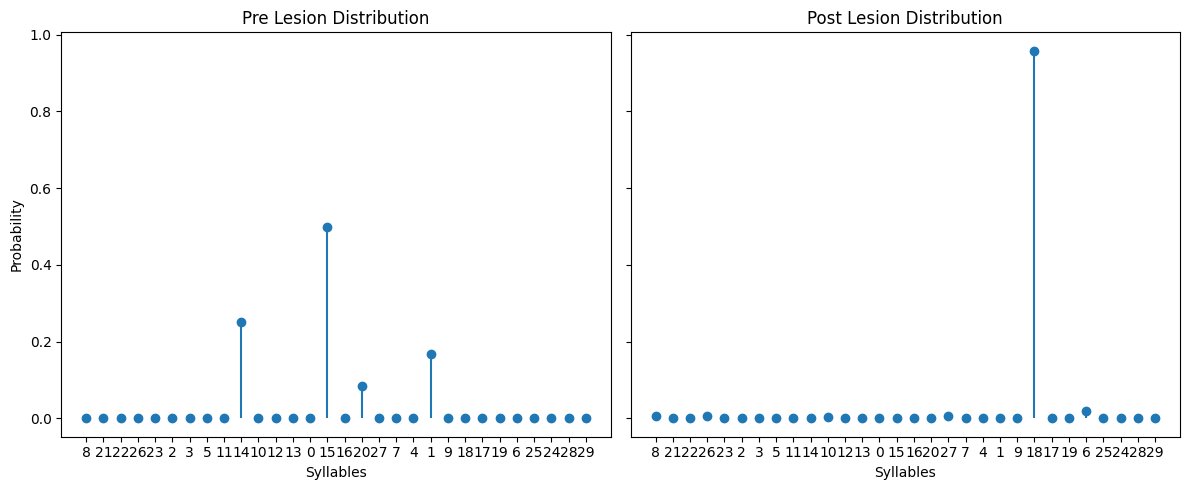

{"Earth Mover's Distance": np.float64(8.019928393187724),
 'Information Gain': np.float64(0.9632073872122418),
 'Kullback-Leibler Divergence': np.float64(22.541348718233444)}
30 30


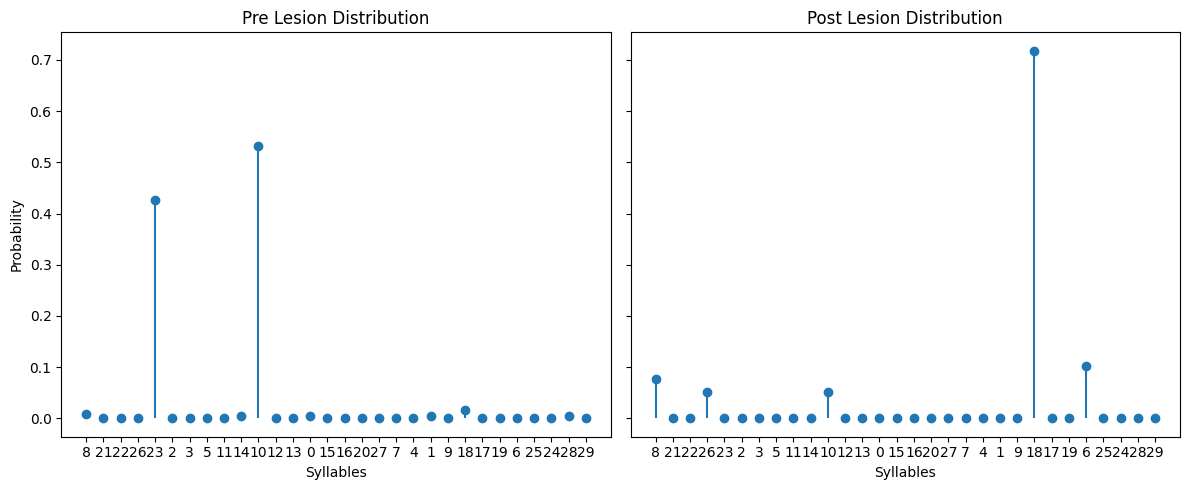

{"Earth Mover's Distance": np.float64(12.022278191742675),
 'Information Gain': np.float64(-0.07759966217462622),
 'Kullback-Leibler Divergence': np.float64(10.048240861252857)}
30 30


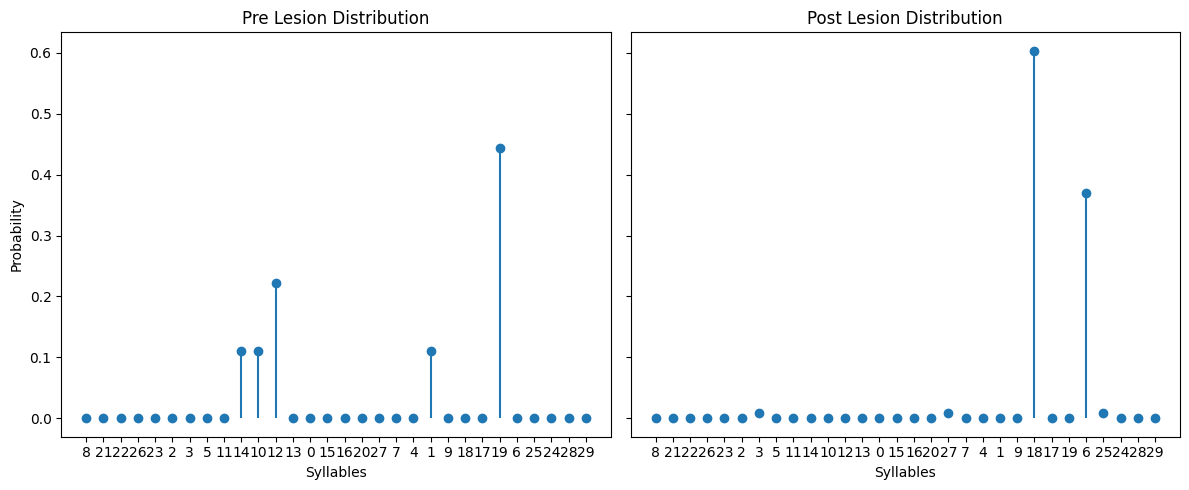

{"Earth Mover's Distance": np.float64(5.833335268589383),
 'Information Gain': np.float64(0.6314587067251516),
 'Kullback-Leibler Divergence': np.float64(20.753177173170776)}
30 30


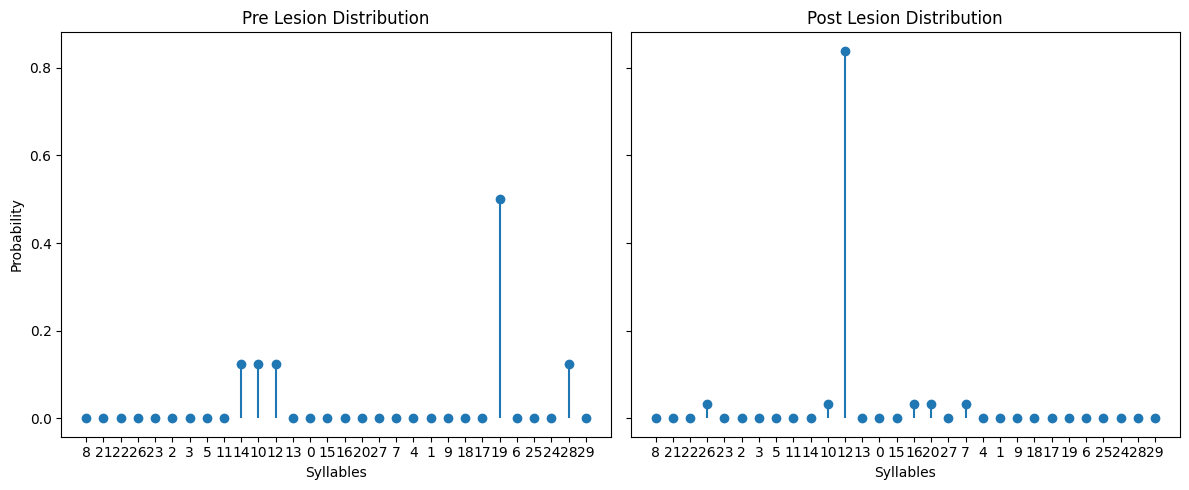

{"Earth Mover's Distance": np.float64(8.580643364949857),
 'Information Gain': np.float64(0.6849070330313773),
 'Kullback-Leibler Divergence': np.float64(14.71041643206452)}
30 30


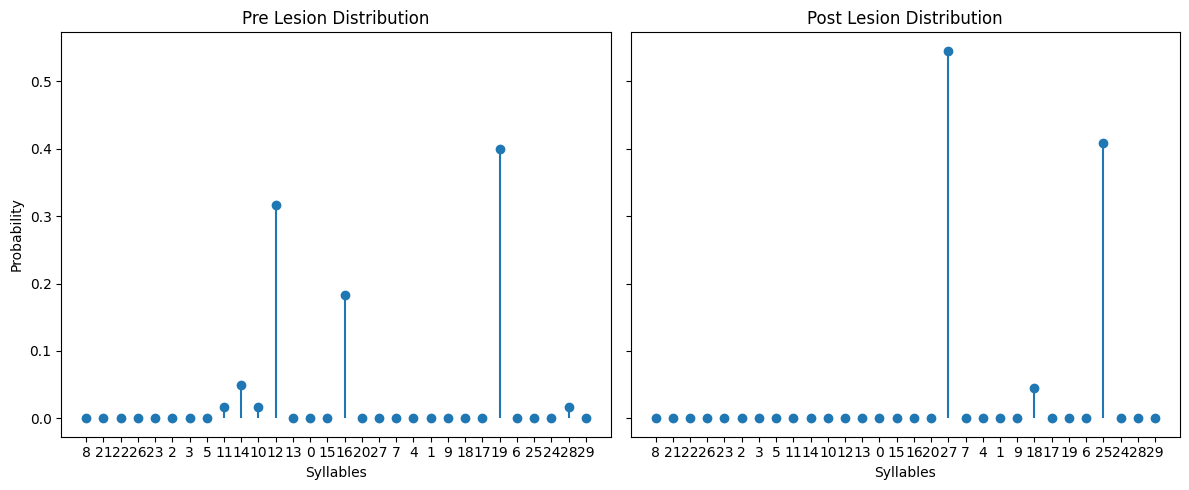

{"Earth Mover's Distance": np.float64(3.9560605851468016),
 'Information Gain': np.float64(0.5593981374443358),
 'Kullback-Leibler Divergence': np.float64(19.12152088029303)}
30 30


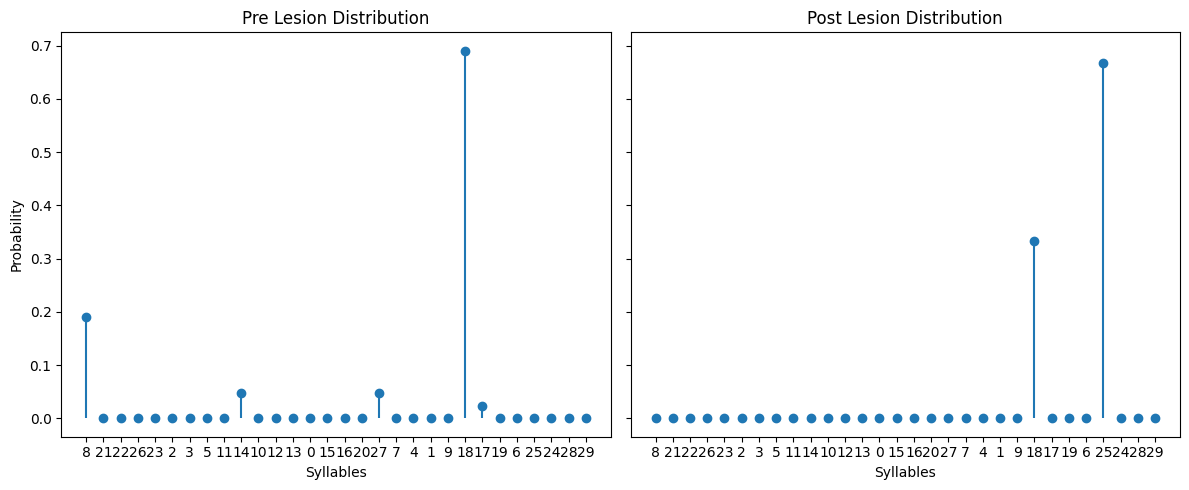

{"Earth Mover's Distance": np.float64(7.690474371930051),
 'Information Gain': np.float64(0.31401565951343957),
 'Kullback-Leibler Divergence': np.float64(5.5420419388564985)}
30 30


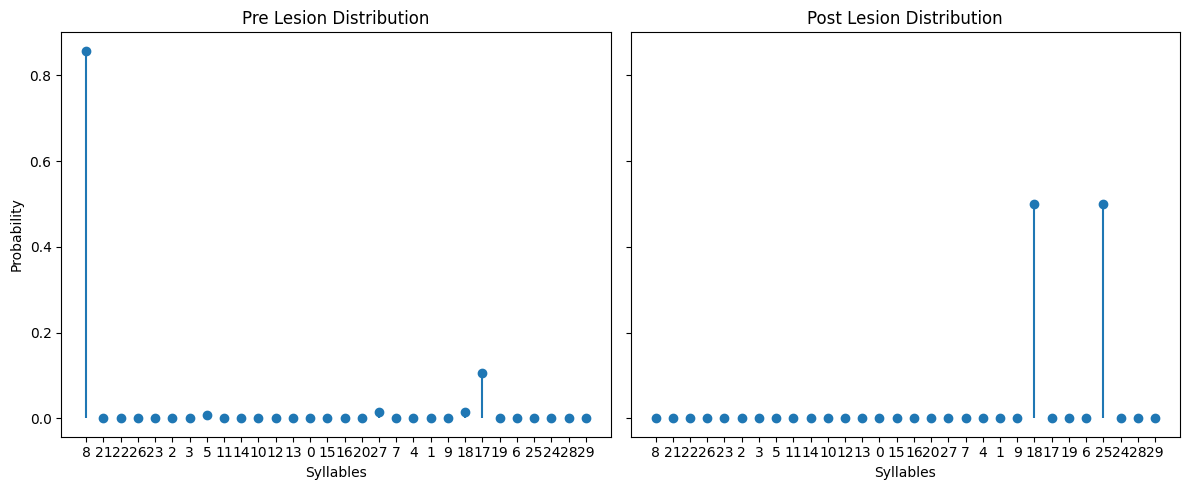

{"Earth Mover's Distance": np.float64(20.939848122891),
 'Information Gain': np.float64(-0.1610421412318458),
 'Kullback-Leibler Divergence': np.float64(18.008359215870282)}
30 30


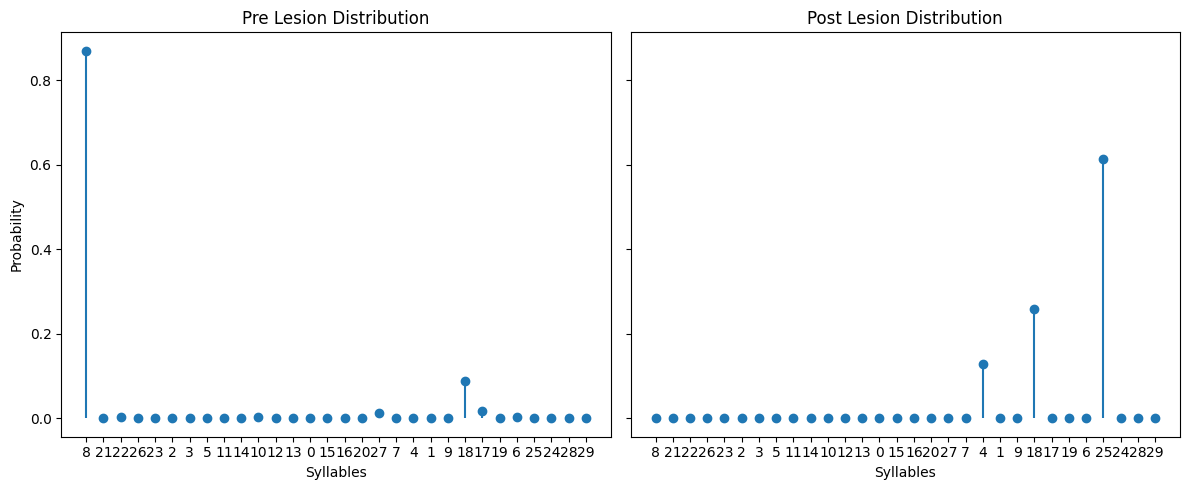

{"Earth Mover's Distance": np.float64(21.34538016096082),
 'Information Gain': np.float64(-0.3953191571477649),
 'Kullback-Leibler Divergence': np.float64(18.596217364150036)}
30 30


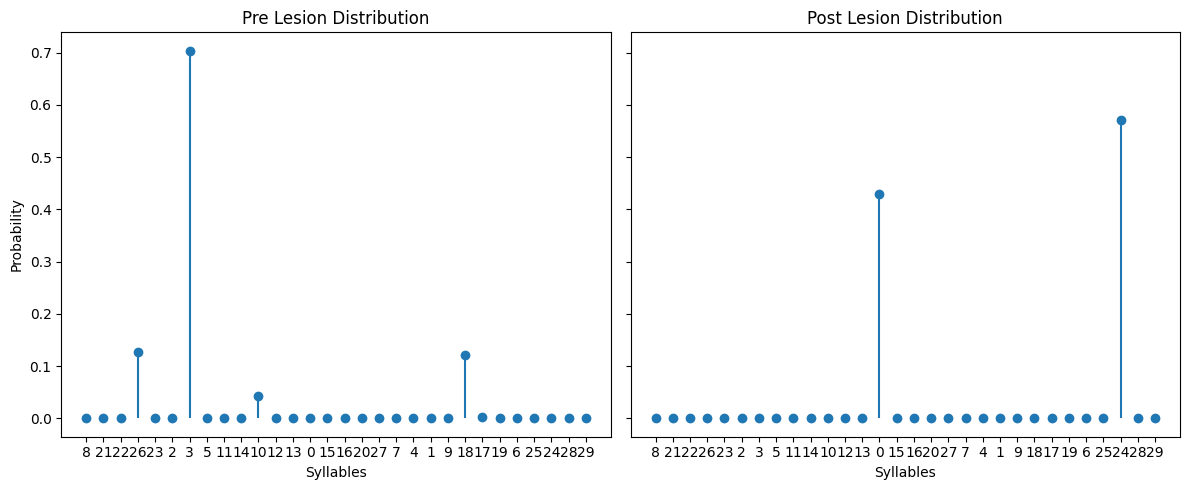

{"Earth Mover's Distance": np.float64(13.20930122597433),
 'Information Gain': np.float64(0.25220192678706255),
 'Kullback-Leibler Divergence': np.float64(18.437449597513602)}
30 30


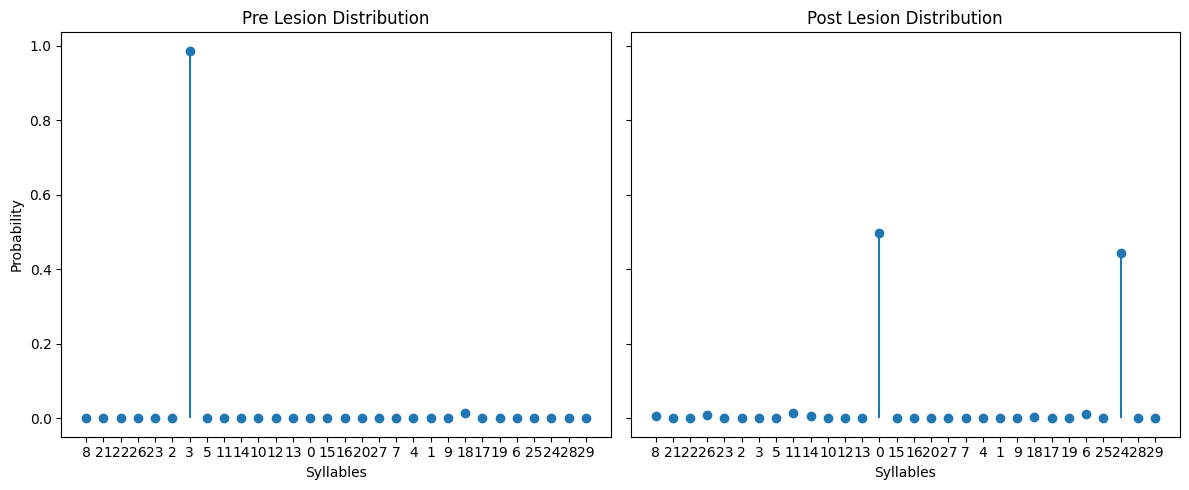

{"Earth Mover's Distance": np.float64(13.003357651859922),
 'Information Gain': np.float64(-0.9335999994532101),
 'Kullback-Leibler Divergence': np.float64(6.19934650829628)}
30 30


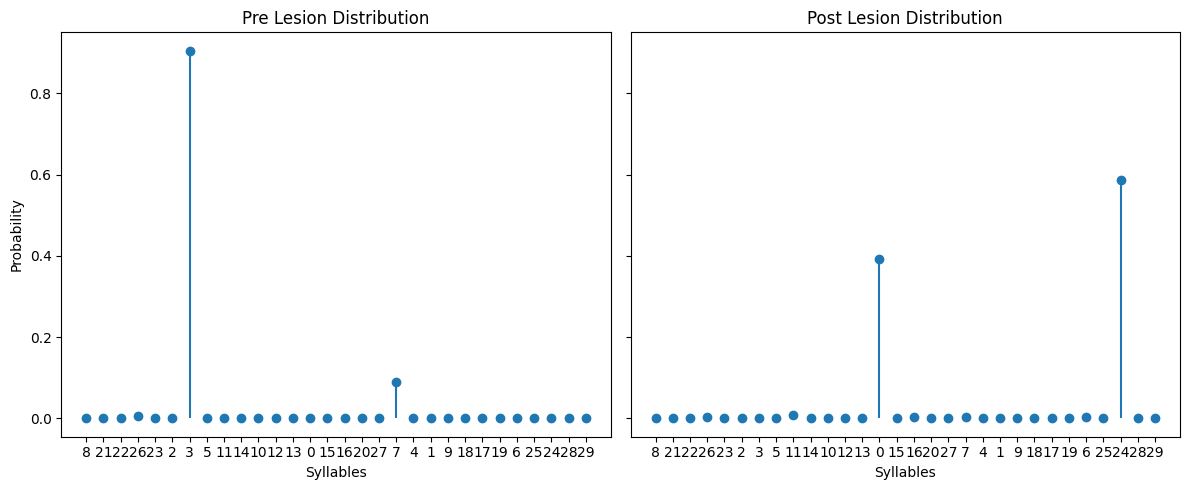

{"Earth Mover's Distance": np.float64(14.172572945728296),
 'Information Gain': np.float64(-0.45297592764050354),
 'Kullback-Leibler Divergence': np.float64(21.536283400302498)}


IndexError: list index out of range

In [ ]:
from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy



def calculate_metrics(order, pre_dist, post_dist):
    # Calculate KL Divergence
    kld = entropy(pre_dist, post_dist)

    # Calculate Earth Mover's Distance (EMD) using cumulative difference
    emd = np.sum(np.abs(np.cumsum(pre_dist) - np.cumsum(post_dist)))

    # Calculate Information Gain (IG)
    ig_pre = entropy(pre_dist)
    ig_post = entropy(post_dist)
    ig = ig_pre - ig_post

    return {
        'Kullback-Leibler Divergence': kld,
        'Earth Mover\'s Distance': emd,
        'Information Gain': ig
    }

def plot_before_and_after_distribution(syllables, pre_dist, post_dist):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    axes[0].stem(syllables, pre_dist, basefmt=" ")
    axes[0].set_title("Pre Lesion Distribution")
    axes[0].set_xlabel("Syllables")
    axes[0].set_ylabel("Probability")
    axes[1].stem(syllables, post_dist, basefmt=" ")
    axes[1].set_title("Post Lesion Distribution")
    axes[1].set_xlabel("Syllables")
    plt.tight_layout()
    plt.show()

import pprint

order = 3

assert np.array_equal(pre_surgery_pst.alphabet, post_surgery_pst.alphabet), "Alphabets must be the same"

for idx in range(len(pre_surgery_pst.tree[order]['p'])):
    print(len(pre_surgery_pst.tree[order]['p'][idx]), len(post_surgery_pst.tree[order]['p'][idx]))

    pre_probs = pre_surgery_pst.tree[order]['p'][idx]
    post_probs = post_surgery_pst.tree[order]['p'][idx]

    norm_pre_probs = (pre_probs + (1e-12)) / np.sum(pre_probs)
    norm_post_probs = (post_probs + (1e-12)) / np.sum(post_probs)

    plot_before_and_after_distribution(alphabet, norm_pre_probs, norm_post_probs)
    metrics = calculate_metrics(norm_pre_probs, norm_post_probs)

    pprint.pprint(metrics)


In [1]:
from typing import Dict
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

entropies = []

def calculate_metrics(order, syllable_idx, pre_dist, post_dist):
    # Calculate KL Divergence
    kld = entropy(pre_dist, post_dist)

    # Calculate Earth Mover's Distance (EMD) using cumulative difference
    emd = np.sum(np.abs(np.cumsum(pre_dist) - np.cumsum(post_dist)))

    # Calculate Information Gain (IG)
    ig_pre = entropy(pre_dist)
    ig_post = entropy(post_dist)
    ig = ig_pre - ig_post

    entropies.append((order, syllable_idx, ig_pre, ig_post))

    return {
        'Kullback-Leibler Divergence': kld,
        'Earth Mover\'s Distance': emd,
        'Information Gain': ig
    }

def plot_before_and_after_distribution(syllables, pre_dist, post_dist):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    axes[0].stem(syllables, pre_dist, basefmt=" ")
    axes[0].set_title("Pre Lesion Distribution")
    axes[0].set_xlabel("Syllables")
    axes[0].set_ylabel("Probability")
    axes[1].stem(syllables, post_dist, basefmt=" ")
    axes[1].set_title("Post Lesion Distribution")
    axes[1].set_xlabel("Syllables")
    plt.tight_layout()
    plt.show()

import pprint


assert np.array_equal(pre_surgery_pst.alphabet, post_surgery_pst.alphabet), "Alphabets must be the same"

for order in range(1, 5):
    print(f'ORDER: {order}')

    for idx in range(len(pre_surgery_pst.tree[order]['p'])):
        try:
            print(len(pre_surgery_pst.tree[order]['p'][idx]), len(post_surgery_pst.tree[order]['p'][idx]))
        except:
            continue

        print(f'idx: {idx}')

        pre_probs = pre_surgery_pst.tree[order]['p'][idx]
        post_probs = post_surgery_pst.tree[order]['p'][idx]

        norm_pre_probs = (pre_probs + (1e-12)) / np.sum(pre_probs)
        norm_post_probs = (post_probs + (1e-12)) / np.sum(post_probs)

        #plot_before_and_after_distribution(alphabet, norm_pre_probs, norm_post_probs)
        metrics = calculate_metrics(order, idx, norm_pre_probs, norm_post_probs)

        pprint.pprint(metrics)


NameError: name 'pre_surgery_pst' is not defined

In [ ]:
import pandas as pd

df = pd.DataFrame(entropies, columns=['order', 'syllable_idx', 'pre_entropy', 'post_entropy'])
df['entropy_diff'] = df['pre_entropy'] - df['post_entropy']

avg_entropy = df.groupby('order')[['pre_entropy', 'post_entropy', 'entropy_diff']].agg(['mean', 'var'])
avg_entropy

pre_entropy           post_entropy           entropy_diff          
             mean       var         mean       var         mean       var
order                                                                    
1        1.106761  0.227463     1.055060  0.240405     0.051701  0.538202
2        0.805245  0.255296     0.757594  0.160472     0.047650  0.338509
3        0.587832  0.234302     0.679060  0.273407    -0.091228  0.509141

In [49]:
order = 3
print(pre_surgery_pst.tree[order].keys())
print('parent', len(pre_surgery_pst.tree[order]['parent']))
print('label', len(pre_surgery_pst.tree[order]['label']))
print('internal', len(pre_surgery_pst.tree[order]['internal']))
print('p', len(pre_surgery_pst.tree[order]['p']))
print('l', len(pre_surgery_pst.tree[order]['f']))

pre_surgery_pst.tree[order]['p'][0].shape

dict_keys(['string', 'parent', 'label', 'internal', 'g_sigma_s', 'p', 'f'])
parent 275
label 275
internal 275
p 275
l 275


(30,)

In [ ]:
idx = 2

node_string = pre_surgery_pst.tree[order]['string'][idx]
print(node_string)     # LIST INDEXES OF SYLLABLES IN ALPHABET
print(pre_surgery_pst.tree[order]['parent'][idx])
print(pre_surgery_pst.tree[order]['label'][idx])      # ACTUAL SYLLABLES AT THIS NODE
print(pre_surgery_pst.tree[order]['internal'][idx])   # ???

expected_label = [
    pre_surgery_pst.alphabet[s] for s in node_string
]
assert expected_label == pre_surgery_pst.tree[order]['label'][idx], "Expected label does not match"

# SO EACH ORDER 3 NODE IS has a IDX
# EACH p for each node has len(alphabet) transition probabilities
# these are the probabilities that the next word will be that syllable
print(pre_surgery_pst.tree[order]['p'][idx])

[12, 10, 0]
(0, 2)
['13', '10', '8']
0
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.57015352e-05 0.00000000e+00
 1.78507676e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [41]:
pre_surgery_pst.alphabet[0]

'8'